# DSA - Neural DRT

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Read Data

## Google

In [ ]:
df_google = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_google

country_region_code        country_region       sub_region_1  \
0                         AE  United Arab Emirates                NaN   
1                         AE  United Arab Emirates                NaN   
2                         AE  United Arab Emirates                NaN   
3                         AE  United Arab Emirates                NaN   
4                         AE  United Arab Emirates                NaN   
...                      ...                   ...                ...   
10456162                  ZW              Zimbabwe  Midlands Province   
10456163                  ZW              Zimbabwe  Midlands Province   
10456164                  ZW              Zimbabwe  Midlands Province   
10456165                  ZW              Zimbabwe  Midlands Province   
10456166                  ZW              Zimbabwe  Midlands Province   

         sub_region_2 metro_area iso_3166_2_code  census_fips_code  \
0                 NaN        NaN             NaN               NaN   
1                 NaN        NaN             NaN               NaN   
2                 NaN        NaN             NaN               NaN   
3                 NaN        NaN             NaN               NaN   
4                 NaN        NaN             NaN               NaN   
...               ...        ...             ...               ...   
10456162       Kwekwe        NaN             NaN               NaN   
10456163       Kwekwe        NaN             NaN               NaN   
10456164       Kwekwe        NaN             NaN               NaN   
10456165       Kwekwe        NaN             NaN               NaN   
10456166       Kwekwe        NaN             NaN               NaN   

                             place_id        date  \
0         ChIJvRKrsd9IXj4RpwoIwFYv0zM  2020-02-15   
1         ChIJvRKrsd9IXj4RpwoIwFYv0zM  2020-02-16   
2         ChIJvRKrsd9IXj4RpwoIwFYv0zM  2020-02-17   
3         ChIJvRKrsd9IXj4RpwoIwFYv0zM  2020-02-18   
4         ChIJvRKrsd9IXj4RpwoIwFYv0zM  2020-02-19   
...                               ...         ...   
10456162  ChIJRcIZ3-FJNBkRRsj55IcLpfU  2022-06-23   
10456163  ChIJRcIZ3-FJNBkRRsj55IcLpfU  2022-06-24   
10456164  ChIJRcIZ3-FJNBkRRsj55IcLpfU  2022-06-27   
10456165  ChIJRcIZ3-FJNBkRRsj55IcLpfU  2022-06-29   
10456166  ChIJRcIZ3-FJNBkRRsj55IcLpfU  2022-06-30   

          retail_and_recreation_percent_change_from_baseline  \
0                                                       0.0    
1                                                       1.0    
2                                                      -1.0    
3                                                      -2.0    
4                                                      -2.0    
...                                                     ...    
10456162                                                NaN    
10456163                                                NaN    
10456164                                                NaN    
10456165                                                NaN    
10456166                                                NaN    

          grocery_and_pharmacy_percent_change_from_baseline  \
0                                                       4.0   
1                                                       4.0   
2                                                       1.0   
3                                                       1.0   
4                                                       0.0   
...                                                     ...   
10456162                                                NaN   
10456163                                                NaN   
10456164                                                NaN   
10456165                                                NaN   
10456166                                                NaN   

          parks_percent_change_from_baseline  \
0                                        5.0   
1                               

## MIT

In [ ]:
df_mit = pd.read_csv('/content/drive/MyDrive/DSA Compfest/DSA - Neural DRT/covid-19-preventative-health-survey-all.csv')

print(df_mit.to_string()) 

   gender  age country  results_count  effective_sample_size  vaccine_accept_yes  vaccine_accept_no  vaccine_accept_dontknow  mismatch_index  distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means  distancing_familiarity_I-have-heard-of-it-and-know-what-it-means  distancing_familiarity_I-have-heard-of-it-but-do-not-know-what-it-means  distancing_familiarity_I-have-not-heard-of-it  effect_mask_Extremely-effective  effect_mask_Moderately-effective  effect_mask_Not-effective-at-all  effect_mask_Slightly-effective  effect_mask_Very-effective  community_risk_index_Extremely-dangerous  community_risk_index_Moderately-dangerous  community_risk_index_Not-at-all-dangerous  community_risk_index_Slightly-dangerous  community_risk_index_Very-dangerous  restaurants_everyone-has-to-pass-a-temperature-check_Doesn't-affect-my-actions  restaurants_everyone-has-to-pass-a-temperature-check_Less-likely-to-visit  restaurants_everyone-has-to-pass-a-temperature-check_More-likely-to-vis

In [ ]:
column_title_list = df_mit.transpose().index.tolist()
print(column_title_list)

['gender', 'age', 'country', 'results_count', 'effective_sample_size', 'vaccine_accept_yes', 'vaccine_accept_no', 'vaccine_accept_dontknow', 'mismatch_index', 'distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means', 'distancing_familiarity_I-have-heard-of-it-and-know-what-it-means', 'distancing_familiarity_I-have-heard-of-it-but-do-not-know-what-it-means', 'distancing_familiarity_I-have-not-heard-of-it', 'effect_mask_Extremely-effective', 'effect_mask_Moderately-effective', 'effect_mask_Not-effective-at-all', 'effect_mask_Slightly-effective', 'effect_mask_Very-effective', 'community_risk_index_Extremely-dangerous', 'community_risk_index_Moderately-dangerous', 'community_risk_index_Not-at-all-dangerous', 'community_risk_index_Slightly-dangerous', 'community_risk_index_Very-dangerous', "restaurants_everyone-has-to-pass-a-temperature-check_Doesn't-affect-my-actions", 'restaurants_everyone-has-to-pass-a-temperature-check_Less-likely-to-visit', 'restaurants_everyone-

# Data Cleaning And Preprocessing

In [ ]:
country_google = df_google['country_region_code'].unique()
print(country_google)

['AE' 'AF' 'AG' 'AO' 'AR' 'AT' 'AU' 'AW' 'BA' 'BB' 'BD' 'BE' 'BF' 'BG'
 'BH' 'BJ' 'BO' 'BR' 'BS' 'BW' 'BY' 'BZ' 'CA' 'CH' 'CI' 'CL' 'CM' 'CO'
 'CR' 'CV' 'CZ' 'DE' 'DK' 'DO' 'EC' 'EE' 'EG' 'ES' 'FI' 'FJ' 'FR' 'GA'
 'GB' 'GE' 'GH' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HT' 'HU' 'ID' 'IE' 'IL'
 'IN' 'IQ' 'IT' 'JM' 'JO' 'JP' 'KE' 'KG' 'KH' 'KR' 'KW' 'KZ' 'LA' 'LB'
 'LI' 'LK' 'LT' 'LU' 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MN' 'MT' 'MU'
 'MX' 'MY' 'MZ' nan 'NE' 'NG' 'NI' 'NL' 'NO' 'NP' 'NZ' 'OM' 'PA' 'PE' 'PG'
 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'QA' 'RE' 'RO' 'RS' 'RU' 'RW' 'SA' 'SE'
 'SG' 'SI' 'SK' 'SN' 'SV' 'TG' 'TH' 'TJ' 'TR' 'TT' 'TW' 'TZ' 'UA' 'UG'
 'US' 'UY' 'VE' 'VN' 'YE' 'ZA' 'ZM' 'ZW']


In [ ]:
country_mit = df_mit['country'].unique()
print(country_mit)

['JM' 'CO' 'SN' 'TT' 'IT' 'AF' 'NP' 'RO' 'PH' 'AO' 'VN' 'TZ' 'KZ' 'AU'
 'LK' 'BD' 'MN' 'EG' 'BR' 'AR' 'ID' 'MZ' 'DE' 'PE' 'HN' 'UA' 'AZ' 'MX'
 'CA' 'ES' 'GT' 'GE' 'GH' 'MM' 'CM' 'IQ' 'KH' 'KR' 'TH' 'TR' 'UY' 'NG'
 'IN' 'SG' 'EE' 'CI' 'AE' 'PL' 'KE' 'PT' 'MY' 'SD' 'CL' 'MA' 'FR' 'UG'
 'ZA' 'US' 'TW' 'JP' 'GB' 'BO' 'DZ' 'EC' 'VE' 'NL' 'PK']


In [ ]:
same_country = []
diff_country = []

for i in country_google:
  if (i in country_mit):
    same_country.append(i)
  else:
    diff_country.append(i)

for i in country_mit:
  if (i not in same_country):
    diff_country.append(i)

print(same_country)
print(diff_country)
print(len(same_country))
print(len(diff_country))

['AE', 'AF', 'AO', 'AR', 'AU', 'BD', 'BO', 'BR', 'CA', 'CI', 'CL', 'CM', 'CO', 'DE', 'EC', 'EE', 'EG', 'ES', 'FR', 'GB', 'GE', 'GH', 'GT', 'HN', 'ID', 'IN', 'IQ', 'IT', 'JM', 'JP', 'KE', 'KH', 'KR', 'KZ', 'LK', 'MA', 'MM', 'MN', 'MX', 'MY', 'MZ', 'NG', 'NL', 'NP', 'PE', 'PH', 'PK', 'PL', 'PT', 'RO', 'SG', 'SN', 'TH', 'TR', 'TT', 'TW', 'TZ', 'UA', 'UG', 'US', 'UY', 'VE', 'VN', 'ZA']
['AG', 'AT', 'AW', 'BA', 'BB', 'BE', 'BF', 'BG', 'BH', 'BJ', 'BS', 'BW', 'BY', 'BZ', 'CH', 'CR', 'CV', 'CZ', 'DK', 'DO', 'FI', 'FJ', 'GA', 'GR', 'GW', 'HK', 'HR', 'HT', 'HU', 'IE', 'IL', 'JO', 'KG', 'KW', 'LA', 'LB', 'LI', 'LT', 'LU', 'LV', 'LY', 'MD', 'MK', 'ML', 'MT', 'MU', nan, 'NE', 'NI', 'NO', 'NZ', 'OM', 'PA', 'PG', 'PR', 'PY', 'QA', 'RE', 'RS', 'RU', 'RW', 'SA', 'SE', 'SI', 'SK', 'SV', 'TG', 'TJ', 'YE', 'ZM', 'ZW', 'AZ', 'SD', 'DZ']
64
74


In [ ]:
for i in diff_country:
  google_drop = df_google[df_google['country_region_code'] == i].index
  df_google.drop(google_drop, inplace=True)
  mit_drop = df_mit[df_mit['country'] == i].index
  df_mit.drop(mit_drop, inplace=True)

## Google

In [ ]:
df_google

country_region_code        country_region  sub_region_1 sub_region_2  \
0                         AE  United Arab Emirates           NaN          NaN   
1                         AE  United Arab Emirates           NaN          NaN   
2                         AE  United Arab Emirates           NaN          NaN   
3                         AE  United Arab Emirates           NaN          NaN   
4                         AE  United Arab Emirates           NaN          NaN   
...                      ...                   ...           ...          ...   
10438640                  ZA          South Africa  Western Cape          NaN   
10438641                  ZA          South Africa  Western Cape          NaN   
10438642                  ZA          South Africa  Western Cape          NaN   
10438643                  ZA          South Africa  Western Cape          NaN   
10438644                  ZA          South Africa  Western Cape          NaN   

         metro_area iso_3166_2_code  census_fips_code  \
0               NaN             NaN               NaN   
1               NaN             NaN               NaN   
2               NaN             NaN               NaN   
3               NaN             NaN               NaN   
4               NaN             NaN               NaN   
...             ...             ...               ...   
10438640        NaN           ZA-WC               NaN   
10438641        NaN           ZA-WC               NaN   
10438642        NaN           ZA-WC               NaN   
10438643        NaN           ZA-WC               NaN   
10438644        NaN           ZA-WC               NaN   

                             place_id        date  \
0         ChIJvRKrsd9IXj4RpwoIwFYv0zM  2020-02-15   
1         ChIJvRKrsd9IXj4RpwoIwFYv0zM  2020-02-16   
2         ChIJvRKrsd9IXj4RpwoIwFYv0zM  2020-02-17   
3         ChIJvRKrsd9IXj4RpwoIwFYv0zM  2020-02-18   
4         ChIJvRKrsd9IXj4RpwoIwFYv0zM  2020-02-19   
...                               ...         ...   
10438640  ChIJ841peohdzB0Ri6I2IY95juk  2022-06-27   
10438641  ChIJ841peohdzB0Ri6I2IY95juk  2022-06-28   
10438642  ChIJ841peohdzB0Ri6I2IY95juk  2022-06-29   
10438643  ChIJ841peohdzB0Ri6I2IY95juk  2022-06-30   
10438644  ChIJ841peohdzB0Ri6I2IY95juk  2022-07-01   

          retail_and_recreation_percent_change_from_baseline  \
0                                                       0.0    
1                                                       1.0    
2                                                      -1.0    
3                                                      -2.0    
4                                                      -2.0    
...                                                     ...    
10438640                                                7.0    
10438641                                                8.0    
10438642                                               10.0    
10438643                                               14.0    
10438644                                               10.0    

          grocery_and_pharmacy_percent_change_from_baseline  \
0                                                       4.0   
1                                                       4.0   
2                                                       1.0   
3                                                       1.0   
4                                                       0.0   
...                                                     ...   
10438640                                               23.0   
10438641                                               23.0   
10438642                                               27.0   
10438643                                               37.0   
10438644                                               35.0   

          parks_percent_change_from_baseline  \
0                                        5.0   
1                                        4.0   
2                                        5.0

### Data Cleaning Awal

#### Duplicate Data Awal

In [ ]:
print("Jumlah data duplikat: ", df_google.duplicated().sum())

Jumlah data duplikat:  0


In [ ]:
df_google.drop_duplicates(inplace=True)
df_google.head()

country_region_code        country_region sub_region_1 sub_region_2  \
0                  AE  United Arab Emirates          NaN          NaN   
1                  AE  United Arab Emirates          NaN          NaN   
2                  AE  United Arab Emirates          NaN          NaN   
3                  AE  United Arab Emirates          NaN          NaN   
4                  AE  United Arab Emirates          NaN          NaN   

  metro_area iso_3166_2_code  census_fips_code                     place_id  \
0        NaN             NaN               NaN  ChIJvRKrsd9IXj4RpwoIwFYv0zM   
1        NaN             NaN               NaN  ChIJvRKrsd9IXj4RpwoIwFYv0zM   
2        NaN             NaN               NaN  ChIJvRKrsd9IXj4RpwoIwFYv0zM   
3        NaN             NaN               NaN  ChIJvRKrsd9IXj4RpwoIwFYv0zM   
4        NaN             NaN               NaN  ChIJvRKrsd9IXj4RpwoIwFYv0zM   

         date  retail_and_recreation_percent_change_from_baseline  \
0  2020-02-15                                                0.0    
1  2020-02-16                                                1.0    
2  2020-02-17                                               -1.0    
3  2020-02-18                                               -2.0    
4  2020-02-19                                               -2.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                                4.0   
1                                                4.0   
2                                                1.0   
3                                                1.0   
4                                                0.0   

   parks_percent_change_from_baseline  \
0                                 5.0   
1                                 4.0   
2                                 5.0   
3                                 5.0   
4                                 4.0   

   transit_stations_percent_change_from_baseline  \
0                                            0.0   
1                                            1.0   
2                                            1.0   
3                                            0.0   
4                                           -1.0   

   workplaces_percent_change_from_baseline  \
0                                      2.0   
1                                      2.0   
2                                      2.0   
3                                      2.0   
4                                      2.0   

   residential_percent_change_from_baseline  
0                                       1.0  
1                                       1.0  
2                                       1.0  
3                                       1.0  
4                                       1.0

### Data Preprocessing

In [ ]:
country_region_code = df_google['country_region_code'].unique()
country_region = df_google['country_region'].unique()
print(country_region_code)
print(country_region)

['AE' 'AF' 'AO' 'AR' 'AU' 'BD' 'BO' 'BR' 'CA' 'CI' 'CL' 'CM' 'CO' 'DE'
 'EC' 'EE' 'EG' 'ES' 'FR' 'GB' 'GE' 'GH' 'GT' 'HN' 'ID' 'IN' 'IQ' 'IT'
 'JM' 'JP' 'KE' 'KH' 'KR' 'KZ' 'LK' 'MA' 'MM' 'MN' 'MX' 'MY' 'MZ' nan 'NG'
 'NL' 'NP' 'PE' 'PH' 'PK' 'PL' 'PT' 'RO' 'SG' 'SN' 'TH' 'TR' 'TT' 'TW'
 'TZ' 'UA' 'UG' 'US' 'UY' 'VE' 'VN' 'ZA']
['United Arab Emirates' 'Afghanistan' 'Angola' 'Argentina' 'Australia'
 'Bangladesh' 'Bolivia' 'Brazil' 'Canada' "Côte d'Ivoire" 'Chile'
 'Cameroon' 'Colombia' 'Germany' 'Ecuador' 'Estonia' 'Egypt' 'Spain'
 'France' 'United Kingdom' 'Georgia' 'Ghana' 'Guatemala' 'Honduras'
 'Indonesia' 'India' 'Iraq' 'Italy' 'Jamaica' 'Japan' 'Kenya' 'Cambodia'
 'South Korea' 'Kazakhstan' 'Sri Lanka' 'Morocco' 'Myanmar (Burma)'
 'Mongolia' 'Mexico' 'Malaysia' 'Mozambique' 'Namibia' 'Nigeria'
 'Netherlands' 'Nepal' 'Peru' 'Philippines' 'Pakistan' 'Poland' 'Portugal'
 'Romania' 'Singapore' 'Senegal' 'Thailand' 'Turkey' 'Trinidad and Tobago'
 'Taiwan' 'Tanzania' 'Ukraine' 'Uganda' 

In [ ]:
import re

list_year = list()
list_month = list()

for i in df_google['date']:
  if (i != None):
    year = re.findall("[0-9][0-9][0-9][0-9]", i)[0]
    month = re.findall("[0-9][0-9]", i)[2]
    list_year.append(int(year))
    list_month.append(int(month))
print(list_year)
print(list_month)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df_google['year'] = list_year
df_google['month'] = list_month
df_google

In [ ]:
df_google_final = pd.DataFrame()
df_google_final

In [ ]:
list_country_code = list()
list_country = list()
list_date = list()
list_retail_and_recreation = list()
list_grocery_and_pharmacy = list()
list_parks = list()
list_transit_stations = list()
list_workplaces = list()
list_residential = list()

In [ ]:
month_int = [1,2,3,4,5,6,7,8,9,10,11,12]
month = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
year = [2020,2021,2022]

for i in range(len(country_region)):
  df_country = df_google.loc[df_google['country_region_code'] == country_region_code[i]]
  for j in year:
    df_select = df_country.loc[df_country['year'] == j]
    for k in month_int:
      list_country_code.append(country_region_code[i])
      list_country.append(country_region[i])
      list_date.append(month[k-1] + ' ' + str(j))

      data = df_select.loc[df_select['month'] == k].mean()
      list_retail_and_recreation.append(data['retail_and_recreation_percent_change_from_baseline'])
      list_grocery_and_pharmacy.append(data['grocery_and_pharmacy_percent_change_from_baseline'])
      list_parks.append(data['parks_percent_change_from_baseline'])
      list_transit_stations.append(data['transit_stations_percent_change_from_baseline'])
      list_workplaces.append(data['workplaces_percent_change_from_baseline'])
      list_residential.append(data['residential_percent_change_from_baseline'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
df_google_final['country_region_code'] = list_country_code
df_google_final['country_region'] = list_country
df_google_final['month_year'] = list_date
df_google_final['retail_and_recreation_percent_change_from_baseline'] = list_retail_and_recreation
df_google_final['grocery_and_pharmacy_percent_change_from_baseline'] = list_grocery_and_pharmacy
df_google_final['parks_percent_change_from_baseline'] = list_parks
df_google_final['transit_stations_percent_change_from_baseline'] = list_transit_stations
df_google_final['workplaces_percent_change_from_baseline'] = list_workplaces
df_google_final['residential_percent_change_from_baseline'] = list_residential
print(df_google_final.to_string())

     country_region_code        country_region      month_year  retail_and_recreation_percent_change_from_baseline  grocery_and_pharmacy_percent_change_from_baseline  parks_percent_change_from_baseline  transit_stations_percent_change_from_baseline  workplaces_percent_change_from_baseline  residential_percent_change_from_baseline
0                     AE  United Arab Emirates    Januari 2020                                                 NaN                                                NaN                                 NaN                                            NaN                                      NaN                                       NaN
1                     AE  United Arab Emirates   Februari 2020                                           -1.291667                                           1.675000                            3.104762                                       0.788889                                 2.591667                                  1.000000
2   

### Data Cleaning

In [ ]:
df_google_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 2304 non-null   object 
 1   country_region                                      2340 non-null   object 
 2   month_year                                          2340 non-null   object 
 3   retail_and_recreation_percent_change_from_baseline  1913 non-null   float64
 4   grocery_and_pharmacy_percent_change_from_baseline   1913 non-null   float64
 5   parks_percent_change_from_baseline                  1913 non-null   float64
 6   transit_stations_percent_change_from_baseline       1913 non-null   float64
 7   workplaces_percent_change_from_baseline             1904 non-null   float64
 8   residential_percent_change_from_baseline            1913 non-null   float64
dty

#### Missing value 

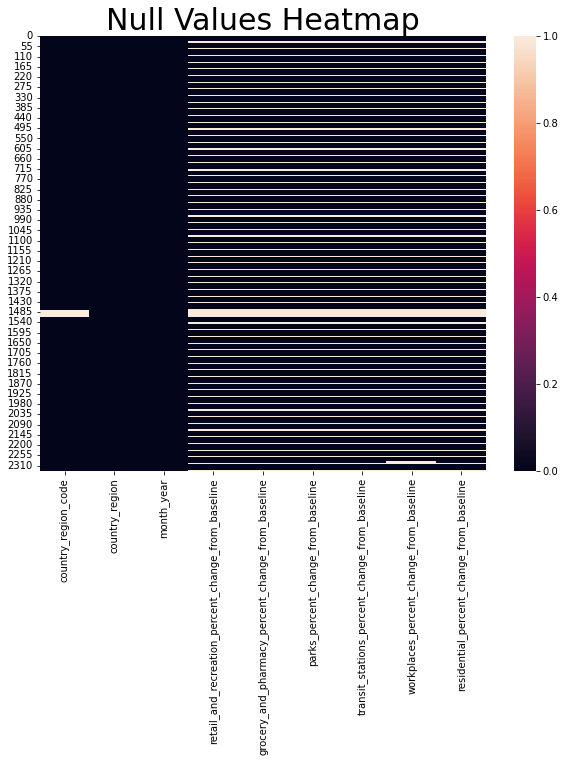

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_google_final.isnull())
plt.title('Null Values Heatmap', size=30)
plt.show()

In [ ]:
df_google_final.dropna(inplace=True)
df_google_final.reset_index(drop=True, inplace=True)
df_google_final.head()

country_region_code        country_region     month_year  \
0                  AE  United Arab Emirates  Februari 2020   
1                  AE  United Arab Emirates     Maret 2020   
2                  AE  United Arab Emirates     April 2020   
3                  AE  United Arab Emirates       Mei 2020   
4                  AE  United Arab Emirates      Juni 2020   

   retail_and_recreation_percent_change_from_baseline  \
0                                          -1.291667    
1                                         -19.524194    
2                                         -52.537500    
3                                         -45.487903    
4                                         -30.487500    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                           1.675000   
1                                          -4.770161   
2                                         -27.375000   
3                                         -20.491935   
4                                         -11.041667   

   parks_percent_change_from_baseline  \
0                            3.104762   
1                          -18.640553   
2                          -65.442857   
3                          -62.119816   
4                          -49.880952   

   transit_stations_percent_change_from_baseline  \
0                                       0.788889   
1                                     -25.752688   
2                                     -64.874346   
3                                     -55.349057   
4                                     -42.301508   

   workplaces_percent_change_from_baseline  \
0                                 2.591667   
1                               -11.709677   
2                               -41.454167   
3                               -36.520161   
4                               -21.200000   

   residential_percent_change_from_baseline  
0                                  1.000000  
1                                  9.008403  
2                                 24.819048  
3                                 23.593607  
4                                 16.581897

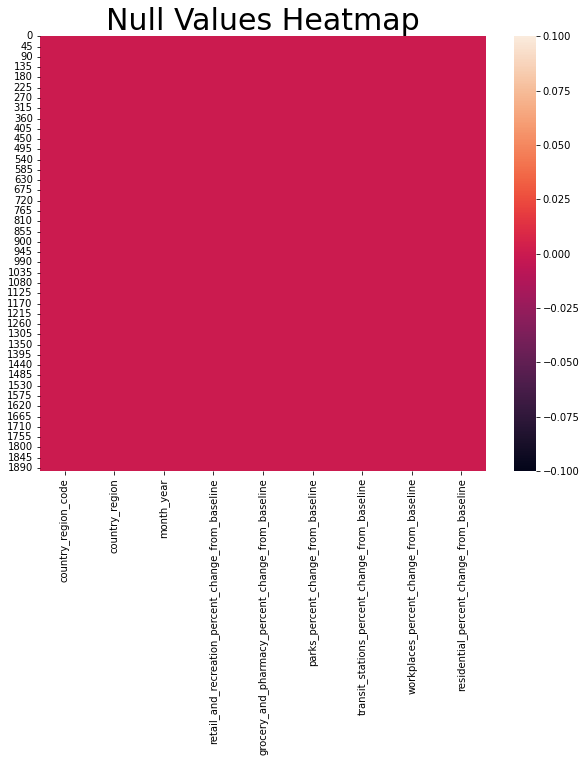

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_google_final.isnull())
plt.title('Null Values Heatmap', size=30)
plt.show()

#### Duplicate Data

In [ ]:
print("Jumlah data duplikat: ", df_google_final.duplicated().sum())

Jumlah data duplikat:  0


In [ ]:
df_google_final.drop_duplicates(inplace=True)
df_google_final.head()

country_region_code        country_region     month_year  \
0                  AE  United Arab Emirates  Februari 2020   
1                  AE  United Arab Emirates     Maret 2020   
2                  AE  United Arab Emirates     April 2020   
3                  AE  United Arab Emirates       Mei 2020   
4                  AE  United Arab Emirates      Juni 2020   

   retail_and_recreation_percent_change_from_baseline  \
0                                          -1.291667    
1                                         -19.524194    
2                                         -52.537500    
3                                         -45.487903    
4                                         -30.487500    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                           1.675000   
1                                          -4.770161   
2                                         -27.375000   
3                                         -20.491935   
4                                         -11.041667   

   parks_percent_change_from_baseline  \
0                            3.104762   
1                          -18.640553   
2                          -65.442857   
3                          -62.119816   
4                          -49.880952   

   transit_stations_percent_change_from_baseline  \
0                                       0.788889   
1                                     -25.752688   
2                                     -64.874346   
3                                     -55.349057   
4                                     -42.301508   

   workplaces_percent_change_from_baseline  \
0                                 2.591667   
1                               -11.709677   
2                               -41.454167   
3                               -36.520161   
4                               -21.200000   

   residential_percent_change_from_baseline  
0                                  1.000000  
1                                  9.008403  
2                                 24.819048  
3                                 23.593607  
4                                 16.581897

#### Outliers

(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text major ticklabel objects>)

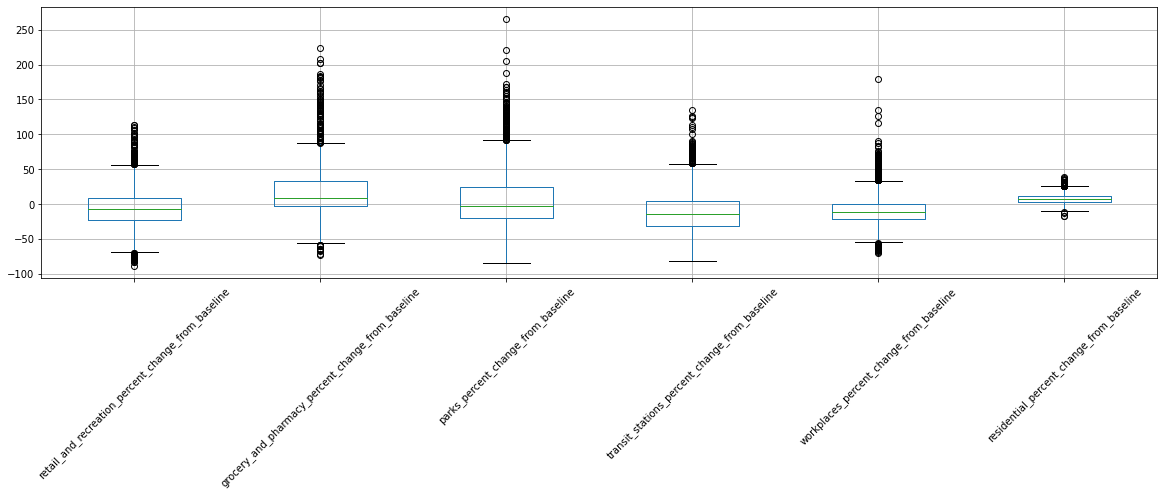

In [ ]:
df_google_final.boxplot(figsize=(20,5))
plt.xticks(rotation=45)

Outliers tidak dihapus karena data tergolong sedikit dan data dibutuhkan untuk prediksi

### Save Data

In [ ]:
df_google_final.to_csv(r'/content/drive/MyDrive/DSA Compfest/DSA - Neural DRT/Global_Mobility_Report_Edited.csv', index = False, header=True)

## MIT

### Data Preprocessing

In [ ]:
df_google_final

country_region_code        country_region     month_year  \
0                     AE  United Arab Emirates  Februari 2020   
1                     AE  United Arab Emirates     Maret 2020   
2                     AE  United Arab Emirates     April 2020   
3                     AE  United Arab Emirates       Mei 2020   
4                     AE  United Arab Emirates      Juni 2020   
...                  ...                   ...            ...   
1899                  ZA          South Africa     Maret 2022   
1900                  ZA          South Africa     April 2022   
1901                  ZA          South Africa       Mei 2022   
1902                  ZA          South Africa      Juni 2022   
1903                  ZA          South Africa      Juli 2022   

      retail_and_recreation_percent_change_from_baseline  \
0                                             -1.291667    
1                                            -19.524194    
2                                            -52.537500    
3                                            -45.487903    
4                                            -30.487500    
...                                                 ...    
1899                                          24.429032    
1900                                          24.150000    
1901                                          24.532258    
1902                                          25.846667    
1903                                          39.300000    

      grocery_and_pharmacy_percent_change_from_baseline  \
0                                              1.675000   
1                                             -4.770161   
2                                            -27.375000   
3                                            -20.491935   
4                                            -11.041667   
...                                                 ...   
1899                                          37.487097   
1900                                          37.976667   
1901                                          39.874194   
1902                                          39.786667   
1903                                          56.700000   

      parks_percent_change_from_baseline  \
0                               3.104762   
1                             -18.640553   
2                             -65.442857   
3                             -62.119816   
4                             -49.880952   
...                                  ...   
1899                           80.983871   
1900                           89.926667   
1901                           80.003226   
1902                           87.480000   
1903                           99.400000   

      transit_stations_percent_change_from_baseline  \
0                                          0.788889   
1                                        -25.752688   
2                                        -64.874346   
3                                        -55.349057   
4                                        -42.301508   
...                                             ...   
1899                                      39.372180   
1900                                      52.569721   
1901                                      54.239382   
1902                                      56.750000   
1903                                      80.555556   

      workplaces_percent_change_from_baseline  \
0                                    2.591667   
1                                  -11.709677   
2                                  -41.454167   
3                                  -36.520161   
4                                  -21.200000   
...                                       ...   
1899                                22.996774   
1900                                18.060000   
1901                                28.629032   
1902                                24.103333   
1903                                 8.300000   

      residenti

In [ ]:
df_mit

gender  age country  results_count  effective_sample_size  \
0     all  all      JM           4522               3102.800   
1     all  all      CO          61028              35727.129   
2     all  all      SN           3959               1853.477   
3     all  all      TT           5715               2852.901   
4     all  all      IT          63676              35583.687   
..    ...  ...     ...            ...                    ...   
61    all  all      BO           5503               3071.536   
63    all  all      EC           5693               3153.517   
64    all  all      VE           6351               4384.111   
65    all  all      NL           6554               4526.501   
66    all  all      PK          56461              16697.844   

    vaccine_accept_yes  vaccine_accept_no  vaccine_accept_dontknow  \
0             0.311204           0.339946                 0.348850   
1             0.650709           0.146689                 0.200478   
2             0.392959           0.360189                 0.246852   
3             0.469852           0.217882                 0.312266   
4             0.663675           0.123808                 0.191511   
..                 ...                ...                      ...   
61            0.684192           0.136624                 0.179184   
63            0.723647           0.112203                 0.164150   
64            0.679673           0.117102                 0.203225   
65            0.588024           0.162130                 0.249846   
66            0.645814           0.172516                 0.173968   

    mismatch_index  \
0           15.992   
1           10.600   
2            6.015   
3           16.264   
4           13.793   
..             ...   
61          10.925   
63           9.170   
64          11.424   
65           8.443   
66          14.128   

    distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means  \
0                                               0.069                               
1                                               0.111                               
2                                               0.097                               
3                                               0.061                               
4                                               0.042                               
..                                                ...                               
61                                              0.113                               
63                                              0.122                               
64                                              0.105                               
65                                              0.054                               
66                                              0.095                               

    ...  news_mediums_messaging-apps_No  news_mediums_messaging-apps_Yes  \
0   ...                           0.636                            0.364   
1   ...                           0.695                            0.305   
2   ...                           0.836                            0.164   
3   ...                           0.632                            0.368   
4   ...                           0.881                            0.119   
..  ...                             ...                              ...   
61  ...                           0.778                            0.222   
63  ...                           0.749                            0.251   
64  ...                           0.670                            0.330   
65  ...                           0.861                            0.139   
66  ...                           0.644                            0.356   

    news_mediums_newspapers_No  news_mediums_newspapers_Yes  \
0                        0.608                        0.392   
1                        0.710                        0.290   
2    

In [ ]:
df_mit.drop(['gender', 'age'], axis=1, inplace=True)
df_mit

country  results_count  effective_sample_size  vaccine_accept_yes  \
0       JM           4522               3102.800            0.311204   
1       CO          61028              35727.129            0.650709   
2       SN           3959               1853.477            0.392959   
3       TT           5715               2852.901            0.469852   
4       IT          63676              35583.687            0.663675   
..     ...            ...                    ...                 ...   
61      BO           5503               3071.536            0.684192   
63      EC           5693               3153.517            0.723647   
64      VE           6351               4384.111            0.679673   
65      NL           6554               4526.501            0.588024   
66      PK          56461              16697.844            0.645814   

    vaccine_accept_no  vaccine_accept_dontknow  mismatch_index  \
0            0.339946                 0.348850          15.992   
1            0.146689                 0.200478          10.600   
2            0.360189                 0.246852           6.015   
3            0.217882                 0.312266          16.264   
4            0.123808                 0.191511          13.793   
..                ...                      ...             ...   
61           0.136624                 0.179184          10.925   
63           0.112203                 0.164150           9.170   
64           0.117102                 0.203225          11.424   
65           0.162130                 0.249846           8.443   
66           0.172516                 0.173968          14.128   

    distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means  \
0                                               0.069                               
1                                               0.111                               
2                                               0.097                               
3                                               0.061                               
4                                               0.042                               
..                                                ...                               
61                                              0.113                               
63                                              0.122                               
64                                              0.105                               
65                                              0.054                               
66                                              0.095                               

    distancing_familiarity_I-have-heard-of-it-and-know-what-it-means  \
0                                               0.886                  
1                                               0.850                  
2                                               0.788                  
3                                               0.914                  
4                                               0.941                  
..                                                ...                  
61                                              0.829                  
63                                              0.813                  
64                                              0.850                  
65                                              0.917                  
66                                              0.782                  

    distancing_familiarity_I-have-heard-of-it-but-do-not-know-what-it-means  \
0                                               0.011                         
1                                               0.019                         
2                                               0.059                         
3                                               0.005                         
4                                               0.008           

In [ ]:
df_mit = df_mit.sort_values(by=['country'])
df_mit = df_mit.reset_index(drop=True)
df_mit

country  results_count  effective_sample_size  vaccine_accept_yes  \
0       AE           5350               2835.333            0.658886   
1       AF           4914               1144.832            0.777215   
2       AO           5597               2664.304            0.575135   
3       AR          61354              32960.962            0.641381   
4       AU           5676               4333.903            0.734251   
..     ...            ...                    ...                 ...   
59      US          58557              30062.776            0.514046   
60      UY           5520               3178.062            0.561943   
61      VE           6351               4384.111            0.679673   
62      VN          64560              20921.982            0.821734   
63      ZA           6317               3681.357            0.605186   

    vaccine_accept_no  vaccine_accept_dontknow  mismatch_index  \
0            0.139946                 0.201168           5.967   
1            0.096117                 0.126668          22.000   
2            0.123401                 0.301464          22.417   
3            0.139496                 0.205726          11.019   
4            0.107589                 0.158160          12.050   
..                ...                      ...             ...   
59           0.210755                 0.206835          19.363   
60           0.177610                 0.260447           9.608   
61           0.117102                 0.203225          11.424   
62           0.063560                 0.113279           7.528   
63           0.198958                 0.195856          21.179   

    distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means  \
0                                               0.146                               
1                                               0.132                               
2                                               0.080                               
3                                               0.090                               
4                                               0.030                               
..                                                ...                               
59                                              0.041                               
60                                              0.054                               
61                                              0.105                               
62                                              0.065                               
63                                              0.093                               

    distancing_familiarity_I-have-heard-of-it-and-know-what-it-means  \
0                                               0.748                  
1                                               0.611                  
2                                               0.866                  
3                                               0.863                  
4                                               0.954                  
..                                                ...                  
59                                              0.932                  
60                                              0.926                  
61                                              0.850                  
62                                              0.912                  
63                                              0.850                  

    distancing_familiarity_I-have-heard-of-it-but-do-not-know-what-it-means  \
0                                               0.033                         
1                                               0.096                         
2                                               0.019                         
3                                               0.017                         
4                                               0.004           

In [ ]:
df_google_first = df_google_final.loc[df_google_final['month_year'] == 'Februari 2020']
df_google_first

country_region_code        country_region     month_year  \
0                     AE  United Arab Emirates  Februari 2020   
30                    AF           Afghanistan  Februari 2020   
59                    AO                Angola  Februari 2020   
89                    AR             Argentina  Februari 2020   
119                   AU             Australia  Februari 2020   
...                  ...                   ...            ...   
1763                  US         United States  Februari 2020   
1793                  UY               Uruguay  Februari 2020   
1823                  VE             Venezuela  Februari 2020   
1853                  VN               Vietnam  Februari 2020   
1874                  ZA          South Africa  Februari 2020   

      retail_and_recreation_percent_change_from_baseline  \
0                                             -1.291667    
30                                            -1.200000    
59                                            -3.700000    
89                                            -1.606783    
119                                            0.212167    
...                                                 ...    
1763                                           6.145196    
1793                                           1.834921    
1823                                           2.266667    
1853                                          -9.855208    
1874                                          -3.773333    

      grocery_and_pharmacy_percent_change_from_baseline  \
0                                              1.675000   
30                                             5.100000   
59                                            -2.967742   
89                                            -1.808241   
119                                            2.352772   
...                                                 ...   
1763                                           2.103233   
1793                                           0.307937   
1823                                           1.066667   
1853                                         -10.438578   
1874                                          -4.793333   

      parks_percent_change_from_baseline  \
0                               3.104762   
30                              0.866667   
59                             -1.133333   
89                             -1.351187   
119                             0.255942   
...                                  ...   
1763                           14.454504   
1793                           -3.701987   
1823                            8.333333   
1853                           -8.423924   
1874                           -5.913333   

      transit_stations_percent_change_from_baseline  \
0                                          0.788889   
30                                         4.966667   
59                                        -5.733333   
89                                        -0.438056   
119                                        9.035065   
...                                             ...   
1763                                       4.253531   
1793                                      -0.472081   
1823                                      -0.266667   
1853                                     -14.319366   
1874                                       0.689655   

      workplaces_percent_change_from_baseline  \
0                                    2.591667   
30                                   2.600000   
59                                  -6.819444   
89                                   0.544576   
119                                 12.033563   
...                                       ...   
1763                                -0.086161   
1793                                 1.667732   
1823                                -2.666667   
1853                                -1.333333   
1874                                 2.646667   

      residenti

In [ ]:
exclude_first = []

for i in same_country:
  if (len(df_google_first.loc[df_google_first['country_region_code'] == i]) != 1):
    exclude_first.append(i)
print(exclude_first)

[]


In [ ]:
df_google_first = df_google_first.reset_index(drop=True)
df_google_first

country_region_code        country_region     month_year  \
0                   AE  United Arab Emirates  Februari 2020   
1                   AF           Afghanistan  Februari 2020   
2                   AO                Angola  Februari 2020   
3                   AR             Argentina  Februari 2020   
4                   AU             Australia  Februari 2020   
..                 ...                   ...            ...   
59                  US         United States  Februari 2020   
60                  UY               Uruguay  Februari 2020   
61                  VE             Venezuela  Februari 2020   
62                  VN               Vietnam  Februari 2020   
63                  ZA          South Africa  Februari 2020   

    retail_and_recreation_percent_change_from_baseline  \
0                                           -1.291667    
1                                           -1.200000    
2                                           -3.700000    
3                                           -1.606783    
4                                            0.212167    
..                                                ...    
59                                           6.145196    
60                                           1.834921    
61                                           2.266667    
62                                          -9.855208    
63                                          -3.773333    

    grocery_and_pharmacy_percent_change_from_baseline  \
0                                            1.675000   
1                                            5.100000   
2                                           -2.967742   
3                                           -1.808241   
4                                            2.352772   
..                                                ...   
59                                           2.103233   
60                                           0.307937   
61                                           1.066667   
62                                         -10.438578   
63                                          -4.793333   

    parks_percent_change_from_baseline  \
0                             3.104762   
1                             0.866667   
2                            -1.133333   
3                            -1.351187   
4                             0.255942   
..                                 ...   
59                           14.454504   
60                           -3.701987   
61                            8.333333   
62                           -8.423924   
63                           -5.913333   

    transit_stations_percent_change_from_baseline  \
0                                        0.788889   
1                                        4.966667   
2                                       -5.733333   
3                                       -0.438056   
4                                        9.035065   
..                                            ...   
59                                       4.253531   
60                                      -0.472081   
61                                      -0.266667   
62                                     -14.319366   
63                                       0.689655   

    workplaces_percent_change_from_baseline  \
0                                  2.591667   
1                                  2.600000   
2                                 -6.819444   
3                                  0.544576   
4                                 12.033563   
..                                      ...   
59                                -0.086161   
60                                 1.667732   
61                                -2.666667   
62                                -1.333333   
63                                 2.646667   

    residential_percent_change_from_baseline  
0                                   1.000000  
1                                   0.800000  
2               

In [ ]:
df_google_last = df_google_final.loc[df_google_final['month_year'] == 'Juni 2022']
df_google_last

country_region_code        country_region month_year  \
28                    AE  United Arab Emirates  Juni 2022   
57                    AF           Afghanistan  Juni 2022   
87                    AO                Angola  Juni 2022   
117                   AR             Argentina  Juni 2022   
147                   AU             Australia  Juni 2022   
...                  ...                   ...        ...   
1761                  UG                Uganda  Juni 2022   
1791                  US         United States  Juni 2022   
1821                  UY               Uruguay  Juni 2022   
1851                  VE             Venezuela  Juni 2022   
1902                  ZA          South Africa  Juni 2022   

      retail_and_recreation_percent_change_from_baseline  \
28                                            22.462500    
57                                            73.616667    
87                                           101.750000    
117                                            9.563906    
147                                           -0.962029    
...                                                 ...    
1761                                          46.061611    
1791                                           5.498054    
1821                                          -8.808550    
1851                                          40.900000    
1902                                          25.846667    

      grocery_and_pharmacy_percent_change_from_baseline  \
28                                            41.129167   
57                                           159.566667   
87                                            96.366667   
117                                           39.641927   
147                                            7.401143   
...                                                 ...   
1761                                          40.000000   
1791                                           8.357191   
1821                                          17.397661   
1851                                          77.766667   
1902                                          39.786667   

      parks_percent_change_from_baseline  \
28                             -2.190476   
57                            106.533333   
87                            172.850000   
117                           -17.836815   
147                           -19.098740   
...                                  ...   
1761                          119.577778   
1791                           65.043398   
1821                          -33.399023   
1851                           42.733333   
1902                           87.480000   

      transit_stations_percent_change_from_baseline  \
28                                        19.596591   
57                                        14.250000   
87                                        85.900000   
117                                       -0.271837   
147                                      -31.304848   
...                                             ...   
1761                                      21.693277   
1791                                       5.319231   
1821                                     -16.361842   
1851                                      -1.266667   
1902                                      56.750000   

      workplaces_percent_change_from_baseline  \
28                                  32.350000   
57                                  27.900000   
87                                  67.116505   
117                                 45.813807   
147                                 -2.685223   
...                                       ...   
1761                                75.218947   
1791                               -17.465682   
1821                                30.067093   
1851                                43.466667   
1902                                24.103333   

      residential_percent_change_from_baseline  
28            

In [ ]:
exclude_first = []

for i in same_country:
  if (len(df_google_last.loc[df_google_last['country_region_code'] == i]) != 1):
    exclude_first.append(i)
print(exclude_first)

['UA', 'VN']


In [ ]:
df_ua = df_google_final.loc[df_google_final['country_region_code'] == 'UA']
df_ua.tail()

country_region_code country_region     month_year  \
1728                  UA        Ukraine   Oktober 2021   
1729                  UA        Ukraine  November 2021   
1730                  UA        Ukraine  Desember 2021   
1731                  UA        Ukraine   Januari 2022   
1732                  UA        Ukraine  Februari 2022   

      retail_and_recreation_percent_change_from_baseline  \
1728                                          -3.822581    
1729                                         -13.133333    
1730                                          -4.903226    
1731                                         -17.322581    
1732                                         -14.021739    

      grocery_and_pharmacy_percent_change_from_baseline  \
1728                                          12.983871   
1729                                           9.966667   
1730                                          13.016129   
1731                                           1.758065   
1732                                           7.021739   

      parks_percent_change_from_baseline  \
1728                           14.129032   
1729                           -4.000000   
1730                           -9.838710   
1731                          -10.903226   
1732                          -16.065217   

      transit_stations_percent_change_from_baseline  \
1728                                      -3.903226   
1729                                     -12.283333   
1730                                      -9.000000   
1731                                     -19.919355   
1732                                     -17.739130   

      workplaces_percent_change_from_baseline  \
1728                               -17.403226   
1729                               -18.516667   
1730                               -14.645161   
1731                               -25.161290   
1732                               -19.086957   

      residential_percent_change_from_baseline  
1728                                 -1.161290  
1729                                  1.566667  
1730                                  1.241935  
1731                                  4.354839  
1732                                  3.934783

In [ ]:
df_vn = df_google_final.loc[df_google_final['country_region_code'] == 'VN']
df_vn.tail()

country_region_code country_region      month_year  \
1869                  VN        Vietnam       Juni 2021   
1870                  VN        Vietnam       Juli 2021   
1871                  VN        Vietnam    Agustus 2021   
1872                  VN        Vietnam  September 2021   
1873                  VN        Vietnam    Oktober 2021   

      retail_and_recreation_percent_change_from_baseline  \
1869                                         -24.380208    
1870                                         -38.524698    
1871                                         -53.684980    
1872                                         -46.485417    
1873                                         -27.456149    

      grocery_and_pharmacy_percent_change_from_baseline  \
1869                                          -0.984265   
1870                                         -15.486330   
1871                                         -32.914570   
1872                                         -27.316476   
1873                                          -9.496316   

      parks_percent_change_from_baseline  \
1869                          -19.462741   
1870                          -31.291267   
1871                          -44.103327   
1872                          -38.730068   
1873                          -24.959576   

      transit_stations_percent_change_from_baseline  \
1869                                     -32.421260   
1870                                     -45.594565   
1871                                     -60.031892   
1872                                     -55.930207   
1873                                     -40.062805   

      workplaces_percent_change_from_baseline  \
1869                               -16.944792   
1870                               -29.276714   
1871                               -41.431452   
1872                               -39.346875   
1873                               -29.017270   

      residential_percent_change_from_baseline  
1869                                 -6.970772  
1870                                 -0.853535  
1871                                  5.528550  
1872                                  2.256651  
1873                                 -4.952069

In [ ]:
df_google_last = df_google_last.append(df_ua.loc[df_ua['month_year'] == 'Februari 2022'], ignore_index = True)
df_google_last = df_google_last.append(df_vn.loc[df_vn['month_year'] == 'Oktober 2021'], ignore_index = True)
df_google_last = df_google_last.sort_values(by=['country_region_code'])
df_google_last = df_google_last.reset_index(drop=True)
df_google_last

country_region_code        country_region    month_year  \
0                   AE  United Arab Emirates     Juni 2022   
1                   AF           Afghanistan     Juni 2022   
2                   AO                Angola     Juni 2022   
3                   AR             Argentina     Juni 2022   
4                   AU             Australia     Juni 2022   
..                 ...                   ...           ...   
59                  US         United States     Juni 2022   
60                  UY               Uruguay     Juni 2022   
61                  VE             Venezuela     Juni 2022   
62                  VN               Vietnam  Oktober 2021   
63                  ZA          South Africa     Juni 2022   

    retail_and_recreation_percent_change_from_baseline  \
0                                           22.462500    
1                                           73.616667    
2                                          101.750000    
3                                            9.563906    
4                                           -0.962029    
..                                                ...    
59                                           5.498054    
60                                          -8.808550    
61                                          40.900000    
62                                         -27.456149    
63                                          25.846667    

    grocery_and_pharmacy_percent_change_from_baseline  \
0                                           41.129167   
1                                          159.566667   
2                                           96.366667   
3                                           39.641927   
4                                            7.401143   
..                                                ...   
59                                           8.357191   
60                                          17.397661   
61                                          77.766667   
62                                          -9.496316   
63                                          39.786667   

    parks_percent_change_from_baseline  \
0                            -2.190476   
1                           106.533333   
2                           172.850000   
3                           -17.836815   
4                           -19.098740   
..                                 ...   
59                           65.043398   
60                          -33.399023   
61                           42.733333   
62                          -24.959576   
63                           87.480000   

    transit_stations_percent_change_from_baseline  \
0                                       19.596591   
1                                       14.250000   
2                                       85.900000   
3                                       -0.271837   
4                                      -31.304848   
..                                            ...   
59                                       5.319231   
60                                     -16.361842   
61                                      -1.266667   
62                                     -40.062805   
63                                      56.750000   

    workplaces_percent_change_from_baseline  \
0                                 32.350000   
1                                 27.900000   
2                                 67.116505   
3                                 45.813807   
4                                 -2.685223   
..                                      ...   
59                               -17.465682   
60                                30.067093   
61                                43.466667   
62                               -29.017270   
63                                24.103333   

    residential_percent_change_from_baseline  
0                                   9.512712  
1                                   7.950000  
2                           

In [ ]:
df_mit['first_retail_and_recreation_percent'] = df_google_first['retail_and_recreation_percent_change_from_baseline']
df_mit['first_grocery_and_pharmacy_percent'] = df_google_first['grocery_and_pharmacy_percent_change_from_baseline']
df_mit['first_parks_percent'] = df_google_first['parks_percent_change_from_baseline']
df_mit['first_transit_stations_percent'] = df_google_first['transit_stations_percent_change_from_baseline']
df_mit['first_workplaces_percent'] = df_google_first['workplaces_percent_change_from_baseline']
df_mit['first_residential_percent'] = df_google_first['residential_percent_change_from_baseline']

df_mit['retail_and_recreation_percent'] = df_google_last['retail_and_recreation_percent_change_from_baseline']
df_mit['grocery_and_pharmacy_percent'] = df_google_last['grocery_and_pharmacy_percent_change_from_baseline']
df_mit['parks_percent'] = df_google_last['parks_percent_change_from_baseline']
df_mit['transit_stations_percent'] = df_google_last['transit_stations_percent_change_from_baseline']
df_mit['workplaces_percent'] = df_google_last['workplaces_percent_change_from_baseline']
df_mit['residential_percent'] = df_google_last['residential_percent_change_from_baseline']

df_mit

country  results_count  effective_sample_size  vaccine_accept_yes  \
0       AE           5350               2835.333            0.658886   
1       AF           4914               1144.832            0.777215   
2       AO           5597               2664.304            0.575135   
3       AR          61354              32960.962            0.641381   
4       AU           5676               4333.903            0.734251   
..     ...            ...                    ...                 ...   
59      US          58557              30062.776            0.514046   
60      UY           5520               3178.062            0.561943   
61      VE           6351               4384.111            0.679673   
62      VN          64560              20921.982            0.821734   
63      ZA           6317               3681.357            0.605186   

    vaccine_accept_no  vaccine_accept_dontknow  mismatch_index  \
0            0.139946                 0.201168           5.967   
1            0.096117                 0.126668          22.000   
2            0.123401                 0.301464          22.417   
3            0.139496                 0.205726          11.019   
4            0.107589                 0.158160          12.050   
..                ...                      ...             ...   
59           0.210755                 0.206835          19.363   
60           0.177610                 0.260447           9.608   
61           0.117102                 0.203225          11.424   
62           0.063560                 0.113279           7.528   
63           0.198958                 0.195856          21.179   

    distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means  \
0                                               0.146                               
1                                               0.132                               
2                                               0.080                               
3                                               0.090                               
4                                               0.030                               
..                                                ...                               
59                                              0.041                               
60                                              0.054                               
61                                              0.105                               
62                                              0.065                               
63                                              0.093                               

    distancing_familiarity_I-have-heard-of-it-and-know-what-it-means  \
0                                               0.748                  
1                                               0.611                  
2                                               0.866                  
3                                               0.863                  
4                                               0.954                  
..                                                ...                  
59                                              0.932                  
60                                              0.926                  
61                                              0.850                  
62                                              0.912                  
63                                              0.850                  

    distancing_familiarity_I-have-heard-of-it-but-do-not-know-what-it-means  \
0                                               0.033                         
1                                               0.096                         
2                                               0.019                         
3                                               0.017                         
4                                               0.004           

In [ ]:
df_mit['is_increase_retail_and_recreation_percent'] = 0
df_mit['is_increase_grocery_and_pharmacy_percent'] = 0
df_mit['is_increase_parks_percent'] = 0
df_mit['is_increase_transit_stations_percent'] = 0
df_mit['is_increase_workplaces_percent'] = 0
df_mit['is_increase_residential_percent'] = 0
df_mit

country  results_count  effective_sample_size  vaccine_accept_yes  \
0       AE           5350               2835.333            0.658886   
1       AF           4914               1144.832            0.777215   
2       AO           5597               2664.304            0.575135   
3       AR          61354              32960.962            0.641381   
4       AU           5676               4333.903            0.734251   
..     ...            ...                    ...                 ...   
59      US          58557              30062.776            0.514046   
60      UY           5520               3178.062            0.561943   
61      VE           6351               4384.111            0.679673   
62      VN          64560              20921.982            0.821734   
63      ZA           6317               3681.357            0.605186   

    vaccine_accept_no  vaccine_accept_dontknow  mismatch_index  \
0            0.139946                 0.201168           5.967   
1            0.096117                 0.126668          22.000   
2            0.123401                 0.301464          22.417   
3            0.139496                 0.205726          11.019   
4            0.107589                 0.158160          12.050   
..                ...                      ...             ...   
59           0.210755                 0.206835          19.363   
60           0.177610                 0.260447           9.608   
61           0.117102                 0.203225          11.424   
62           0.063560                 0.113279           7.528   
63           0.198958                 0.195856          21.179   

    distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means  \
0                                               0.146                               
1                                               0.132                               
2                                               0.080                               
3                                               0.090                               
4                                               0.030                               
..                                                ...                               
59                                              0.041                               
60                                              0.054                               
61                                              0.105                               
62                                              0.065                               
63                                              0.093                               

    distancing_familiarity_I-have-heard-of-it-and-know-what-it-means  \
0                                               0.748                  
1                                               0.611                  
2                                               0.866                  
3                                               0.863                  
4                                               0.954                  
..                                                ...                  
59                                              0.932                  
60                                              0.926                  
61                                              0.850                  
62                                              0.912                  
63                                              0.850                  

    distancing_familiarity_I-have-heard-of-it-but-do-not-know-what-it-means  \
0                                               0.033                         
1                                               0.096                         
2                                               0.019                         
3                                               0.017                         
4                                               0.004           

In [ ]:
df_mit['is_increase_retail_and_recreation_percent'].loc[df_mit['first_retail_and_recreation_percent'] > df_mit['retail_and_recreation_percent']] = 1
df_mit['is_increase_grocery_and_pharmacy_percent'].loc[df_mit['first_grocery_and_pharmacy_percent'] > df_mit['grocery_and_pharmacy_percent']] = 1
df_mit['is_increase_parks_percent'].loc[df_mit['first_parks_percent'] > df_mit['parks_percent']] = 1
df_mit['is_increase_transit_stations_percent'].loc[df_mit['first_transit_stations_percent'] > df_mit['transit_stations_percent']] = 1
df_mit['is_increase_workplaces_percent'].loc[df_mit['first_workplaces_percent'] > df_mit['workplaces_percent']] = 1
df_mit['is_increase_residential_percent'].loc[df_mit['first_residential_percent'] > df_mit['residential_percent']] = 1
df_mit

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


country  results_count  effective_sample_size  vaccine_accept_yes  \
0       AE           5350               2835.333            0.658886   
1       AF           4914               1144.832            0.777215   
2       AO           5597               2664.304            0.575135   
3       AR          61354              32960.962            0.641381   
4       AU           5676               4333.903            0.734251   
..     ...            ...                    ...                 ...   
59      US          58557              30062.776            0.514046   
60      UY           5520               3178.062            0.561943   
61      VE           6351               4384.111            0.679673   
62      VN          64560              20921.982            0.821734   
63      ZA           6317               3681.357            0.605186   

    vaccine_accept_no  vaccine_accept_dontknow  mismatch_index  \
0            0.139946                 0.201168           5.967   
1            0.096117                 0.126668          22.000   
2            0.123401                 0.301464          22.417   
3            0.139496                 0.205726          11.019   
4            0.107589                 0.158160          12.050   
..                ...                      ...             ...   
59           0.210755                 0.206835          19.363   
60           0.177610                 0.260447           9.608   
61           0.117102                 0.203225          11.424   
62           0.063560                 0.113279           7.528   
63           0.198958                 0.195856          21.179   

    distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means  \
0                                               0.146                               
1                                               0.132                               
2                                               0.080                               
3                                               0.090                               
4                                               0.030                               
..                                                ...                               
59                                              0.041                               
60                                              0.054                               
61                                              0.105                               
62                                              0.065                               
63                                              0.093                               

    distancing_familiarity_I-have-heard-of-it-and-know-what-it-means  \
0                                               0.748                  
1                                               0.611                  
2                                               0.866                  
3                                               0.863                  
4                                               0.954                  
..                                                ...                  
59                                              0.932                  
60                                              0.926                  
61                                              0.850                  
62                                              0.912                  
63                                              0.850                  

    distancing_familiarity_I-have-heard-of-it-but-do-not-know-what-it-means  \
0                                               0.033                         
1                                               0.096                         
2                                               0.019                         
3                                               0.017                         
4                                               0.004           

In [ ]:
df_mit.drop(['first_retail_and_recreation_percent', 'first_grocery_and_pharmacy_percent', 'first_parks_percent', 'first_transit_stations_percent', 'first_workplaces_percent', 'first_residential_percent'], axis=1, inplace=True)
df_mit

country  results_count  effective_sample_size  vaccine_accept_yes  \
0       AE           5350               2835.333            0.658886   
1       AF           4914               1144.832            0.777215   
2       AO           5597               2664.304            0.575135   
3       AR          61354              32960.962            0.641381   
4       AU           5676               4333.903            0.734251   
..     ...            ...                    ...                 ...   
59      US          58557              30062.776            0.514046   
60      UY           5520               3178.062            0.561943   
61      VE           6351               4384.111            0.679673   
62      VN          64560              20921.982            0.821734   
63      ZA           6317               3681.357            0.605186   

    vaccine_accept_no  vaccine_accept_dontknow  mismatch_index  \
0            0.139946                 0.201168           5.967   
1            0.096117                 0.126668          22.000   
2            0.123401                 0.301464          22.417   
3            0.139496                 0.205726          11.019   
4            0.107589                 0.158160          12.050   
..                ...                      ...             ...   
59           0.210755                 0.206835          19.363   
60           0.177610                 0.260447           9.608   
61           0.117102                 0.203225          11.424   
62           0.063560                 0.113279           7.528   
63           0.198958                 0.195856          21.179   

    distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means  \
0                                               0.146                               
1                                               0.132                               
2                                               0.080                               
3                                               0.090                               
4                                               0.030                               
..                                                ...                               
59                                              0.041                               
60                                              0.054                               
61                                              0.105                               
62                                              0.065                               
63                                              0.093                               

    distancing_familiarity_I-have-heard-of-it-and-know-what-it-means  \
0                                               0.748                  
1                                               0.611                  
2                                               0.866                  
3                                               0.863                  
4                                               0.954                  
..                                                ...                  
59                                              0.932                  
60                                              0.926                  
61                                              0.850                  
62                                              0.912                  
63                                              0.850                  

    distancing_familiarity_I-have-heard-of-it-but-do-not-know-what-it-means  \
0                                               0.033                         
1                                               0.096                         
2                                               0.019                         
3                                               0.017                         
4                                               0.004           

### Data Cleaning

In [ ]:
df_mit

country  results_count  effective_sample_size  vaccine_accept_yes  \
0       AE           5350               2835.333            0.658886   
1       AF           4914               1144.832            0.777215   
2       AO           5597               2664.304            0.575135   
3       AR          61354              32960.962            0.641381   
4       AU           5676               4333.903            0.734251   
..     ...            ...                    ...                 ...   
59      US          58557              30062.776            0.514046   
60      UY           5520               3178.062            0.561943   
61      VE           6351               4384.111            0.679673   
62      VN          64560              20921.982            0.821734   
63      ZA           6317               3681.357            0.605186   

    vaccine_accept_no  vaccine_accept_dontknow  mismatch_index  \
0            0.139946                 0.201168           5.967   
1            0.096117                 0.126668          22.000   
2            0.123401                 0.301464          22.417   
3            0.139496                 0.205726          11.019   
4            0.107589                 0.158160          12.050   
..                ...                      ...             ...   
59           0.210755                 0.206835          19.363   
60           0.177610                 0.260447           9.608   
61           0.117102                 0.203225          11.424   
62           0.063560                 0.113279           7.528   
63           0.198958                 0.195856          21.179   

    distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means  \
0                                               0.146                               
1                                               0.132                               
2                                               0.080                               
3                                               0.090                               
4                                               0.030                               
..                                                ...                               
59                                              0.041                               
60                                              0.054                               
61                                              0.105                               
62                                              0.065                               
63                                              0.093                               

    distancing_familiarity_I-have-heard-of-it-and-know-what-it-means  \
0                                               0.748                  
1                                               0.611                  
2                                               0.866                  
3                                               0.863                  
4                                               0.954                  
..                                                ...                  
59                                              0.932                  
60                                              0.926                  
61                                              0.850                  
62                                              0.912                  
63                                              0.850                  

    distancing_familiarity_I-have-heard-of-it-but-do-not-know-what-it-means  \
0                                               0.033                         
1                                               0.096                         
2                                               0.019                         
3                                               0.017                         
4                                               0.004           

#### Missing value 

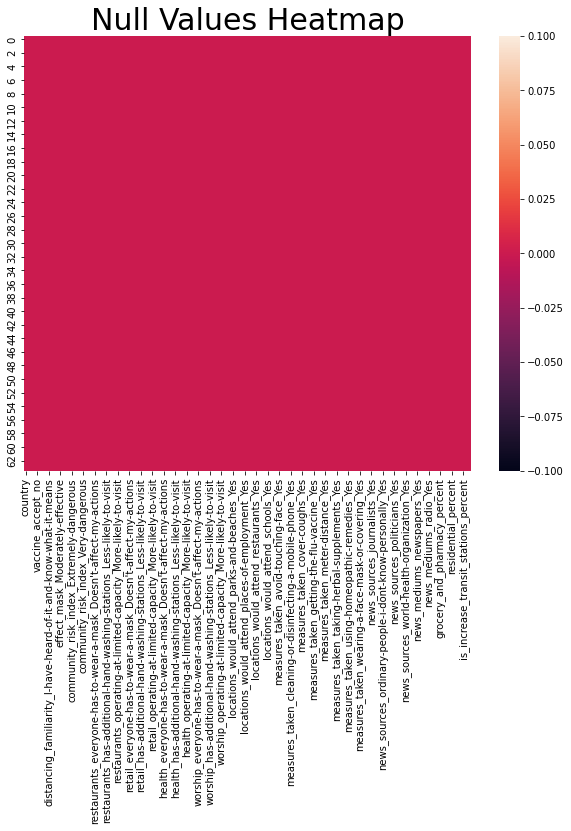

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_mit.isnull())
plt.title('Null Values Heatmap', size=30)
plt.show()

#### Duplicate Data

In [ ]:
print("Jumlah data duplikat: ", df_mit.duplicated().sum())

Jumlah data duplikat:  0


#### Outliers

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]),
 <a list of 154 Text major ticklabel objects>)

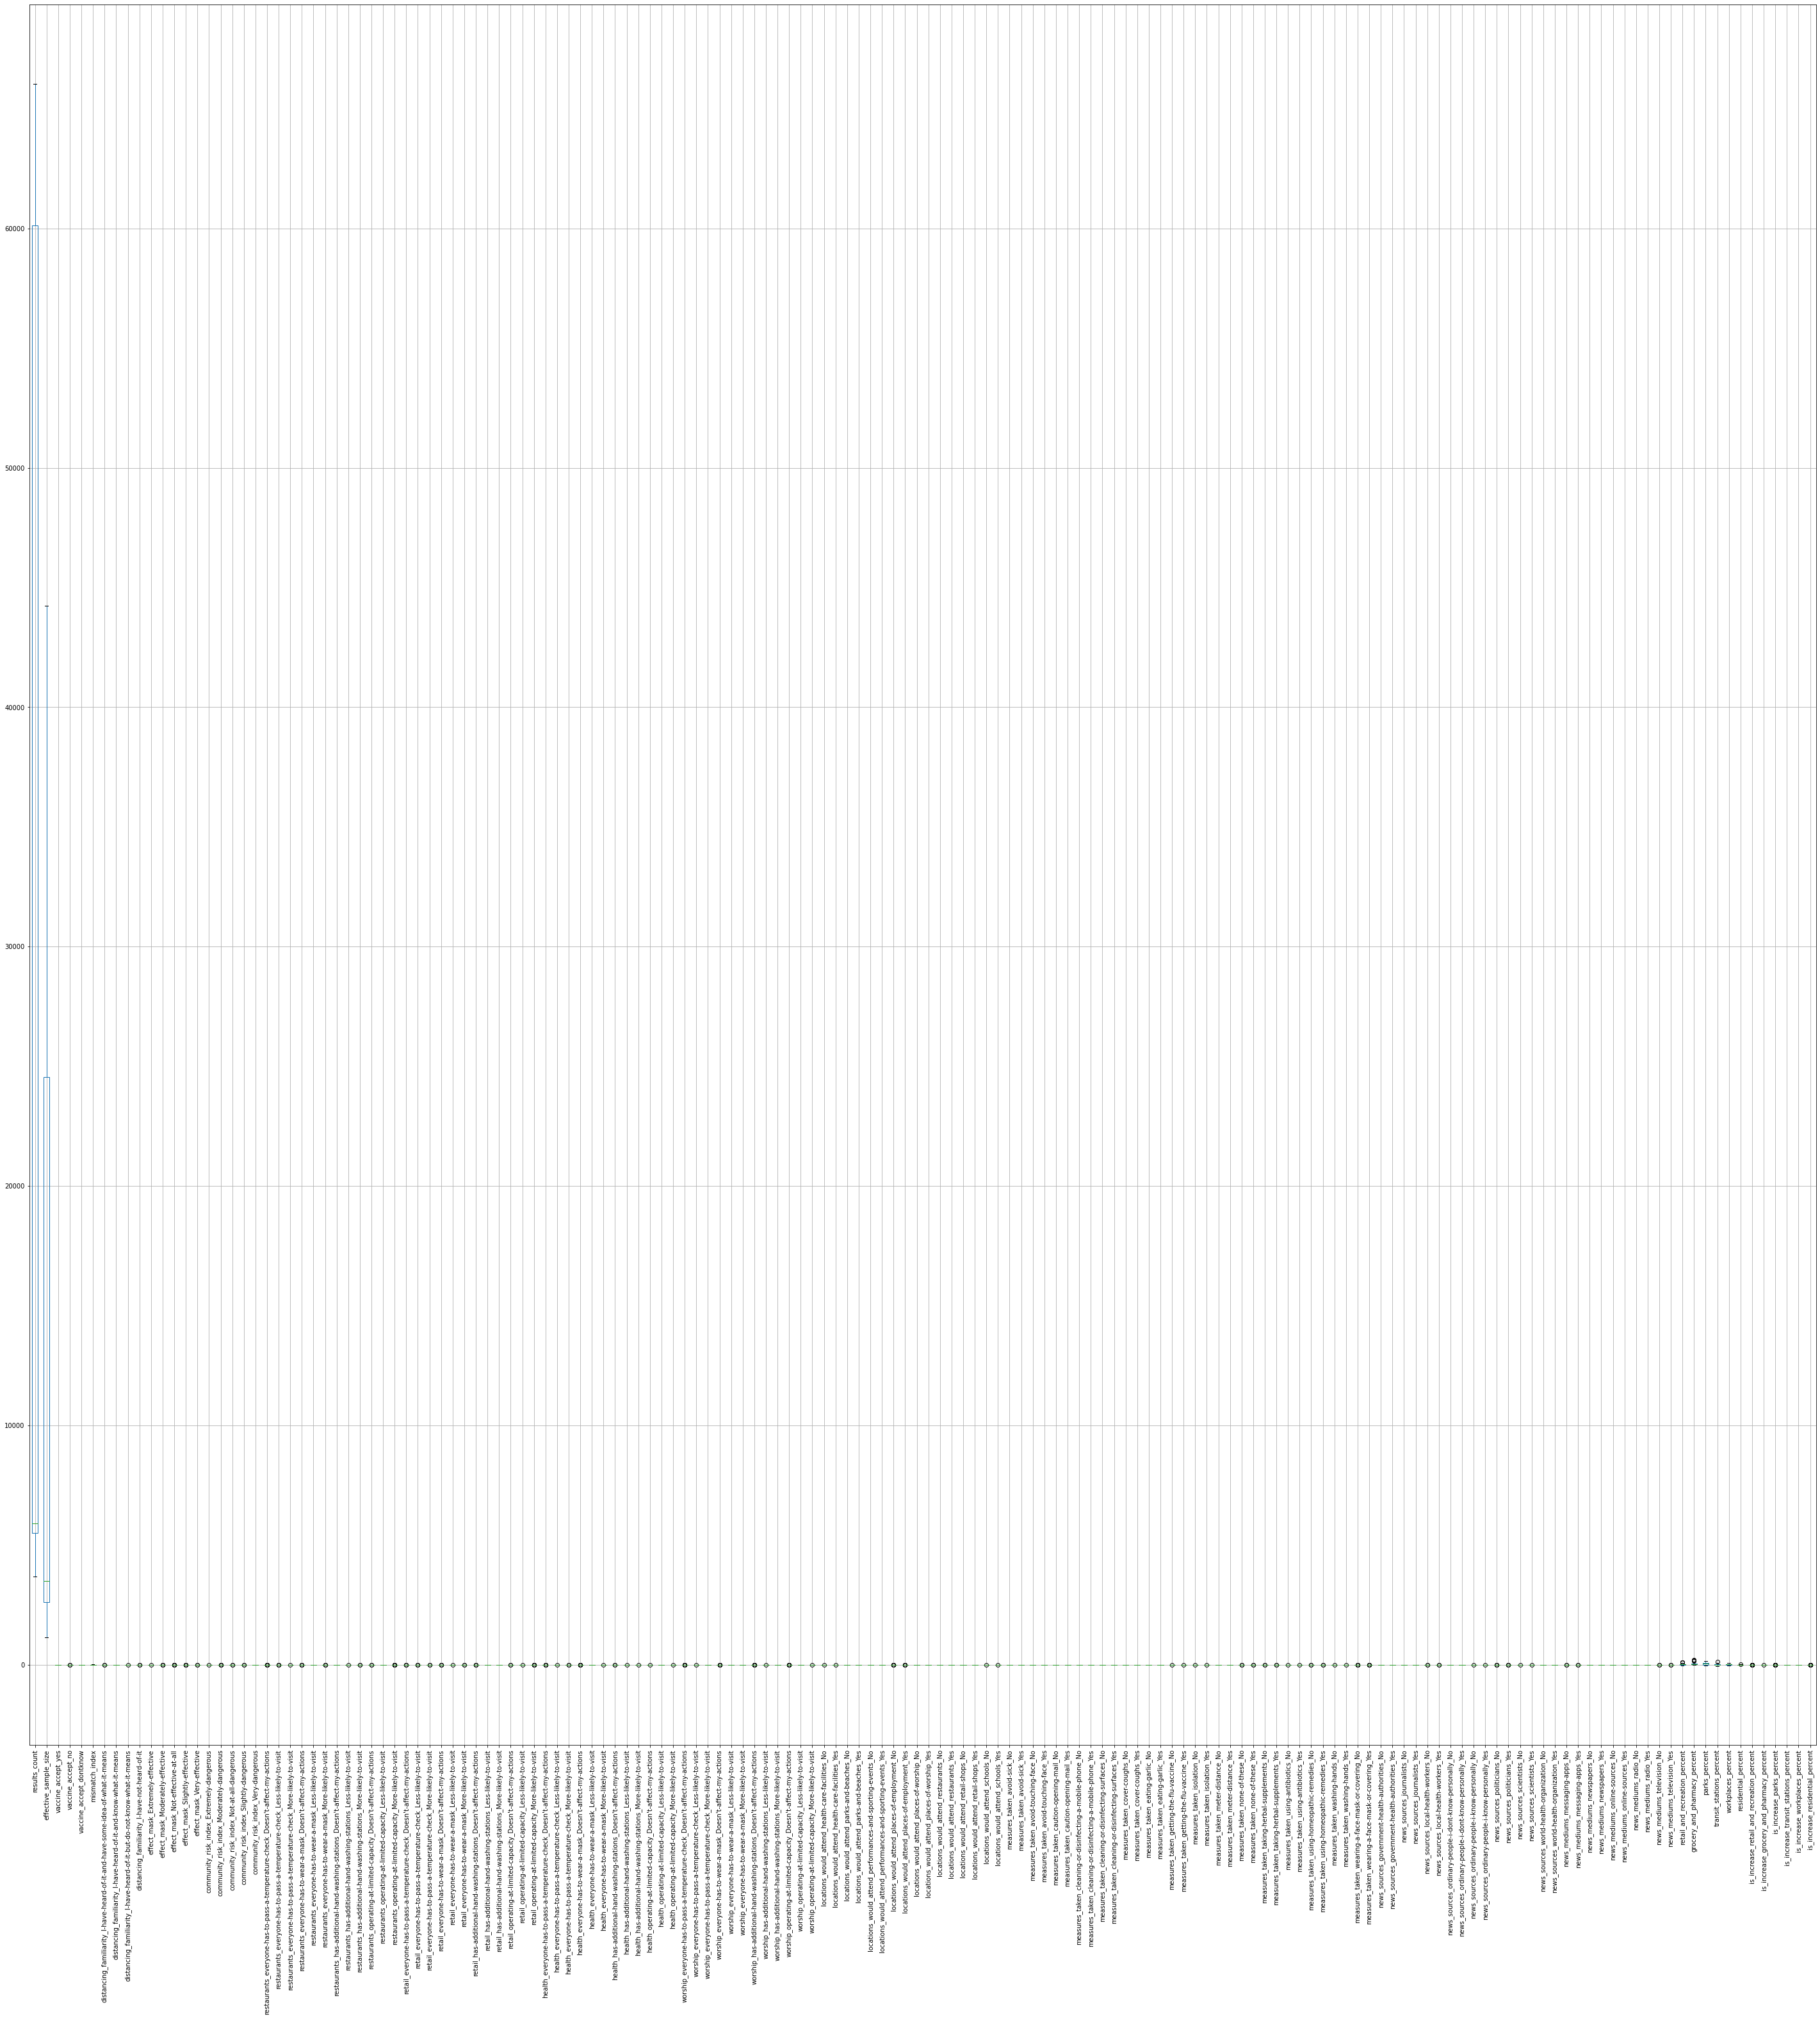

In [ ]:
df_mit.boxplot(figsize=(50,50))
plt.xticks(rotation=90)

Outliers tidak dihapus karena data tergolong sedikit dan data dibutuhkan untuk prediksi

### Save Data

In [ ]:
df_mit.to_csv(r'/content/drive/MyDrive/DSA Compfest/DSA - Neural DRT/covid-19-preventative-health-survey-all_Edited.csv', index = False, header=True)

# Data

In [ ]:
df_google_final = pd.read_csv(  '/content/drive/MyDrive/DSA Compfest/DSA - Neural DRT/Global_Mobility_Report_Edited.csv'  )  
print(df_google_final.to_string())

     country_region_code        country_region      month_year  retail_and_recreation_percent_change_from_baseline  grocery_and_pharmacy_percent_change_from_baseline  parks_percent_change_from_baseline  transit_stations_percent_change_from_baseline  workplaces_percent_change_from_baseline  residential_percent_change_from_baseline
0                     AE  United Arab Emirates   Februari 2020                                           -1.291667                                           1.675000                            3.104762                                       0.788889                                 2.591667                                  1.000000
1                     AE  United Arab Emirates      Maret 2020                                          -19.524194                                          -4.770161                          -18.640553                                     -25.752688                               -11.709677                                  9.008403
2   

In [ ]:
df_mit = pd.read_csv('/content/drive/MyDrive/DSA Compfest/DSA - Neural DRT/covid-19-preventative-health-survey-all_Edited.csv') 
print (df_mit.to_string())

   country  results_count  effective_sample_size  vaccine_accept_yes  vaccine_accept_no  vaccine_accept_dontknow  mismatch_index  distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means  distancing_familiarity_I-have-heard-of-it-and-know-what-it-means  distancing_familiarity_I-have-heard-of-it-but-do-not-know-what-it-means  distancing_familiarity_I-have-not-heard-of-it  effect_mask_Extremely-effective  effect_mask_Moderately-effective  effect_mask_Not-effective-at-all  effect_mask_Slightly-effective  effect_mask_Very-effective  community_risk_index_Extremely-dangerous  community_risk_index_Moderately-dangerous  community_risk_index_Not-at-all-dangerous  community_risk_index_Slightly-dangerous  community_risk_index_Very-dangerous  restaurants_everyone-has-to-pass-a-temperature-check_Doesn't-affect-my-actions  restaurants_everyone-has-to-pass-a-temperature-check_Less-likely-to-visit  restaurants_everyone-has-to-pass-a-temperature-check_More-likely-to-visit  restaura

# EDA

Yes    50
No     14


Text(0.5, 1.0, 'Perbandingan antara jumlah negara berdasarkan kenaikan mobilitas untuk retail and recreation')

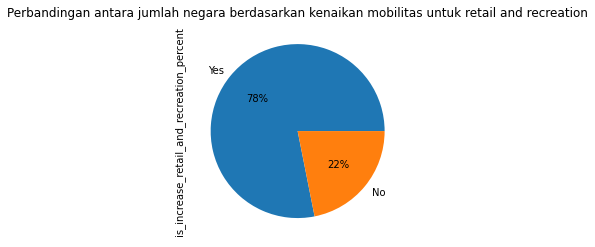

In [ ]:
is_increase_retail_and_recreation_percent = df_mit['is_increase_retail_and_recreation_percent'].value_counts()

new_index = ['Yes', 'No']
is_increase_retail_and_recreation_percent = is_increase_retail_and_recreation_percent.set_axis(new_index)
print(is_increase_retail_and_recreation_percent.to_string())

is_increase_retail_and_recreation_percent_pie_chart = is_increase_retail_and_recreation_percent.plot(kind='pie', autopct='%1.0f%%')
is_increase_retail_and_recreation_percent_pie_chart.set_title("Perbandingan antara jumlah negara berdasarkan kenaikan mobilitas untuk retail and recreation")

Yes    63
No      1


Text(0.5, 1.0, 'Perbandingan antara jumlah negara berdasarkan kenaikan mobilitas untuk grocery and pharmacy')

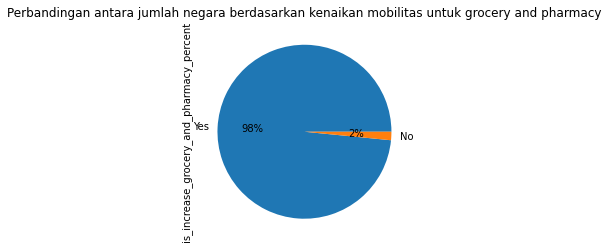

In [ ]:
is_increase_grocery_and_pharmacy_percent = df_mit['is_increase_grocery_and_pharmacy_percent'].value_counts()

new_index = ['Yes', 'No']
is_increase_grocery_and_pharmacy_percent = is_increase_grocery_and_pharmacy_percent.set_axis(new_index)
print(is_increase_grocery_and_pharmacy_percent.to_string())

is_increase_grocery_and_pharmacy_percent_pie_chart = is_increase_grocery_and_pharmacy_percent.plot(kind='pie', autopct='%1.0f%%')
is_increase_grocery_and_pharmacy_percent_pie_chart.set_title("Perbandingan antara jumlah negara berdasarkan kenaikan mobilitas untuk grocery and pharmacy")

Yes    52
No     12


Text(0.5, 1.0, 'Perbandingan antara jumlah negara berdasarkan kenaikan mobilitas untuk parks')

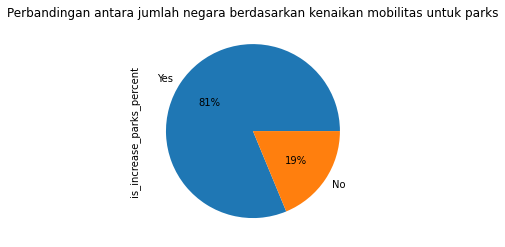

In [ ]:
is_increase_parks_percent = df_mit['is_increase_parks_percent'].value_counts()

new_index = ['Yes', 'No']
is_increase_parks_percent = is_increase_parks_percent.set_axis(new_index)
print(is_increase_parks_percent.to_string())

is_increase_parks_percent_pie_chart = is_increase_parks_percent.plot(kind='pie', autopct='%1.0f%%')
is_increase_parks_percent_pie_chart.set_title("Perbandingan antara jumlah negara berdasarkan kenaikan mobilitas untuk parks")

Yes    46
No     18


Text(0.5, 1.0, 'Perbandingan antara jumlah negara berdasarkan kenaikan mobilitas untuk transit stations')

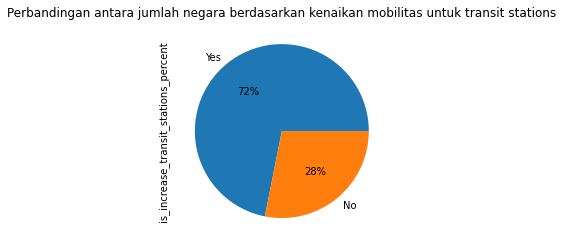

In [ ]:
is_increase_transit_stations_percent = df_mit['is_increase_transit_stations_percent'].value_counts()

new_index = ['Yes', 'No']
is_increase_transit_stations_percent = is_increase_transit_stations_percent.set_axis(new_index)
print(is_increase_transit_stations_percent.to_string())

is_increase_transit_stations_percent_pie_chart = is_increase_transit_stations_percent.plot(kind='pie', autopct='%1.0f%%')
is_increase_transit_stations_percent_pie_chart.set_title("Perbandingan antara jumlah negara berdasarkan kenaikan mobilitas untuk transit stations")

Yes    52
No     12


Text(0.5, 1.0, 'Perbandingan antara jumlah negara berdasarkan kenaikan mobilitas untuk residental')

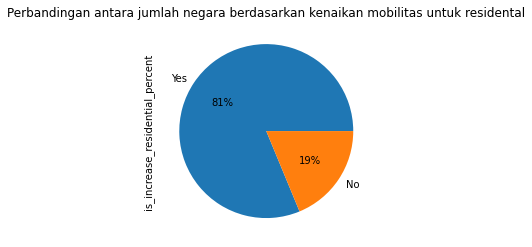

In [ ]:
is_increase_residential_percent = df_mit['is_increase_residential_percent'].value_counts()

new_index = ['Yes', 'No']
is_increase_residential_percent = is_increase_residential_percent.set_axis(new_index)
print(is_increase_residential_percent.to_string())

is_increase_residential_percent_pie_chart = is_increase_residential_percent.plot(kind='pie', autopct='%1.0f%%')
is_increase_residential_percent_pie_chart.set_title("Perbandingan antara jumlah negara berdasarkan kenaikan mobilitas untuk residental")

Yes    44
No     20


Text(0.5, 1.0, 'Perbandingan antara jumlah negara berdasarkan kenaikan mobilitas untuk workplaces')

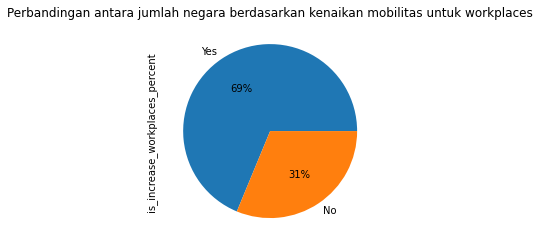

In [ ]:
is_increase_residential_percent = df_mit['is_increase_workplaces_percent'].value_counts()

new_index = ['Yes', 'No']
is_increase_residential_percent = is_increase_residential_percent.set_axis(new_index)
print(is_increase_residential_percent.to_string())

is_increase_residential_percent_pie_chart = is_increase_residential_percent.plot(kind='pie', autopct='%1.0f%%')
is_increase_residential_percent_pie_chart.set_title("Perbandingan antara jumlah negara berdasarkan kenaikan mobilitas untuk workplaces")

## Google

In [ ]:
df_google_final

country_region_code        country_region     month_year  \
0                     AE  United Arab Emirates  Februari 2020   
1                     AE  United Arab Emirates     Maret 2020   
2                     AE  United Arab Emirates     April 2020   
3                     AE  United Arab Emirates       Mei 2020   
4                     AE  United Arab Emirates      Juni 2020   
...                  ...                   ...            ...   
1899                  ZA          South Africa     Maret 2022   
1900                  ZA          South Africa     April 2022   
1901                  ZA          South Africa       Mei 2022   
1902                  ZA          South Africa      Juni 2022   
1903                  ZA          South Africa      Juli 2022   

      retail_and_recreation_percent_change_from_baseline  \
0                                             -1.291667    
1                                            -19.524194    
2                                            -52.537500    
3                                            -45.487903    
4                                            -30.487500    
...                                                 ...    
1899                                          24.429032    
1900                                          24.150000    
1901                                          24.532258    
1902                                          25.846667    
1903                                          39.300000    

      grocery_and_pharmacy_percent_change_from_baseline  \
0                                              1.675000   
1                                             -4.770161   
2                                            -27.375000   
3                                            -20.491935   
4                                            -11.041667   
...                                                 ...   
1899                                          37.487097   
1900                                          37.976667   
1901                                          39.874194   
1902                                          39.786667   
1903                                          56.700000   

      parks_percent_change_from_baseline  \
0                               3.104762   
1                             -18.640553   
2                             -65.442857   
3                             -62.119816   
4                             -49.880952   
...                                  ...   
1899                           80.983871   
1900                           89.926667   
1901                           80.003226   
1902                           87.480000   
1903                           99.400000   

      transit_stations_percent_change_from_baseline  \
0                                          0.788889   
1                                        -25.752688   
2                                        -64.874346   
3                                        -55.349057   
4                                        -42.301508   
...                                             ...   
1899                                      39.372180   
1900                                      52.569721   
1901                                      54.239382   
1902                                      56.750000   
1903                                      80.555556   

      workplaces_percent_change_from_baseline  \
0                                    2.591667   
1                                  -11.709677   
2                                  -41.454167   
3                                  -36.520161   
4                                  -21.200000   
...                                       ...   
1899                                22.996774   
1900                                18.060000   
1901                                28.629032   
1902                                24.103333   
1903                                 8.300000   

      residenti

In [ ]:
country_region_code = df_google_final['country_region_code'].unique()
country_region = df_google_final['country_region'].unique()

In [ ]:
def line_plot(df, title, country, column_y):
  plt.figure(figsize=(15,5))
  sns.lineplot(x = df['month_year'], y = df[column_y], sort=False)
  ax = sns.scatterplot(x = df['month_year'], y = df[column_y], s = 200)
  plt.title(title)
  plt.title('Date in ' + country + ' & ' + title)
  plt.xlabel('Persen')
  plt.ylabel('Month - Year')
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
for i in country_region_code:
  data = df_google_final.loc[df_google_final['country_region_code'] == i]
  line_plot(data, 'Retail And Recreation', i, 'retail_and_recreation_percent_change_from_baseline')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in country_region_code:
  data = df_google_final.loc[df_google_final['country_region_code'] == i]
  line_plot(data, 'Grocery And Pharmacy', i, 'grocery_and_pharmacy_percent_change_from_baseline')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in country_region_code:
  data = df_google_final.loc[df_google_final['country_region_code'] == i]
  line_plot(data, 'Parks', i, 'parks_percent_change_from_baseline')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in country_region_code:
  data = df_google_final.loc[df_google_final['country_region_code'] == i]
  line_plot(data, 'Transit Station', i, 'transit_stations_percent_change_from_baseline')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in country_region_code:
  data = df_google_final.loc[df_google_final['country_region_code'] == i]
  line_plot(data, 'Resedential', i, 'residential_percent_change_from_baseline')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in country_region_code:
  data = df_google_final.loc[df_google_final['country_region_code'] == i]
  line_plot(data, 'Resedential', i, 'workplaces_percent_change_from_baseline')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_first_date = df_google_final.loc[df_google_final['month_year'] == 'Februari 2020']
df_first_date

country_region_code        country_region     month_year  \
0                     AE  United Arab Emirates  Februari 2020   
30                    AF           Afghanistan  Februari 2020   
59                    AO                Angola  Februari 2020   
89                    AR             Argentina  Februari 2020   
119                   AU             Australia  Februari 2020   
...                  ...                   ...            ...   
1763                  US         United States  Februari 2020   
1793                  UY               Uruguay  Februari 2020   
1823                  VE             Venezuela  Februari 2020   
1853                  VN               Vietnam  Februari 2020   
1874                  ZA          South Africa  Februari 2020   

      retail_and_recreation_percent_change_from_baseline  \
0                                             -1.291667    
30                                            -1.200000    
59                                            -3.700000    
89                                            -1.606783    
119                                            0.212167    
...                                                 ...    
1763                                           6.145196    
1793                                           1.834921    
1823                                           2.266667    
1853                                          -9.855208    
1874                                          -3.773333    

      grocery_and_pharmacy_percent_change_from_baseline  \
0                                              1.675000   
30                                             5.100000   
59                                            -2.967742   
89                                            -1.808241   
119                                            2.352772   
...                                                 ...   
1763                                           2.103233   
1793                                           0.307937   
1823                                           1.066667   
1853                                         -10.438578   
1874                                          -4.793333   

      parks_percent_change_from_baseline  \
0                               3.104762   
30                              0.866667   
59                             -1.133333   
89                             -1.351187   
119                             0.255942   
...                                  ...   
1763                           14.454504   
1793                           -3.701987   
1823                            8.333333   
1853                           -8.423924   
1874                           -5.913333   

      transit_stations_percent_change_from_baseline  \
0                                          0.788889   
30                                         4.966667   
59                                        -5.733333   
89                                        -0.438056   
119                                        9.035065   
...                                             ...   
1763                                       4.253531   
1793                                      -0.472081   
1823                                      -0.266667   
1853                                     -14.319366   
1874                                       0.689655   

      workplaces_percent_change_from_baseline  \
0                                    2.591667   
30                                   2.600000   
59                                  -6.819444   
89                                   0.544576   
119                                 12.033563   
...                                       ...   
1763                                -0.086161   
1793                                 1.667732   
1823                                -2.666667   
1853                                -1.333333   
1874                                 2.646667   

      residenti

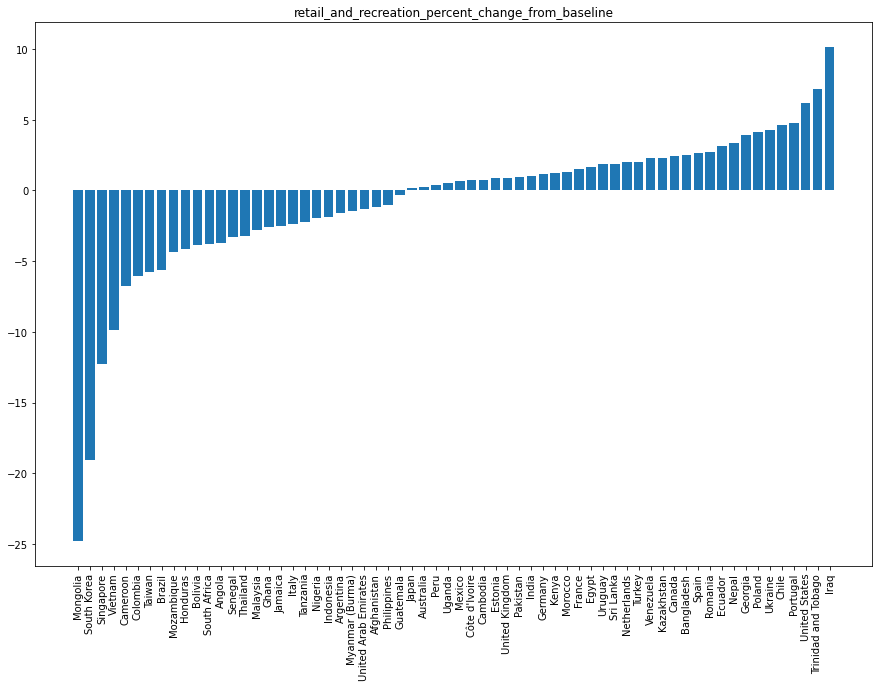

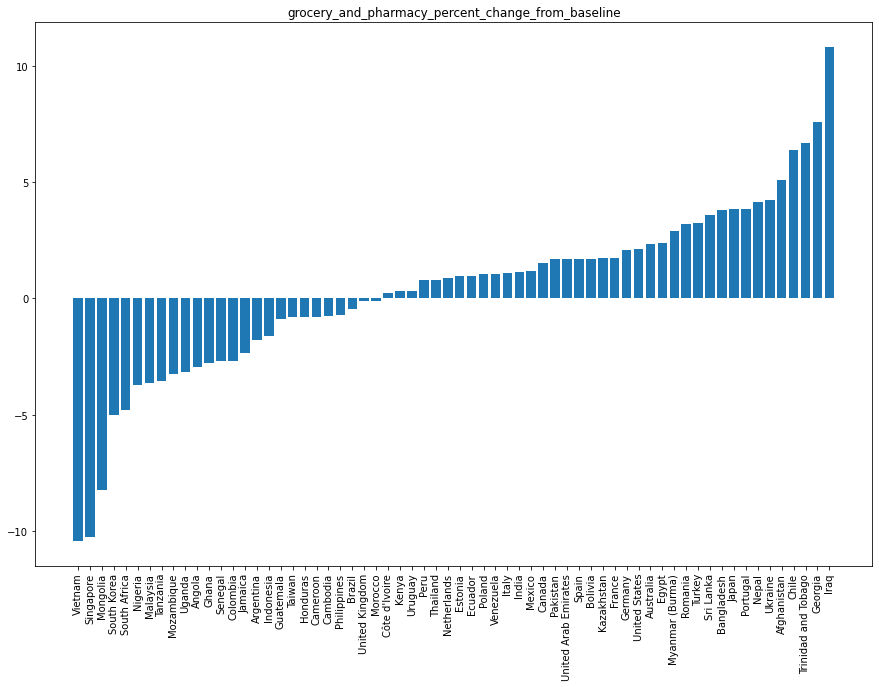

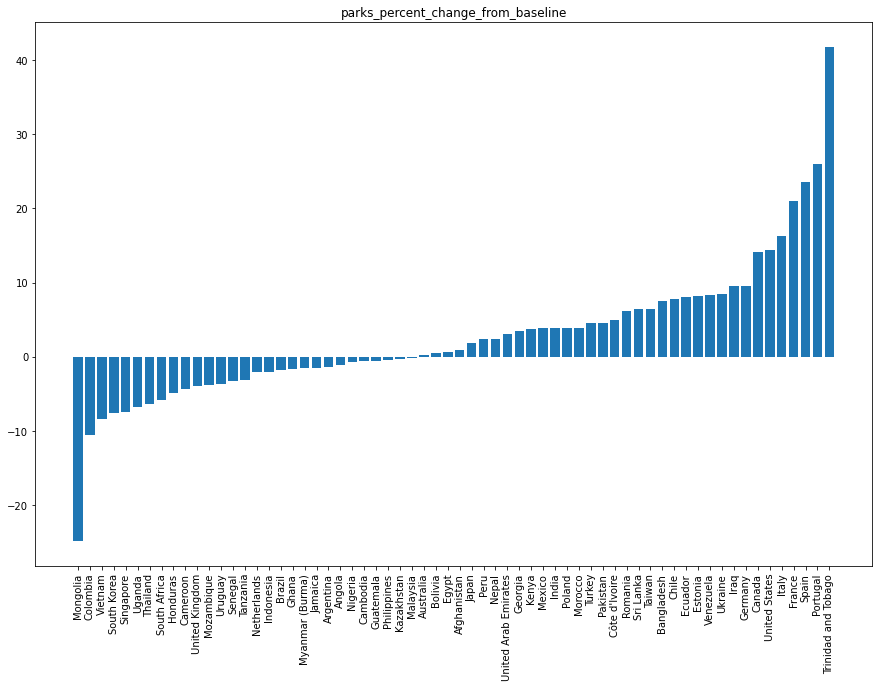

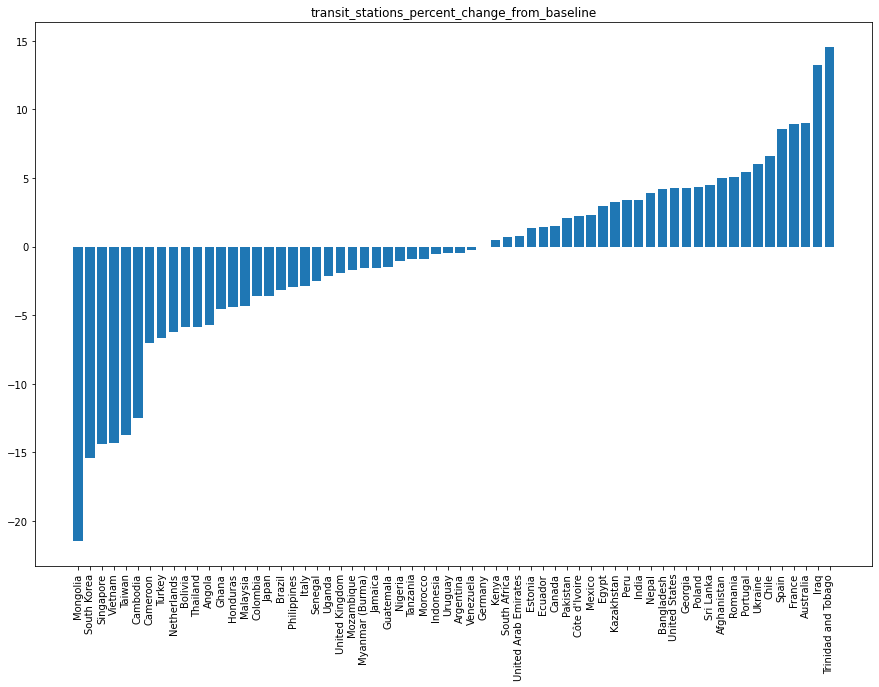

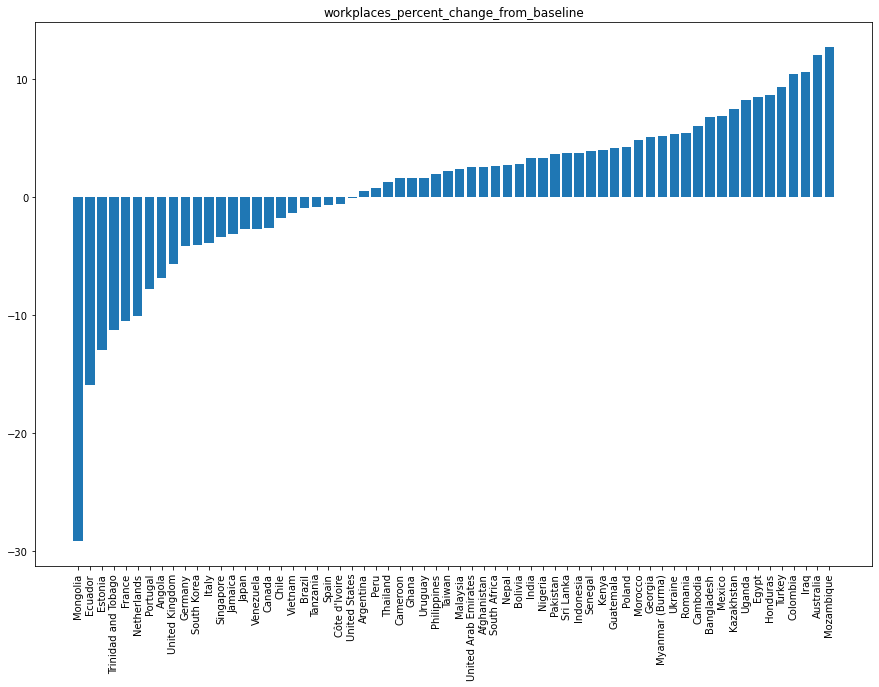

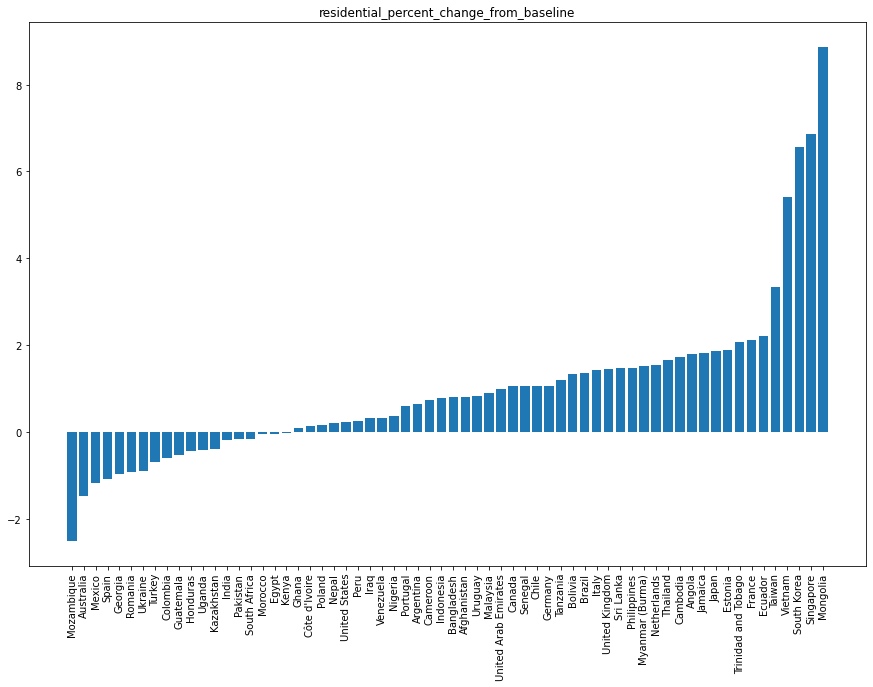

In [ ]:
column_y = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline',
            'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline',
            'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']

for i in column_y:
  df_first_date = df_first_date.sort_values(i)
  plt.figure(figsize=(15,10))
  plt.bar(df_first_date['country_region'], df_first_date[i])
  plt.title(i)
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
df_late_date = df_google_final.loc[df_google_final['month_year'] == 'Juni 2022']
df_late_date

country_region_code        country_region month_year  \
28                    AE  United Arab Emirates  Juni 2022   
57                    AF           Afghanistan  Juni 2022   
87                    AO                Angola  Juni 2022   
117                   AR             Argentina  Juni 2022   
147                   AU             Australia  Juni 2022   
...                  ...                   ...        ...   
1761                  UG                Uganda  Juni 2022   
1791                  US         United States  Juni 2022   
1821                  UY               Uruguay  Juni 2022   
1851                  VE             Venezuela  Juni 2022   
1902                  ZA          South Africa  Juni 2022   

      retail_and_recreation_percent_change_from_baseline  \
28                                            22.462500    
57                                            73.616667    
87                                           101.750000    
117                                            9.563906    
147                                           -0.962029    
...                                                 ...    
1761                                          46.061611    
1791                                           5.498054    
1821                                          -8.808550    
1851                                          40.900000    
1902                                          25.846667    

      grocery_and_pharmacy_percent_change_from_baseline  \
28                                            41.129167   
57                                           159.566667   
87                                            96.366667   
117                                           39.641927   
147                                            7.401143   
...                                                 ...   
1761                                          40.000000   
1791                                           8.357191   
1821                                          17.397661   
1851                                          77.766667   
1902                                          39.786667   

      parks_percent_change_from_baseline  \
28                             -2.190476   
57                            106.533333   
87                            172.850000   
117                           -17.836815   
147                           -19.098740   
...                                  ...   
1761                          119.577778   
1791                           65.043398   
1821                          -33.399023   
1851                           42.733333   
1902                           87.480000   

      transit_stations_percent_change_from_baseline  \
28                                        19.596591   
57                                        14.250000   
87                                        85.900000   
117                                       -0.271837   
147                                      -31.304848   
...                                             ...   
1761                                      21.693277   
1791                                       5.319231   
1821                                     -16.361842   
1851                                      -1.266667   
1902                                      56.750000   

      workplaces_percent_change_from_baseline  \
28                                  32.350000   
57                                  27.900000   
87                                  67.116505   
117                                 45.813807   
147                                 -2.685223   
...                                       ...   
1761                                75.218947   
1791                               -17.465682   
1821                                30.067093   
1851                                43.466667   
1902                                24.103333   

      residential_percent_change_from_baseline  
28            

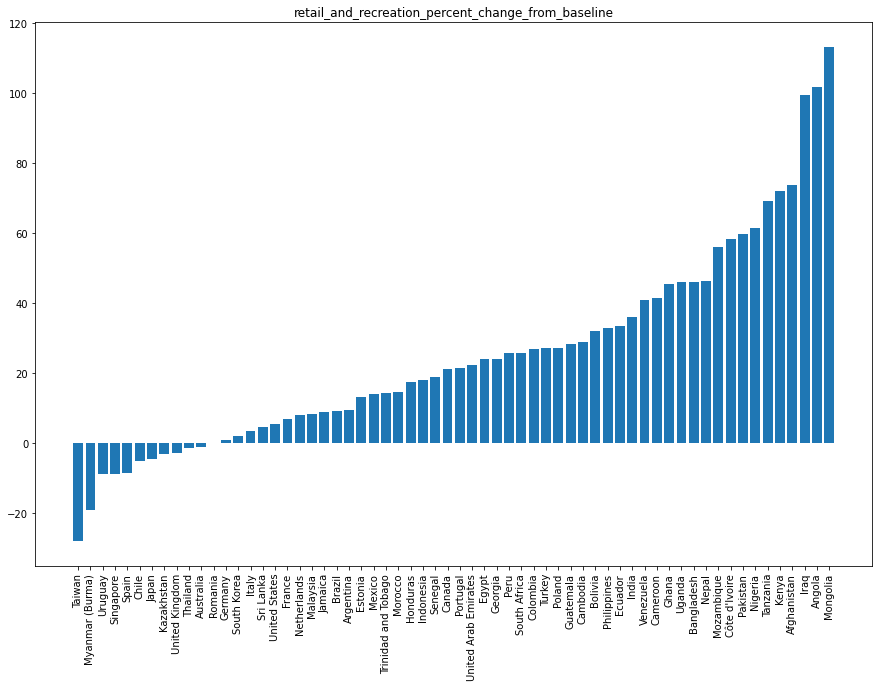

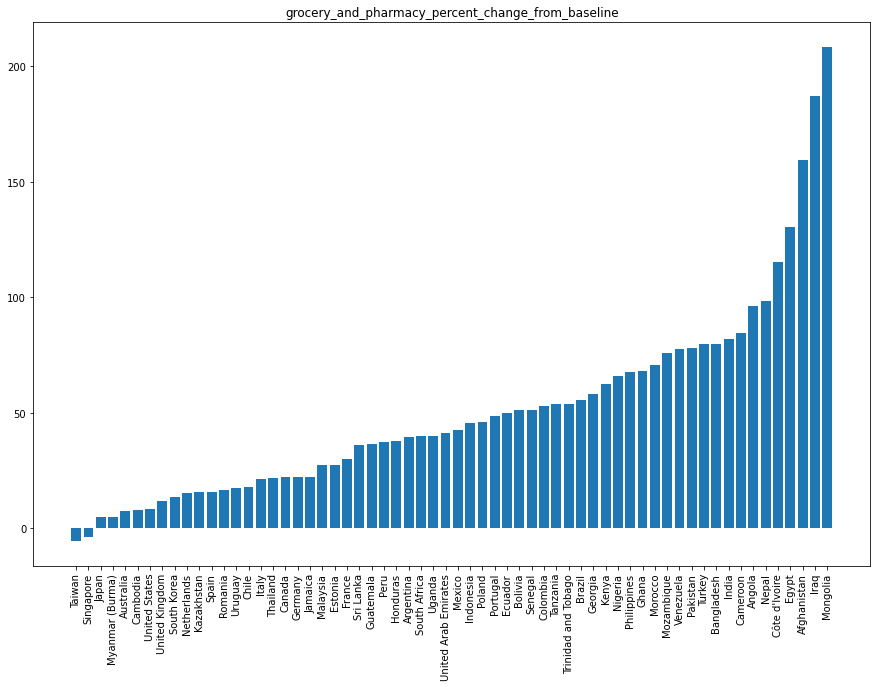

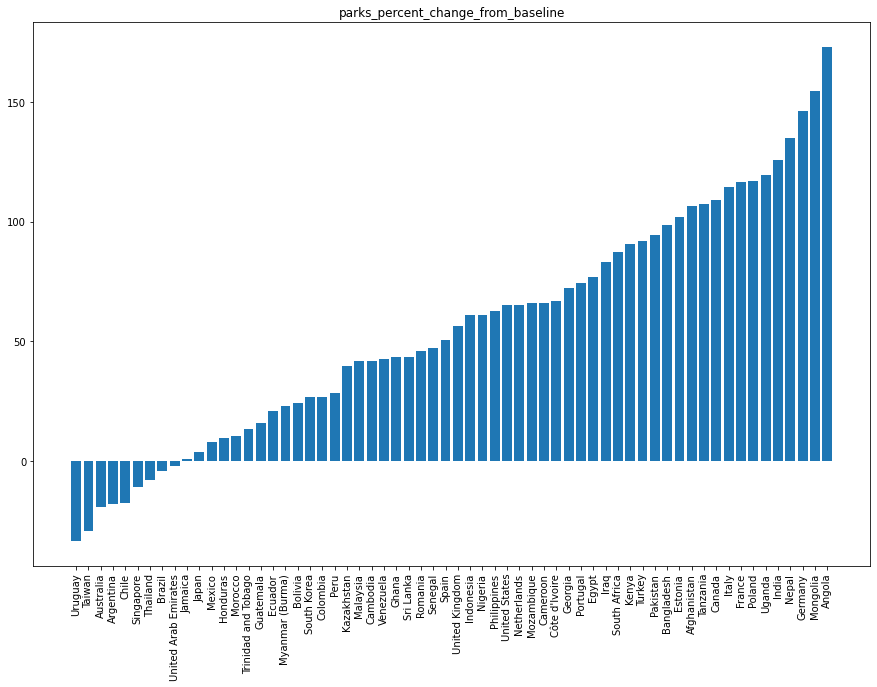

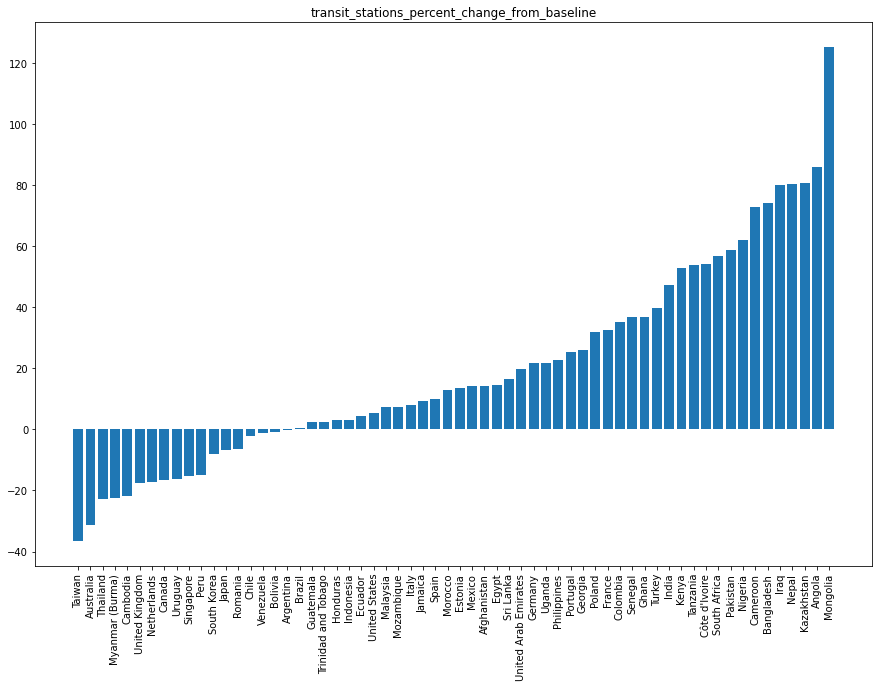

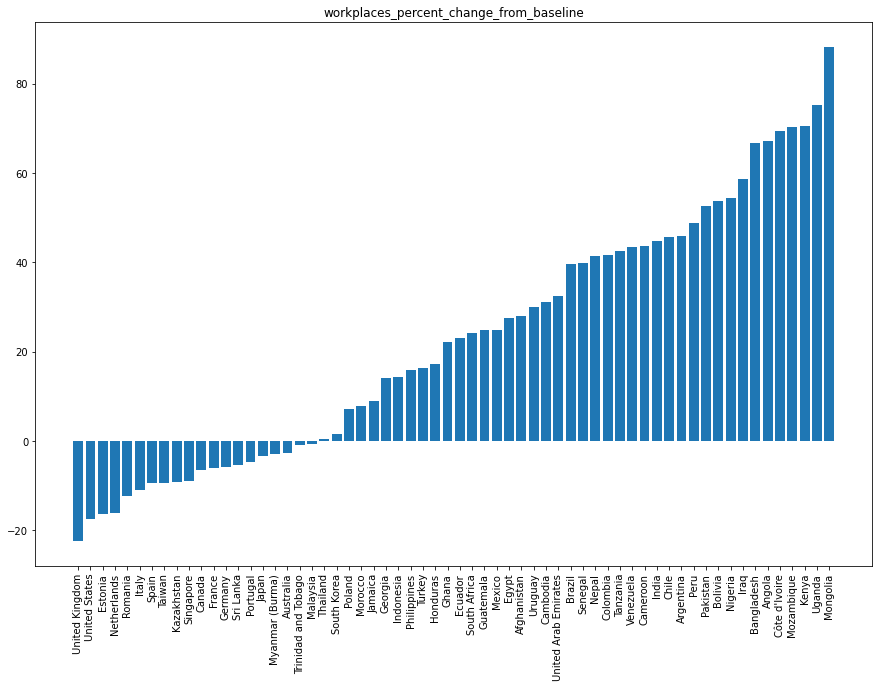

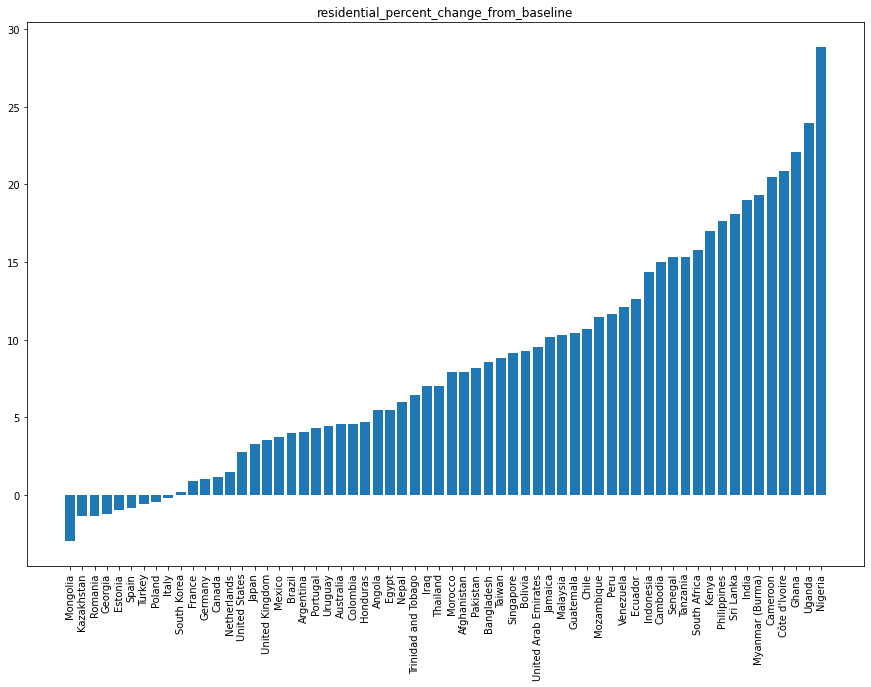

In [ ]:
column_y = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline',
            'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline',
            'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']

for i in column_y:
  df_late_date = df_late_date.sort_values(i)
  plt.figure(figsize=(15,10))
  plt.bar(df_late_date['country_region'], df_late_date[i])
  plt.title(i)
  plt.xticks(rotation=90)
  plt.show()

## MIT

### Method

In [ ]:
def grouped_bar_alt(df, no, yes, alternative, title):
  labels = df['country'].array
  yes_data = df[yes].array
  no_data = df[no].array
  alternative_data = df[alternative].array

  x = np.arange(len(labels))  # the label locations
  width = 0.30  # the width of the bars

  fig, ax = plt.subplots(figsize=(30, 8))
  rects1 = ax.bar(x - width, yes_data, width, label='Yes')
  rects2 = ax.bar(x, alternative_data, width, label='Alt')
  rects3 = ax.bar(x + width, no_data, width, label='No')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Rate')
  ax.set_title(title + ' Rate by Yes or Alt or No')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()

  plt.xlabel("Country")
  fig.tight_layout()
  
  plt.show()

In [ ]:
def grouped_bar(df, no, yes, title):
  labels = df['country'].array
  yes_data = df[yes].array
  no_data = df[no].array

  x = np.arange(len(labels))  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots(figsize=(30, 8))
  rects1 = ax.bar(x - width/2, yes_data, width, label='Yes')
  rects2 = ax.bar(x + width/2, no_data, width, label='No')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Rate')
  ax.set_title(title + ' Rate by Yes or No')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()

  plt.xlabel("Country")
  fig.tight_layout()
  
  plt.show()

In [ ]:
def just_bar(df, yes, title):
  labels = df['country'].array
  yes_data = df[yes].array


  fig, ax = plt.subplots(figsize=(30, 8))
  plt.bar(labels, yes_data, color ='blue',
          width = 0.35)
      
  plt.xlabel("Country")
  plt.ylabel("Rate")
  plt.title("Rate of " + title)
  plt.show()

### Vaccine Accept

In [ ]:
df_vaccine_accept = df_mit[["country",
                            "vaccine_accept_yes",
                            "vaccine_accept_no",
                            "vaccine_accept_dontknow"]].sort_values(by="vaccine_accept_yes").head(10)

print(df_vaccine_accept.to_string())

   country  vaccine_accept_yes  vaccine_accept_no  vaccine_accept_dontknow
33      KZ            0.270236           0.467051                 0.262713
28      JM            0.311204           0.339946                 0.348850
11      CM            0.350517           0.421813                 0.227669
57      UA            0.363722           0.338125                 0.298153
20      GE            0.390703           0.312125                 0.297172
51      SN            0.392959           0.360189                 0.246852
18      FR            0.441426           0.279003                 0.262666
35      MA            0.443256           0.254034                 0.302710
47      PL            0.457699           0.278282                 0.241261
49      RO            0.469113           0.272238                 0.220788


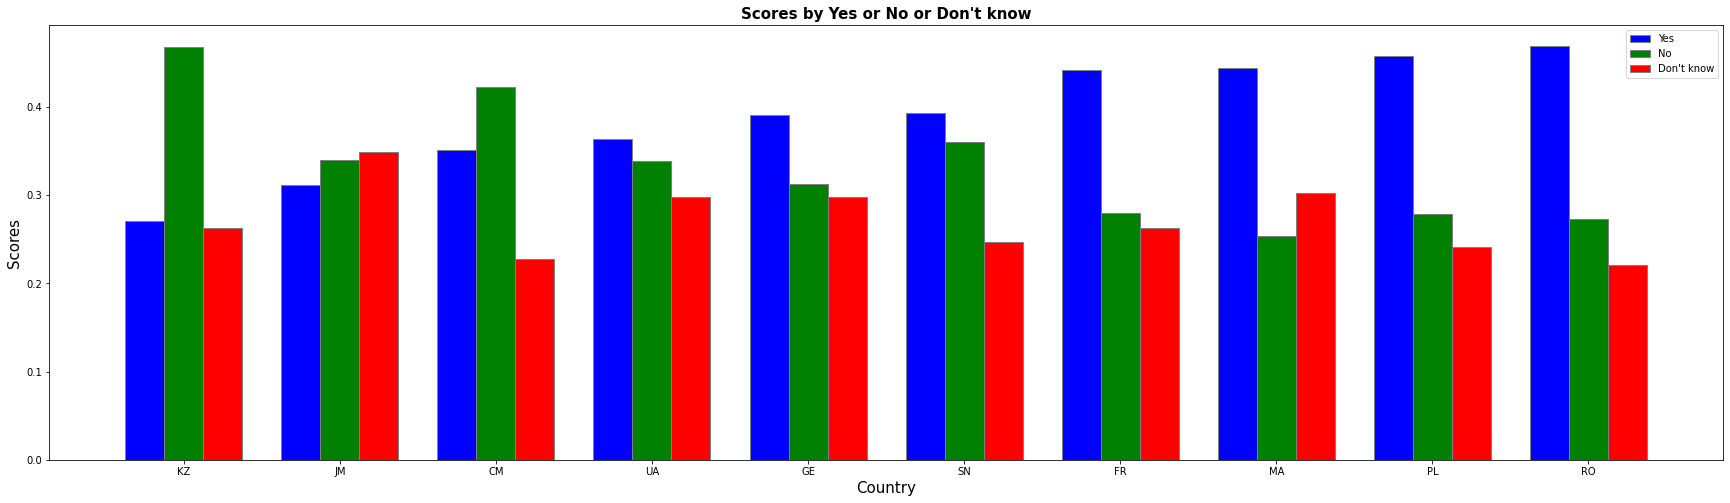

In [ ]:
labels = df_vaccine_accept["country"].array
vaccine_done = df_vaccine_accept["vaccine_accept_yes"].array
vaccine_undone = df_vaccine_accept["vaccine_accept_no"].array
vaccine_dontknow = df_vaccine_accept["vaccine_accept_dontknow"].array

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(30, 8))

# Set position of bar on X axis
br1 = np.arange(len(labels))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, vaccine_done, color ='b', width = barWidth,
        edgecolor ='grey', label ='Yes')
plt.bar(br2, vaccine_undone, color ='g', width = barWidth,
        edgecolor ='grey', label ='No')
plt.bar(br3, vaccine_dontknow, color ='r', width = barWidth,
        edgecolor ='grey', label ="Don't know")

# Adding Xticks
plt.title("Scores by Yes or No or Don't know", fontweight ='bold', fontsize = 15)
plt.xlabel("Country", fontsize = 15)
plt.ylabel("Scores", fontsize = 15)
plt.xticks([r + barWidth for r in range(len(labels))],
           labels)

plt.legend()
plt.show()

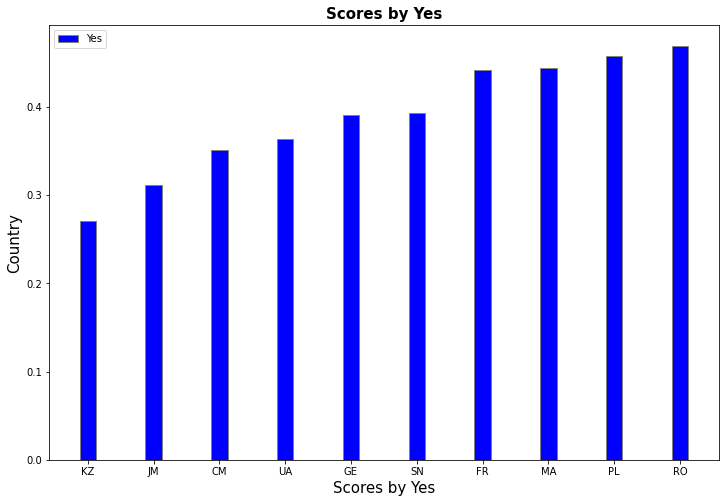

In [ ]:
labels = df_vaccine_accept["country"].array
vaccine_done = df_vaccine_accept["vaccine_accept_yes"].array

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(labels))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, vaccine_done, color ='b', width = barWidth,
        edgecolor ='grey', label ='Yes')

# Adding Xticks
plt.title("Scores by Yes", fontweight ='bold', fontsize = 15)
plt.xlabel("Scores by Yes", fontsize = 15)
plt.ylabel("Country", fontsize = 15)
plt.xticks([r for r in range(len(labels))],
           labels)

plt.legend()
plt.show()

### Mismatch Index

In [ ]:
df_mismatch_index= df_mit[["country","mismatch_index"]].sort_values(by="mismatch_index").head(10)

print(df_mismatch_index.to_string())

   country  mismatch_index
32      KR          -0.320
29      JP           0.166
55      TW           0.324
36      MM           2.041
37      MN           2.462
18      FR           3.132
9       CI           4.085
24      ID           4.242
52      TH           4.625
50      SG           5.253


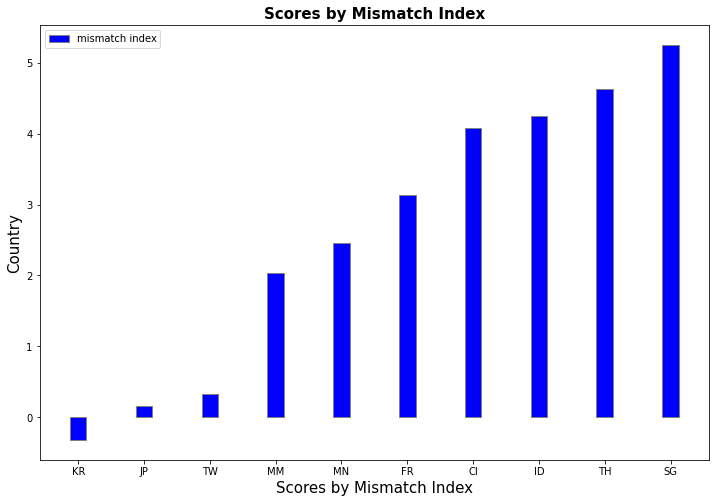

In [ ]:
labels = df_mismatch_index["country"].array
mismatch_index = df_mismatch_index["mismatch_index"].array

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(labels))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, mismatch_index, color ='b', width = barWidth,
        edgecolor ='grey', label ='mismatch index')

# Adding Xticks
plt.title("Scores by Mismatch Index", fontweight ='bold', fontsize = 15)
plt.xlabel("Scores by Mismatch Index", fontsize = 15)
plt.ylabel("Country", fontsize = 15)
plt.xticks([r for r in range(len(labels))],
           labels)

plt.legend()
plt.show()

### Community Risk Index

In [ ]:
community_risk_index = df_mit[["country",
                                  "community_risk_index_Extremely-dangerous",
                                  "community_risk_index_Moderately-dangerous",
                                  "community_risk_index_Not-at-all-dangerous",
                                  "community_risk_index_Slightly-dangerous",
                                  "community_risk_index_Very-dangerous"]].sort_values(by="community_risk_index_Extremely-dangerous").head(10)

print(community_risk_index.to_string())

   country  community_risk_index_Extremely-dangerous  community_risk_index_Moderately-dangerous  community_risk_index_Not-at-all-dangerous  community_risk_index_Slightly-dangerous  community_risk_index_Very-dangerous
47      PL                                     0.030                                      0.453                                      0.117                                    0.217                                0.183
42      NL                                     0.045                                      0.406                                      0.061                                    0.282                                0.207
15      EE                                     0.068                                      0.447                                      0.057                                    0.154                                0.274
20      GE                                     0.076                                      0.406                                     

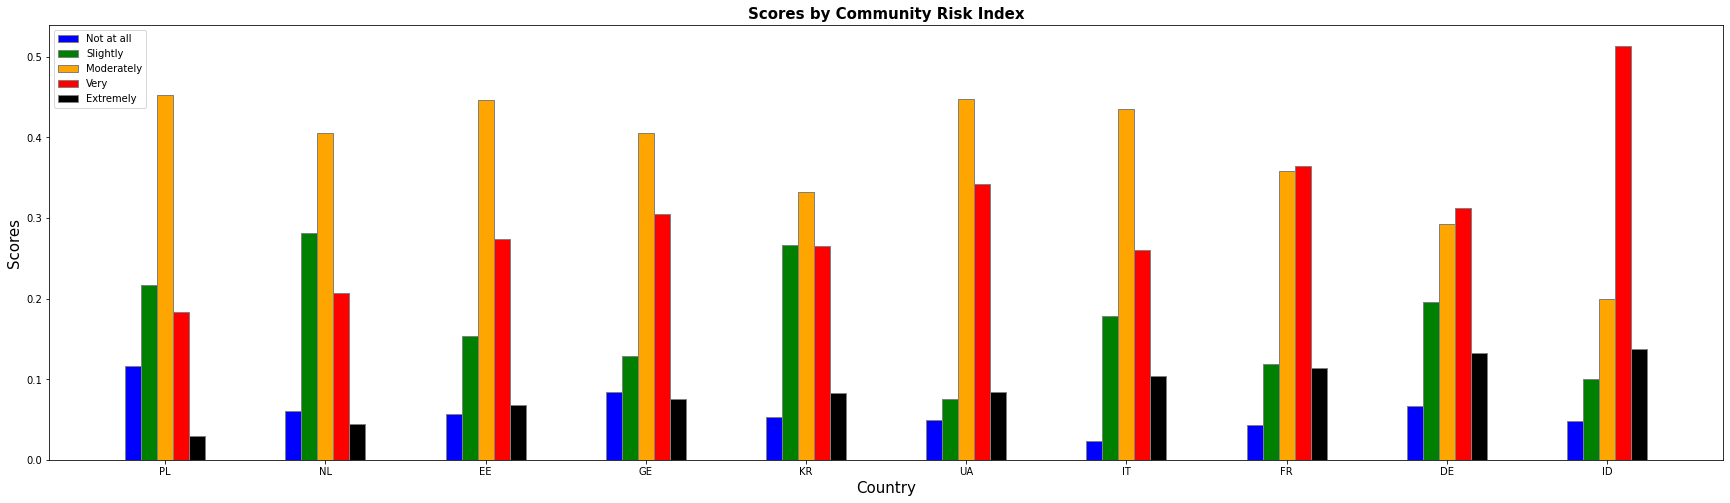

In [ ]:
labels = community_risk_index["country"].array
community_risk_index_Not_at_all_dangerous = community_risk_index["community_risk_index_Not-at-all-dangerous"].array
community_risk_index_Slightly_dangerous = community_risk_index["community_risk_index_Slightly-dangerous"].array
community_risk_index_Moderately_dangerous = community_risk_index["community_risk_index_Moderately-dangerous"].array
community_risk_index_Very_dangerous  = community_risk_index["community_risk_index_Very-dangerous"].array
community_risk_index_Extremely_dangerous = community_risk_index["community_risk_index_Extremely-dangerous"].array

# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(30, 8))

# Set position of bar on X axis
br1 = np.arange(len(labels))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plot
plt.bar(br1, community_risk_index_Not_at_all_dangerous, color ='b', width = barWidth,
        edgecolor ='grey', label ='Not at all')
plt.bar(br2, community_risk_index_Slightly_dangerous, color ='g', width = barWidth,
        edgecolor ='grey', label ='Slightly')
plt.bar(br3, community_risk_index_Moderately_dangerous, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Moderately')
plt.bar(br4, community_risk_index_Very_dangerous, color ='r', width = barWidth,
        edgecolor ='grey', label ="Very")
plt.bar(br5, community_risk_index_Extremely_dangerous, color ='black', width = barWidth,
        edgecolor ='grey', label ="Extremely")

# Adding Xticks
plt.title("Scores by Community Risk Index", fontweight ='bold', fontsize = 15)
plt.xlabel("Country", fontsize = 15)
plt.ylabel("Scores", fontsize = 15)
plt.xticks([r + barWidth*2 for r in range(len(labels))],
           labels)

plt.legend()
plt.show()

### Measures Taken

In [ ]:
measures_taken = []
for i in df_mit:
  if "measures_taken" in i:
    measures_taken.append(i)
print(measures_taken)

['measures_taken_avoid-sick_No', 'measures_taken_avoid-sick_Yes', 'measures_taken_avoid-touching-face_No', 'measures_taken_avoid-touching-face_Yes', 'measures_taken_caution-opening-mail_No', 'measures_taken_caution-opening-mail_Yes', 'measures_taken_cleaning-or-disinfecting-a-mobile-phone_No', 'measures_taken_cleaning-or-disinfecting-a-mobile-phone_Yes', 'measures_taken_cleaning-or-disinfecting-surfaces_No', 'measures_taken_cleaning-or-disinfecting-surfaces_Yes', 'measures_taken_cover-coughs_No', 'measures_taken_cover-coughs_Yes', 'measures_taken_eating-garlic_No', 'measures_taken_eating-garlic_Yes', 'measures_taken_getting-the-flu-vaccine_No', 'measures_taken_getting-the-flu-vaccine_Yes', 'measures_taken_isolation_No', 'measures_taken_isolation_Yes', 'measures_taken_meter-distance_No', 'measures_taken_meter-distance_Yes', 'measures_taken_none-of-these_No', 'measures_taken_none-of-these_Yes', 'measures_taken_taking-herbal-supplements_No', 'measures_taken_taking-herbal-supplements_Yes',

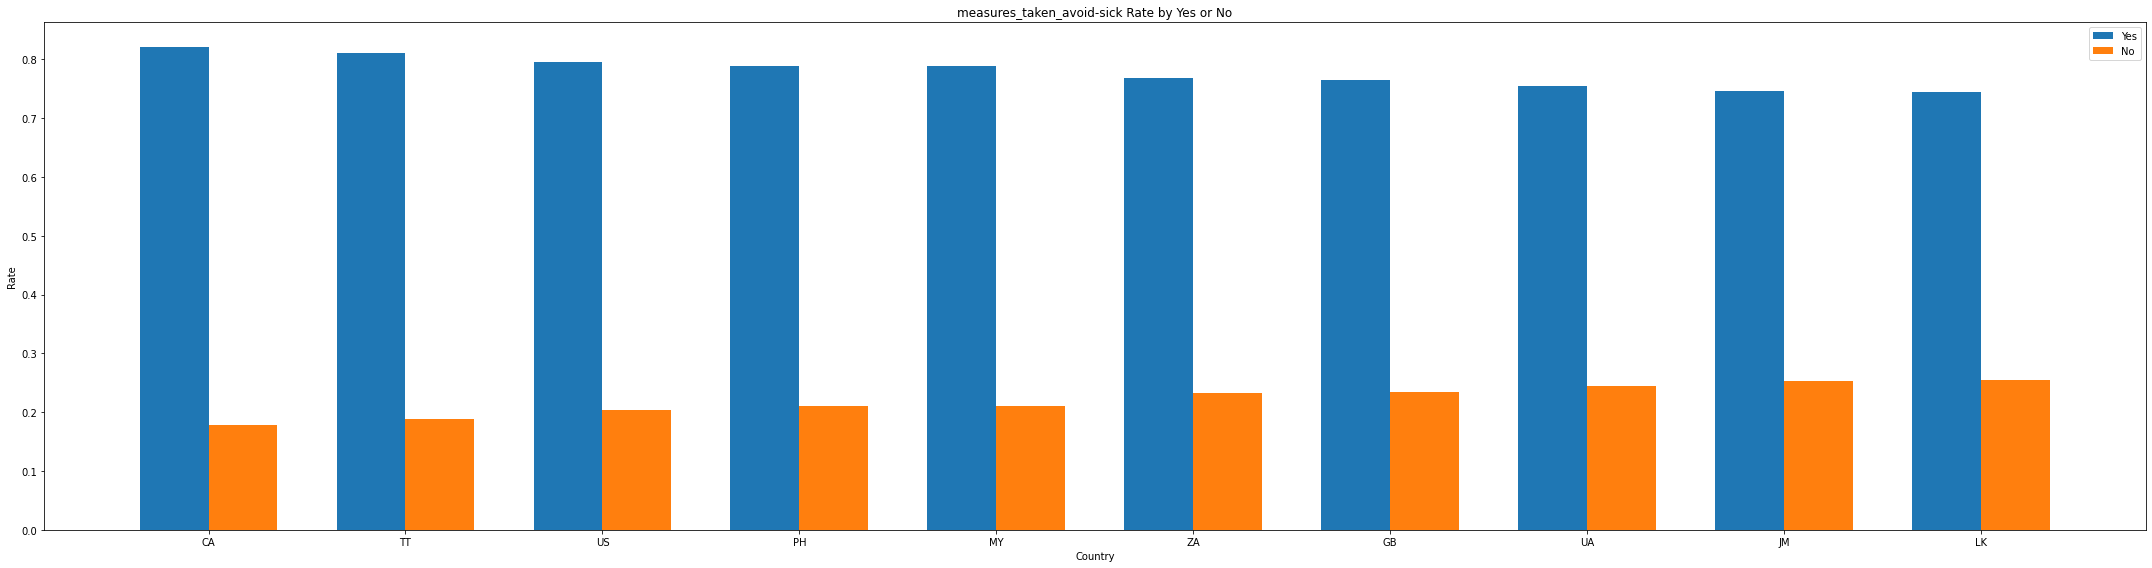

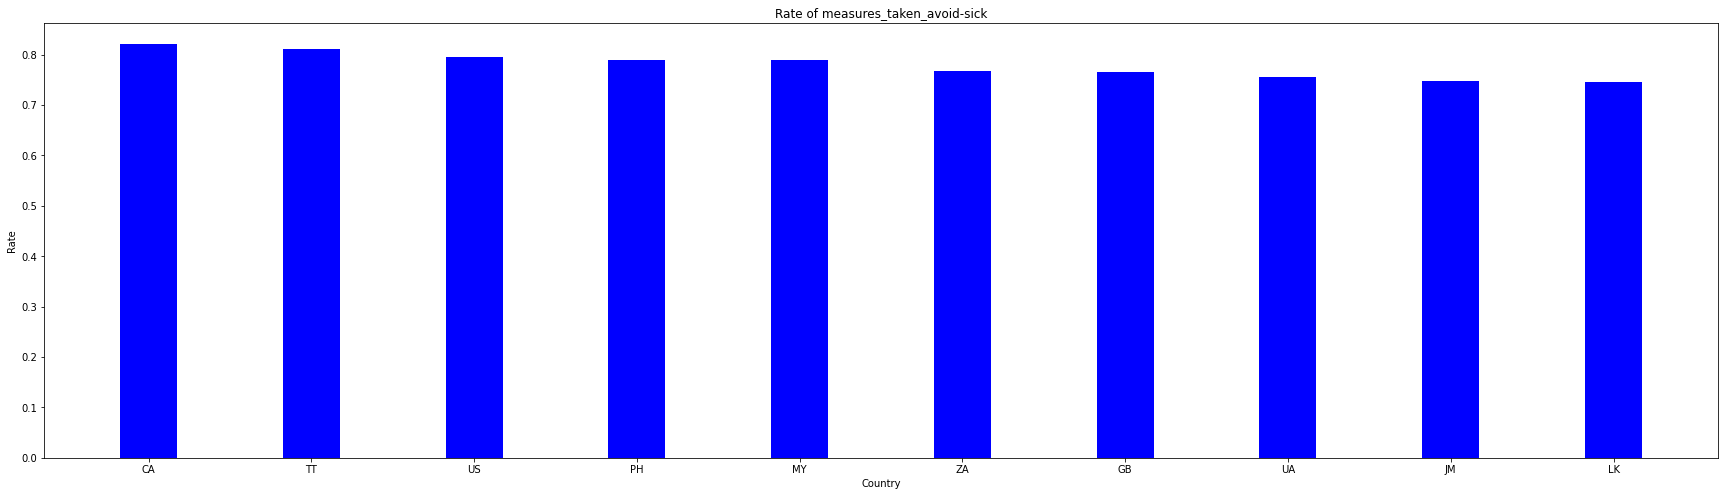

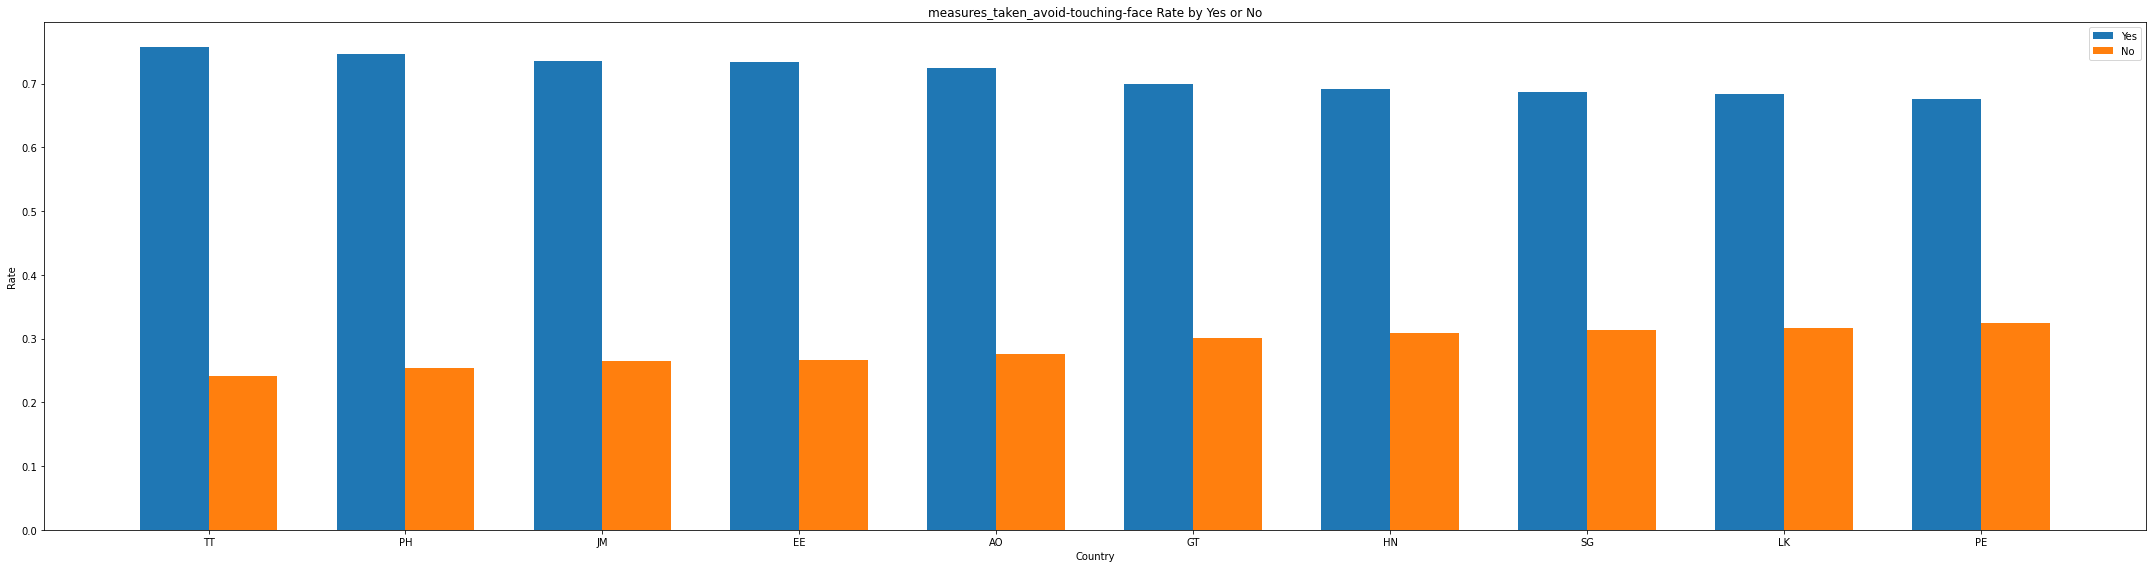

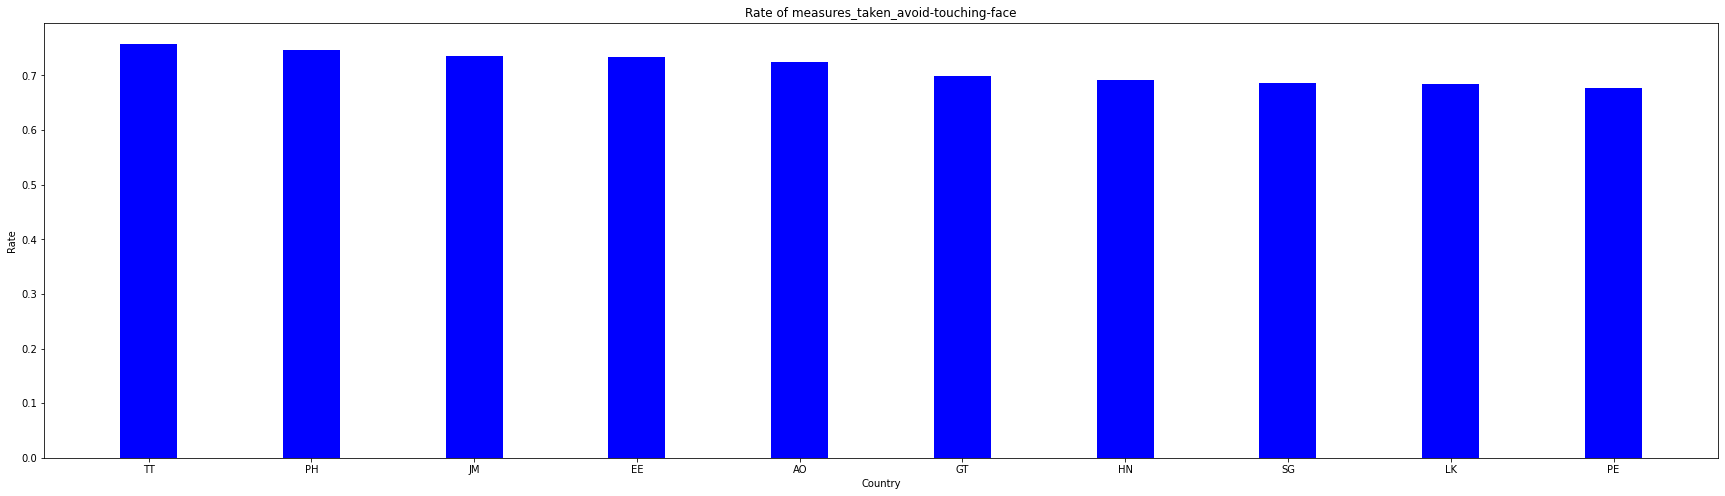

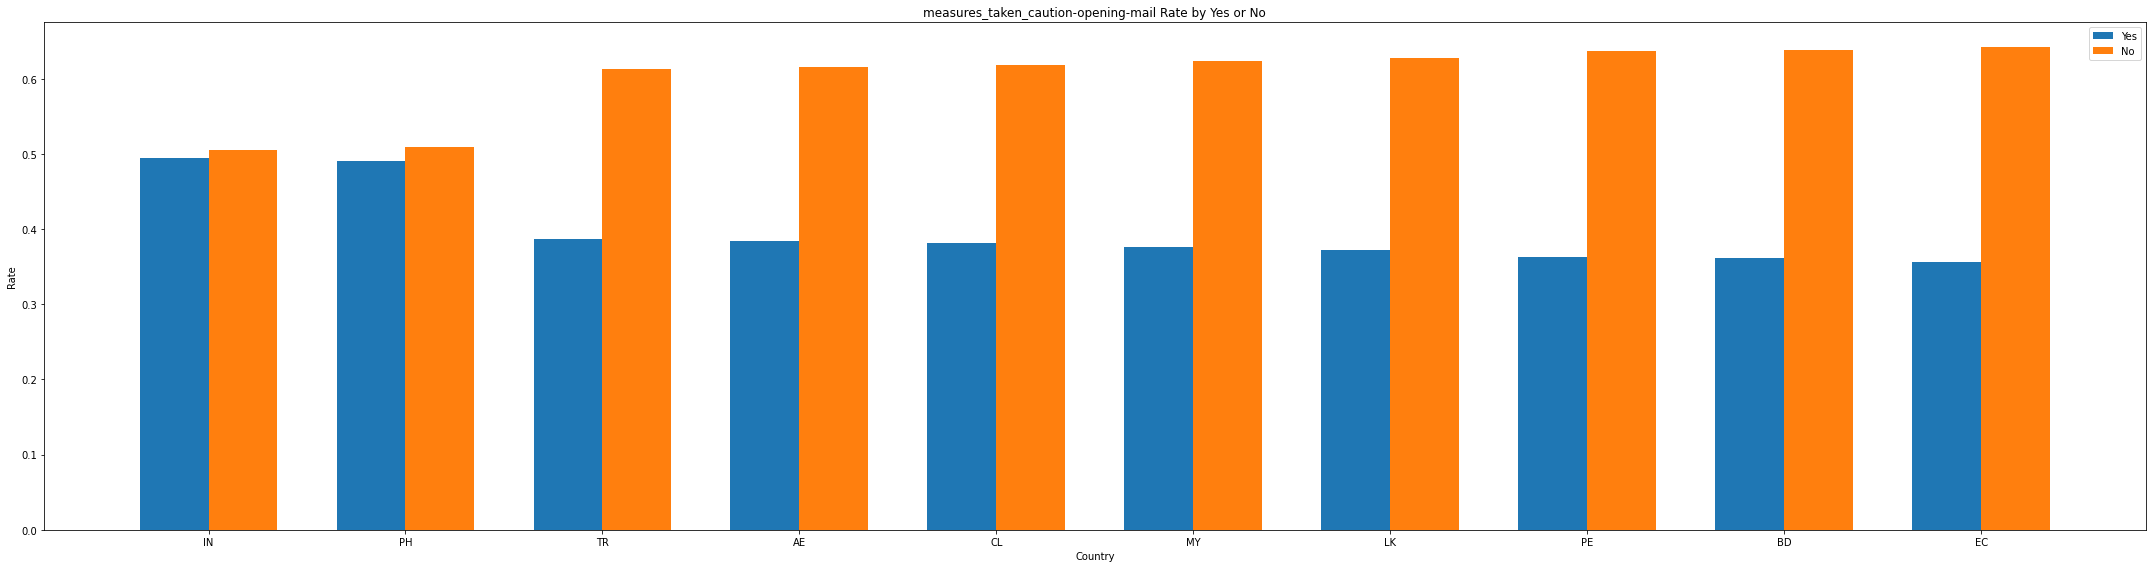

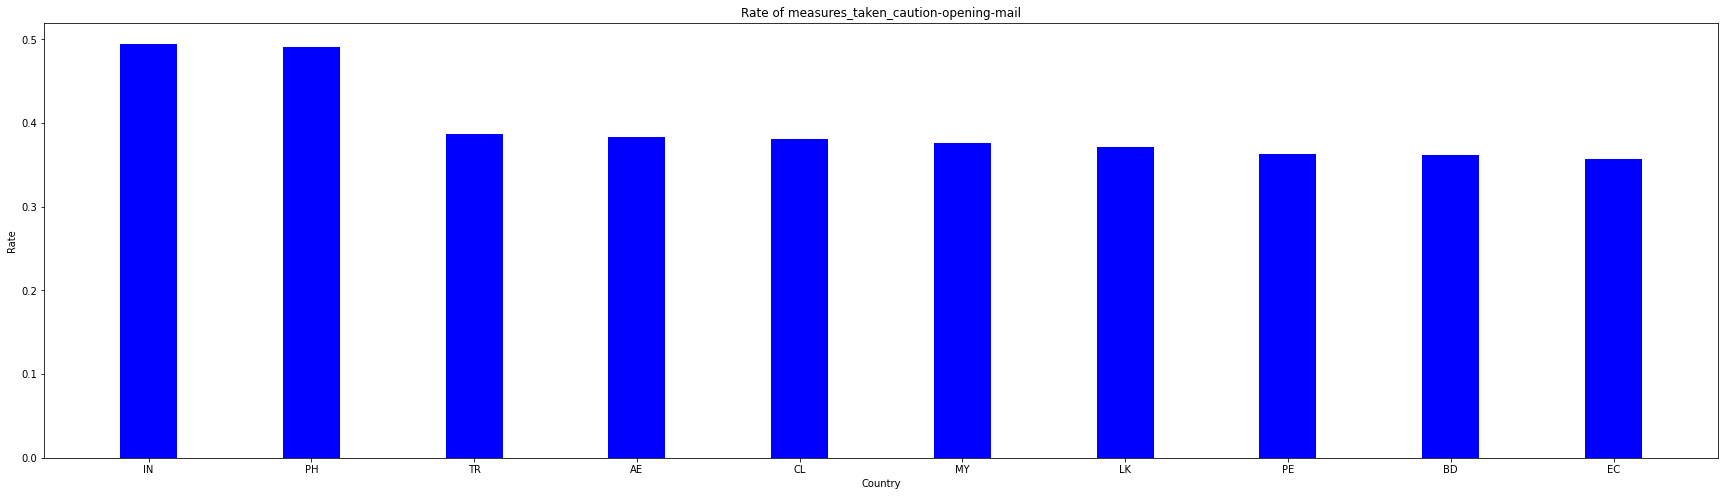

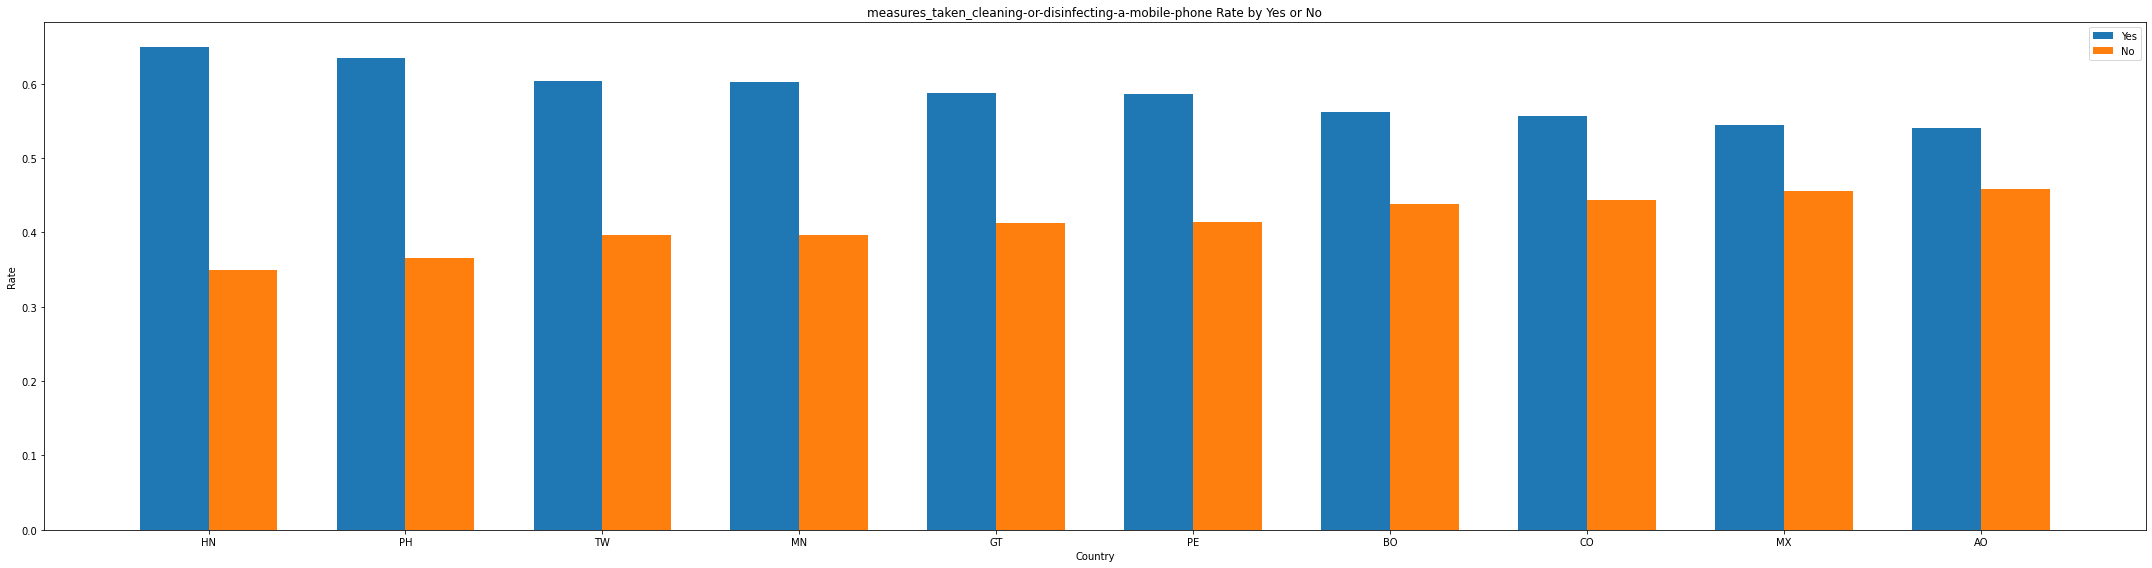

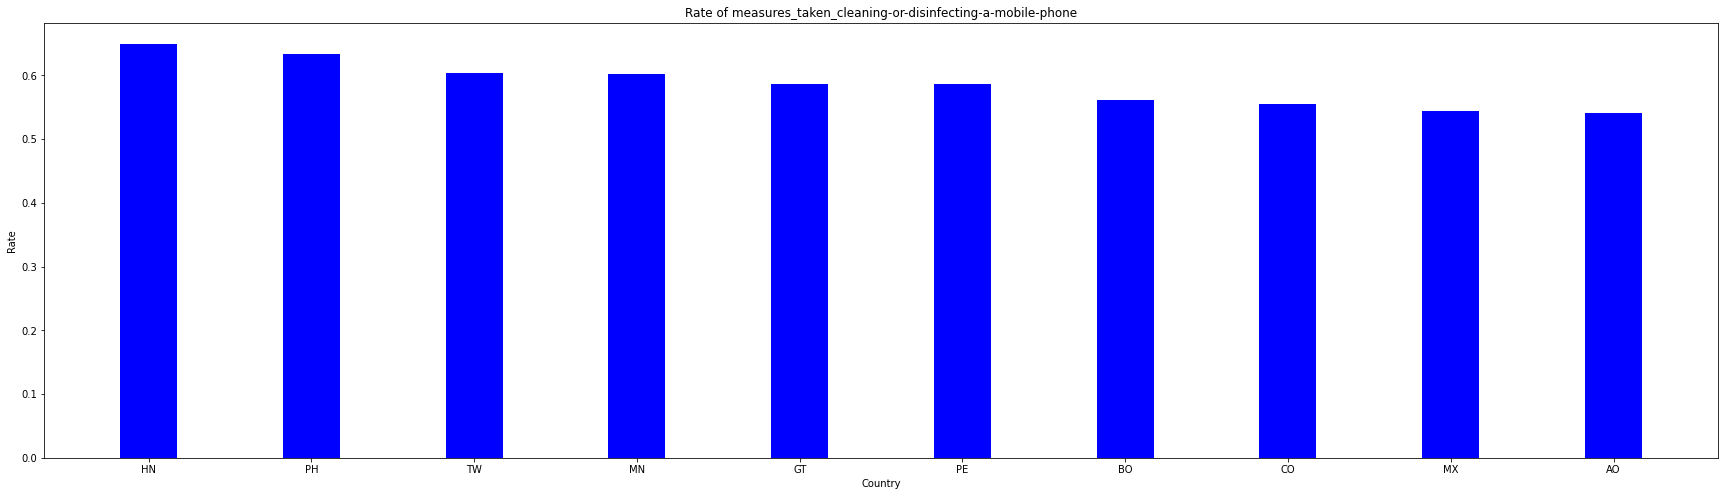

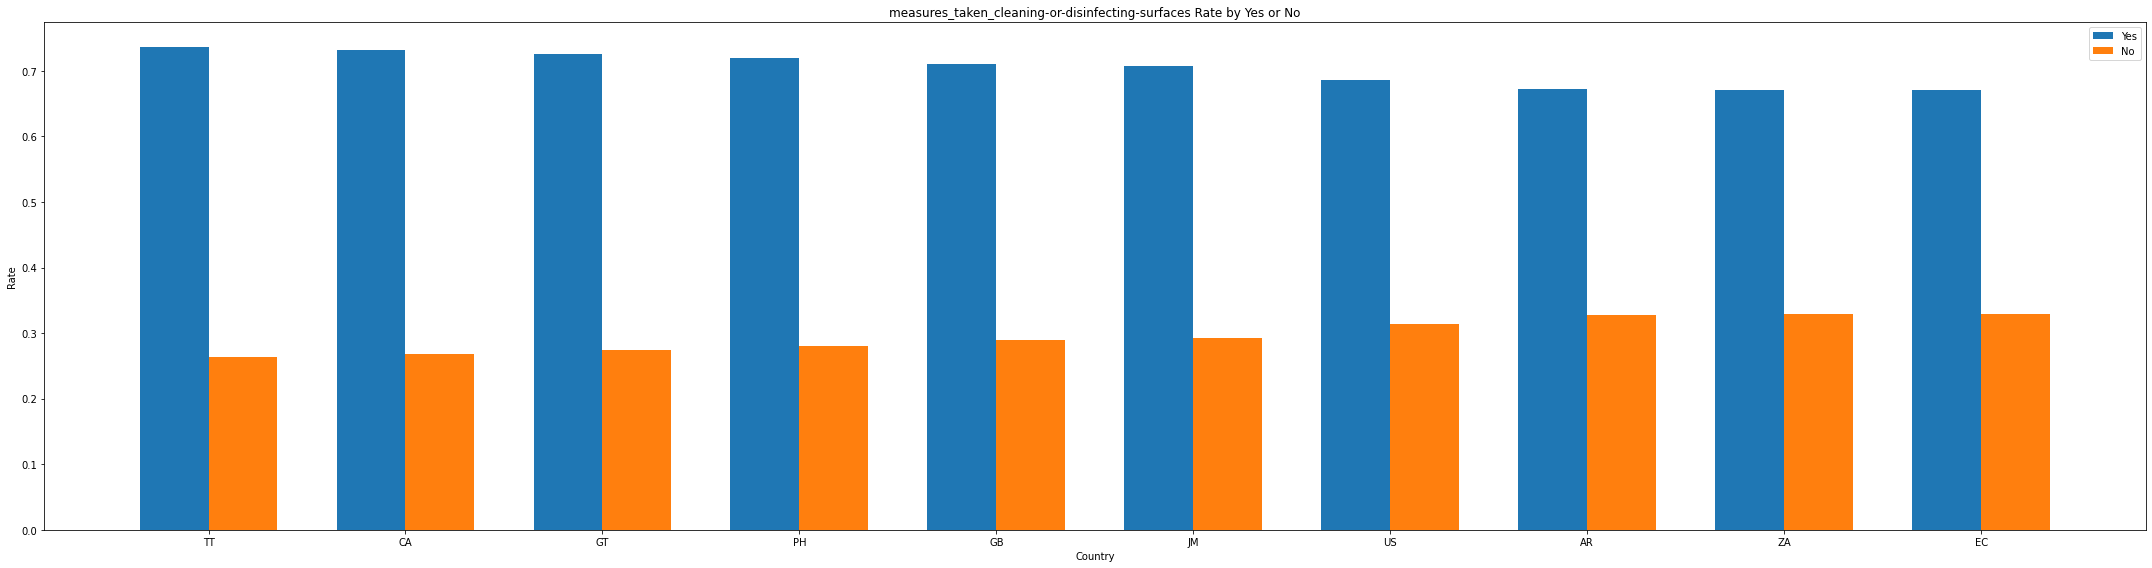

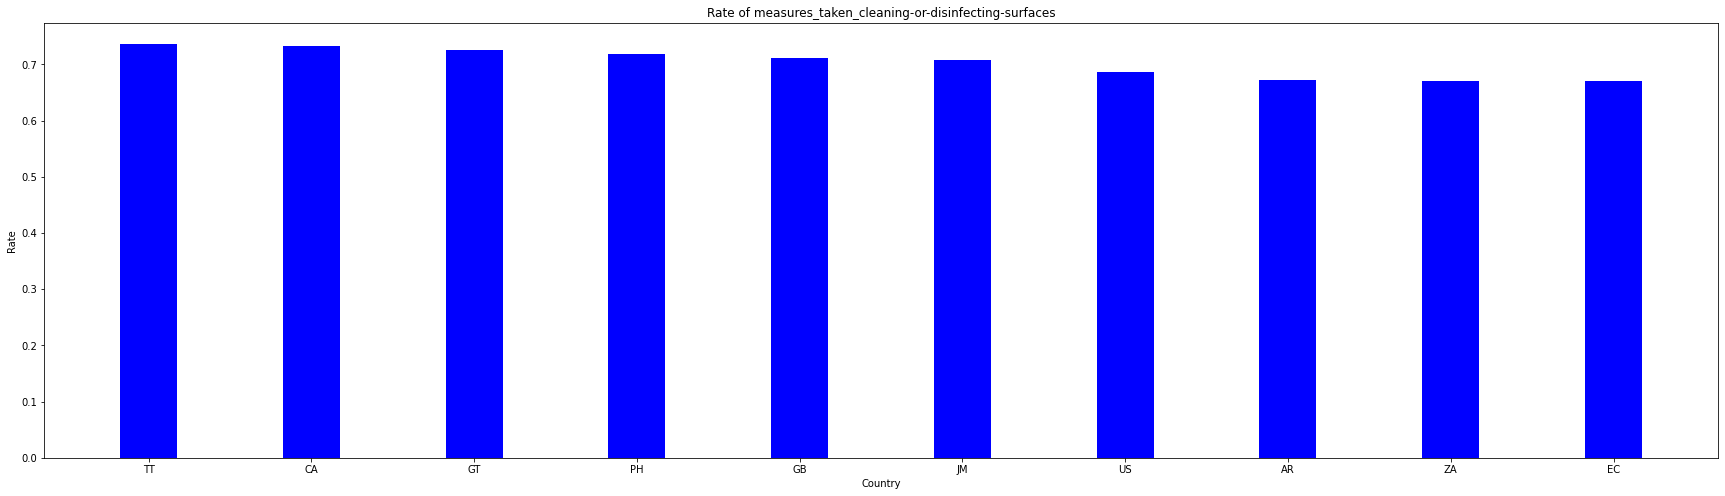

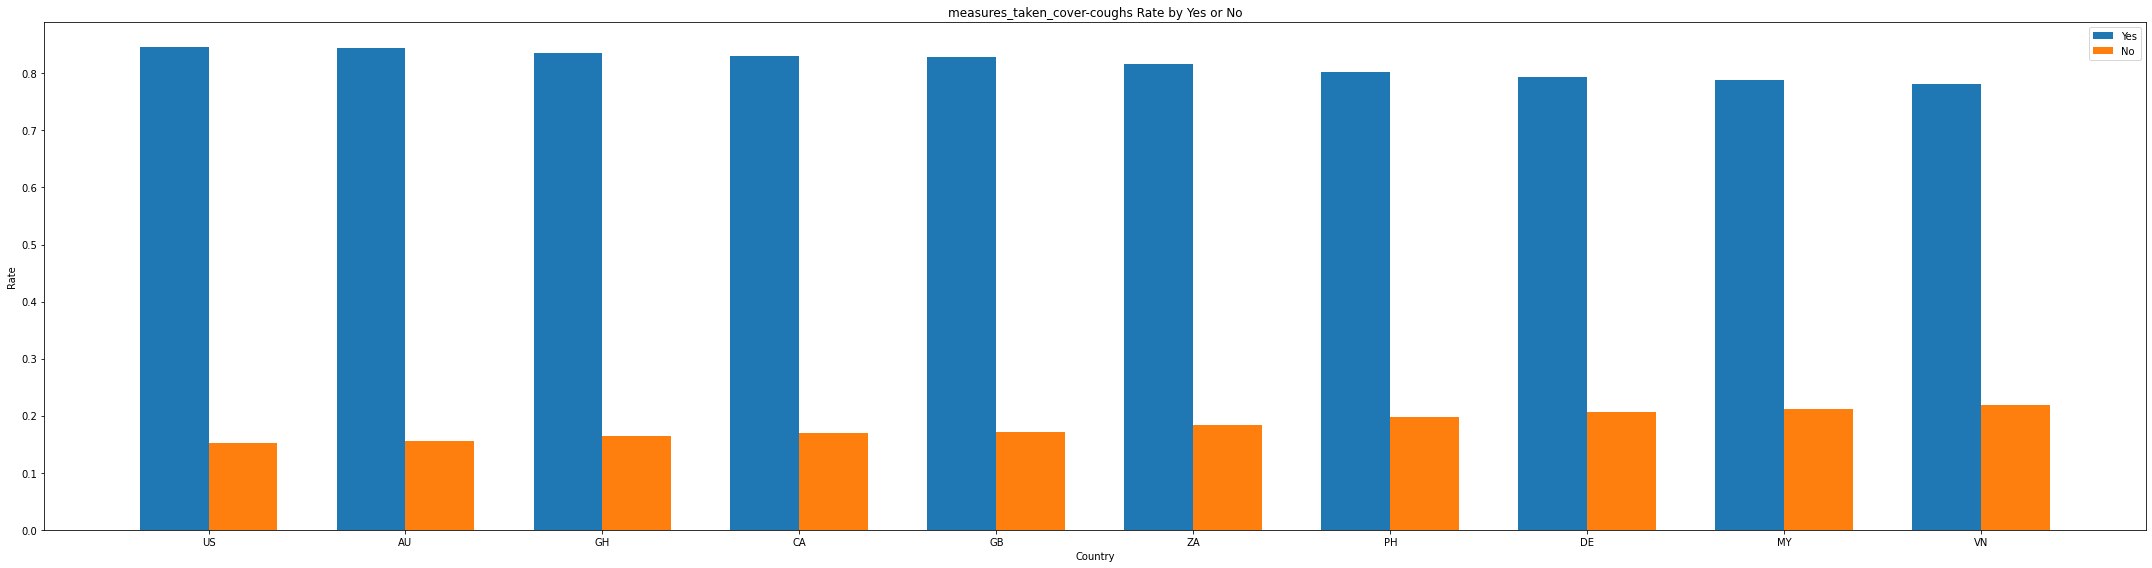

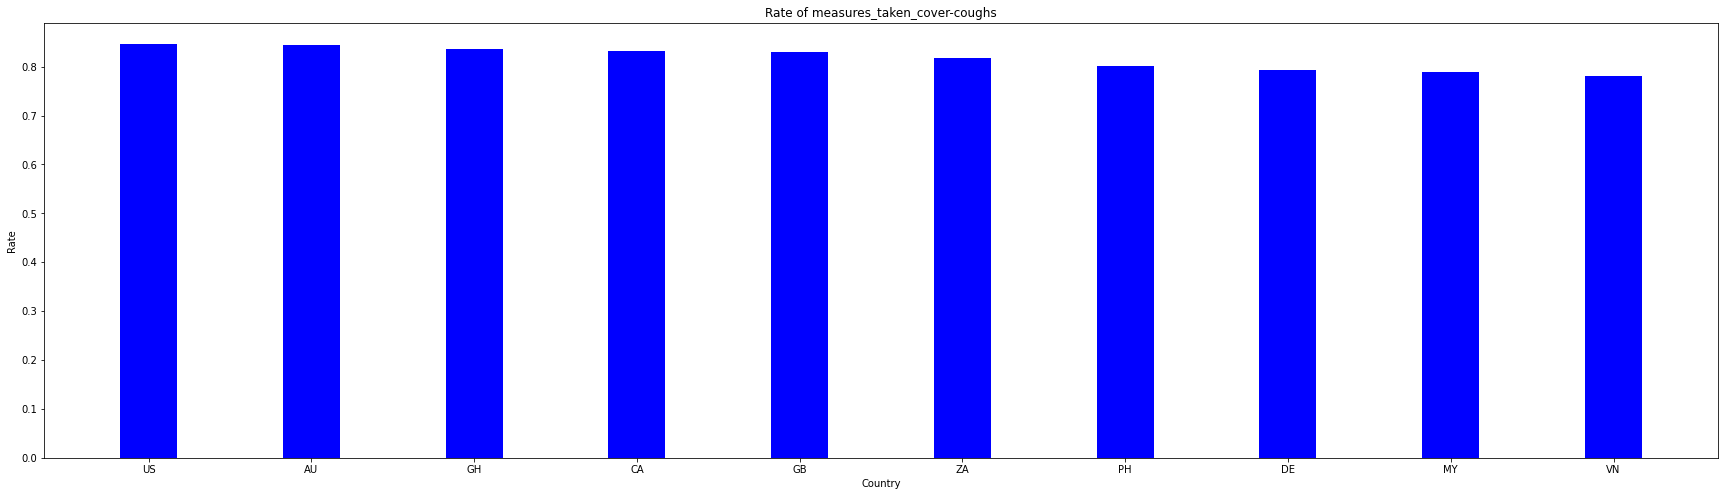

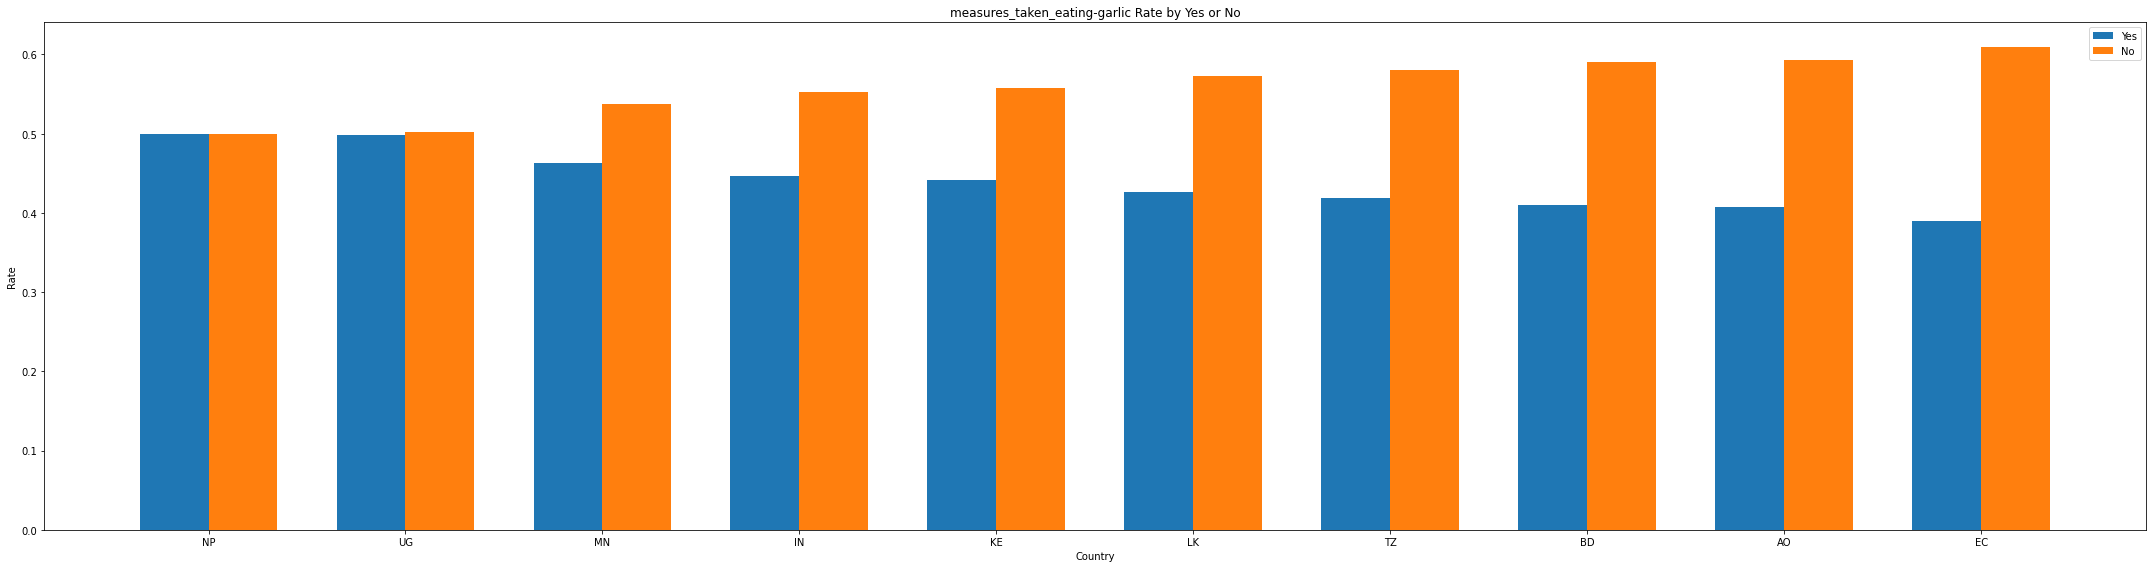

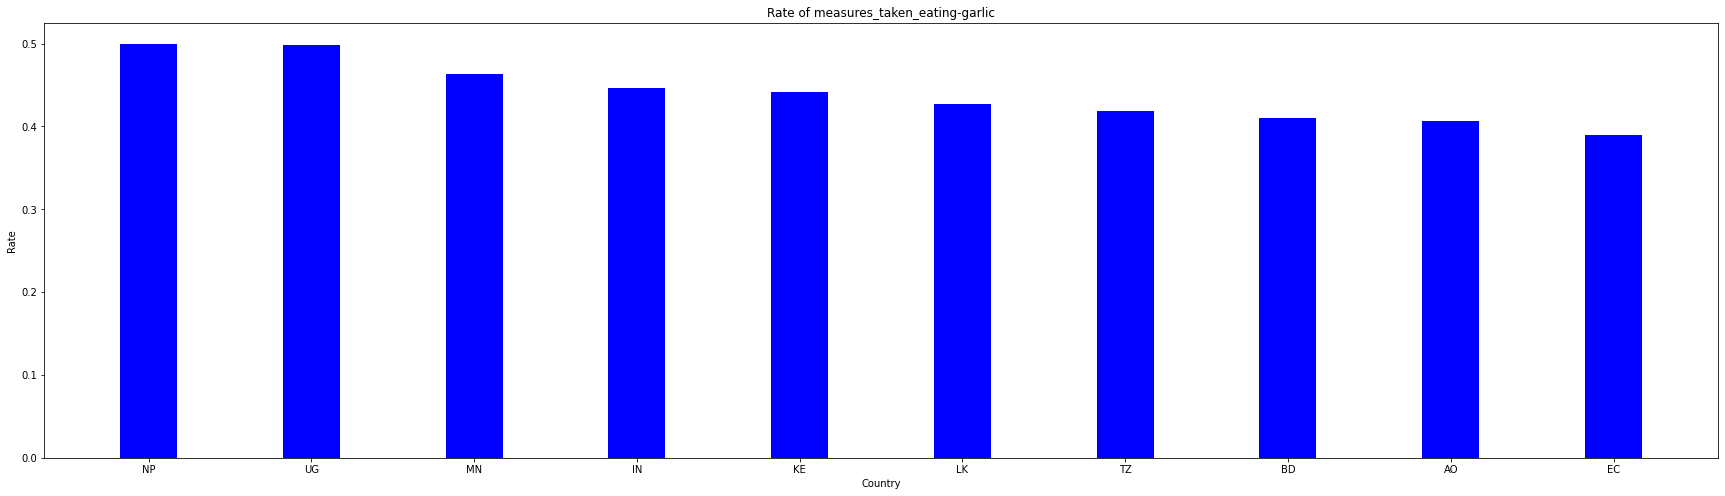

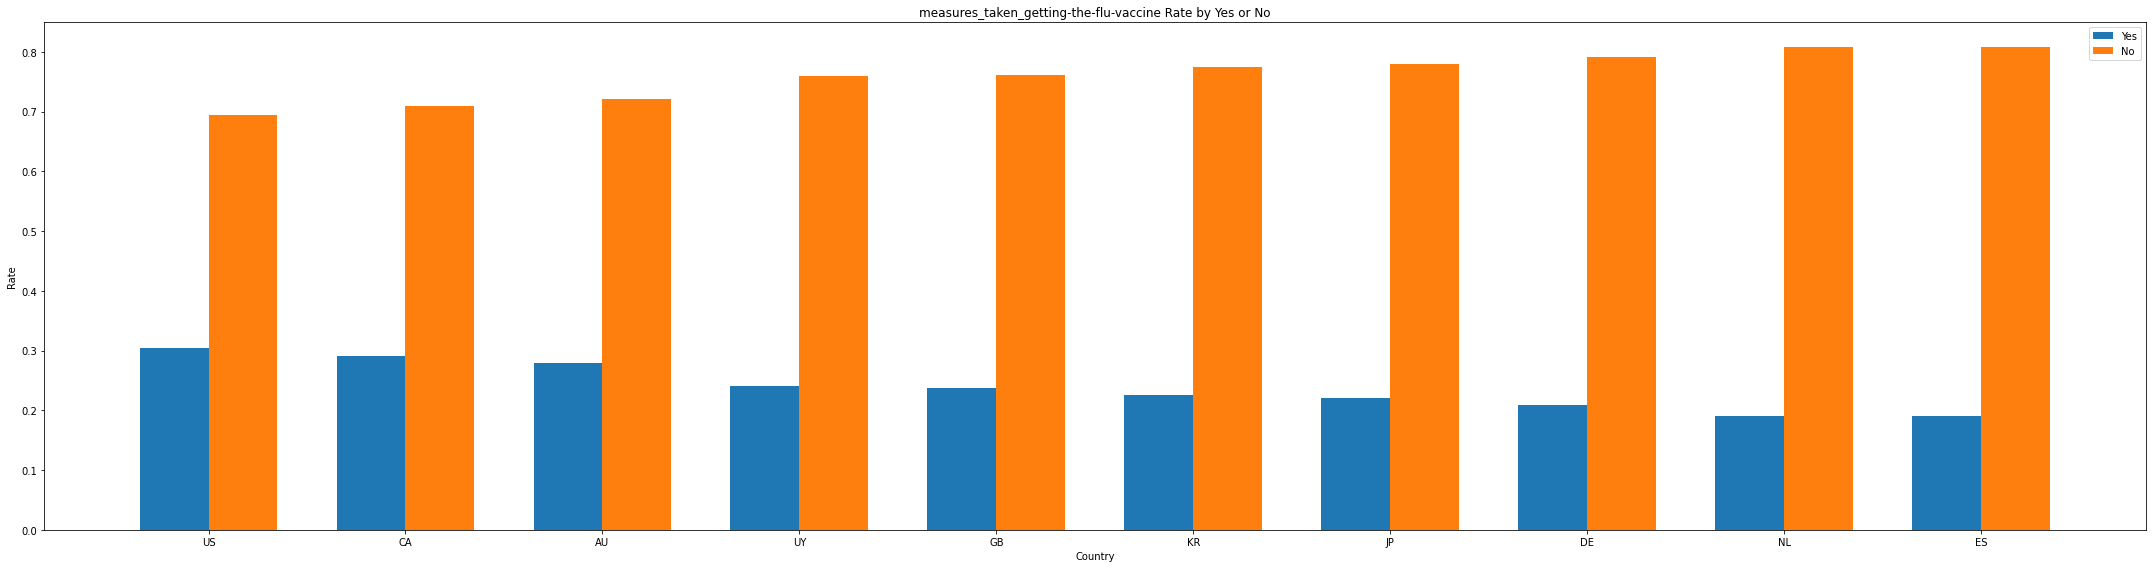

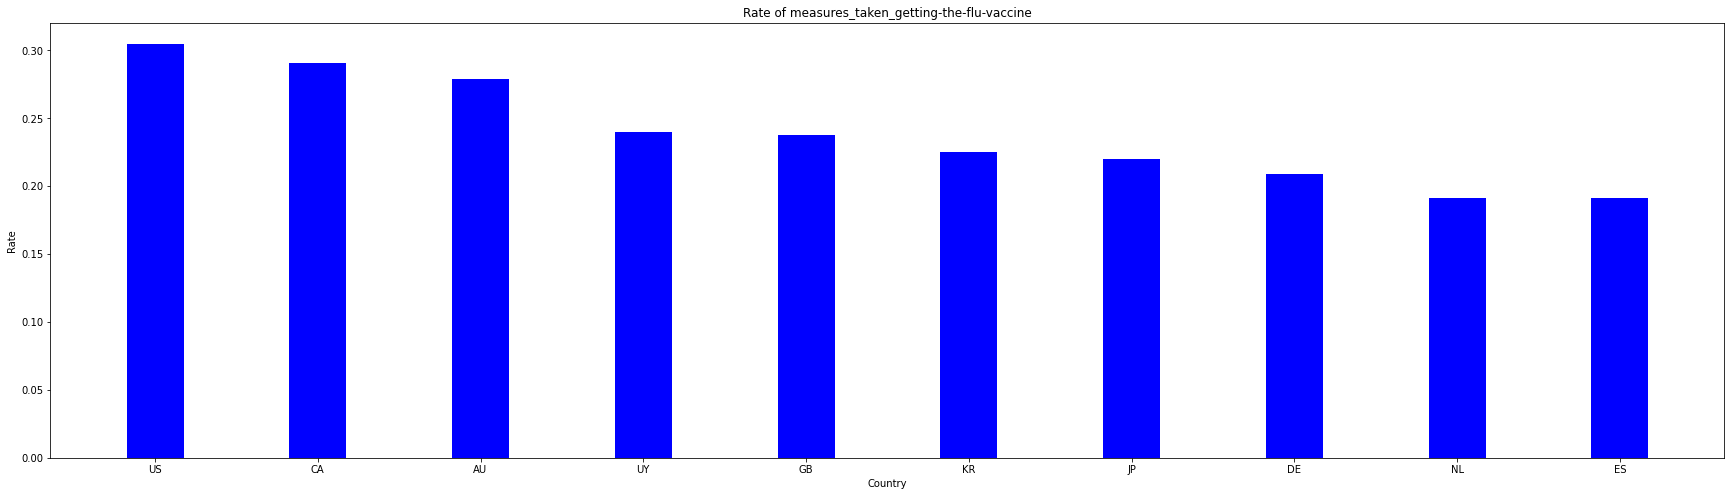

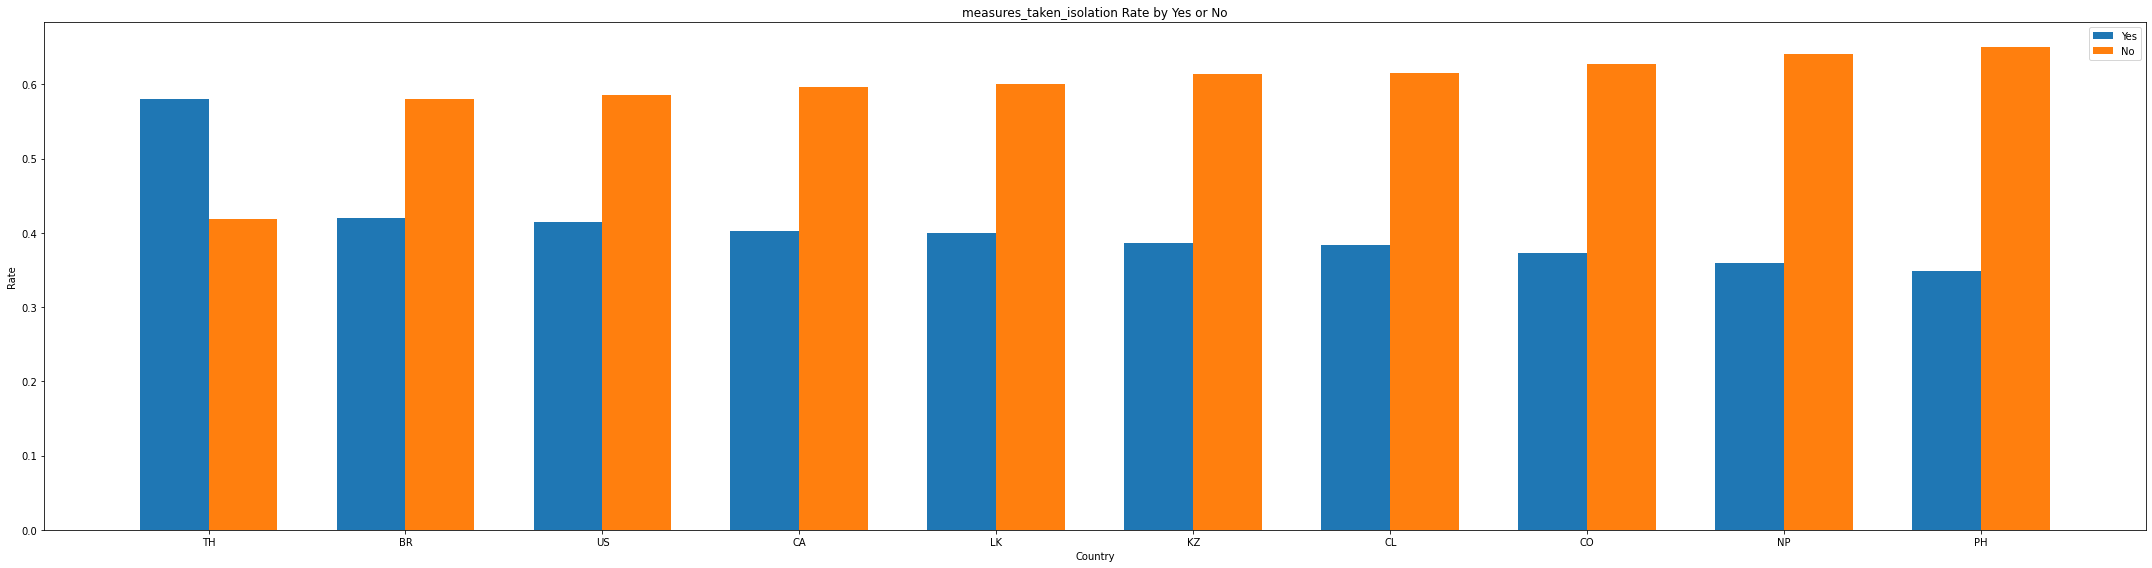

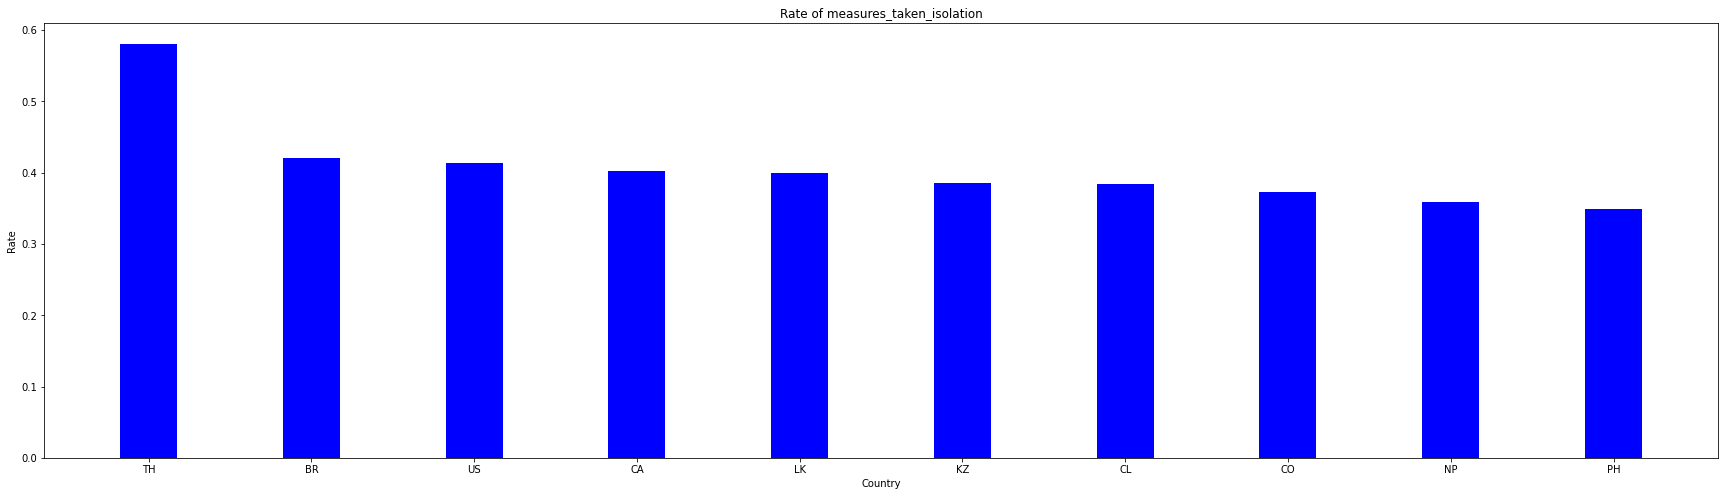

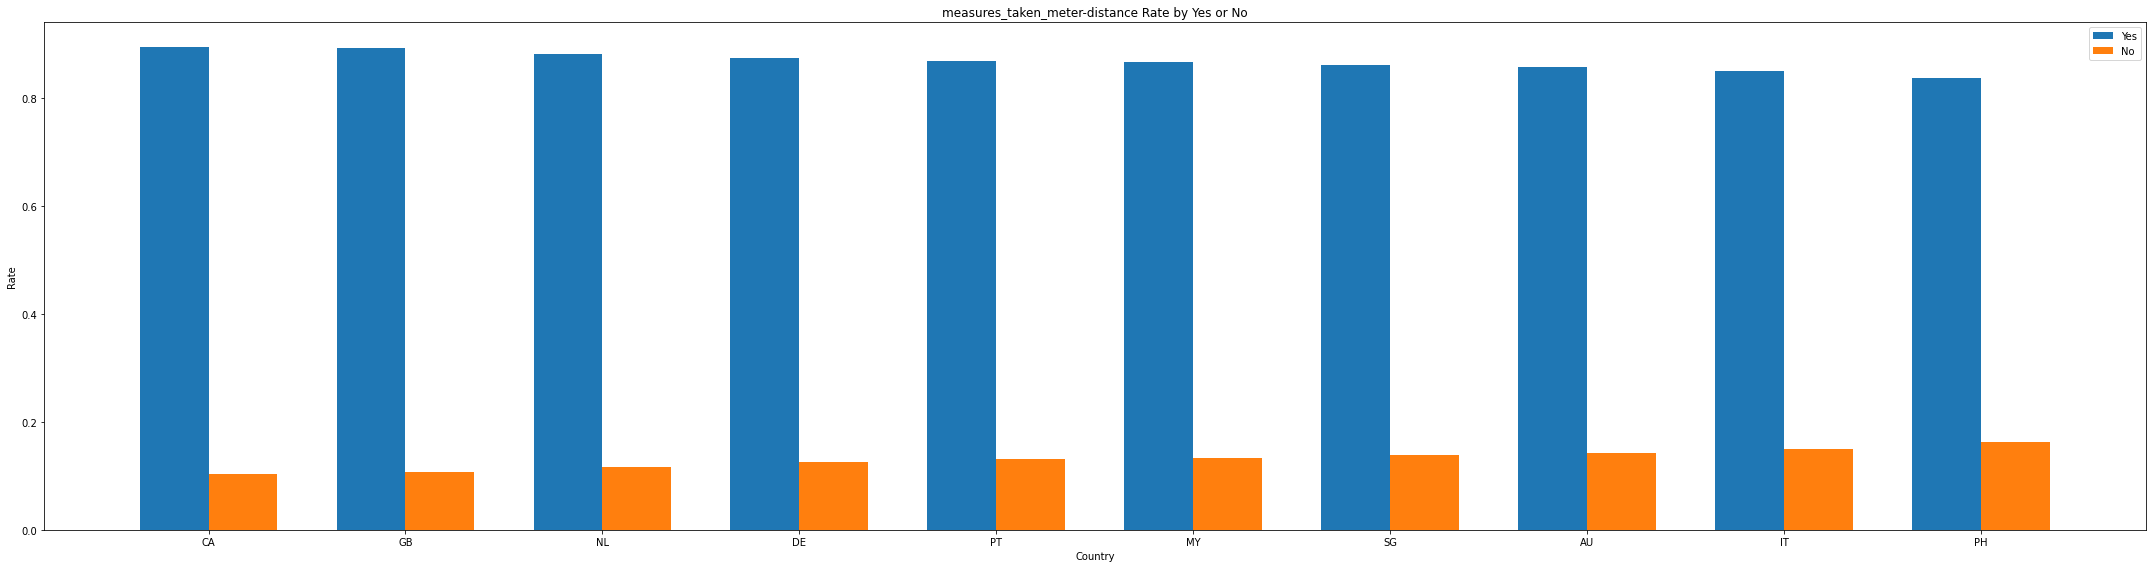

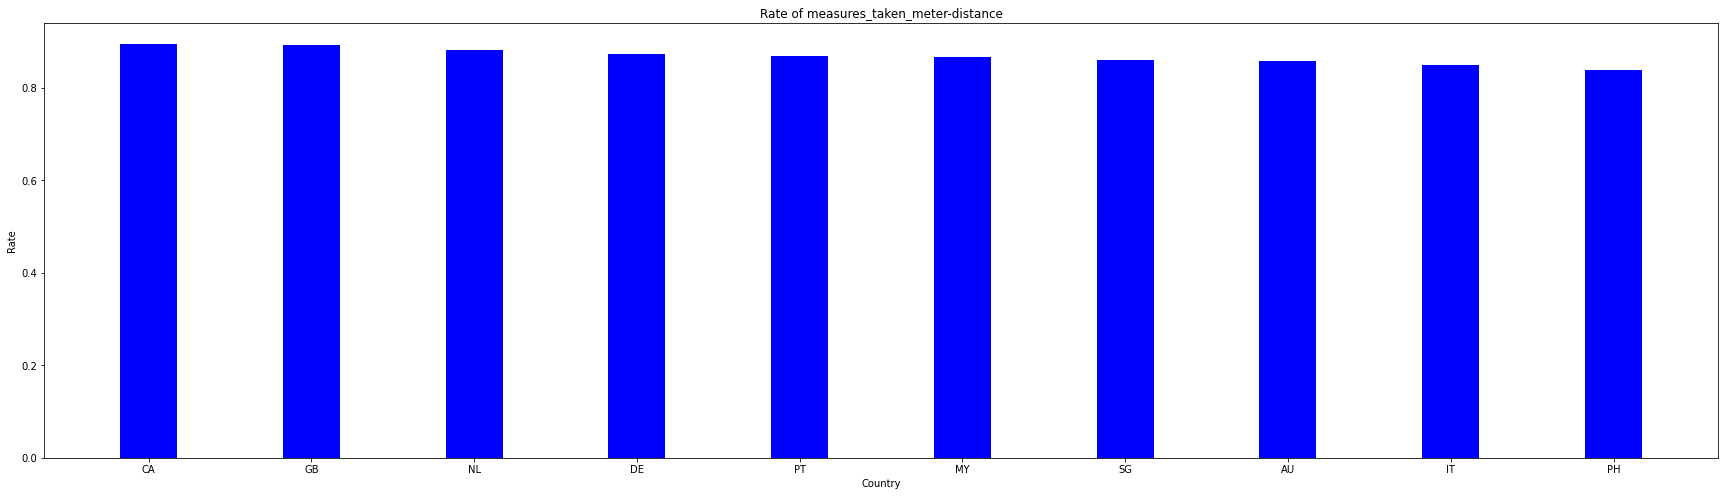

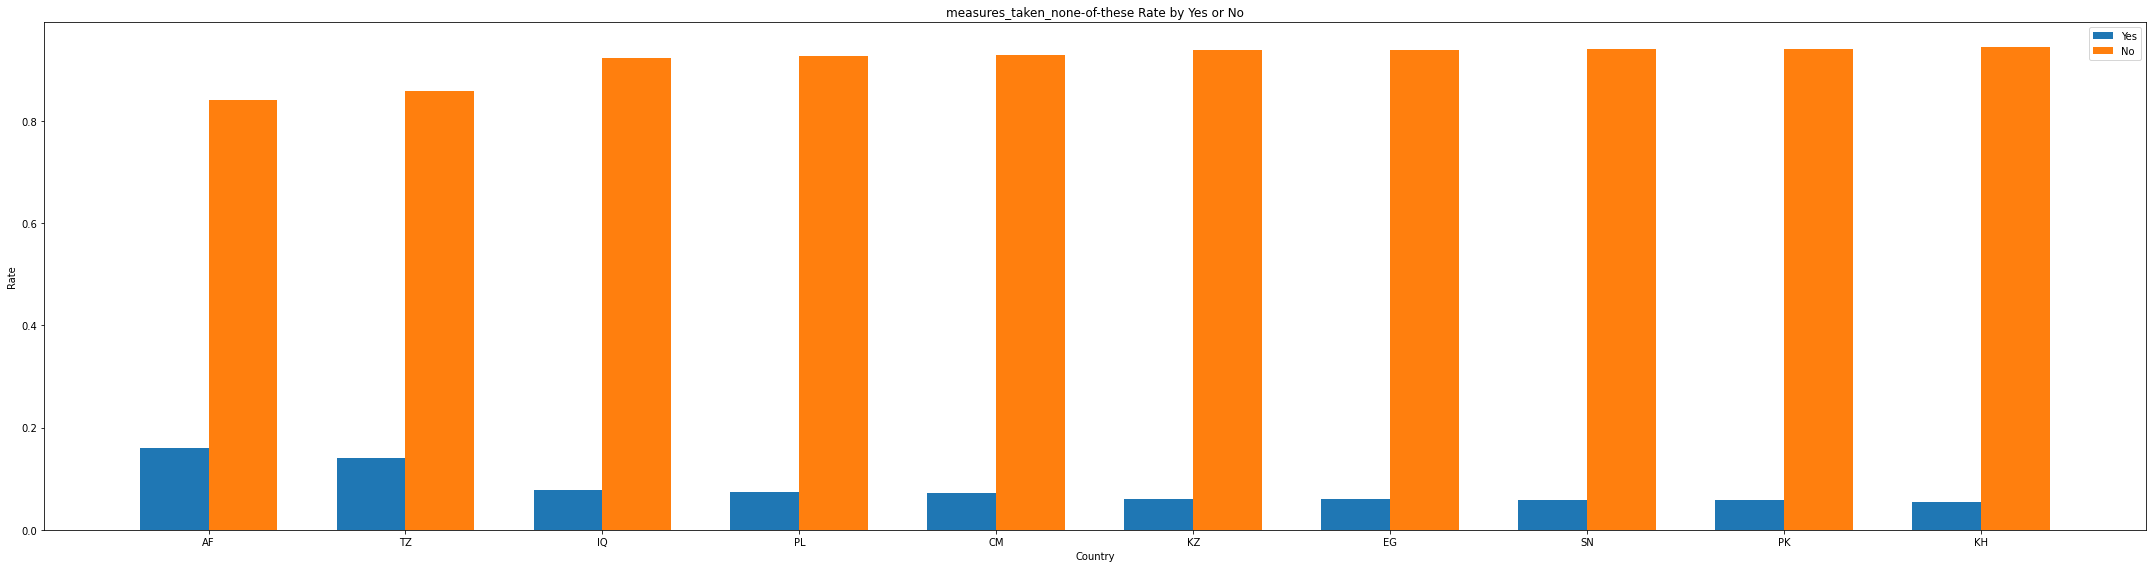

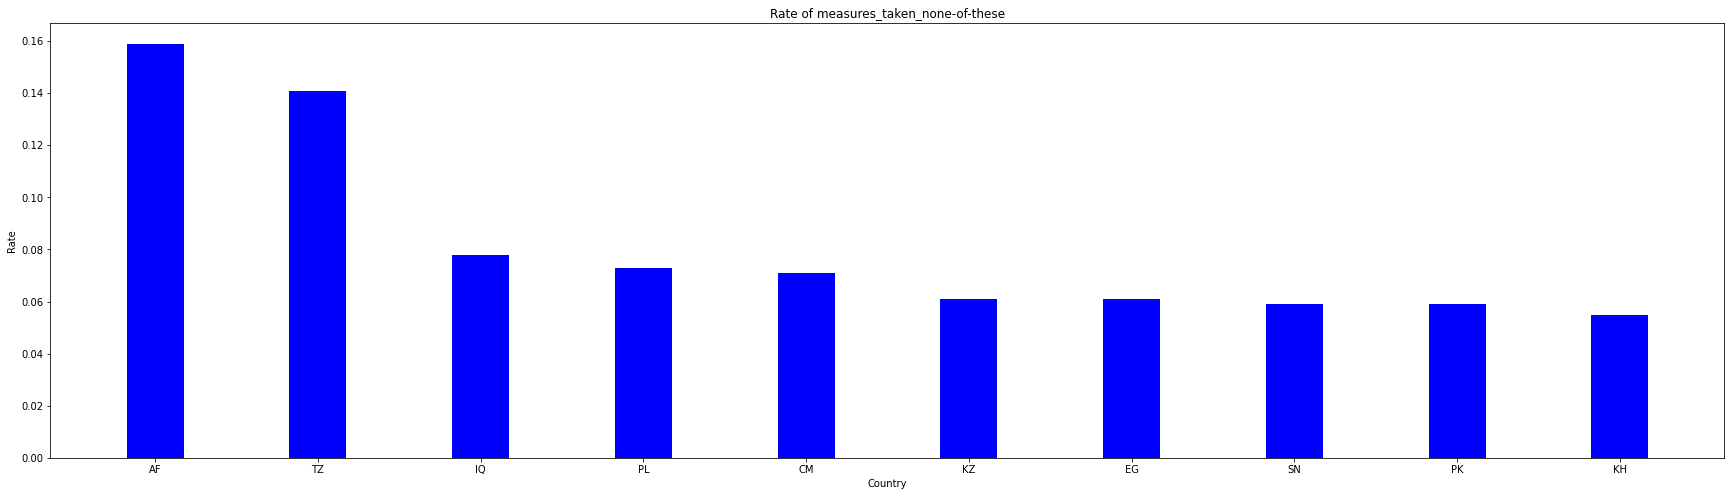

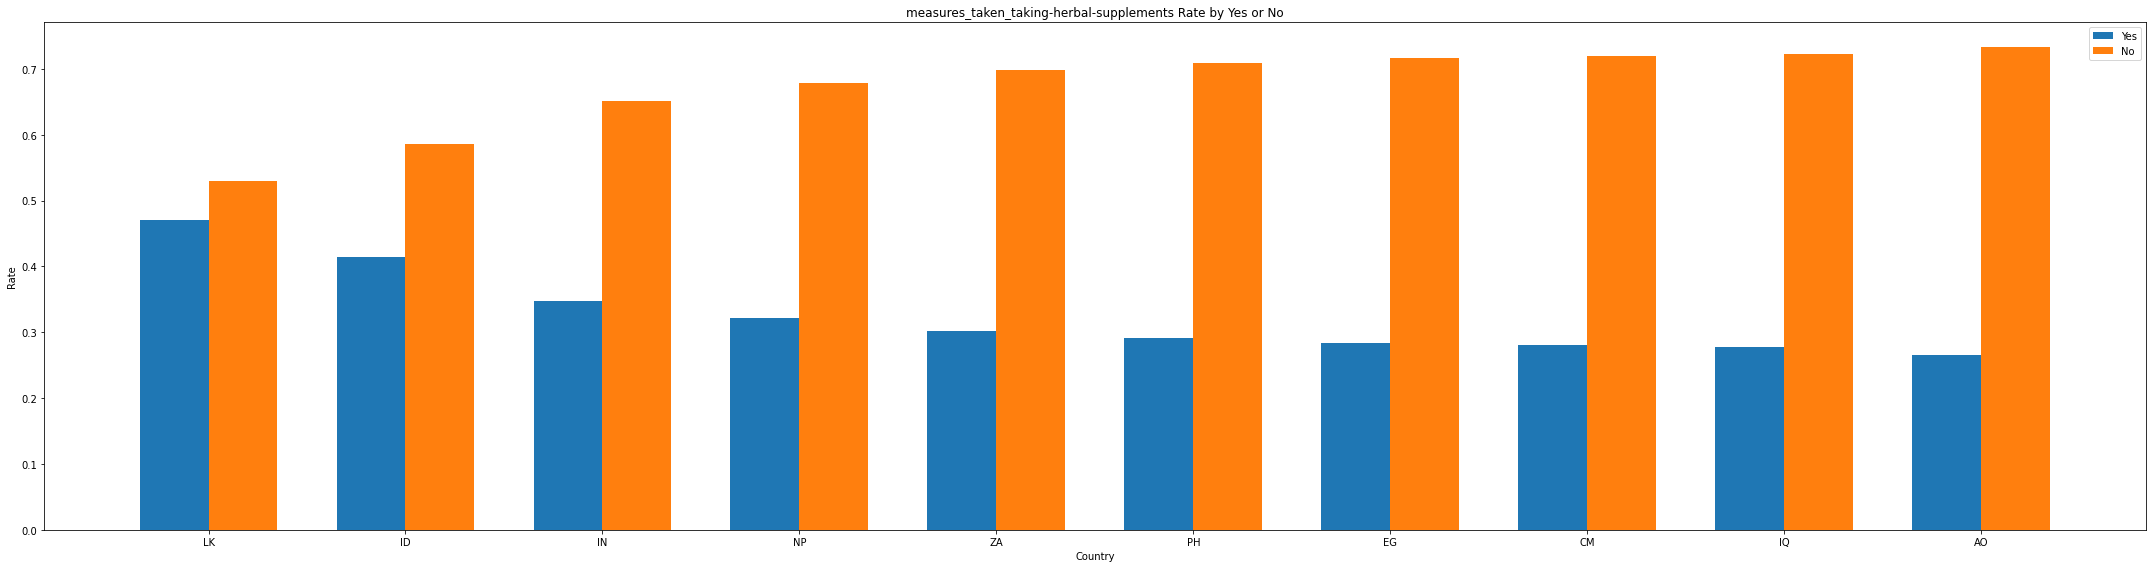

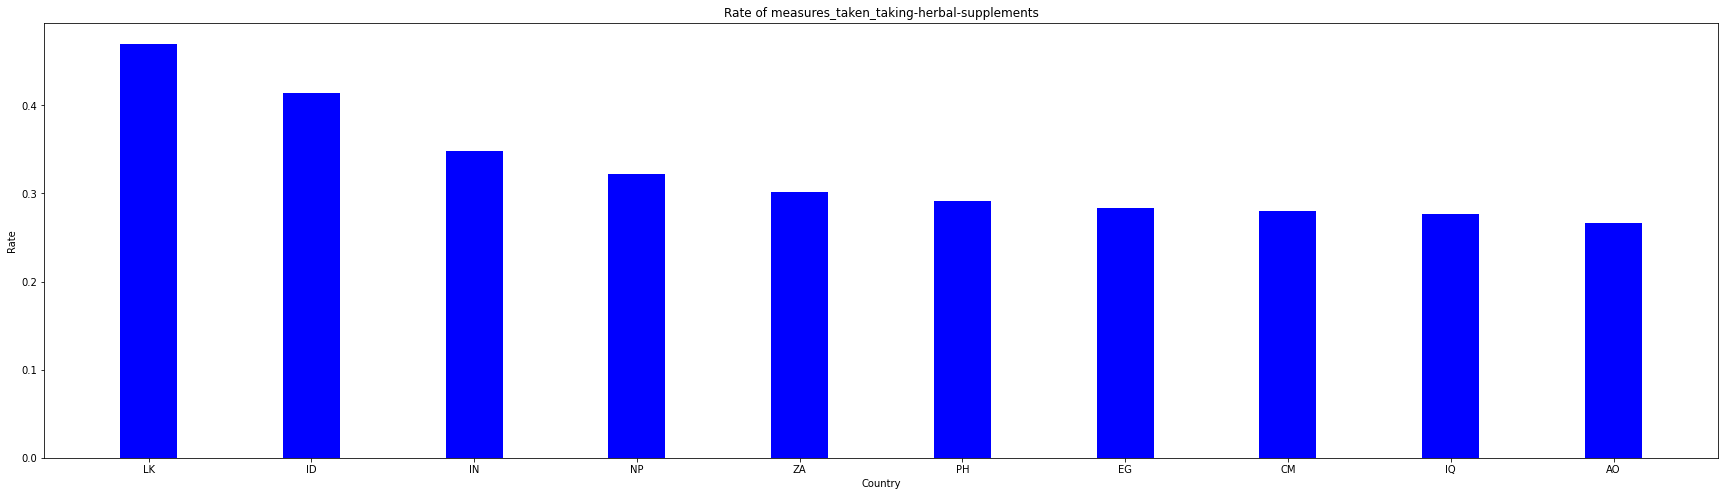

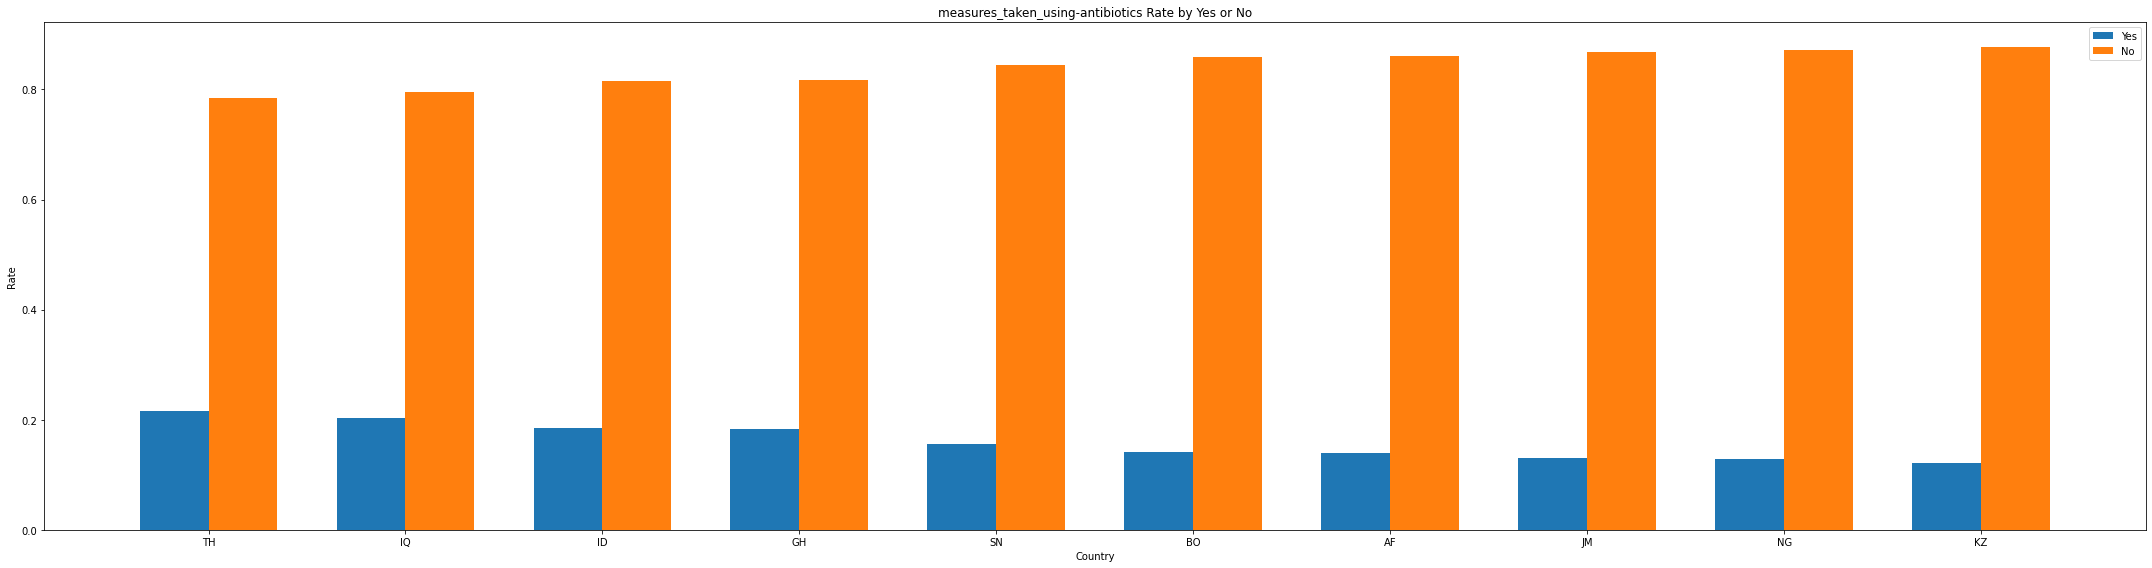

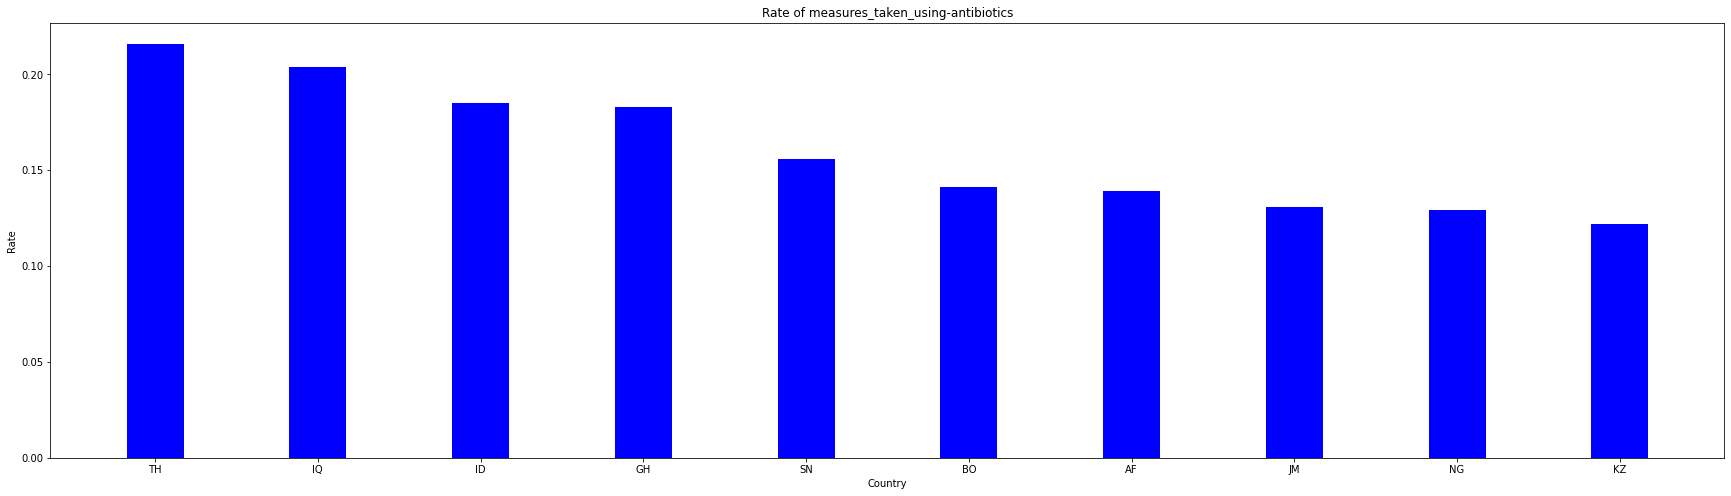

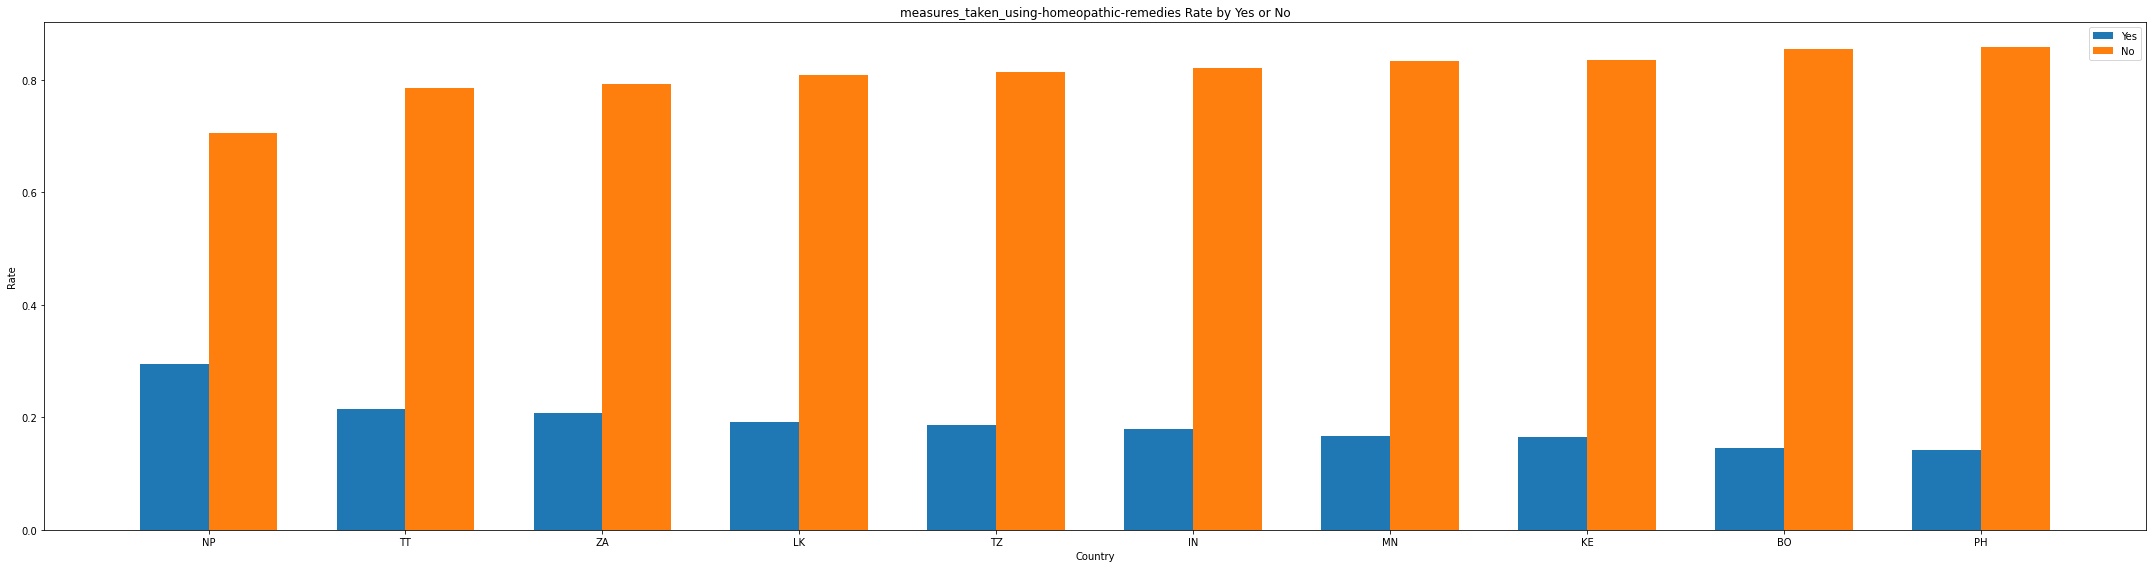

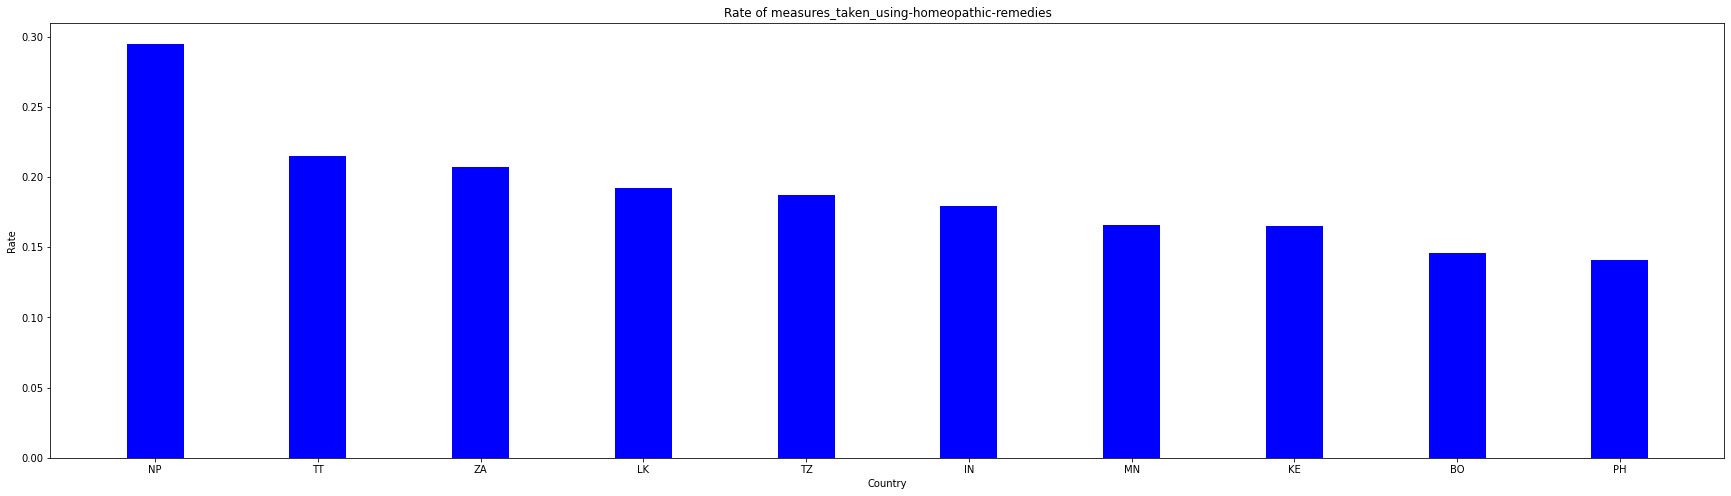

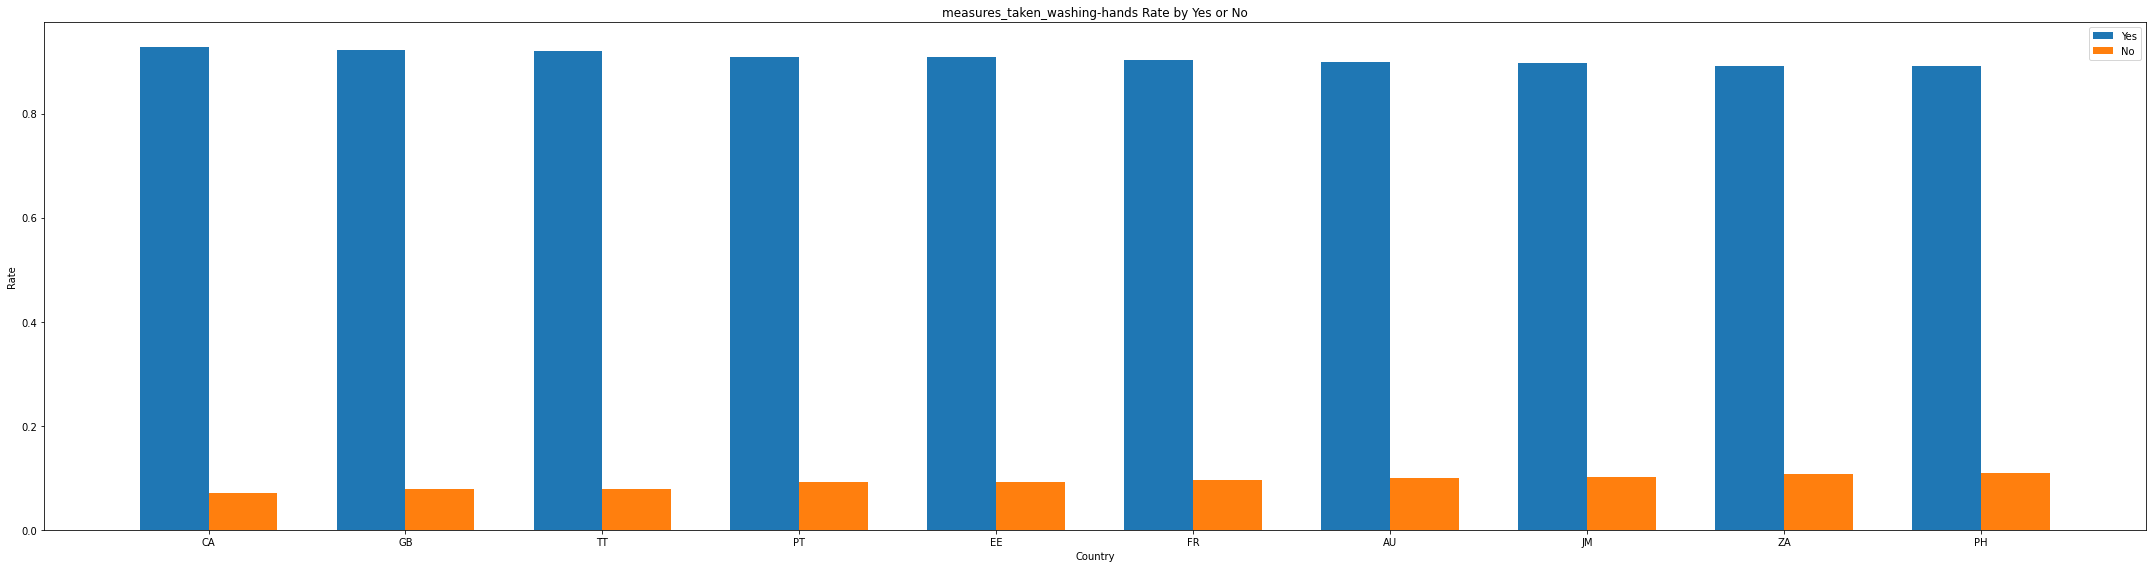

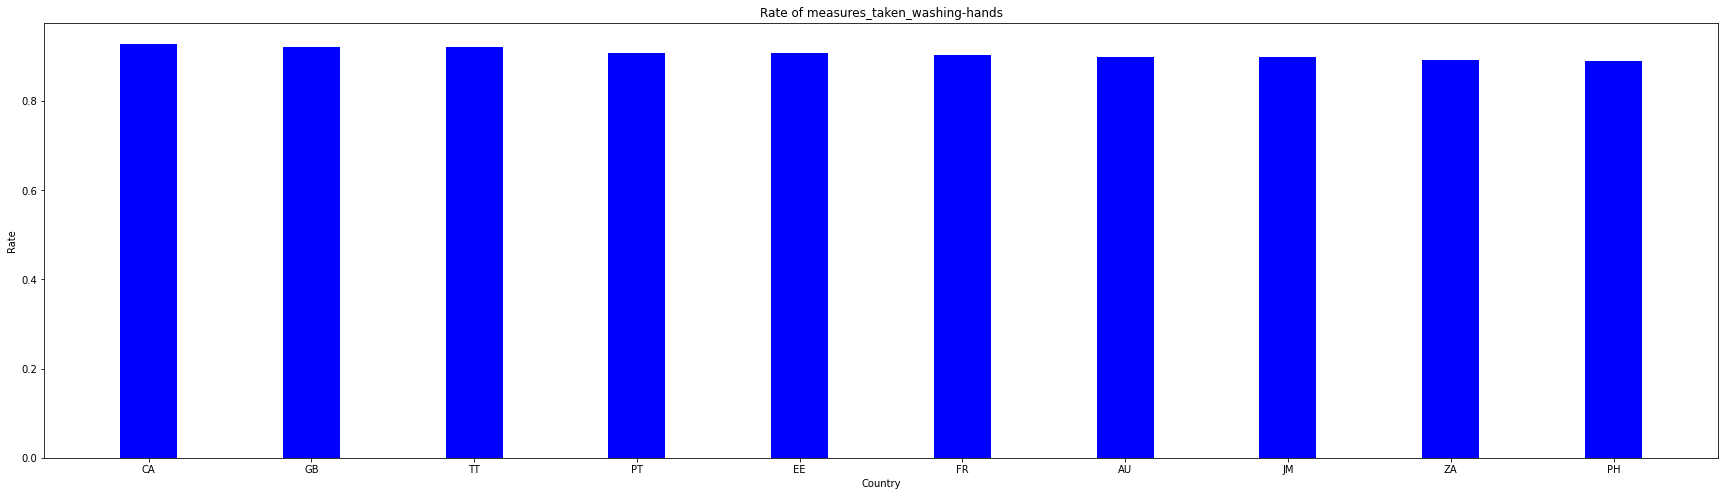

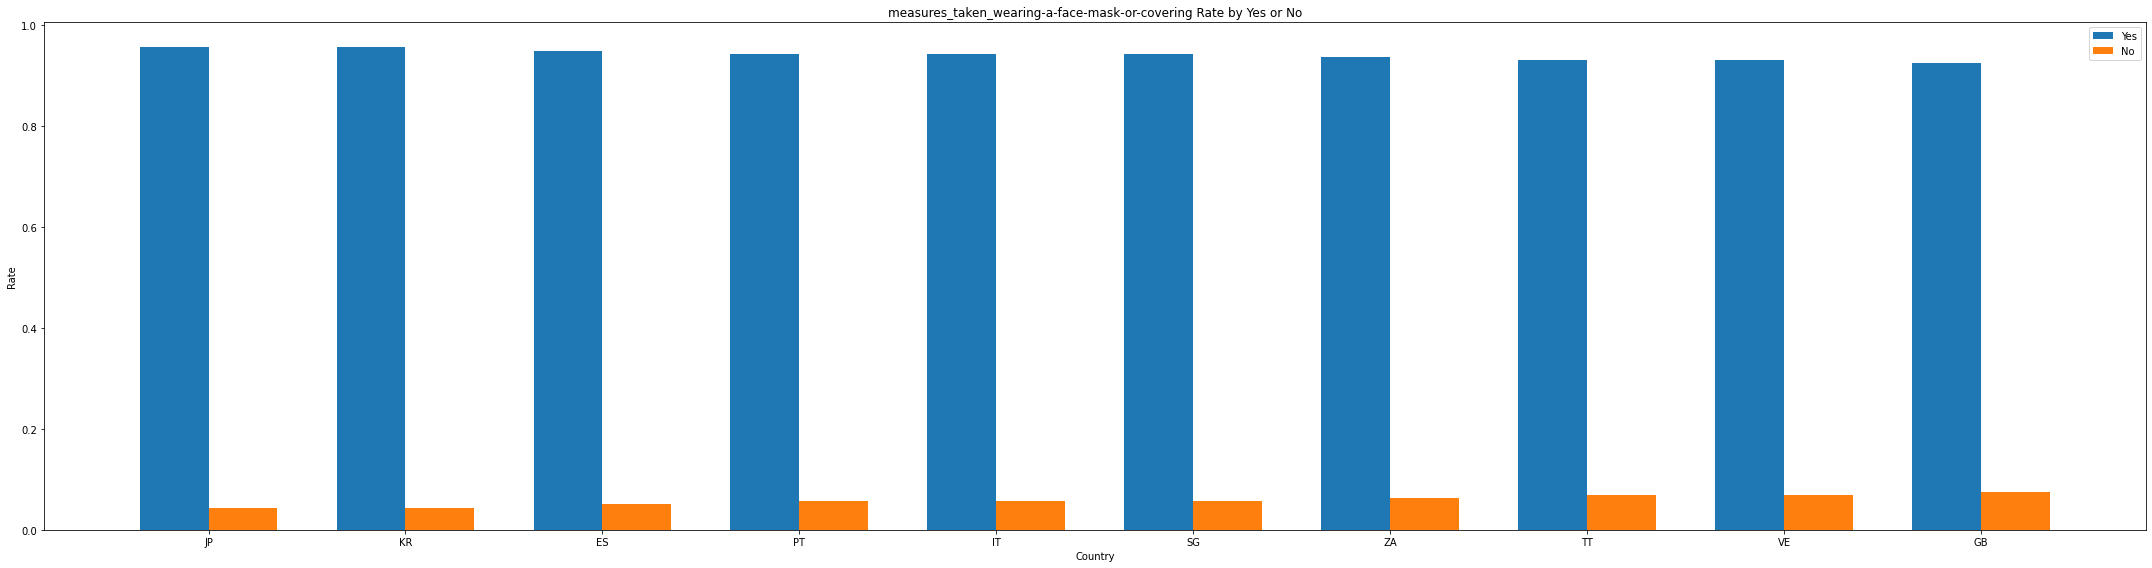

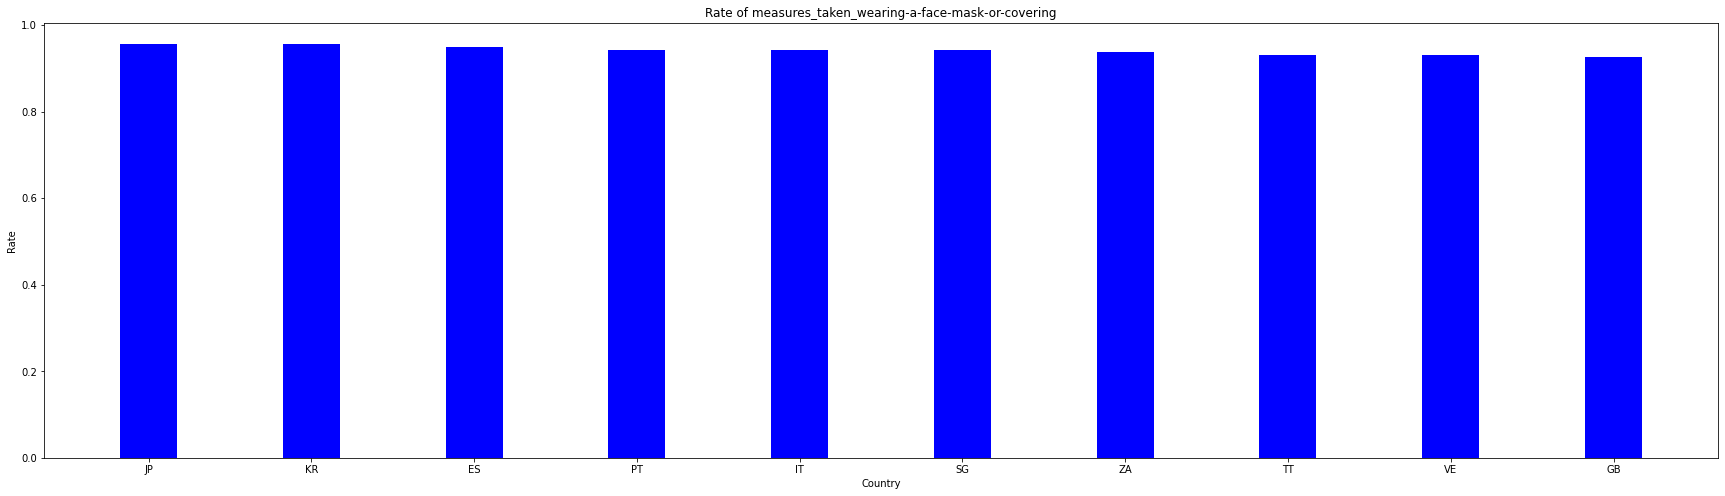

In [ ]:
for i in range(0, len(measures_taken), 2):
  df_temp = df_mit[["country", measures_taken[i], measures_taken[i+1]]].sort_values(by=measures_taken[i]).head(10)
  grouped_bar(df_temp, measures_taken[i], measures_taken[i+1], measures_taken[i][:-3])
  just_bar(df_temp, measures_taken[i+1], measures_taken[i][:-3])

### Distancing Familiarity

In [ ]:
distancing_familiarity = ["country"]
for i in df_mit:
  if "distancing_familiarity" in i:
    distancing_familiarity.append(i)
print(distancing_familiarity)

['country', 'distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means', 'distancing_familiarity_I-have-heard-of-it-and-know-what-it-means', 'distancing_familiarity_I-have-heard-of-it-but-do-not-know-what-it-means', 'distancing_familiarity_I-have-not-heard-of-it']


In [ ]:
distancing_familiarity = df_mit[distancing_familiarity].sort_values(by="distancing_familiarity_I-have-heard-of-it-and-know-what-it-means").head(10)

print(distancing_familiarity.to_string())

   country  distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means  distancing_familiarity_I-have-heard-of-it-and-know-what-it-means  distancing_familiarity_I-have-heard-of-it-but-do-not-know-what-it-means  distancing_familiarity_I-have-not-heard-of-it
24      ID                                                                          0.305                                                             0.605                                                                    0.051                                          0.039
55      TW                                                                          0.311                                                             0.608                                                                    0.047                                          0.034
29      JP                                                                          0.287                                                             0.609                 

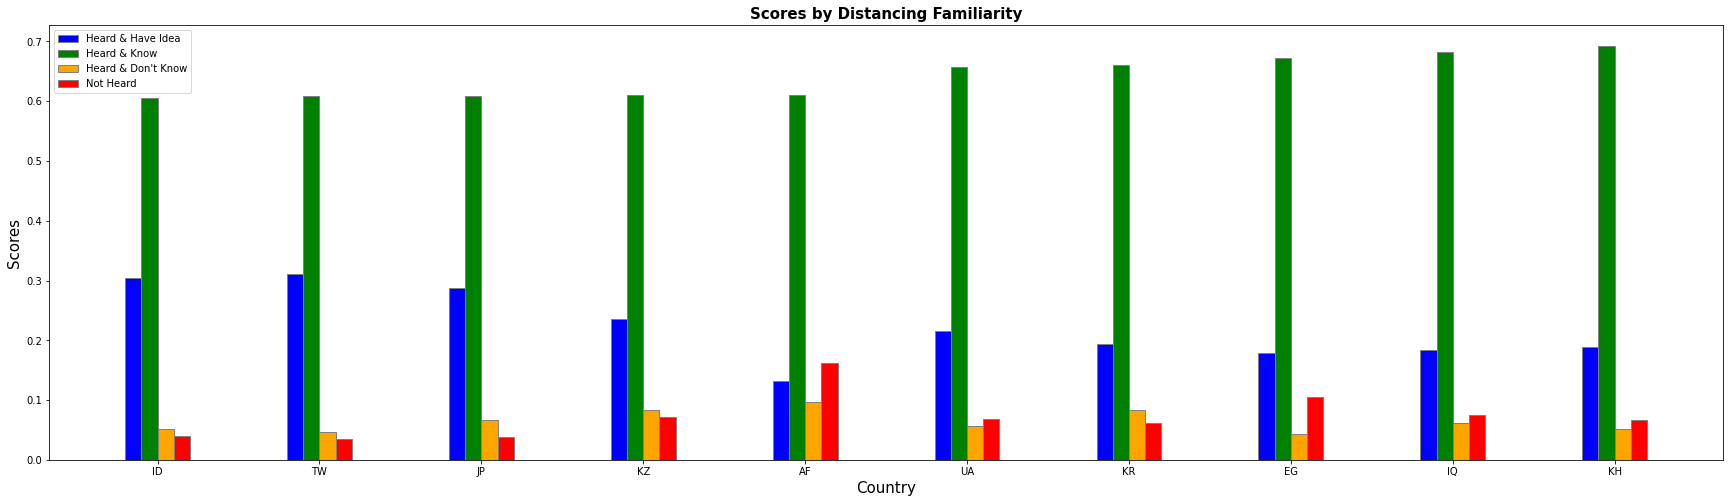

In [ ]:
labels = distancing_familiarity["country"].array
distancing_familiarity_I_have_heard_of_it_and_have_some_idea_of_what_it_means = distancing_familiarity['distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means'].array
distancing_familiarity_I_have_heard_of_it_and_know_what_it_means = distancing_familiarity['distancing_familiarity_I-have-heard-of-it-and-know-what-it-means'].array
distancing_familiarity_I_have_heard_of_it_but_do_not_know_what_it_means = distancing_familiarity['distancing_familiarity_I-have-heard-of-it-but-do-not-know-what-it-means'].array
distancing_familiarity_I_have_not_heard_of_it  = distancing_familiarity['distancing_familiarity_I-have-not-heard-of-it'].array

# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(30, 8))

# Set position of bar on X axis
br1 = np.arange(len(labels))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]


# Make the plot
plt.bar(br1, distancing_familiarity_I_have_heard_of_it_and_have_some_idea_of_what_it_means, color ='b', width = barWidth,
        edgecolor ='grey', label ='Heard & Have Idea')
plt.bar(br2, distancing_familiarity_I_have_heard_of_it_and_know_what_it_means, color ='g', width = barWidth,
        edgecolor ='grey', label ='Heard & Know')
plt.bar(br3, distancing_familiarity_I_have_heard_of_it_but_do_not_know_what_it_means, color ='orange', width = barWidth,
        edgecolor ='grey', label ="Heard & Don't Know")
plt.bar(br4, distancing_familiarity_I_have_not_heard_of_it, color ='r', width = barWidth,
        edgecolor ='grey', label ="Not Heard")

# Adding Xticks
plt.title("Scores by Distancing Familiarity", fontweight ='bold', fontsize = 15)
plt.xlabel("Country", fontsize = 15)
plt.ylabel("Scores", fontsize = 15)
plt.xticks([r + 0.15 for r in range(len(labels))],
           labels)

plt.legend()
plt.show()

### Effect Mask

In [ ]:
effect_mask_title = column_title_list[13:18]

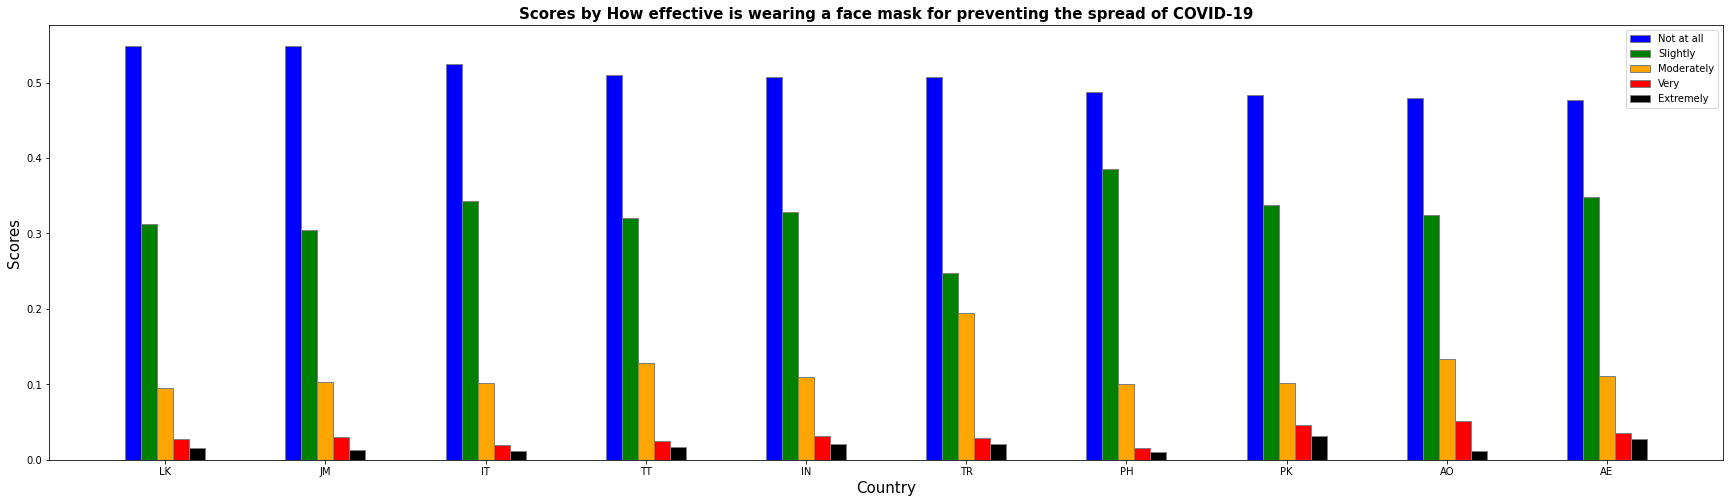

In [ ]:
effect_mask = df_mit[['country'] + effect_mask_title].sort_values(by=[effect_mask_title[0]], ascending=[False]).head(10)

labels = effect_mask["country"].array
effect_mask_Extremely_effective = effect_mask["effect_mask_Extremely-effective"].array
effect_mask_Very_effective = effect_mask["effect_mask_Very-effective"].array
effect_mask_Moderately_effective = effect_mask["effect_mask_Moderately-effective"].array
effect_mask_Slightly_effective  = effect_mask["effect_mask_Slightly-effective"].array
effect_mask_Not_effective_at_all = effect_mask["effect_mask_Not-effective-at-all"].array

# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(30, 8))

# Set position of bar on X axis
br1 = np.arange(len(labels))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plot
plt.bar(br1, effect_mask_Extremely_effective, color ='b', width = barWidth,
        edgecolor ='grey', label ='Not at all')
plt.bar(br2, effect_mask_Very_effective, color ='g', width = barWidth,
        edgecolor ='grey', label ='Slightly')
plt.bar(br3, effect_mask_Moderately_effective, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Moderately')
plt.bar(br4, effect_mask_Slightly_effective, color ='r', width = barWidth,
        edgecolor ='grey', label ="Very")
plt.bar(br5, effect_mask_Not_effective_at_all, color ='black', width = barWidth,
        edgecolor ='grey', label ="Extremely")

# Adding Xticks
plt.title("Scores by How effective is wearing a face mask for preventing the spread of COVID-19", fontweight ='bold', fontsize = 15)
plt.xlabel("Country", fontsize = 15)
plt.ylabel("Scores", fontsize = 15)
plt.xticks([r + barWidth*2 for r in range(len(labels))],
           labels)

plt.legend()
plt.show()

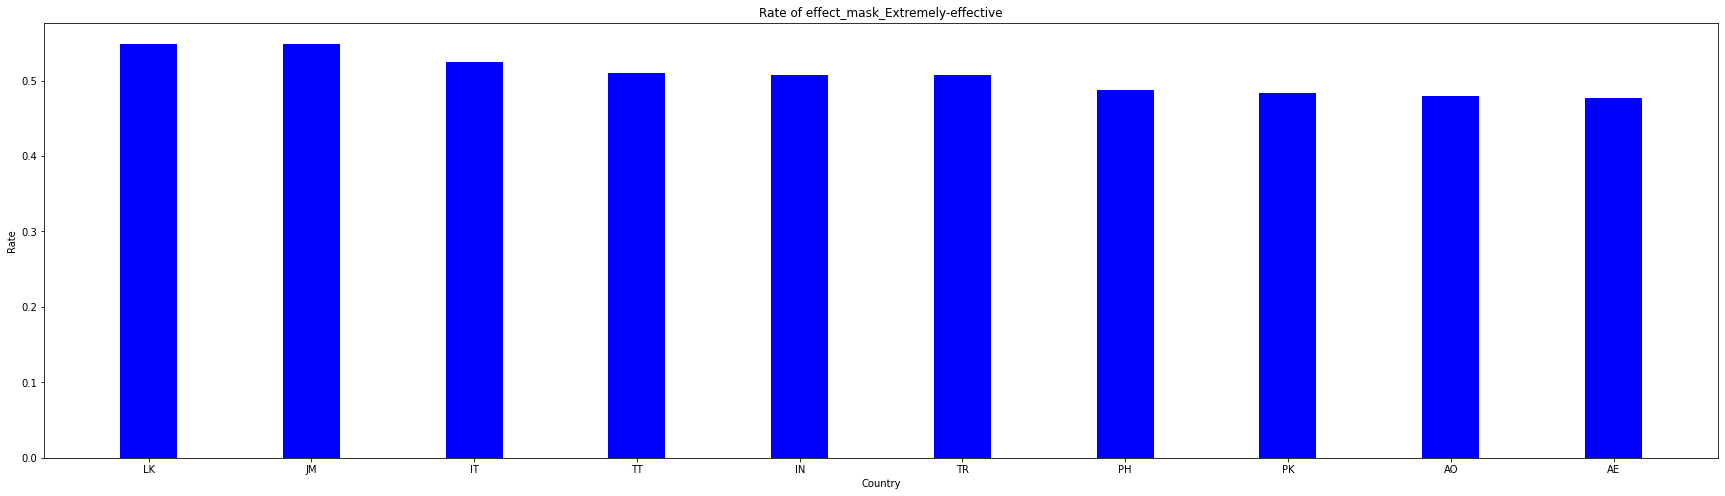

In [ ]:
just_bar(effect_mask, effect_mask_title[0], effect_mask_title[0])

### Restaurants

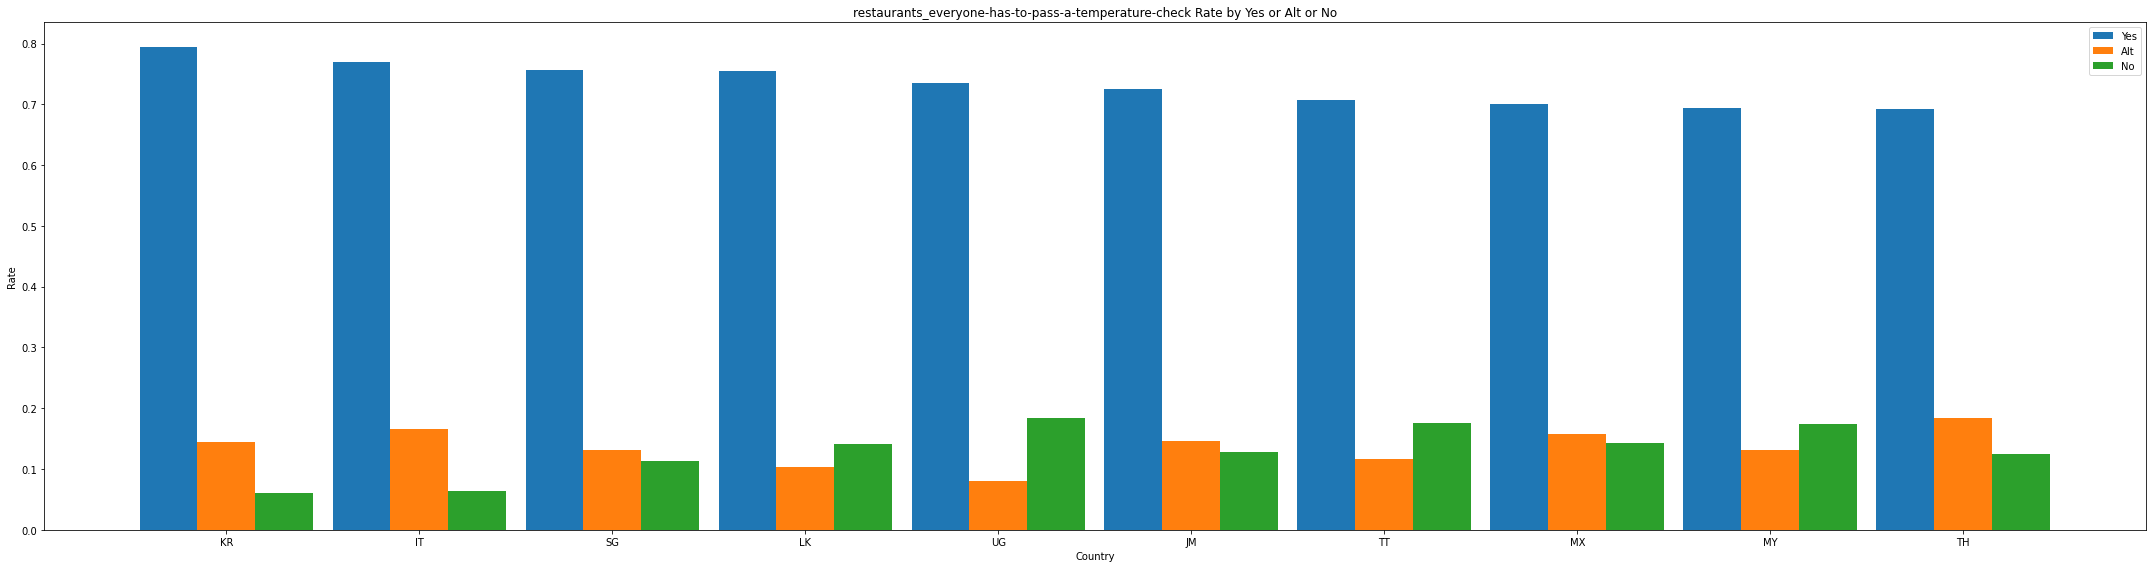

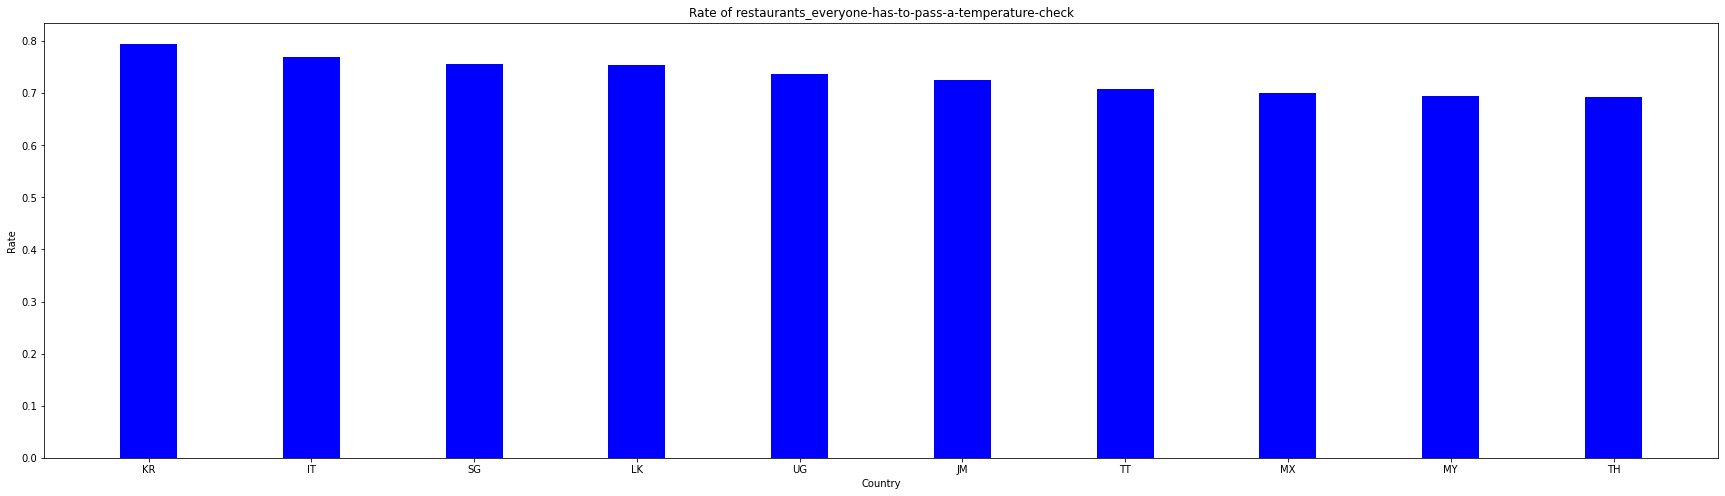

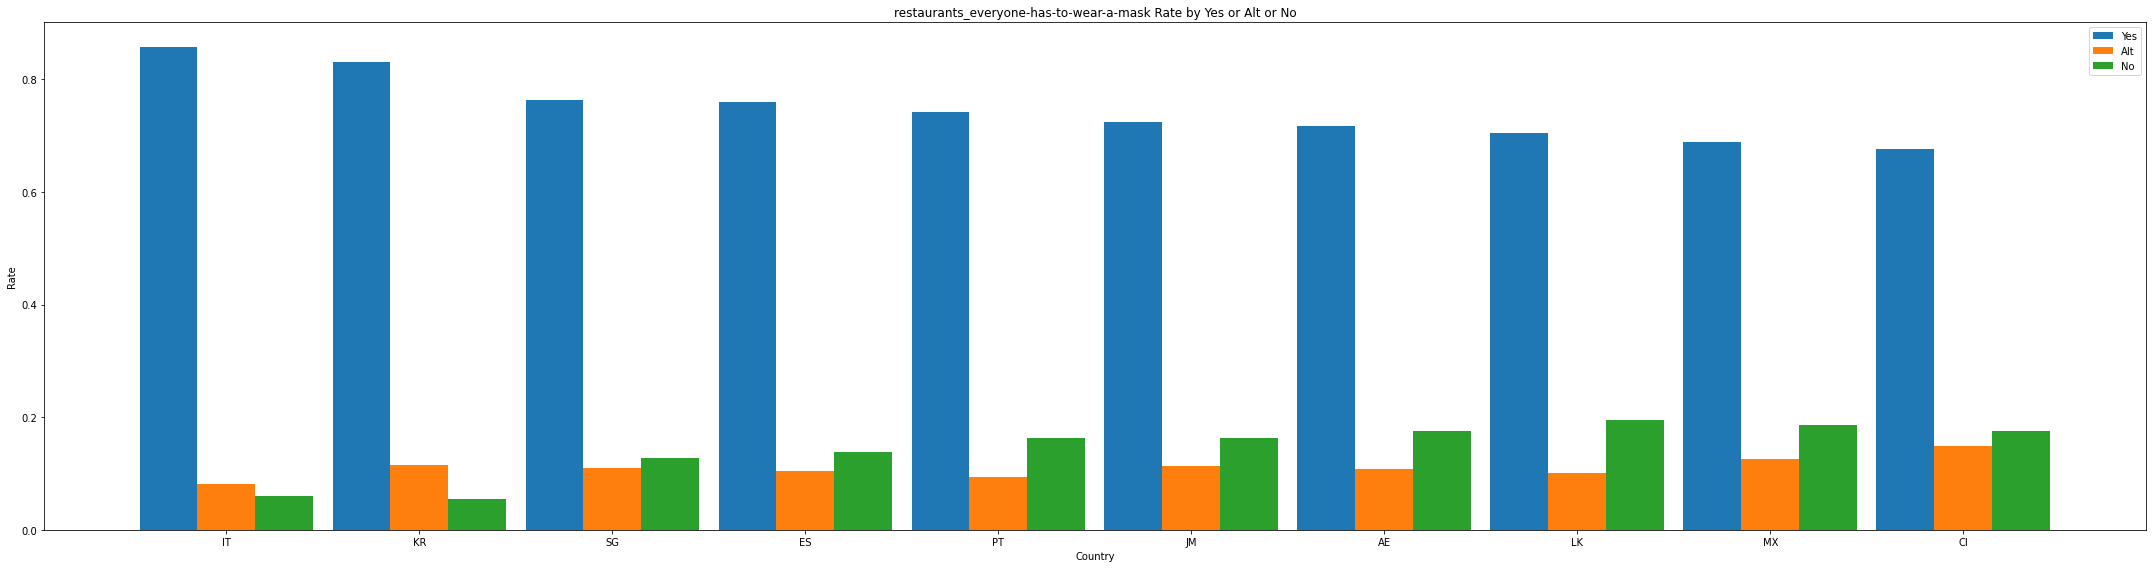

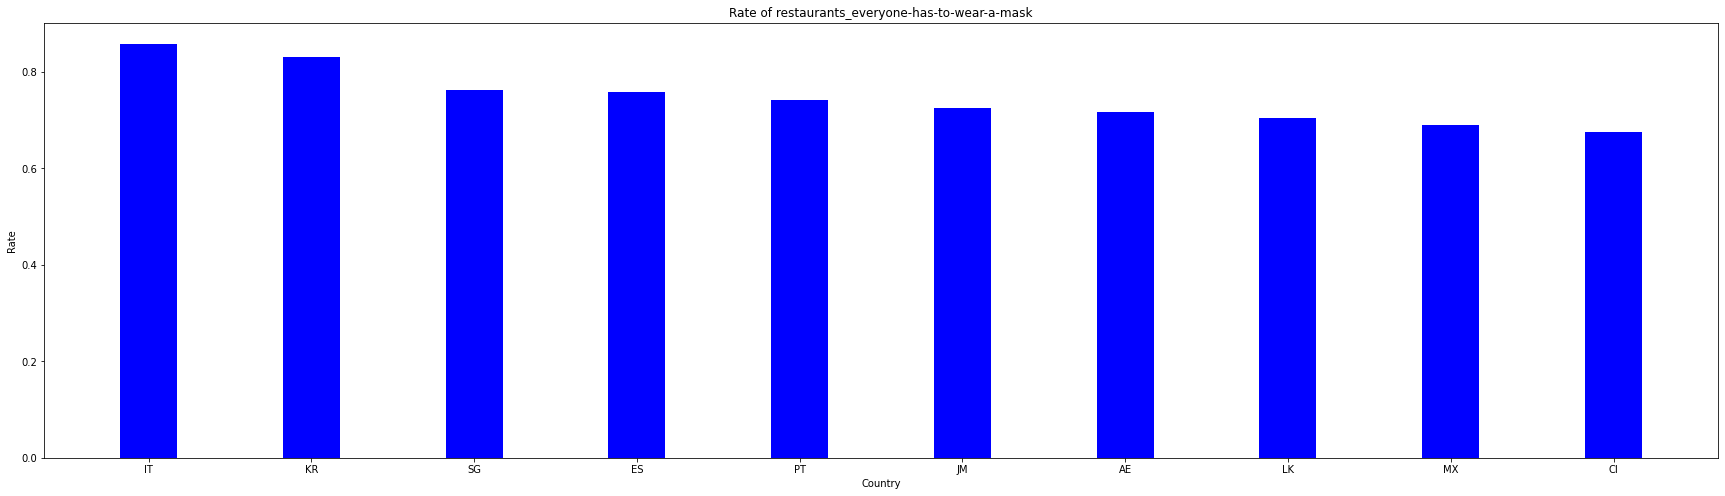

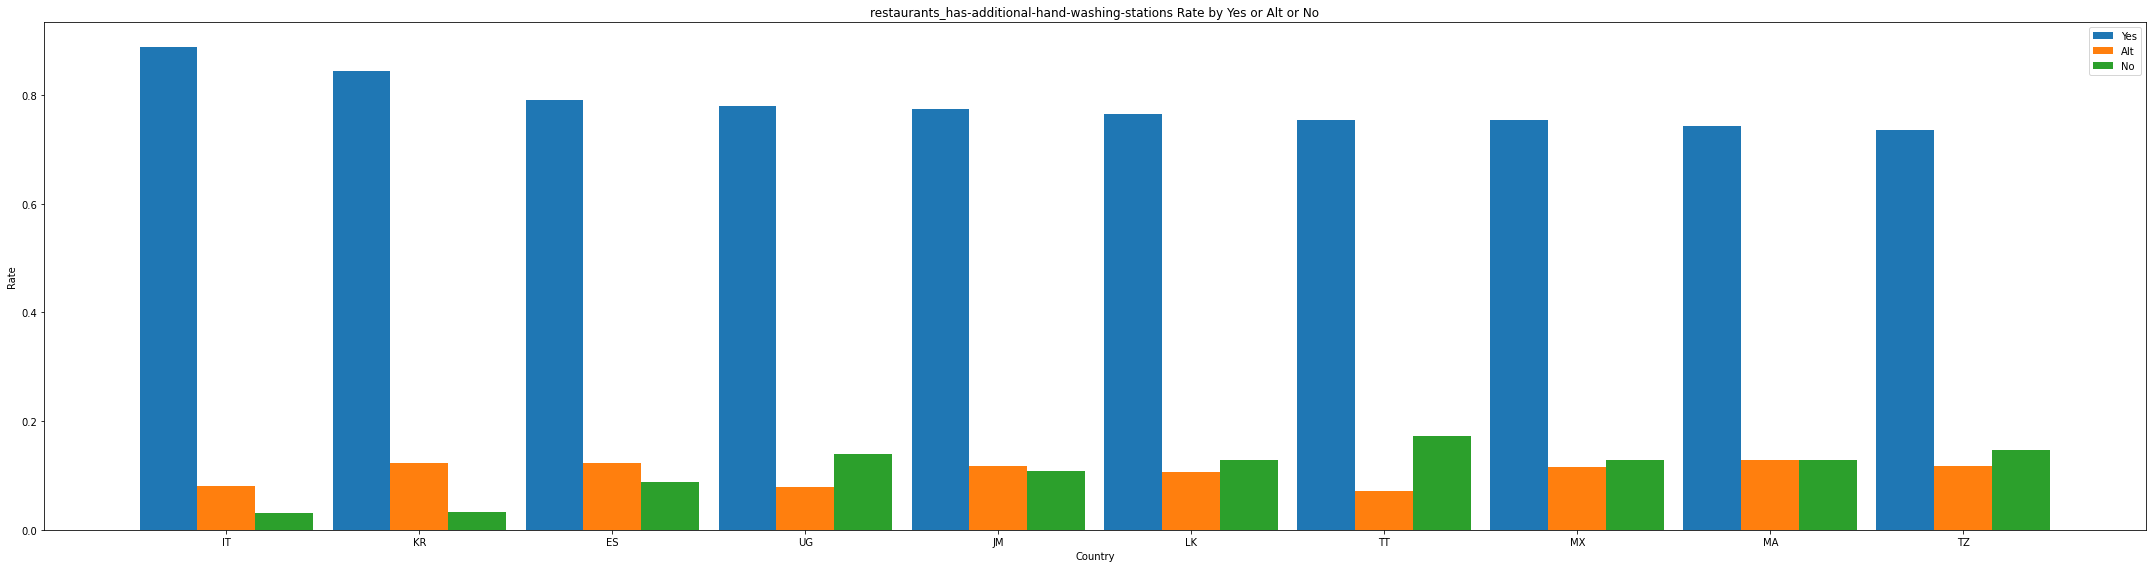

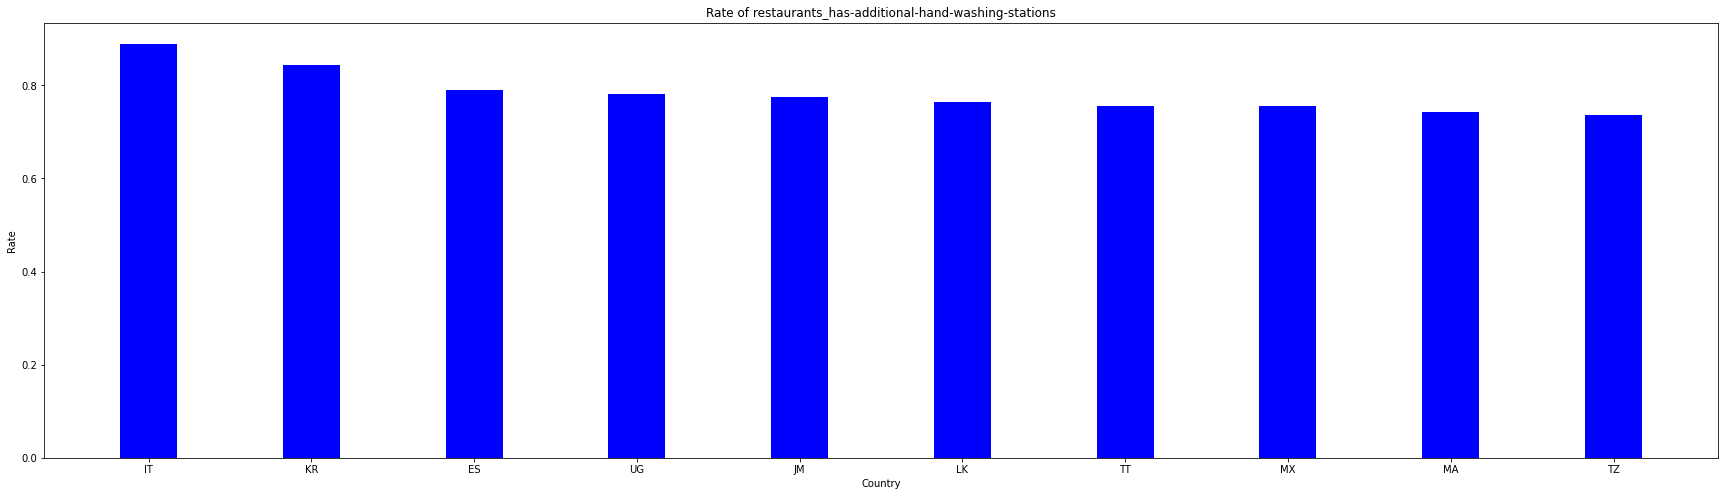

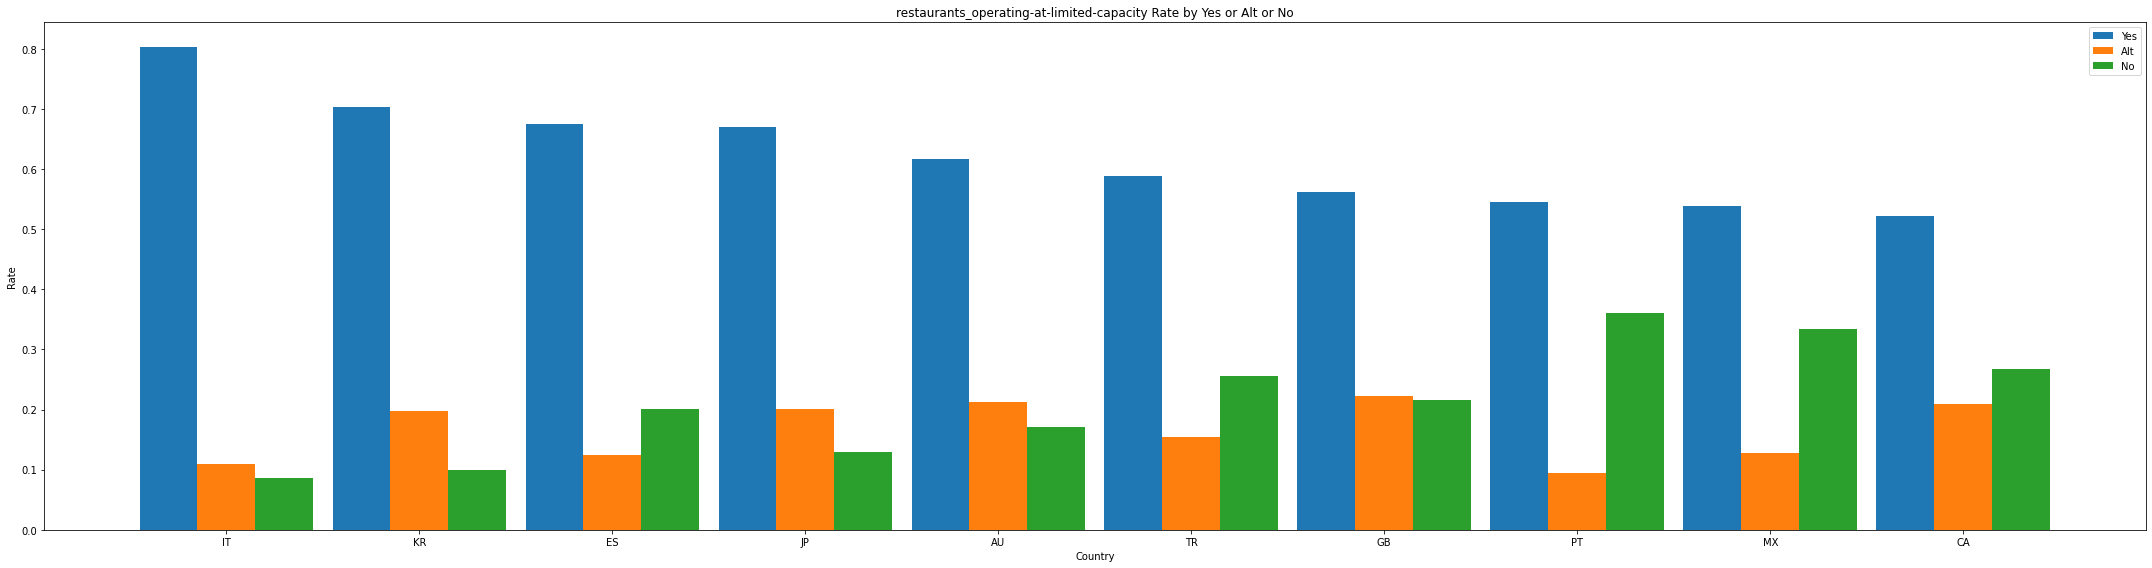

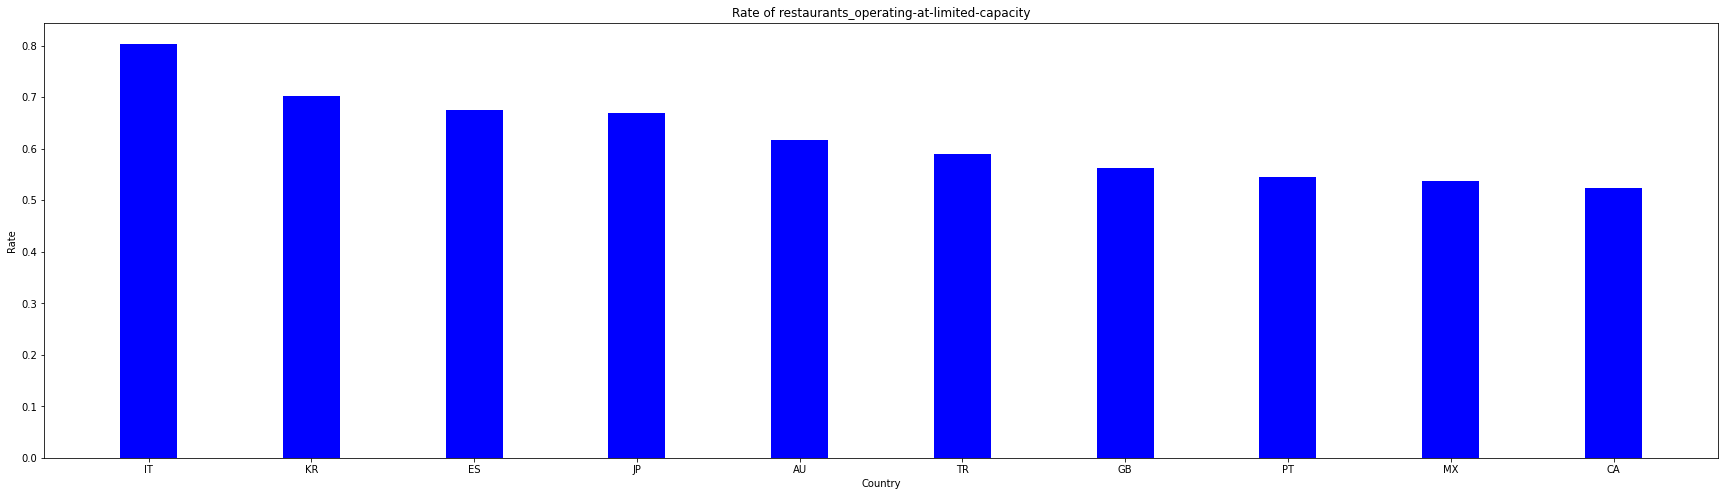

In [ ]:
restaurants = column_title_list[23:35]

for i in range(0, len(restaurants), 3):
  df_temp = df_mit[["country", restaurants[i], restaurants[i+1], restaurants[i+2]]].sort_values(by=restaurants[i+2], ascending=[False]).head(10)
  grouped_bar_alt(df_temp, restaurants[i+1], restaurants[i+2], restaurants[i], restaurants[i][:-26])
  just_bar(df_temp, restaurants[i+2], restaurants[i][:-26])

### Retail

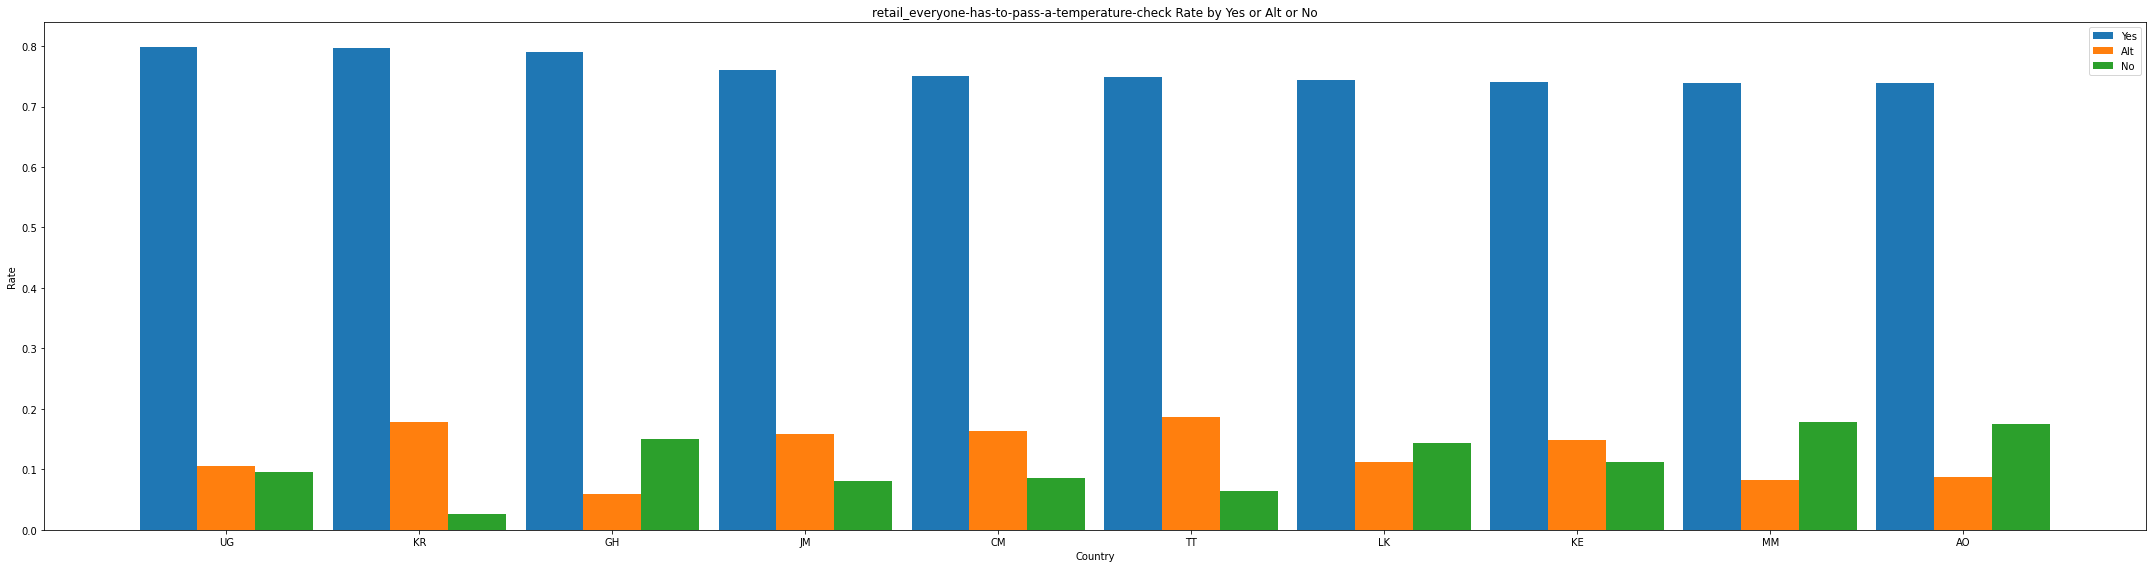

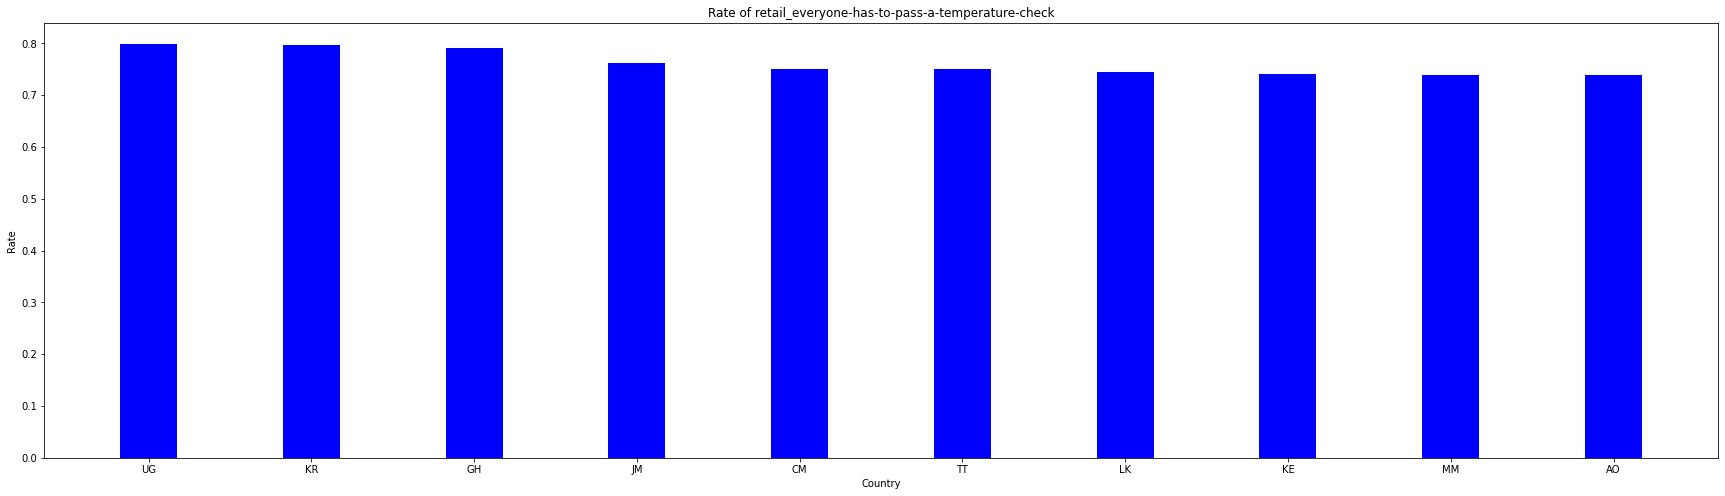

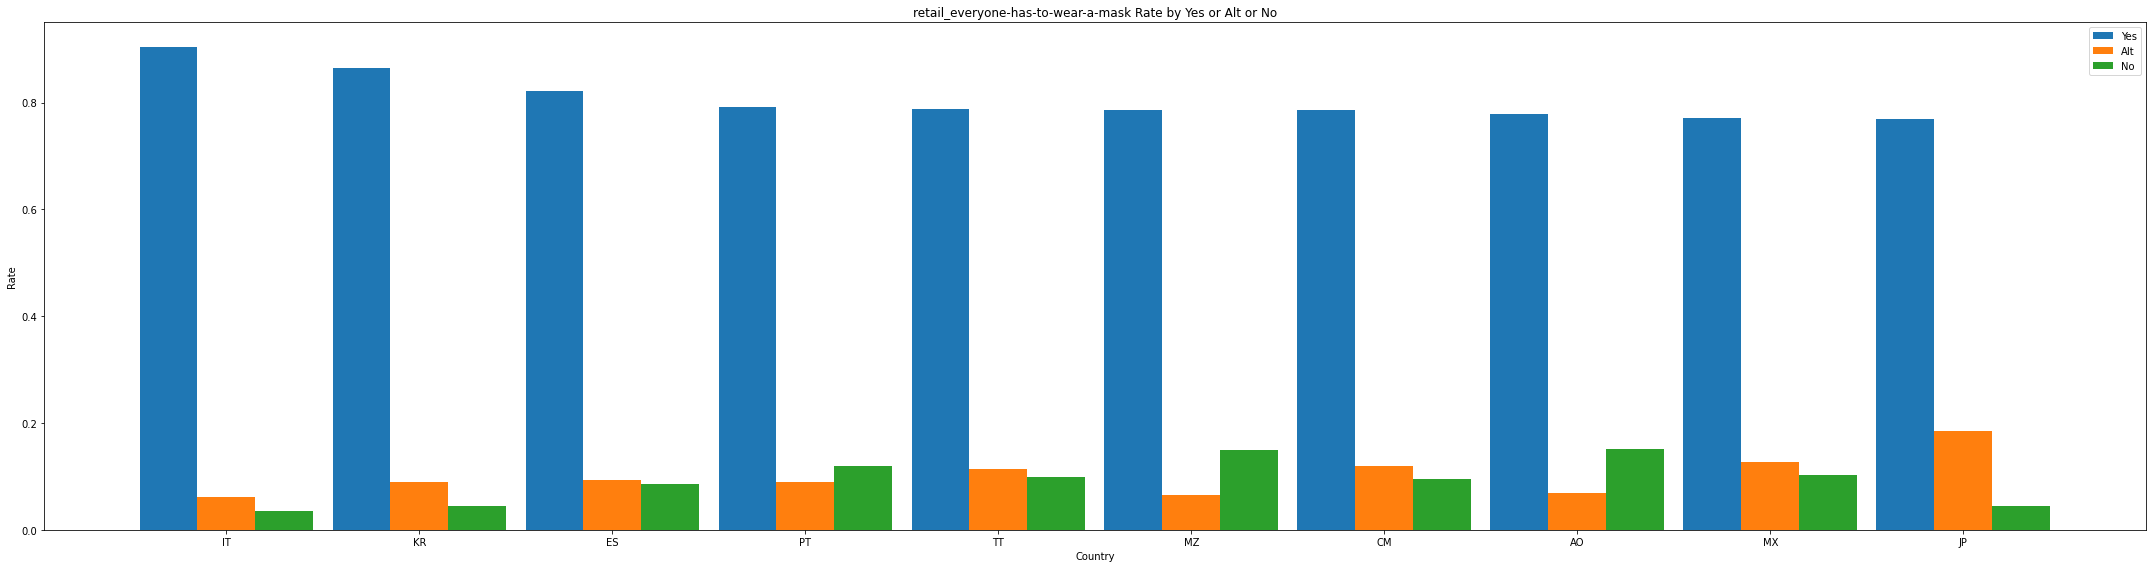

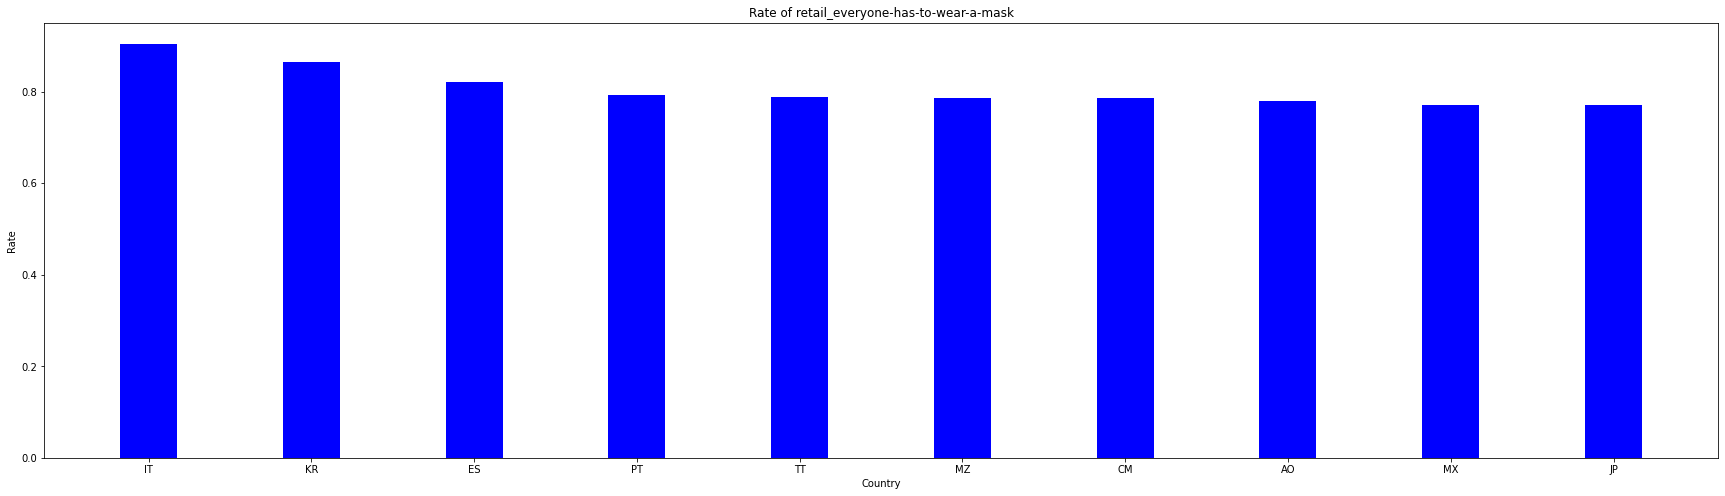

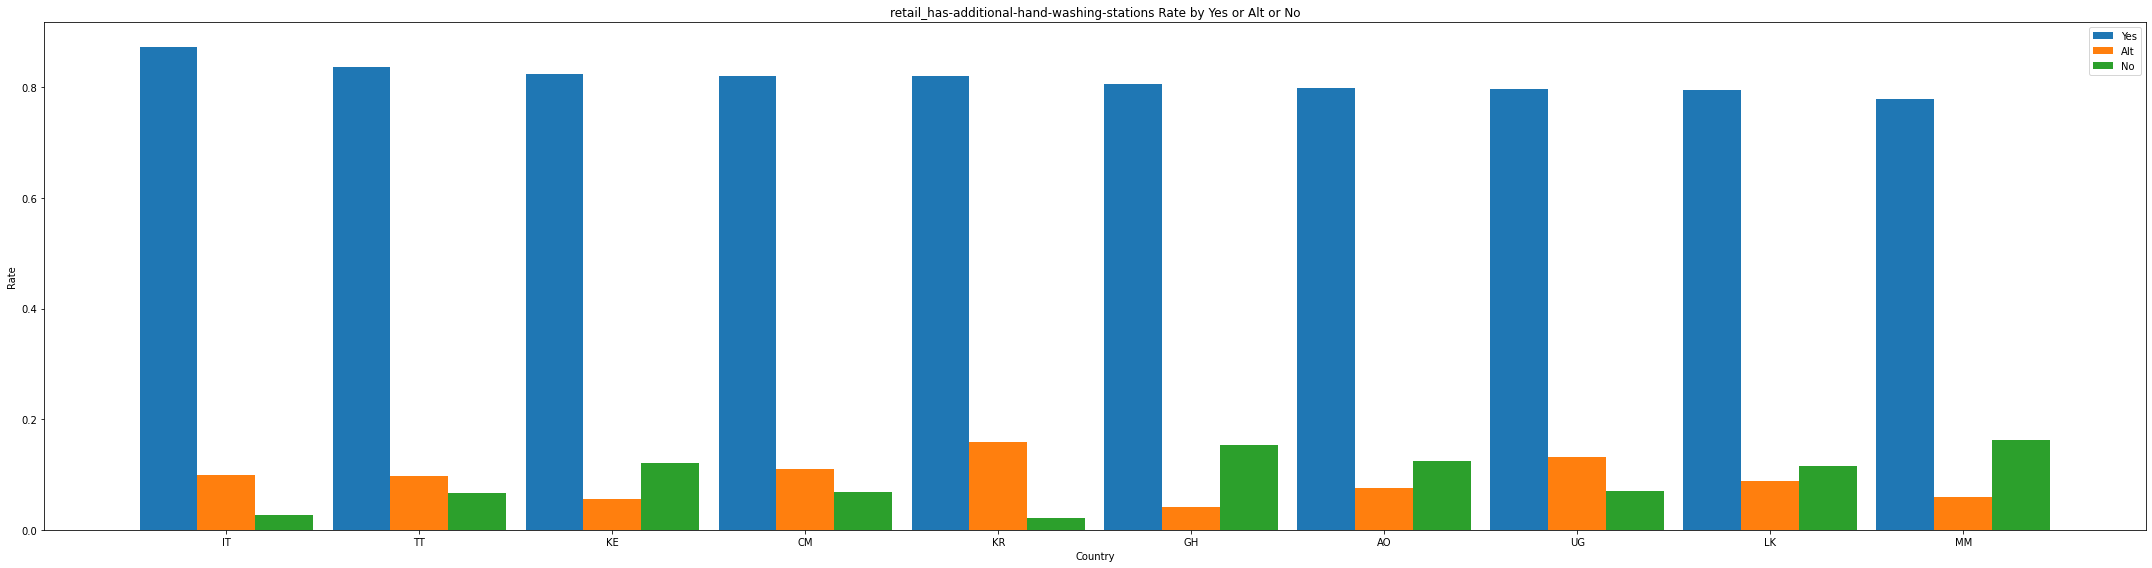

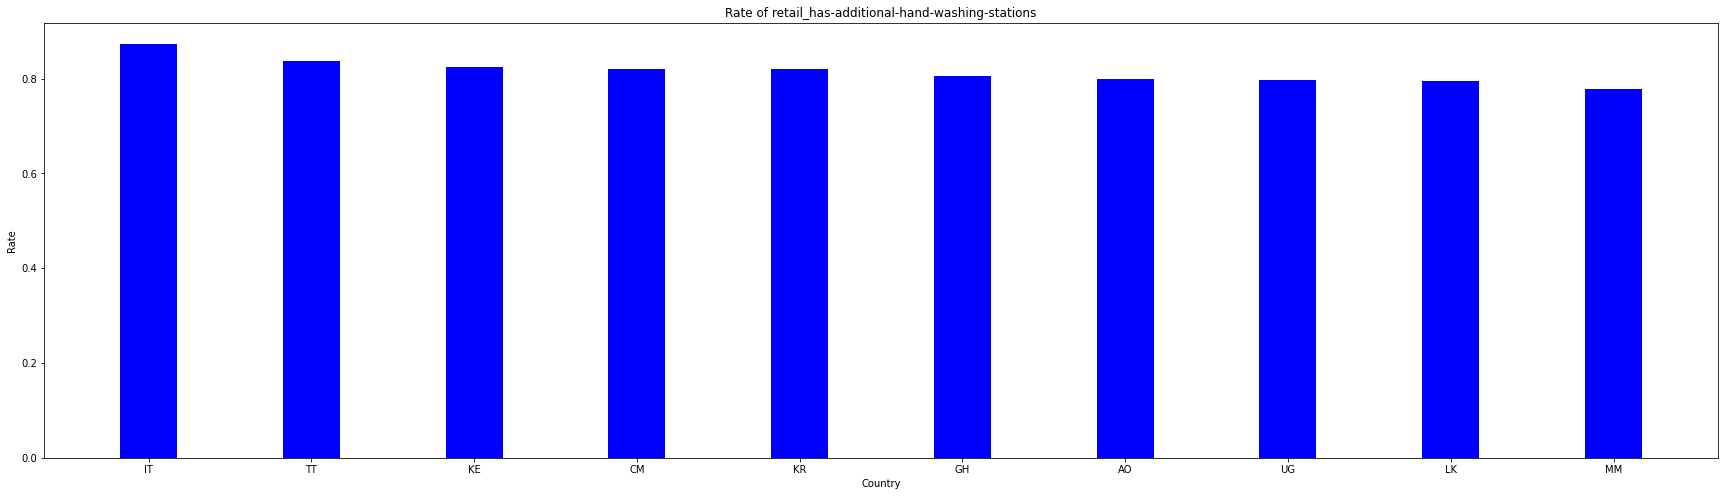

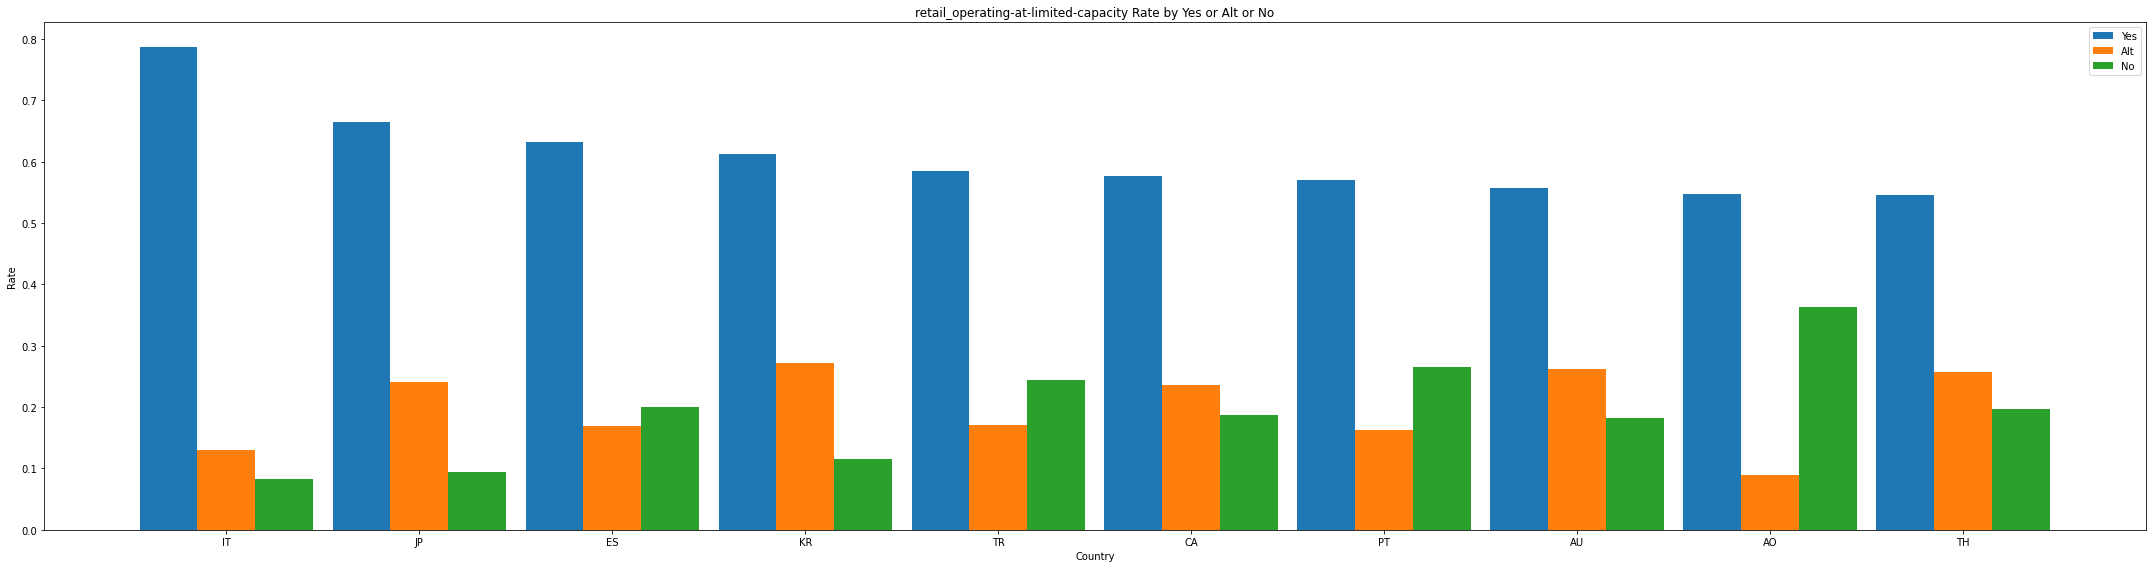

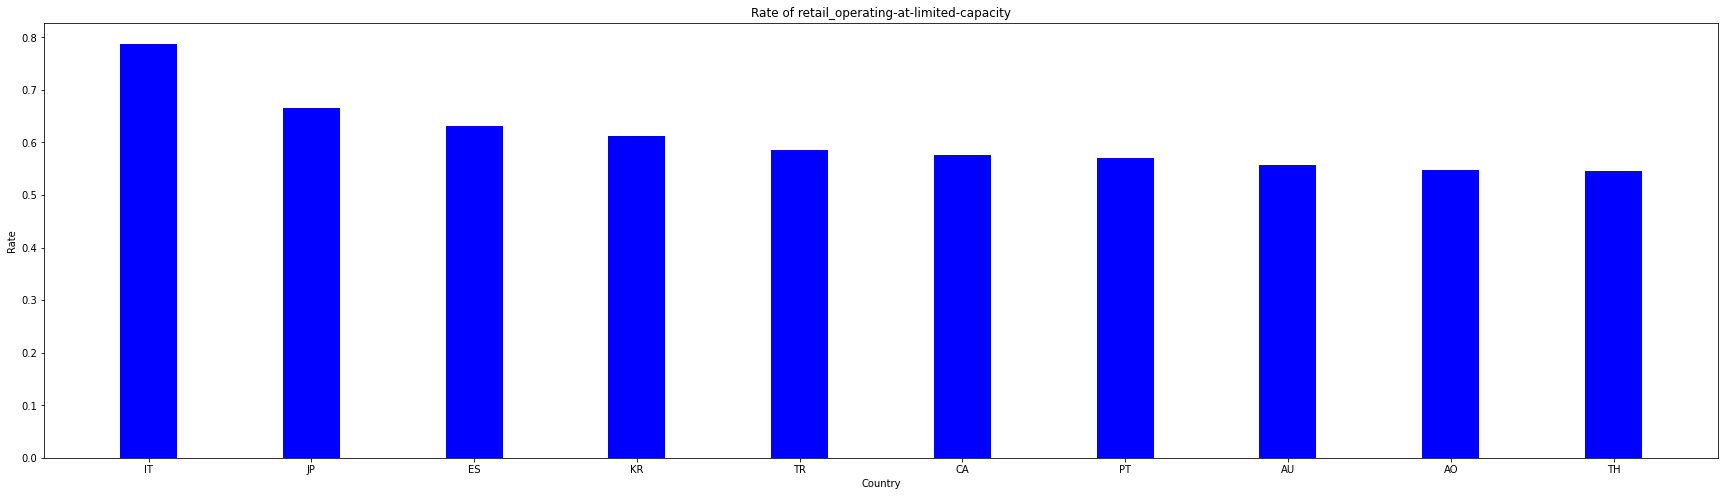

In [ ]:
retail = column_title_list[35:47]

for i in range(0, len(retail), 3):
  df_temp = df_mit[["country", retail[i], retail[i+1], retail[i+2]]].sort_values(by=retail[i+2], ascending=[False]).head(10)
  grouped_bar_alt(df_temp, retail[i+1], retail[i+2], retail[i], retail[i][:-26])
  just_bar(df_temp, retail[i+2], retail[i][:-26])

### Health

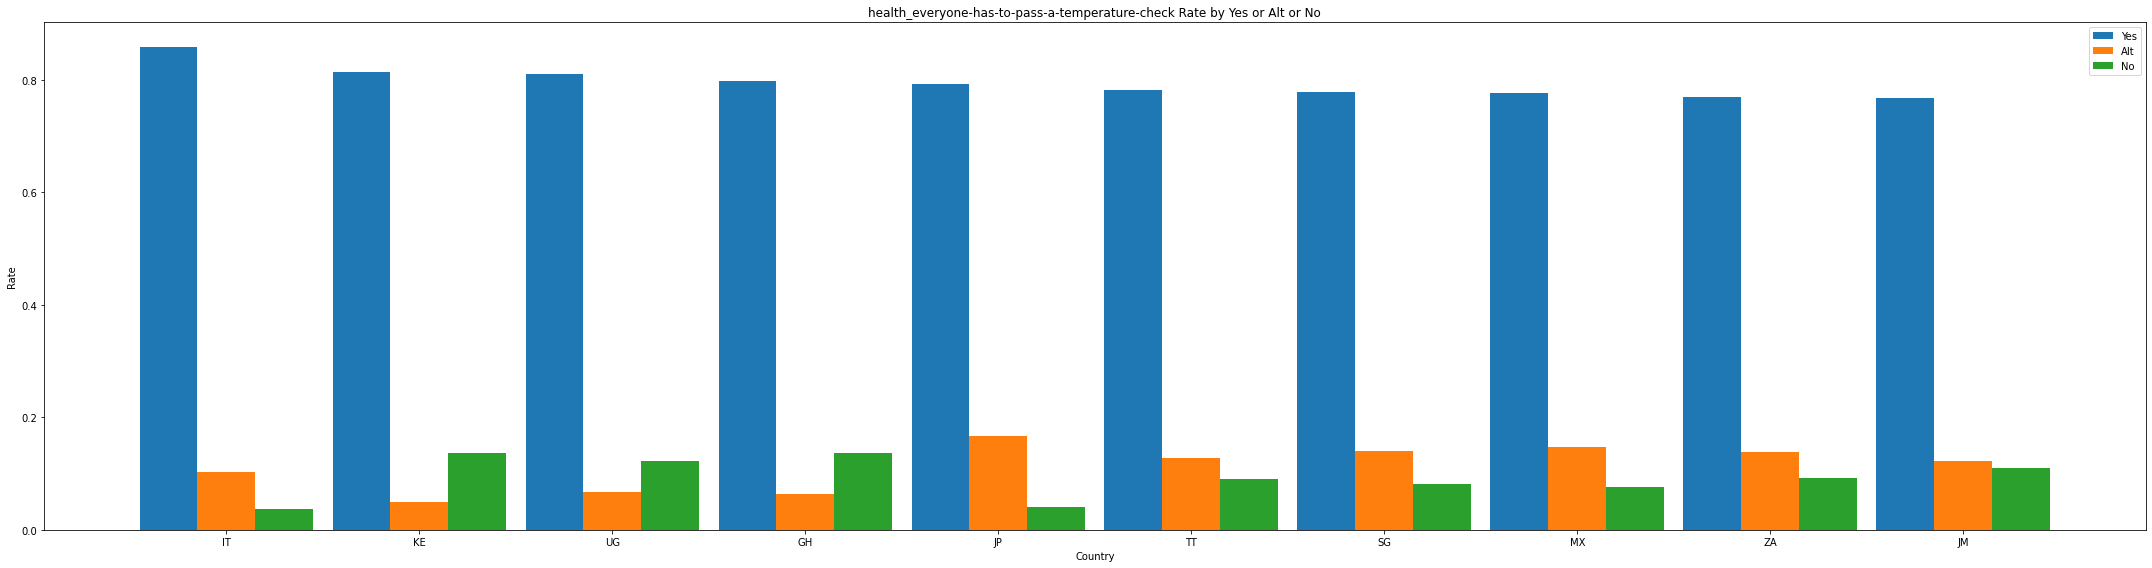

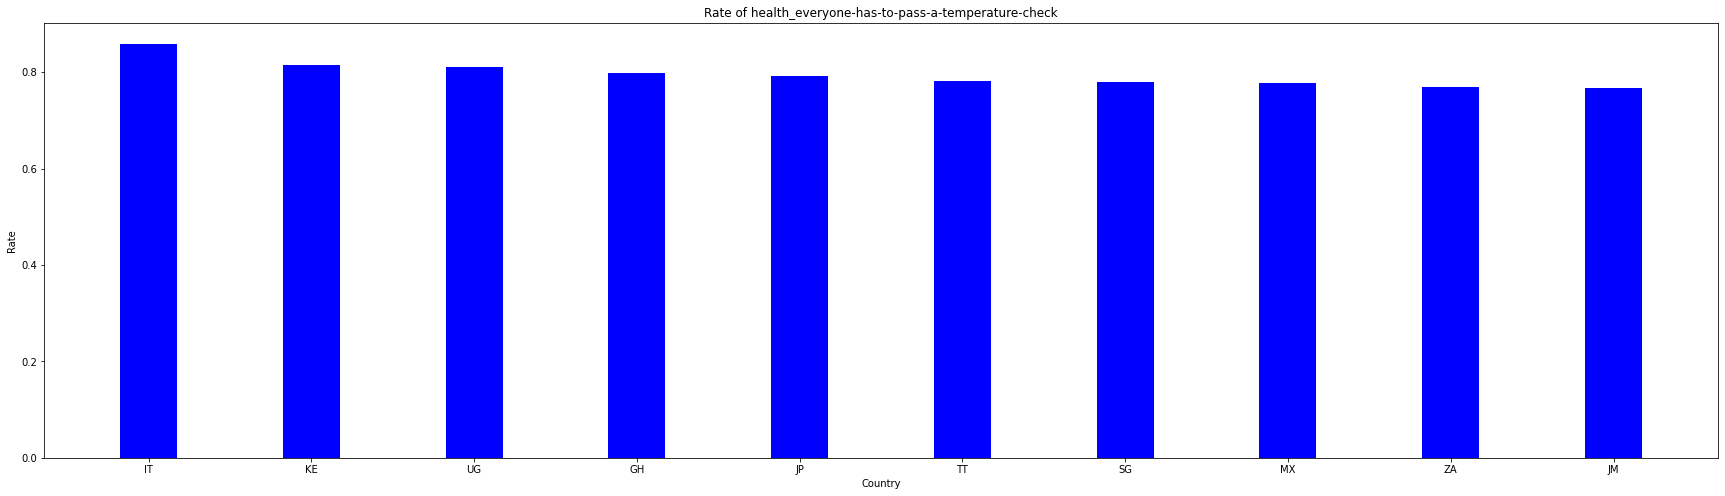

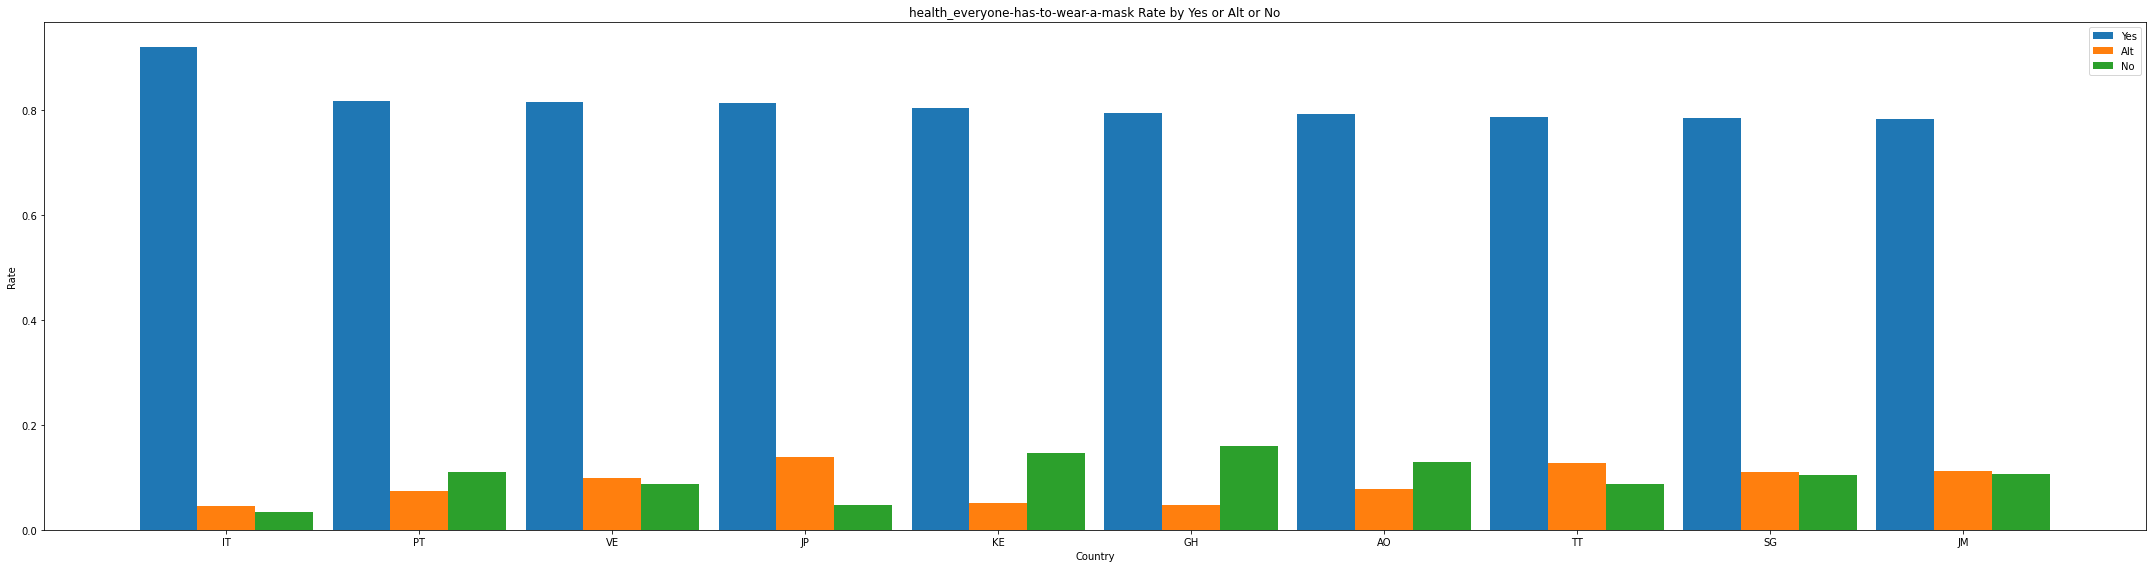

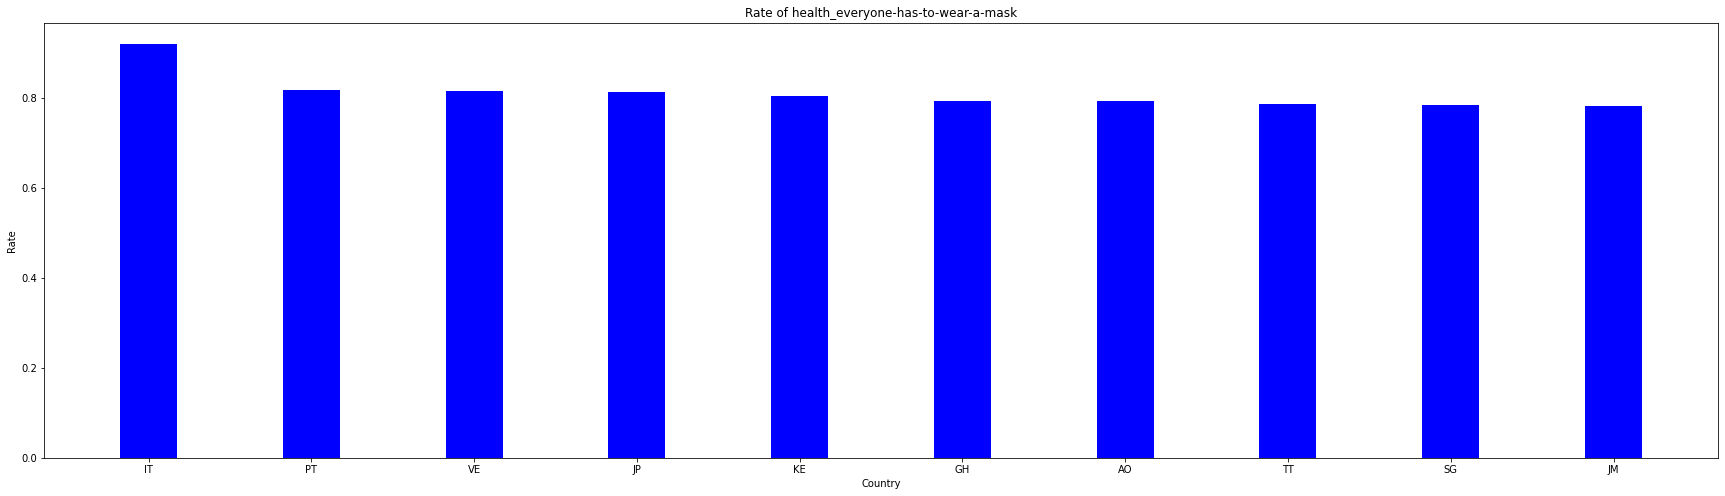

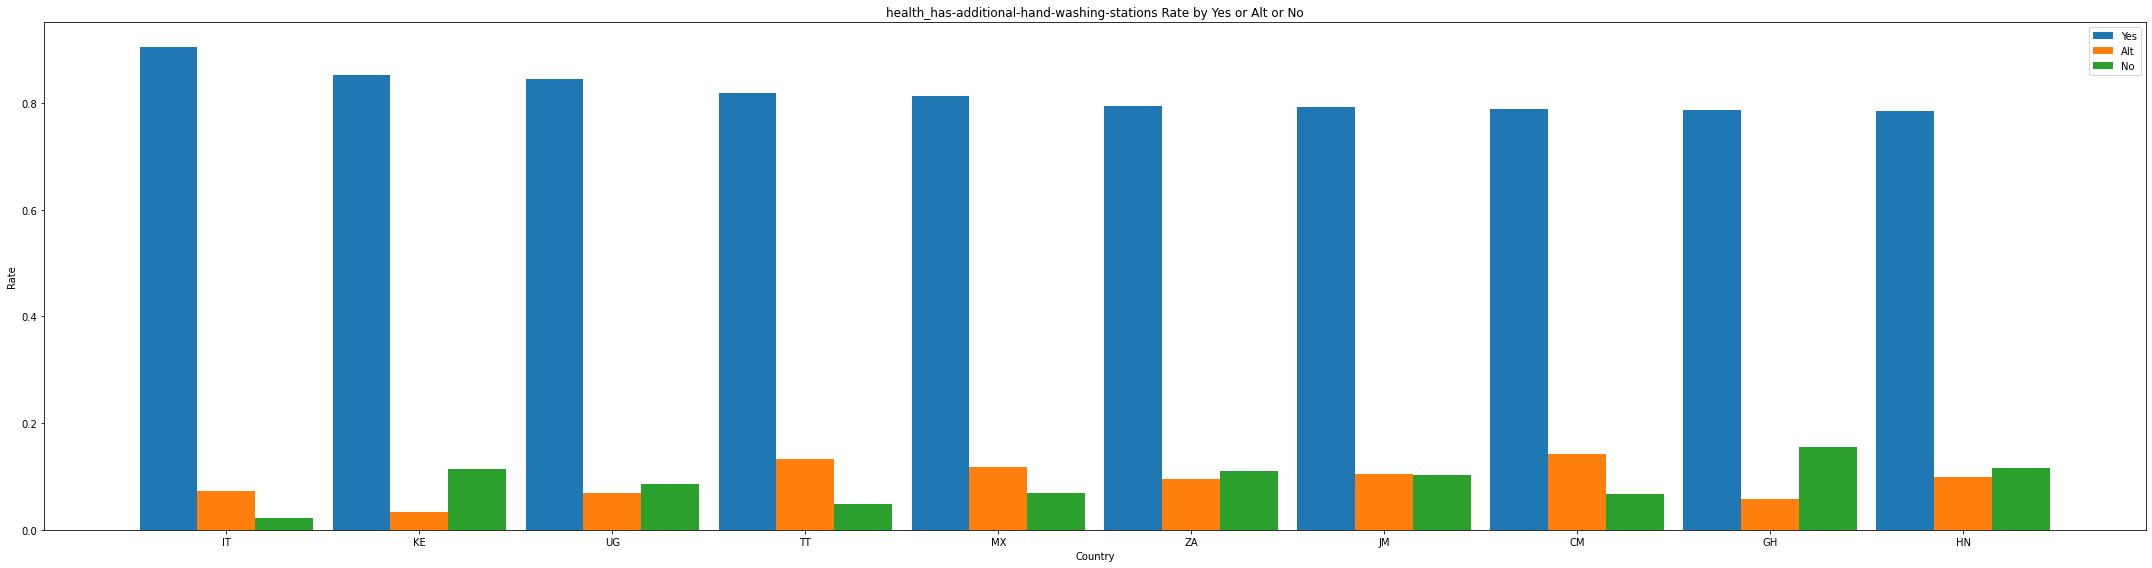

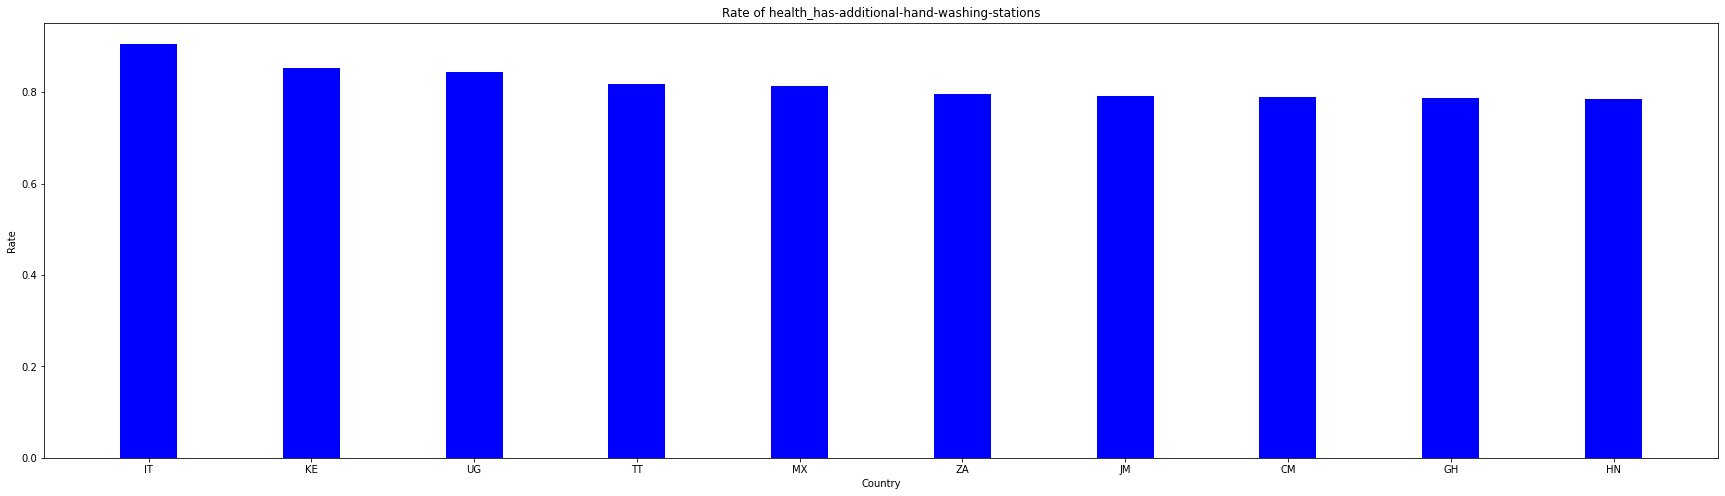

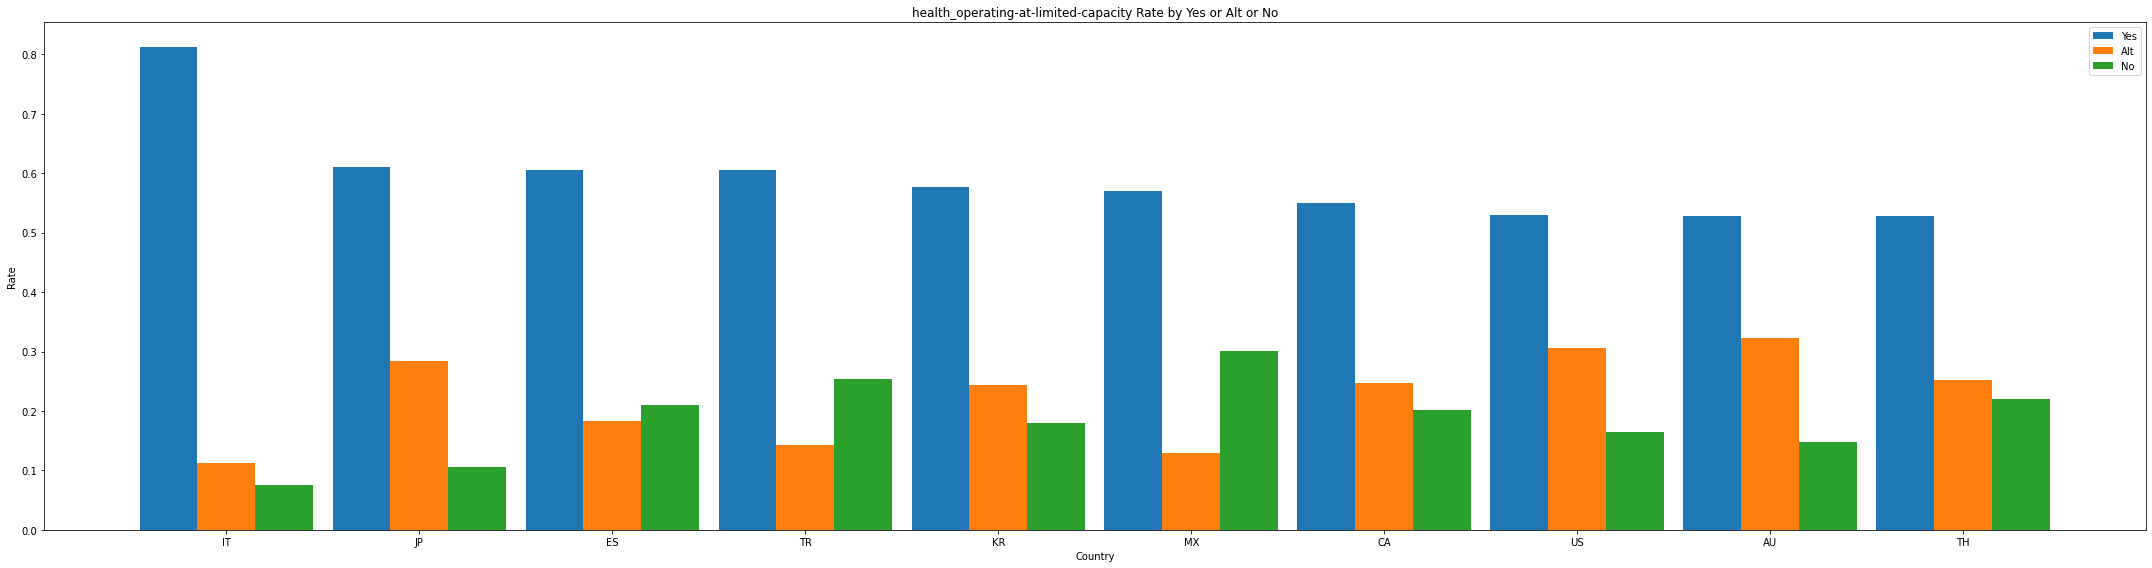

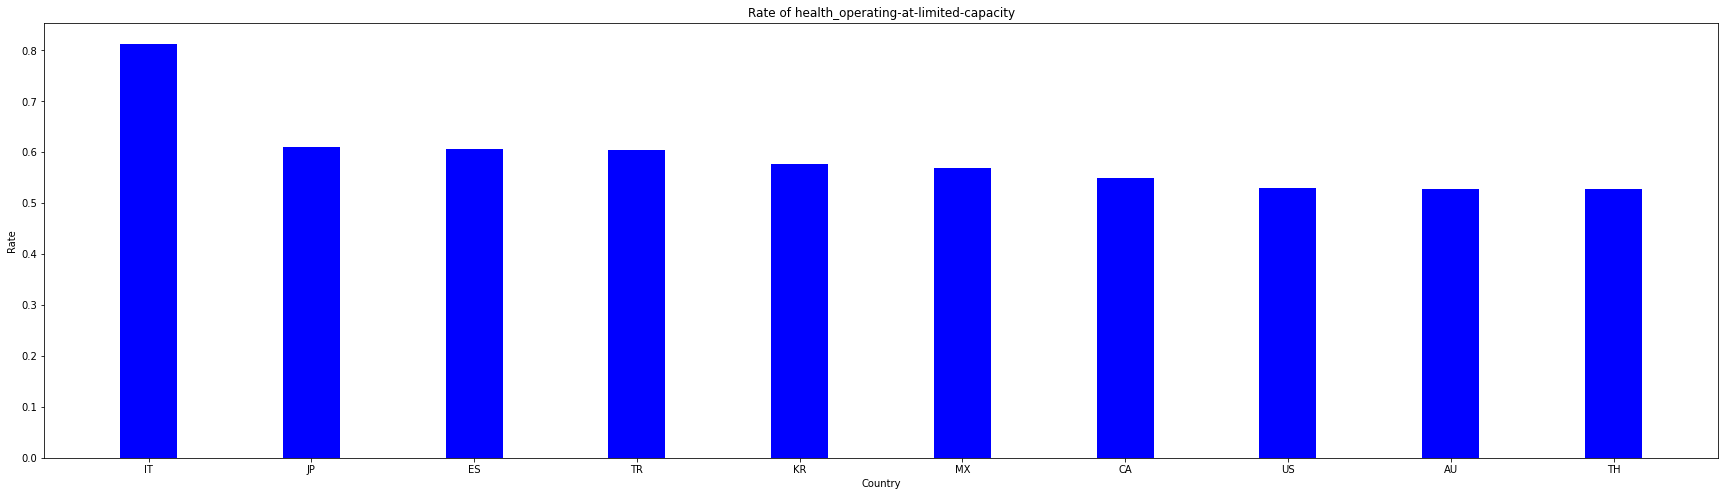

In [ ]:
health = column_title_list[47:59]

for i in range(0, len(health), 3):
  df_temp = df_mit[["country", health[i], health[i+1], health[i+2]]].sort_values(by=health[i+2], ascending=[False]).head(10)
  grouped_bar_alt(df_temp, health[i+1], health[i+2], health[i], health[i][:-26])
  just_bar(df_temp, health[i+2], health[i][:-26])

### Worship

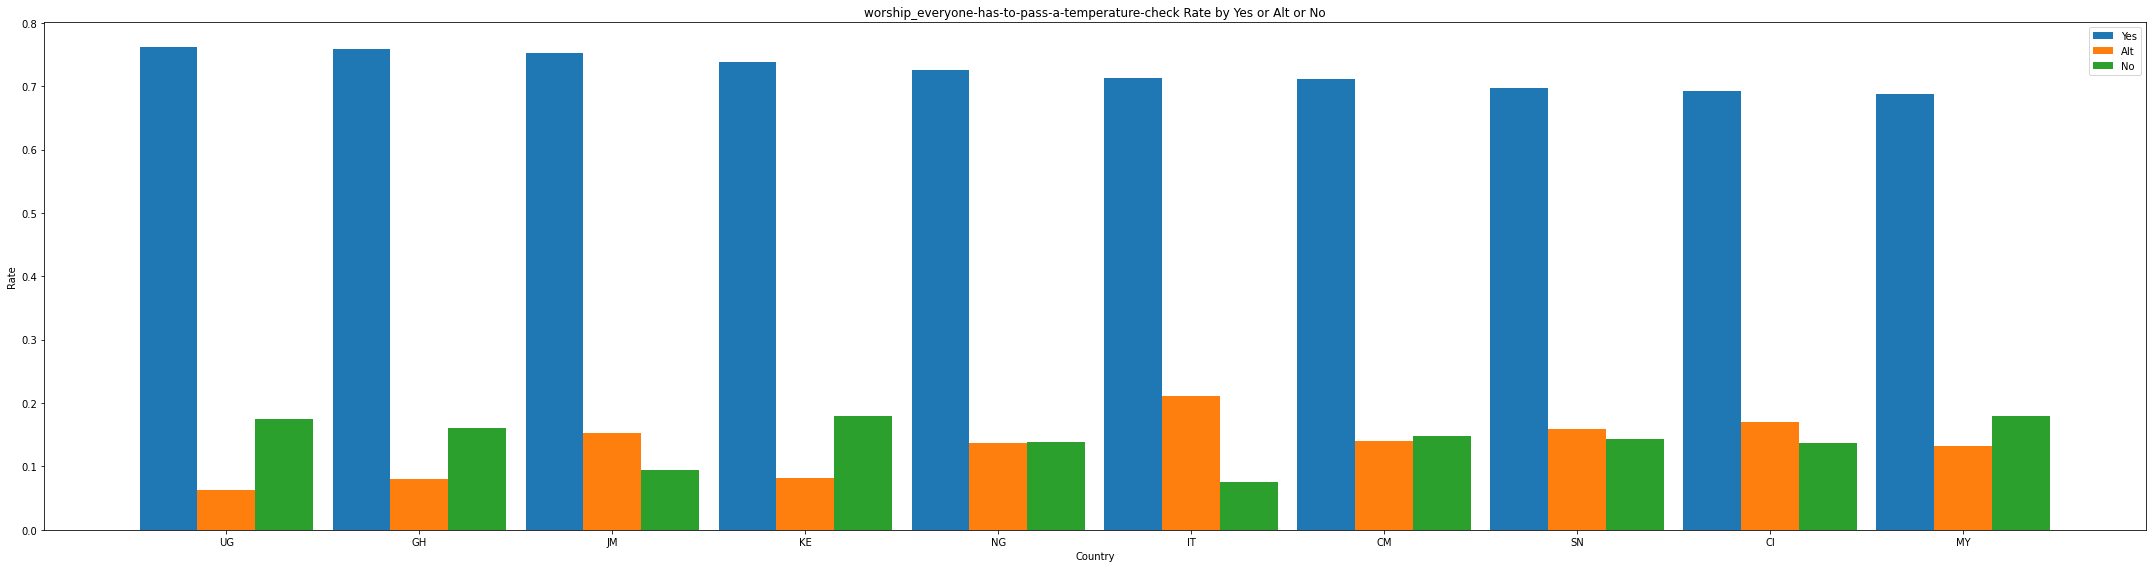

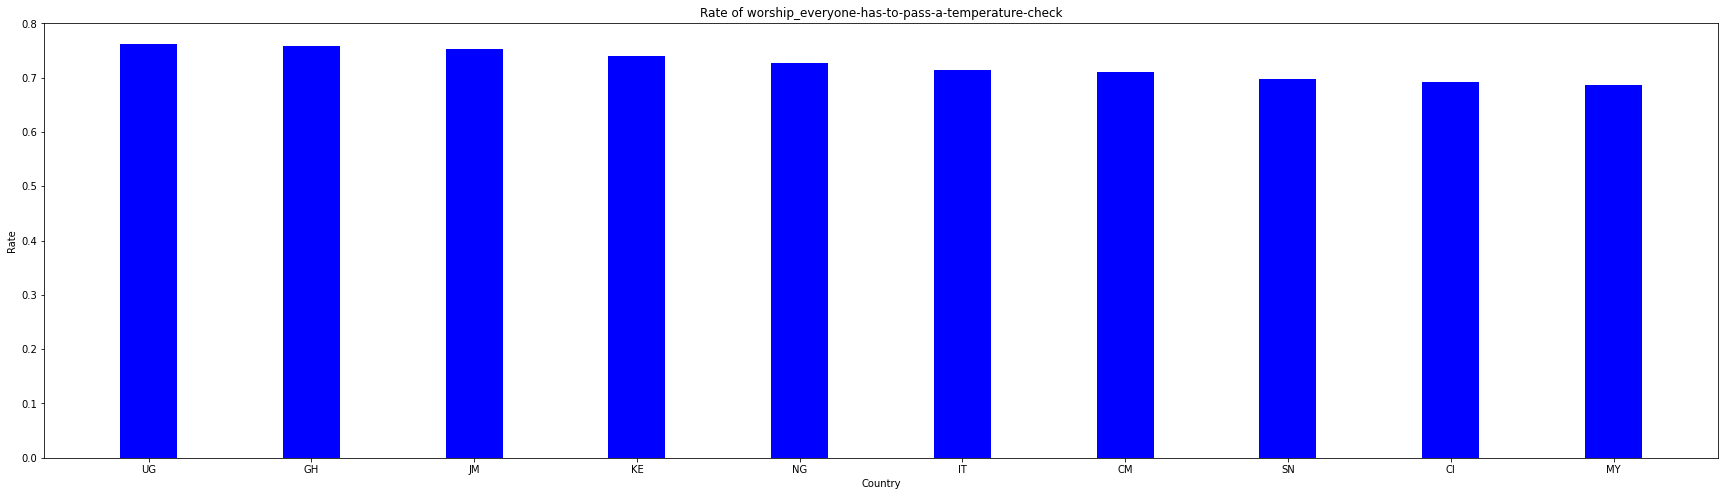

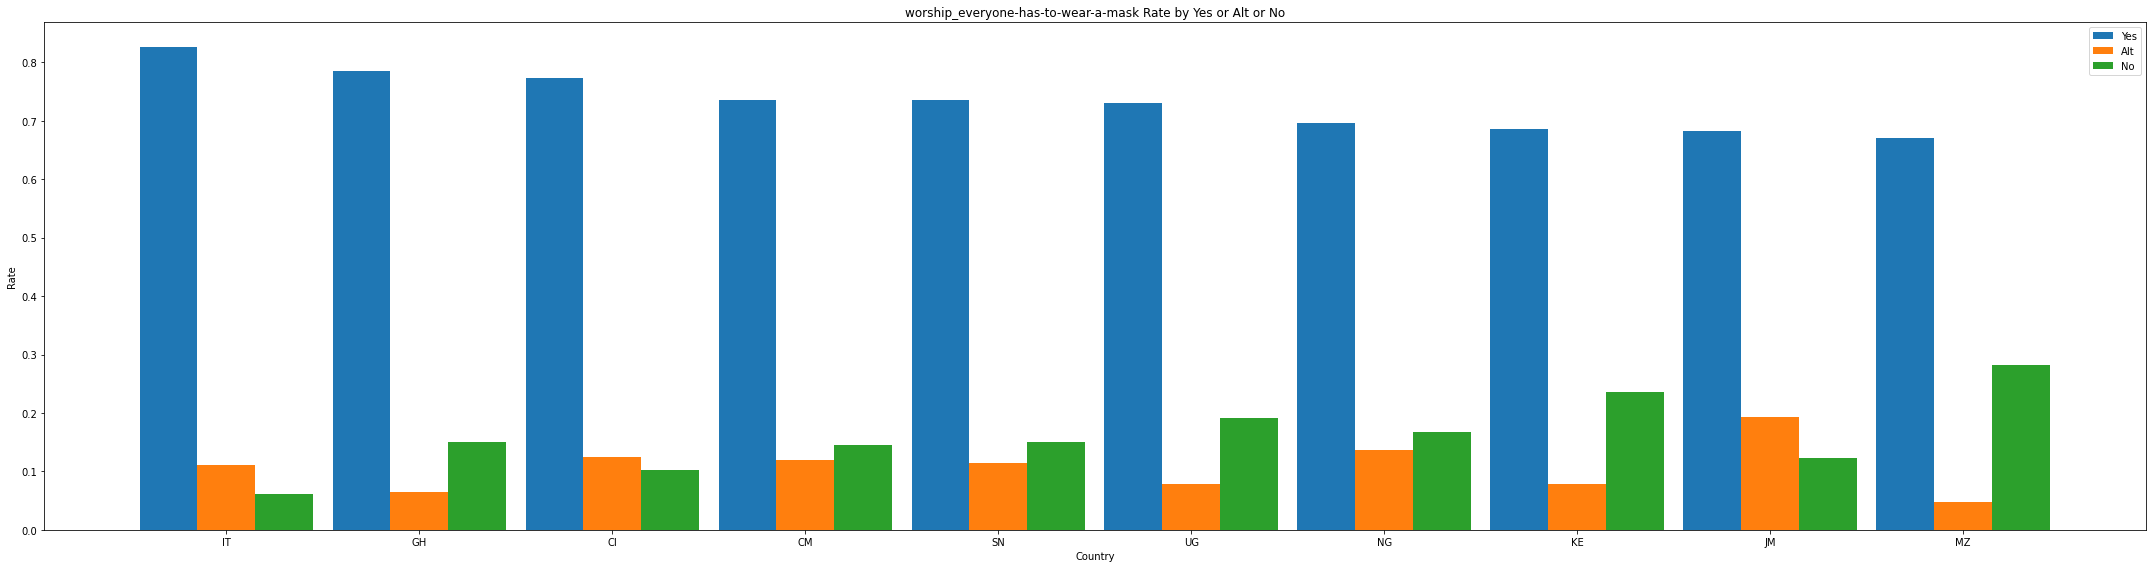

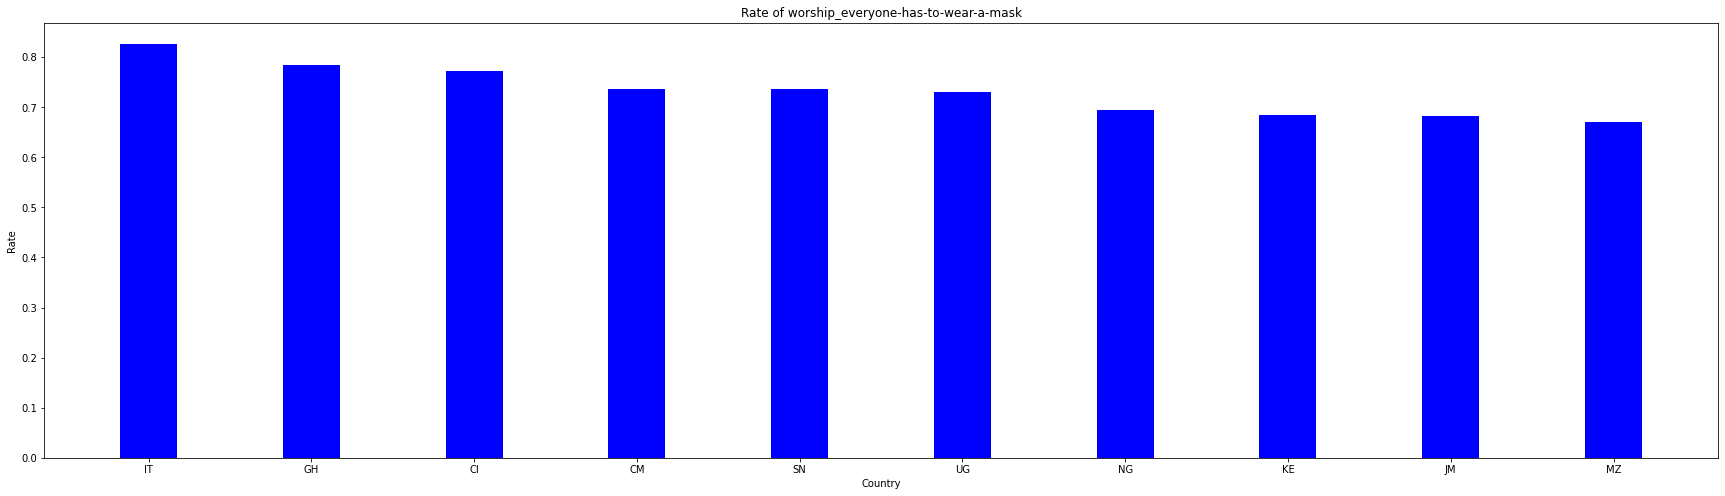

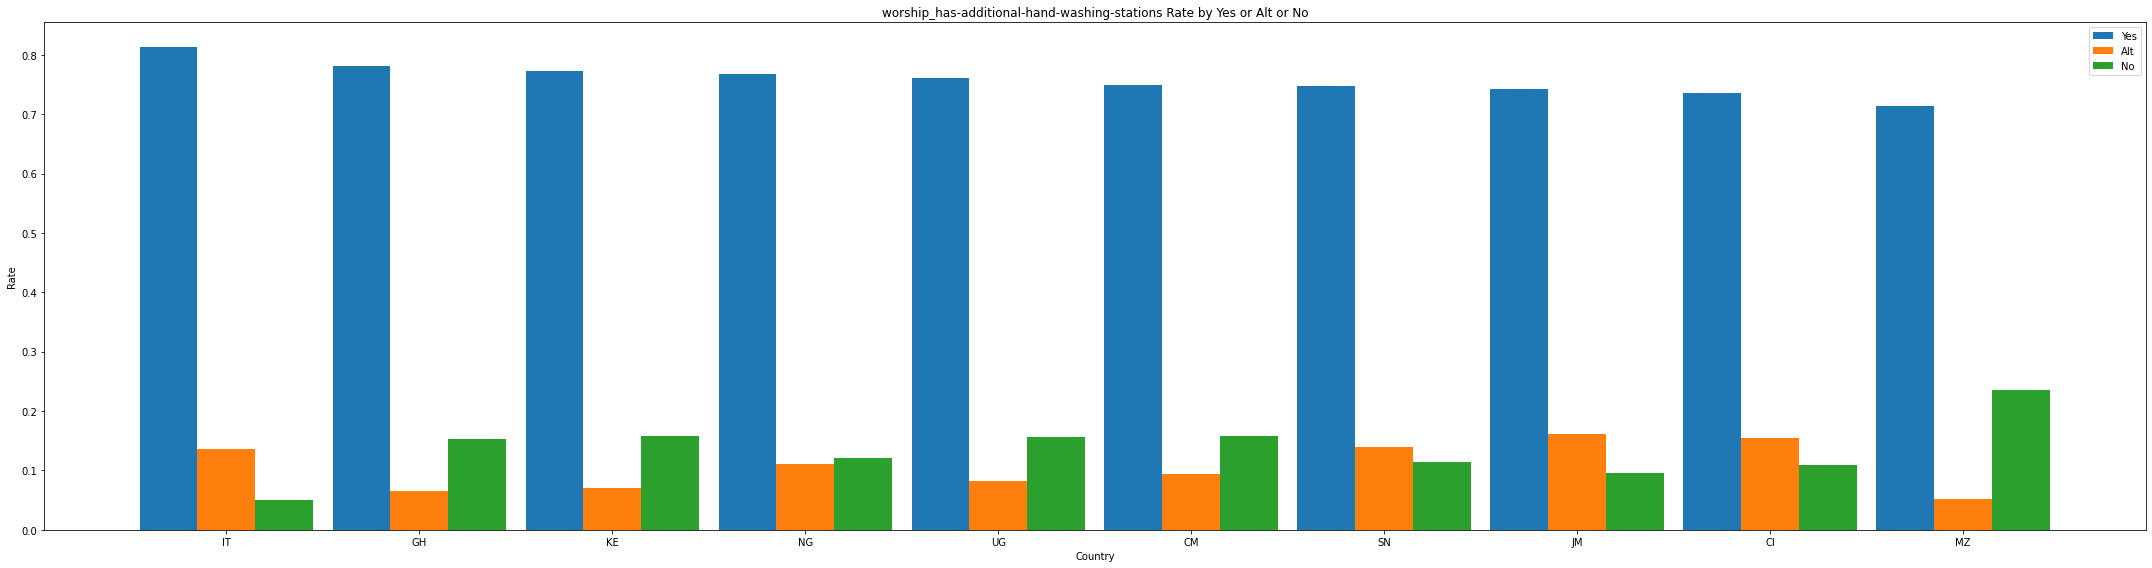

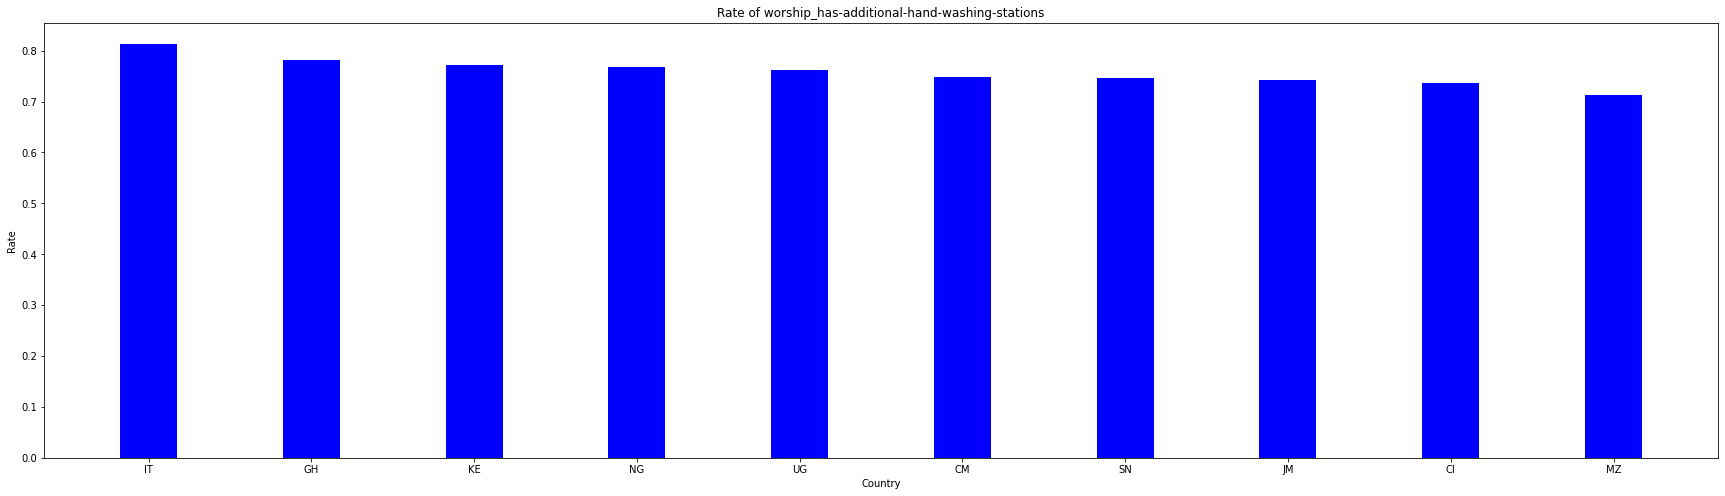

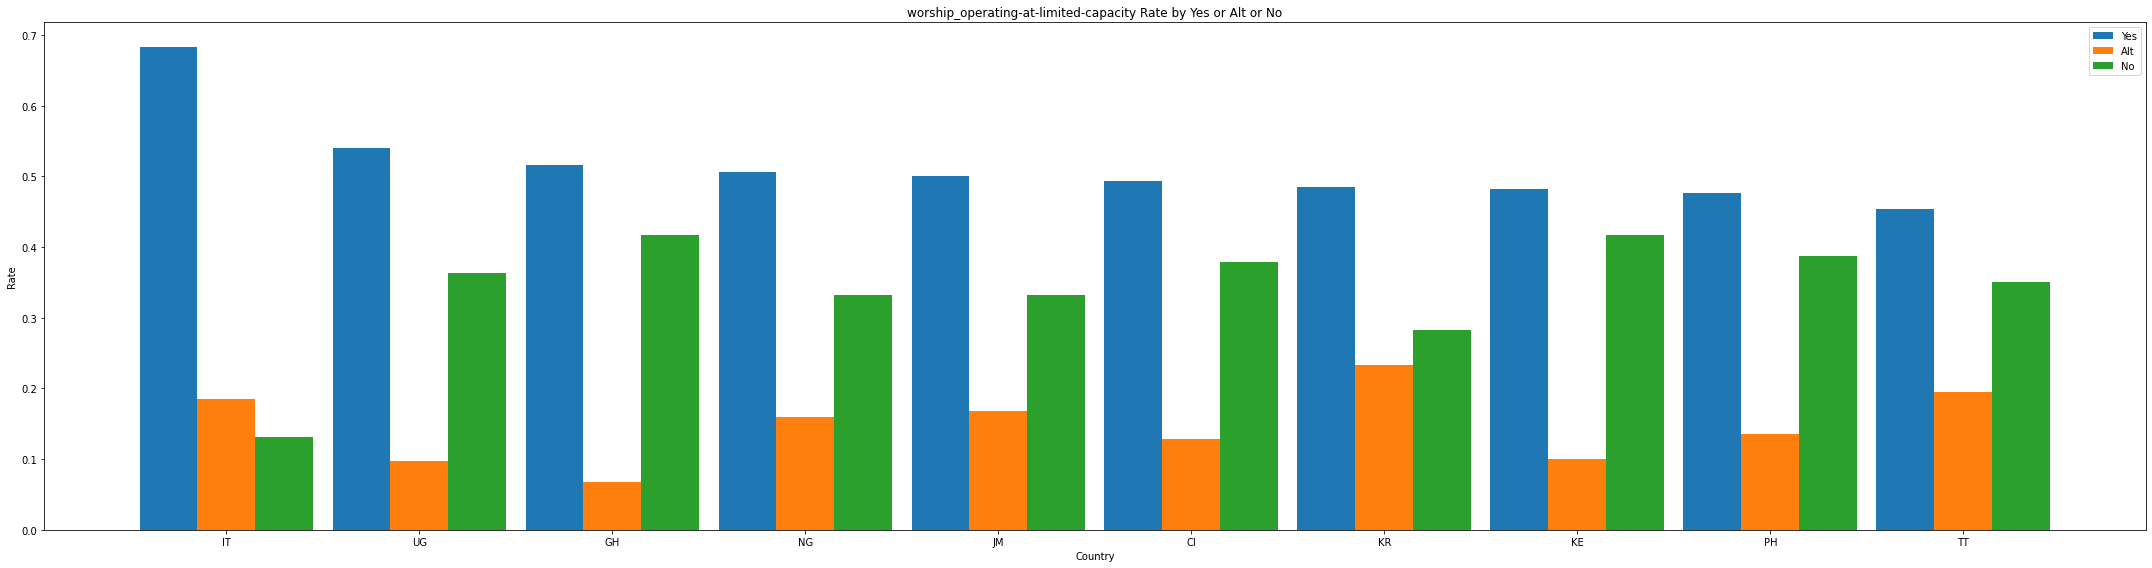

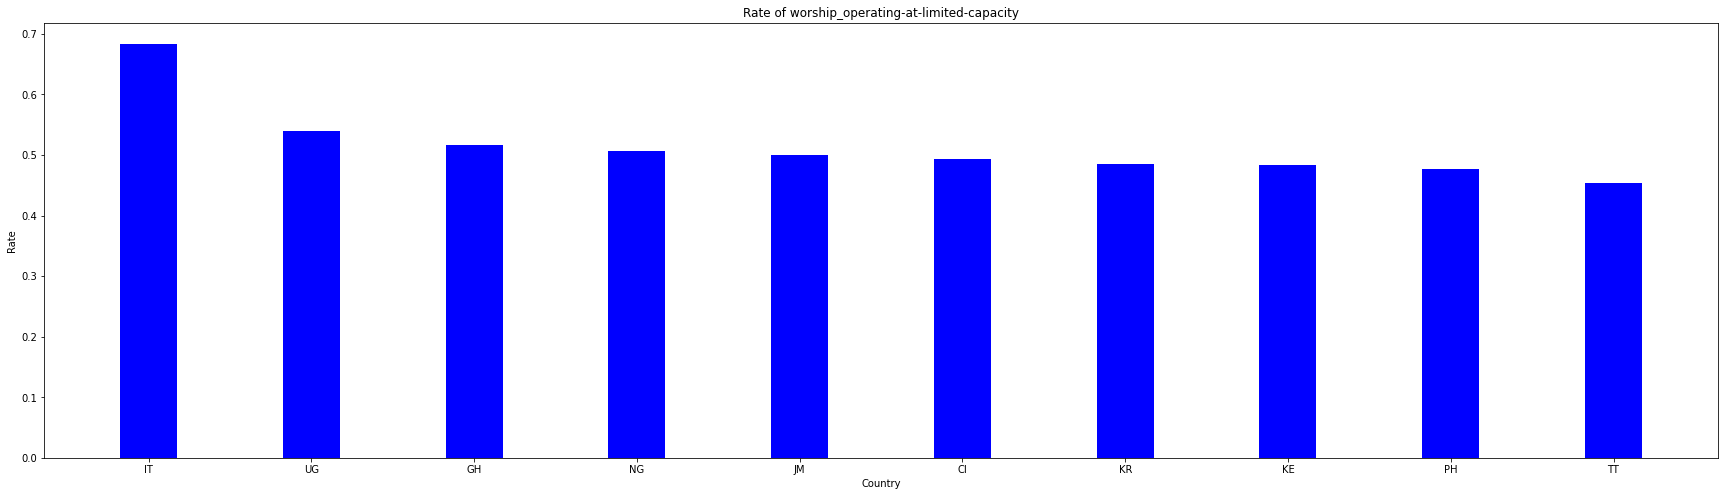

In [ ]:
worship = column_title_list[59:71]

for i in range(0, len(worship), 3):
  df_temp = df_mit[["country", worship[i], worship[i+1], worship[i+2]]].sort_values(by=worship[i+2], ascending=[False]).head(10)
  grouped_bar_alt(df_temp, worship[i+1], worship[i+2], worship[i], worship[i][:-26])
  just_bar(df_temp, worship[i+2], worship[i][:-26])

### Locations Would Attend

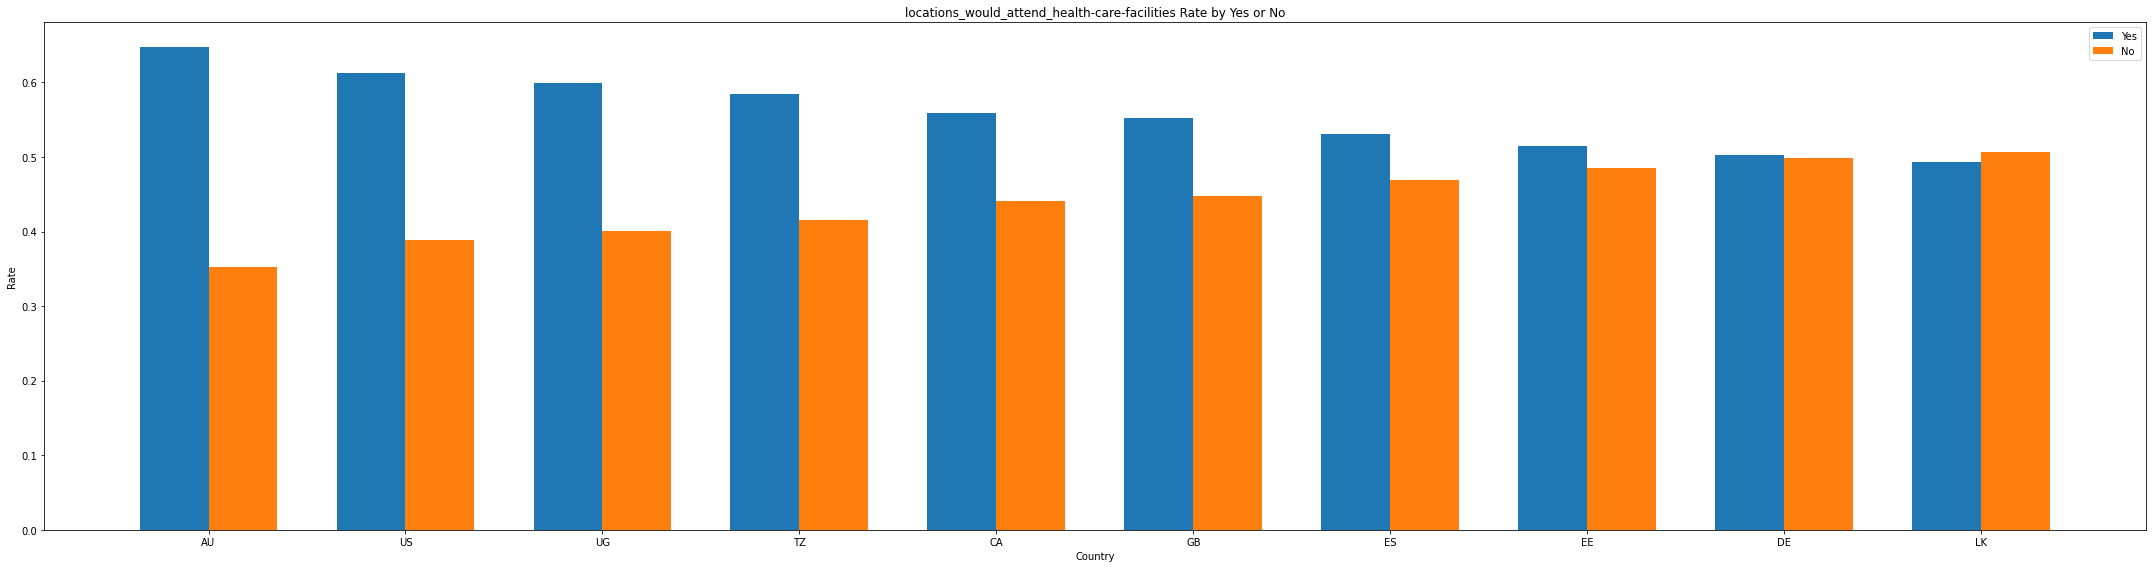

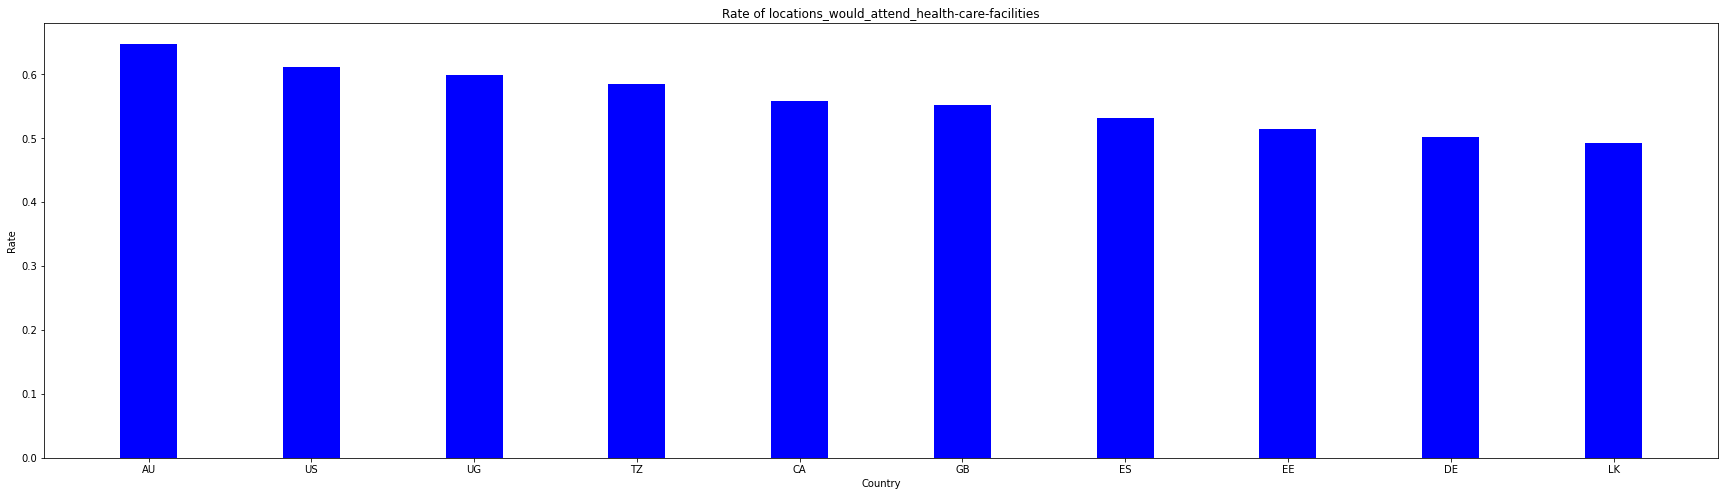

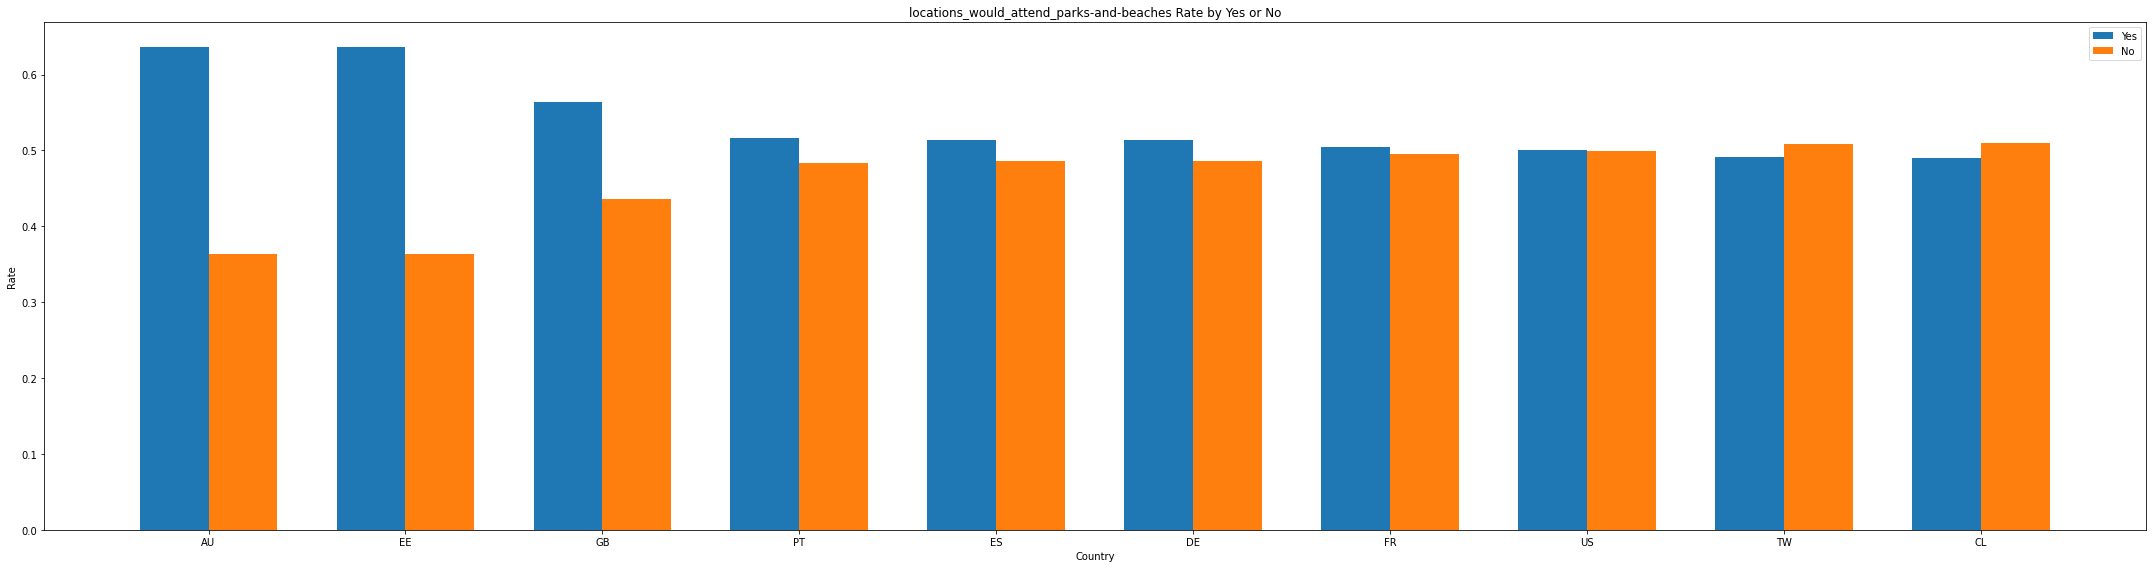

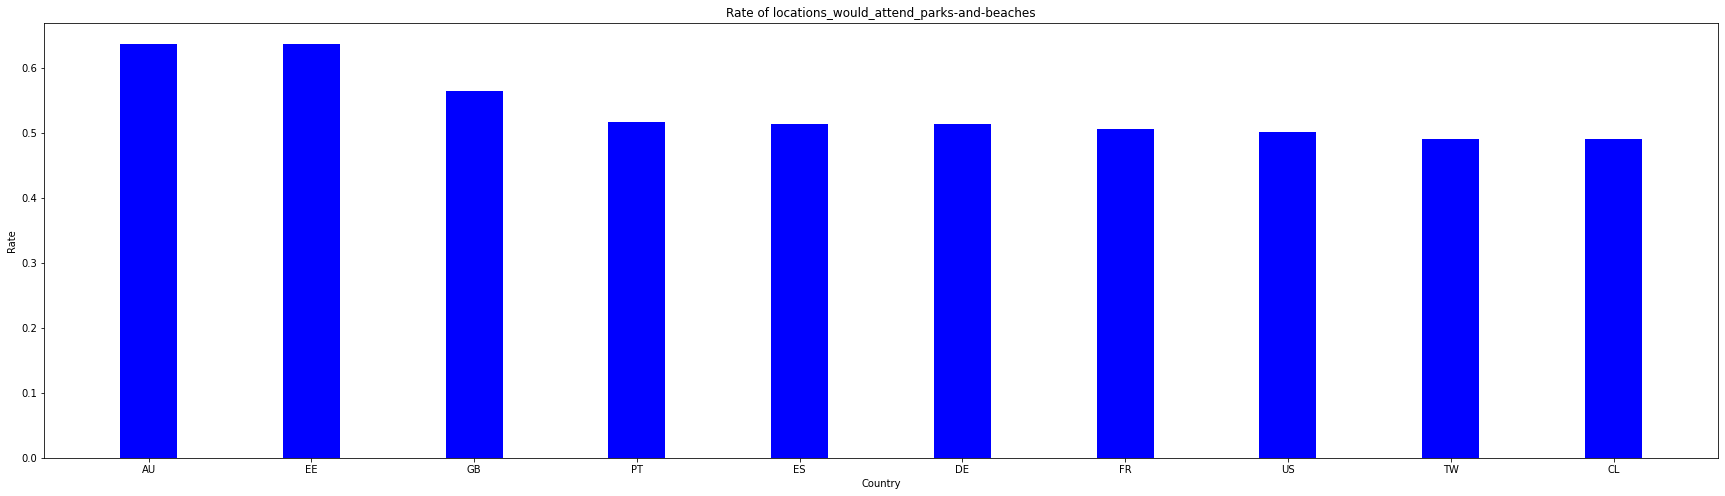

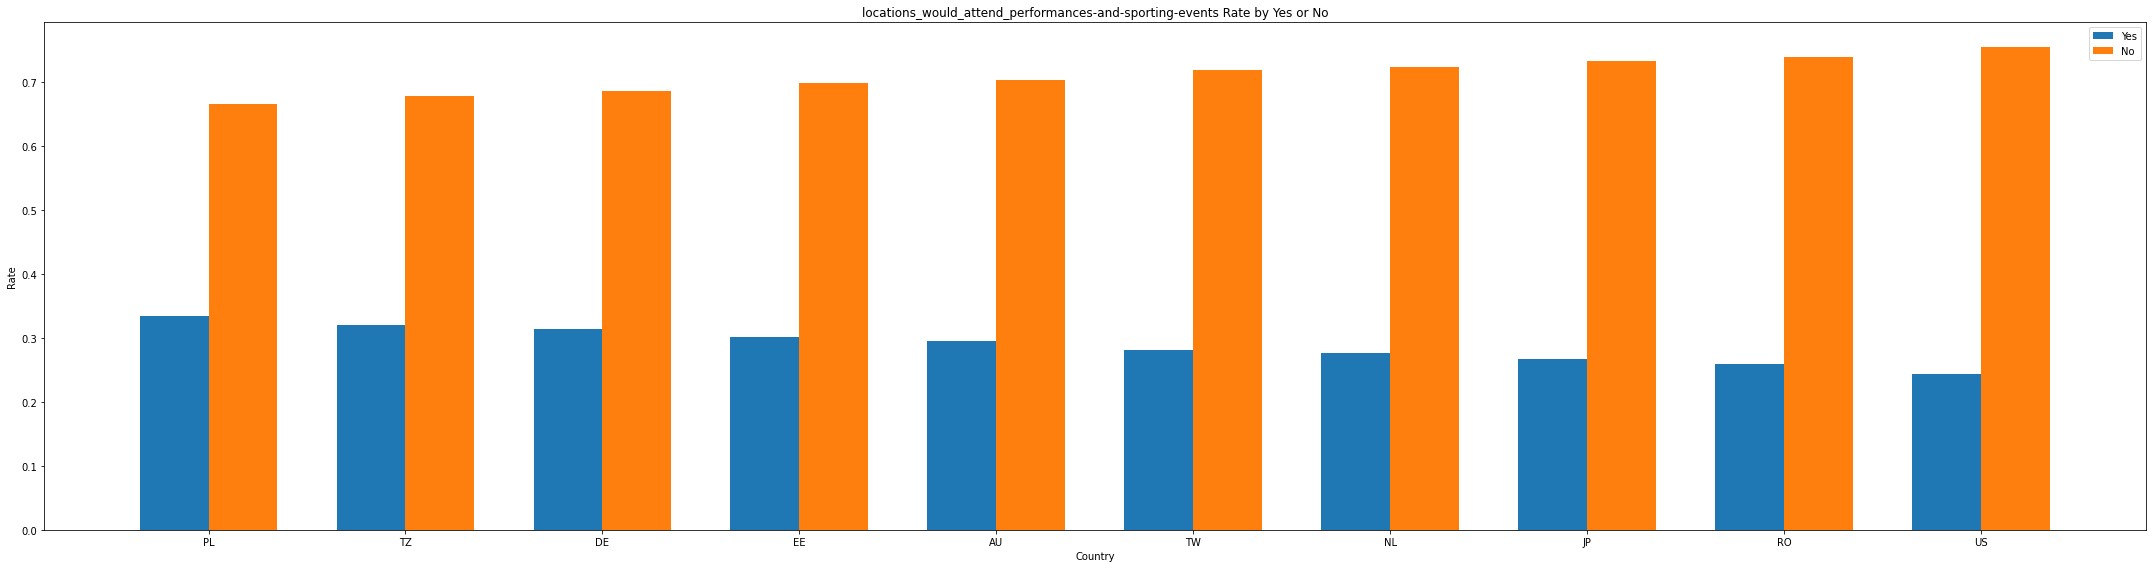

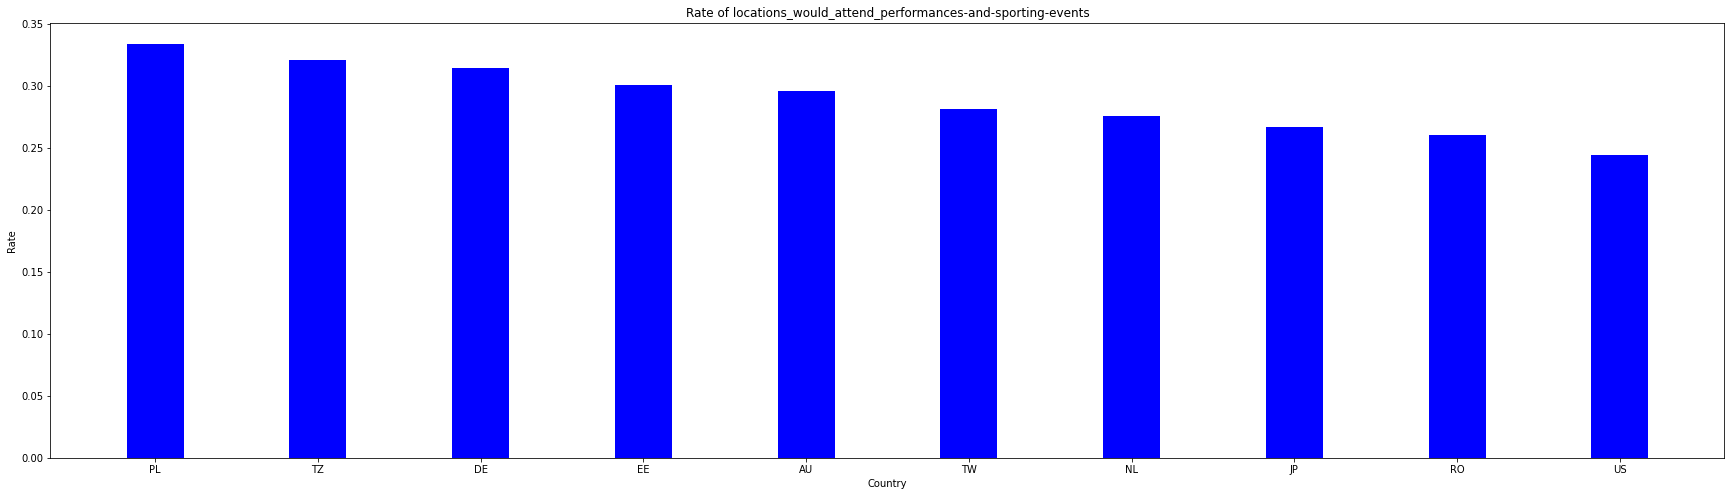

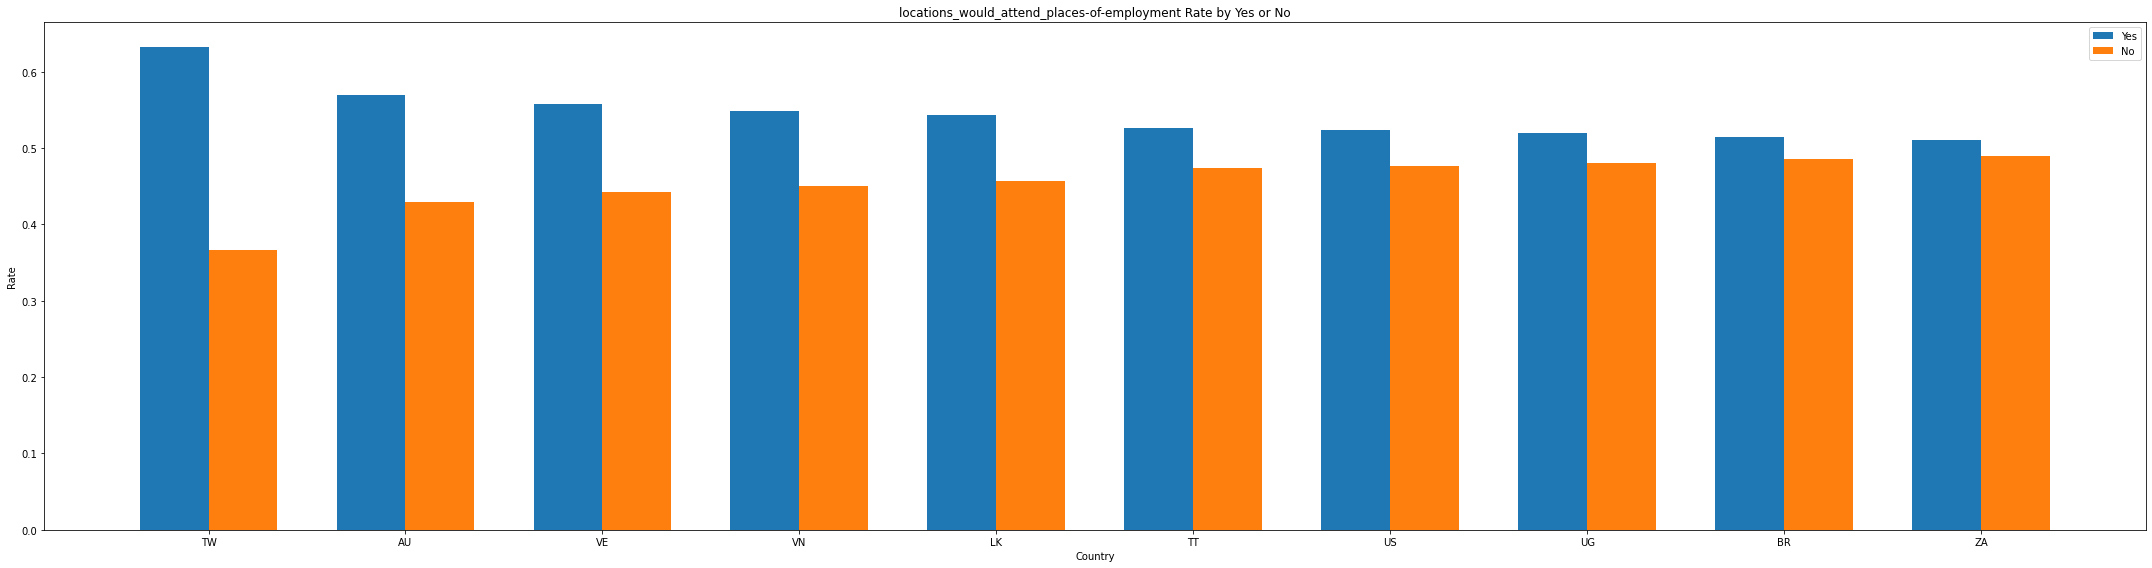

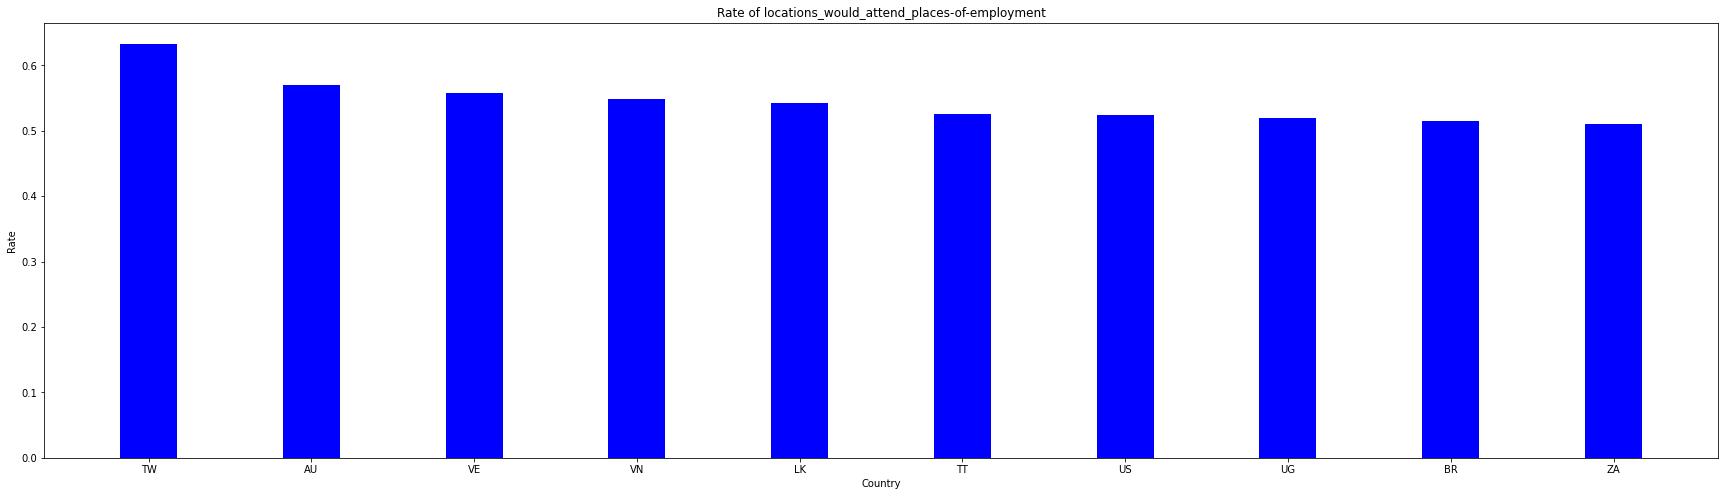

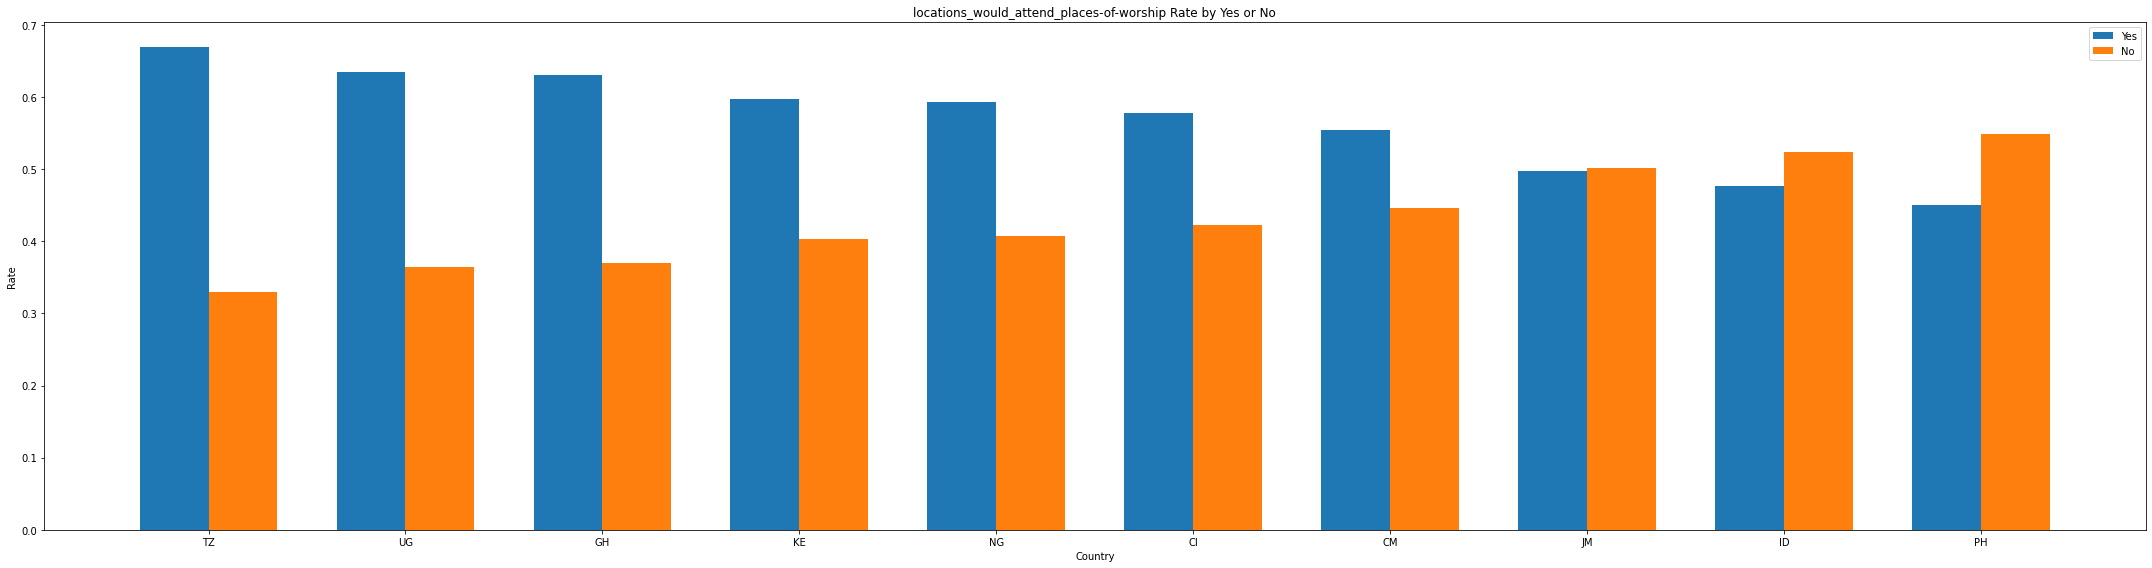

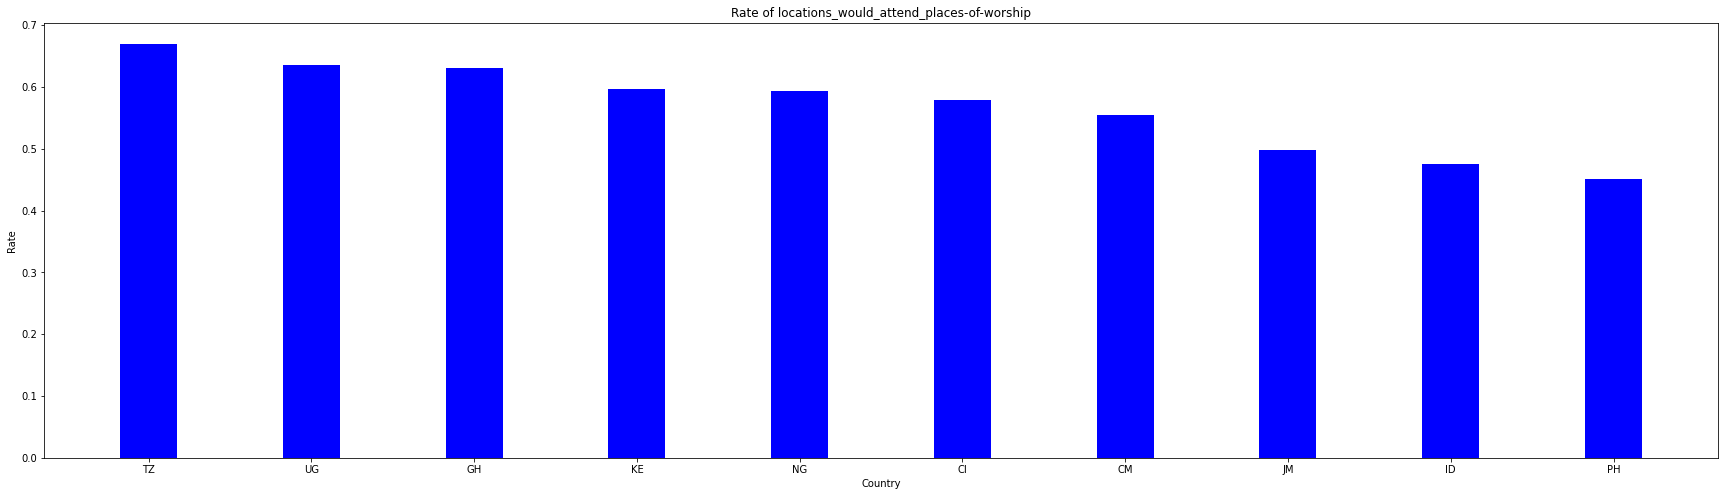

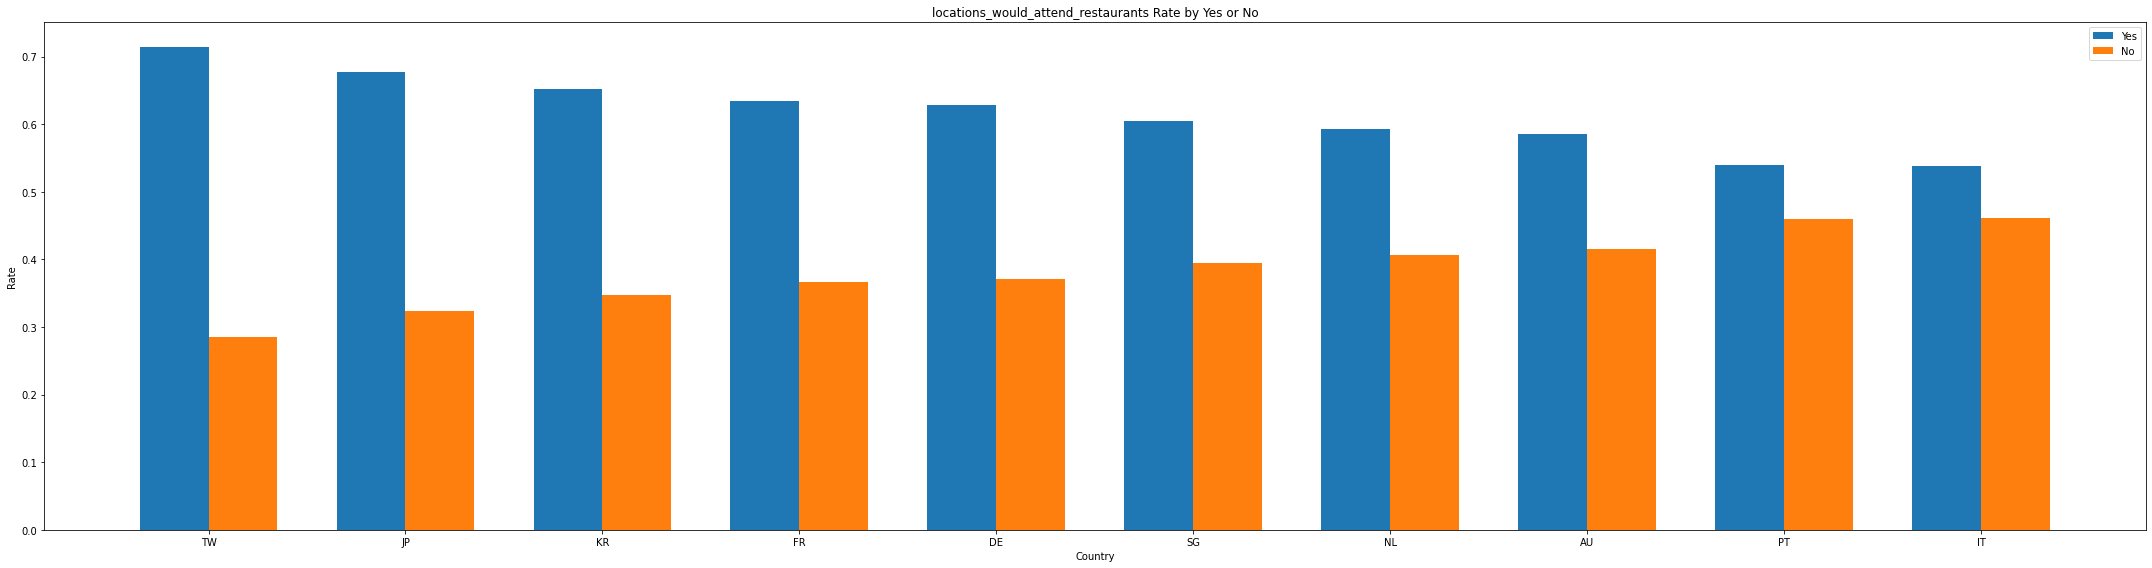

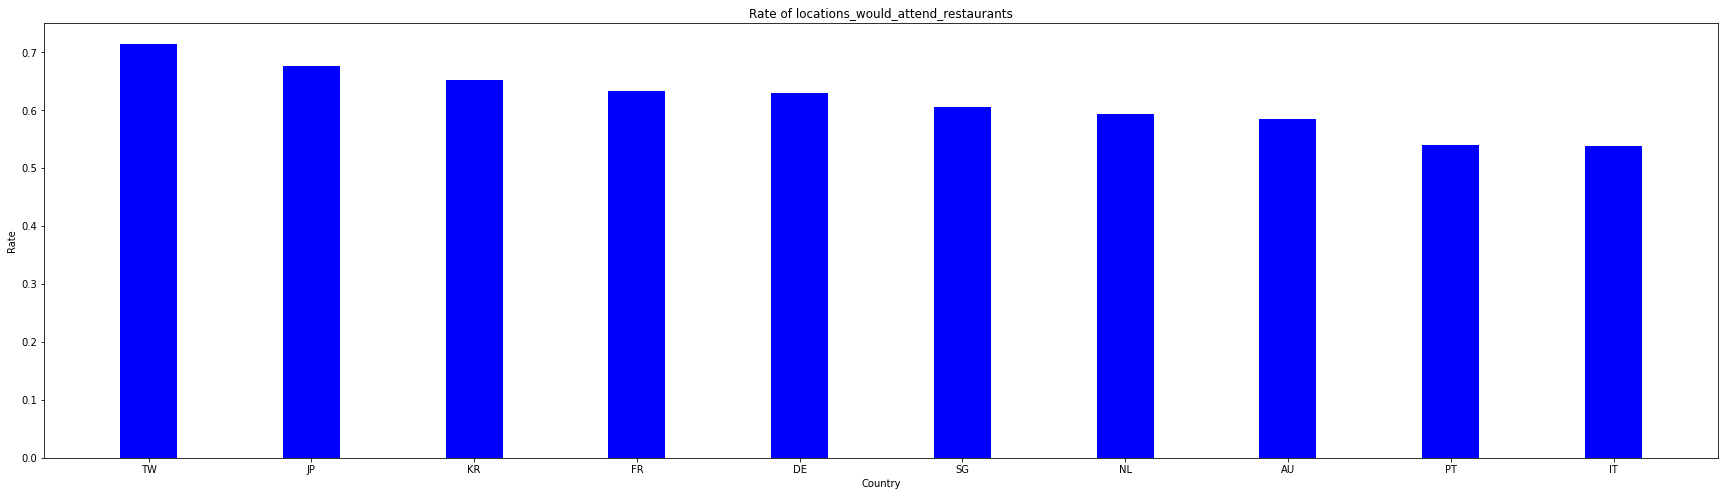

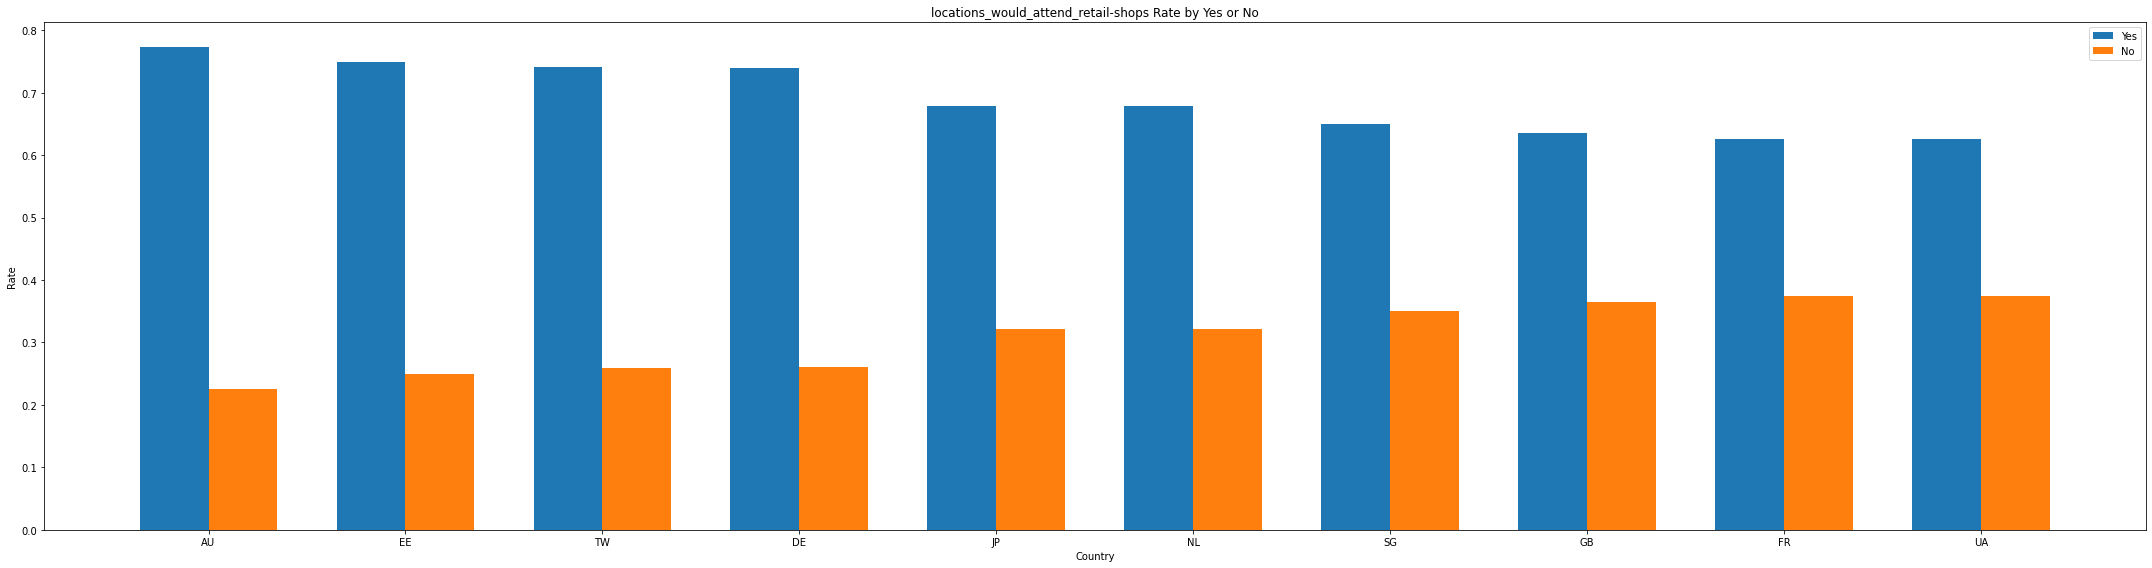

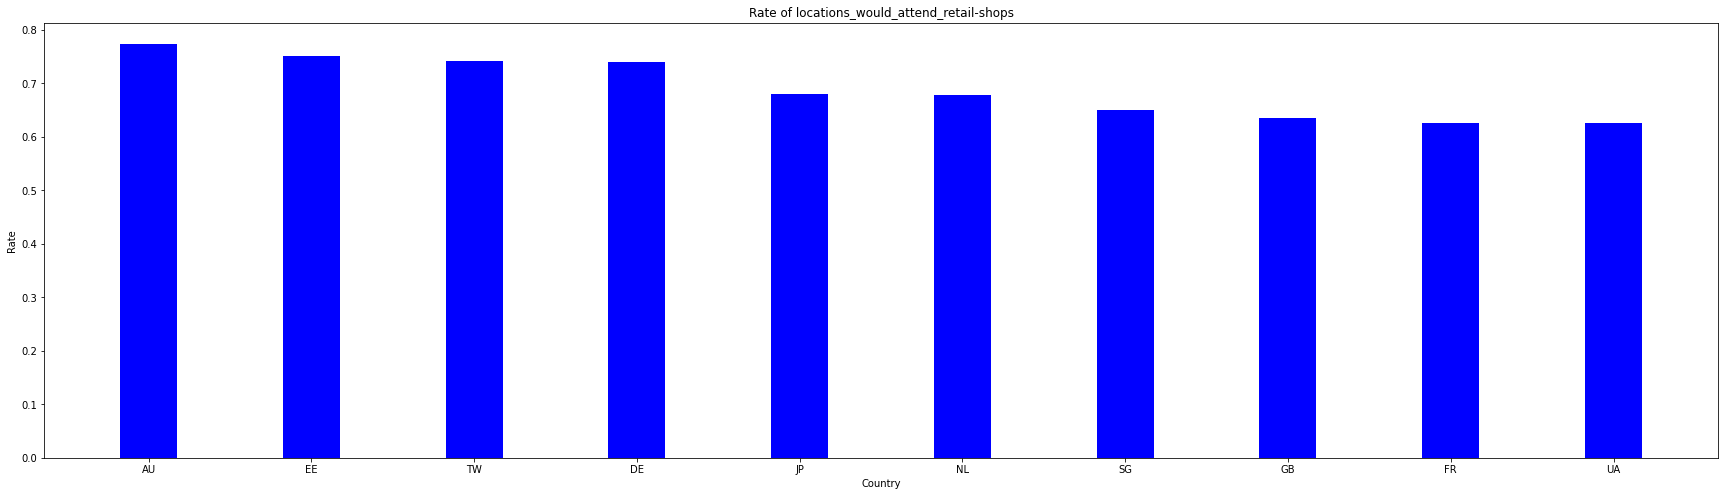

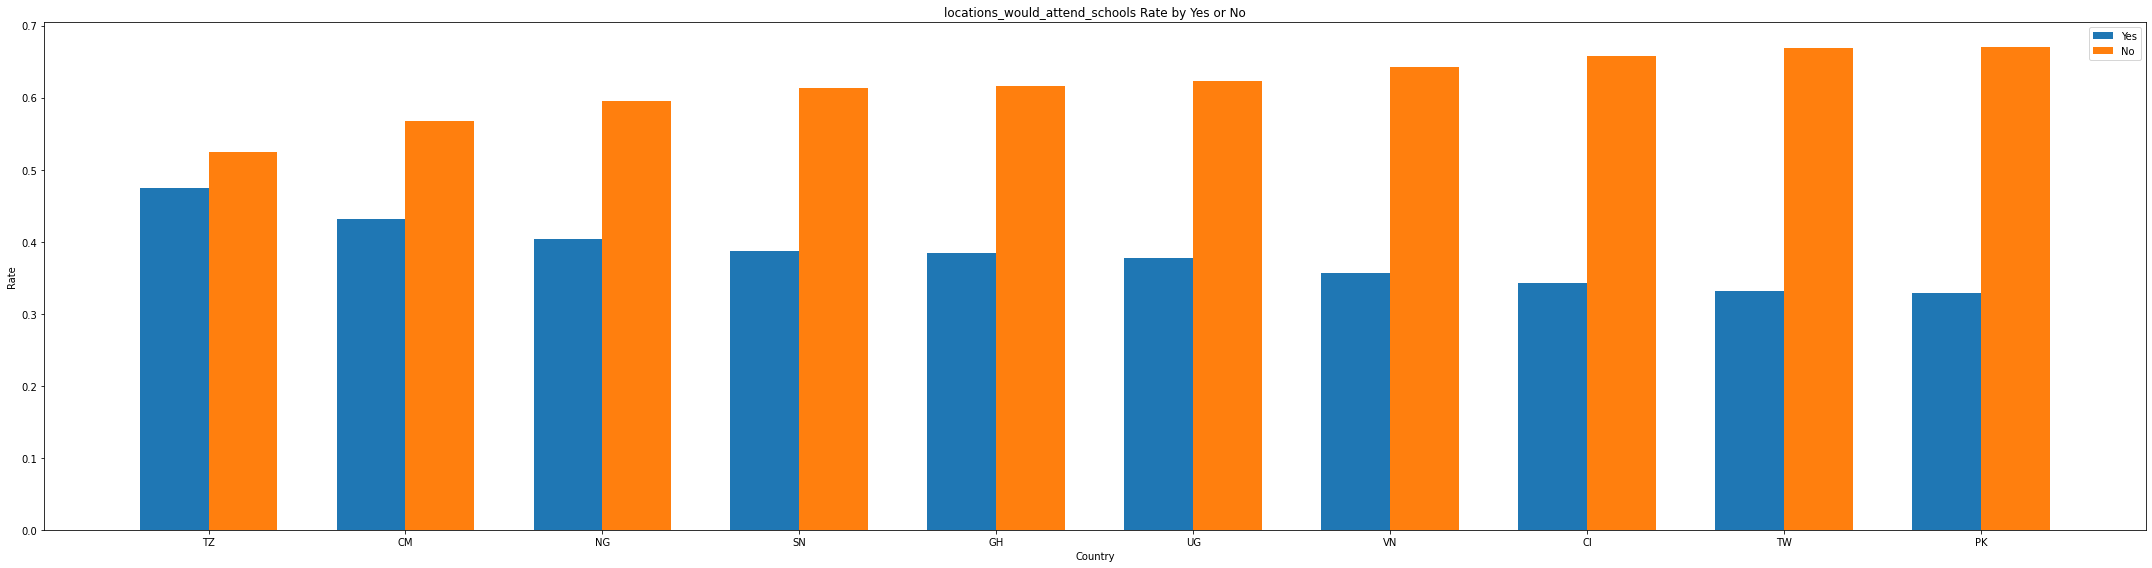

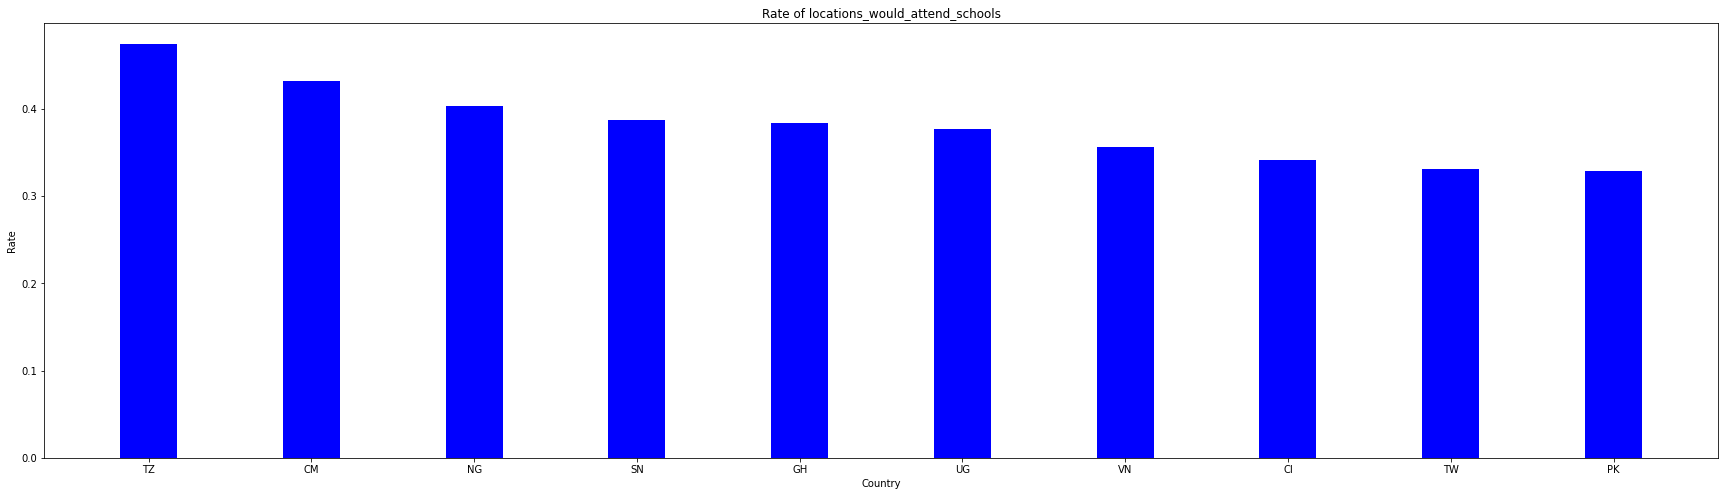

In [ ]:
locations_would_attend = column_title_list[71:87]

for i in range(0, len(locations_would_attend), 2):
  df_temp = df_mit[["country", locations_would_attend[i], locations_would_attend[i+1]]].sort_values(by=locations_would_attend[i]).head(10)
  grouped_bar(df_temp, locations_would_attend[i], locations_would_attend[i+1], locations_would_attend[i][:-3])
  just_bar(df_temp, locations_would_attend[i+1], locations_would_attend[i][:-3])

### Measures Taken

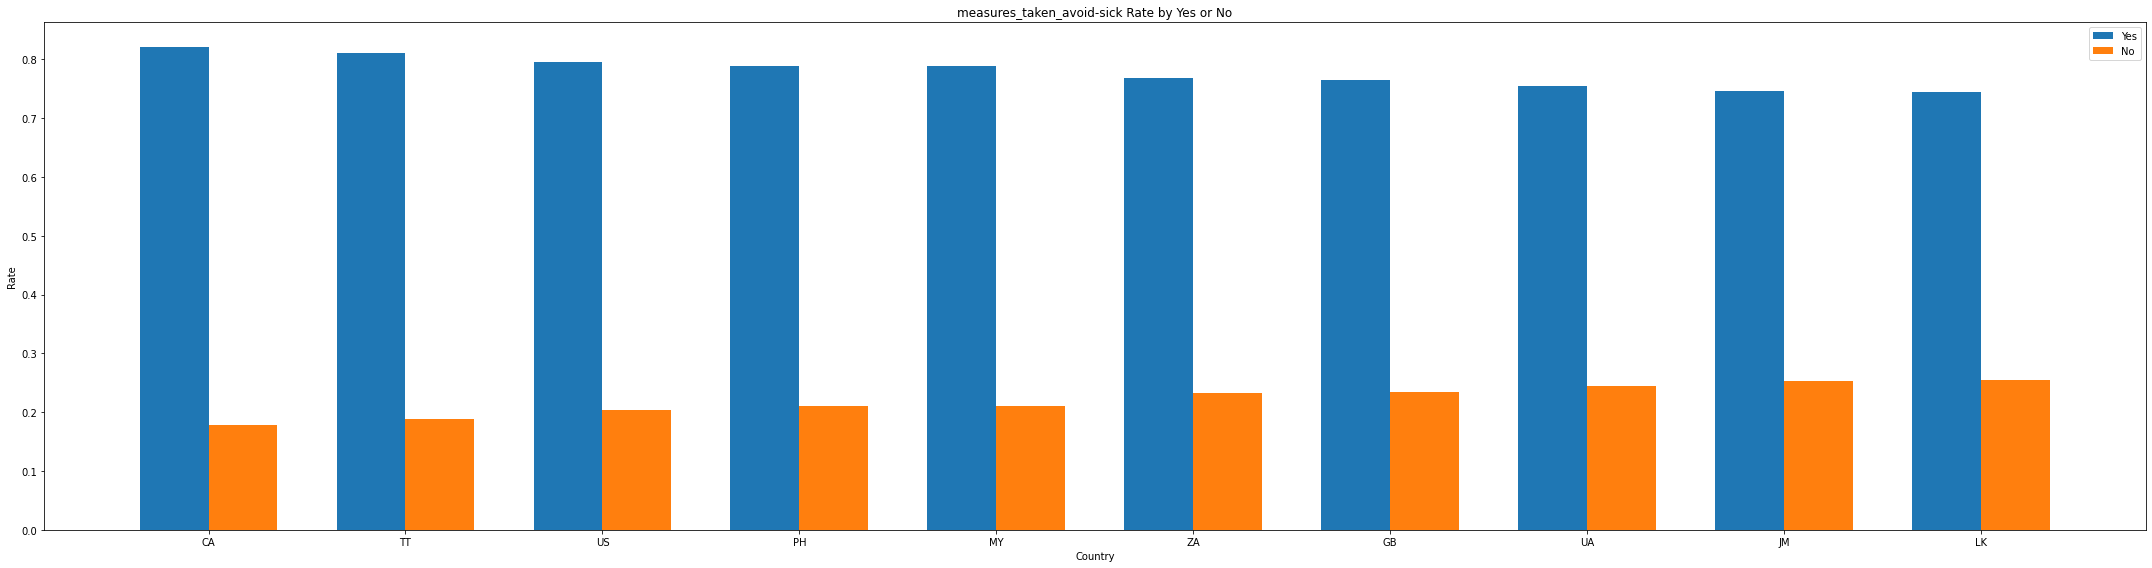

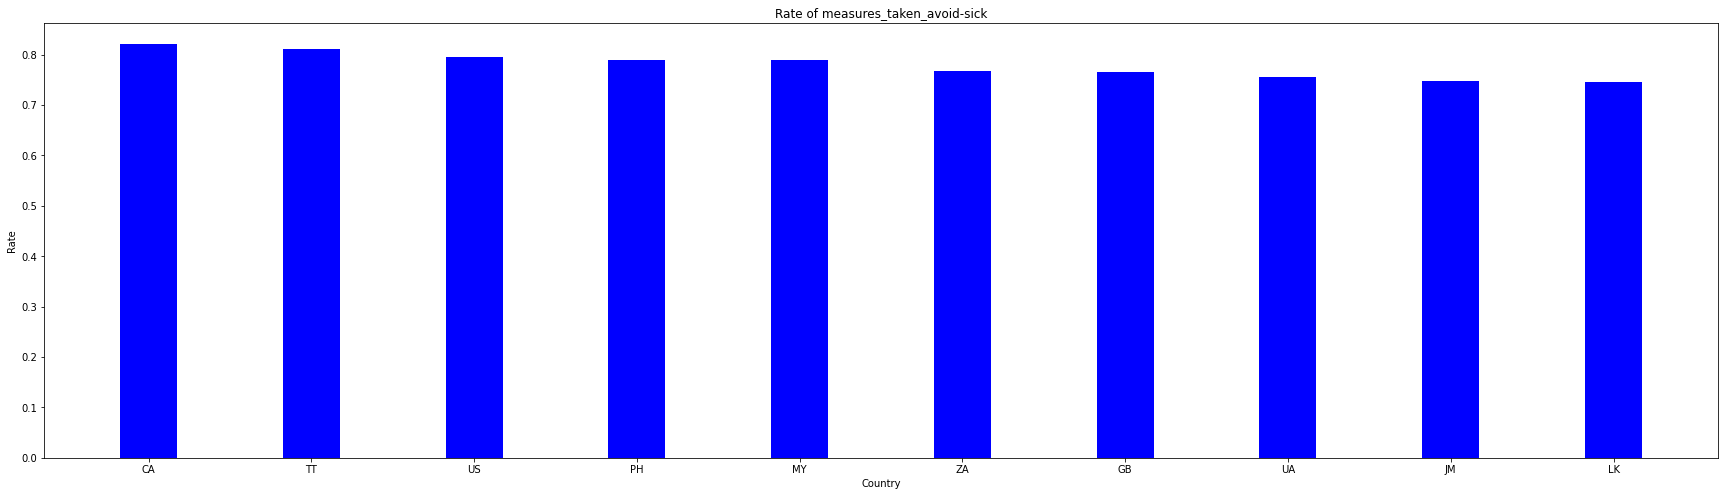

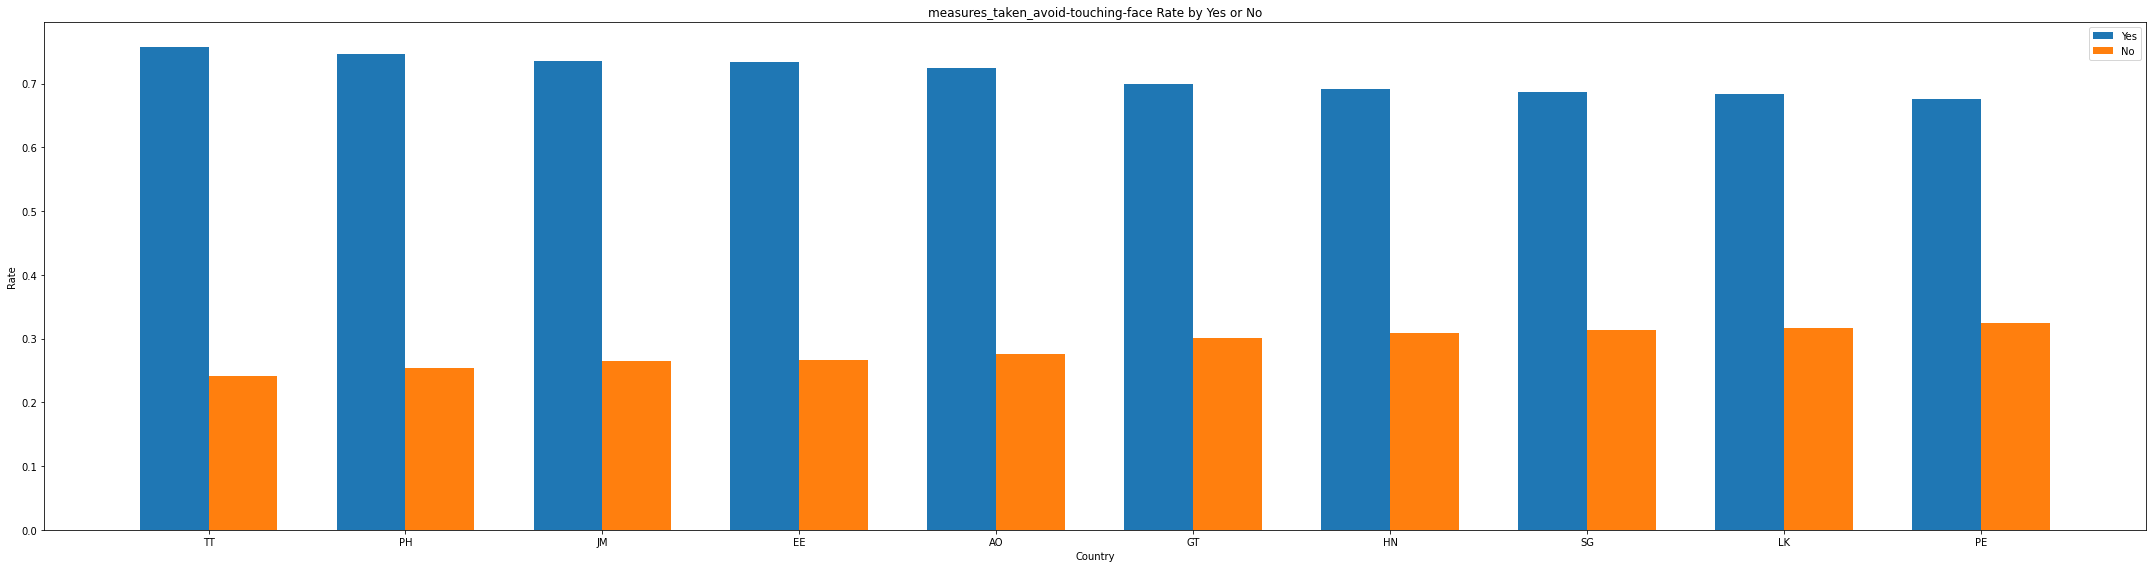

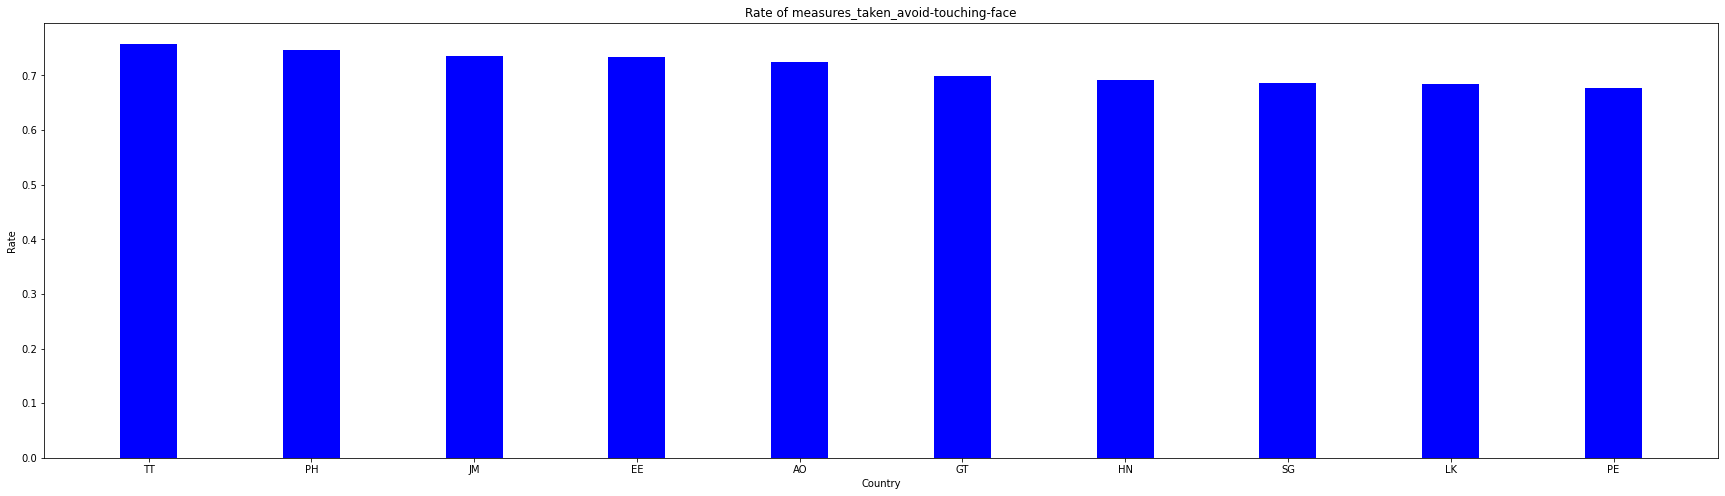

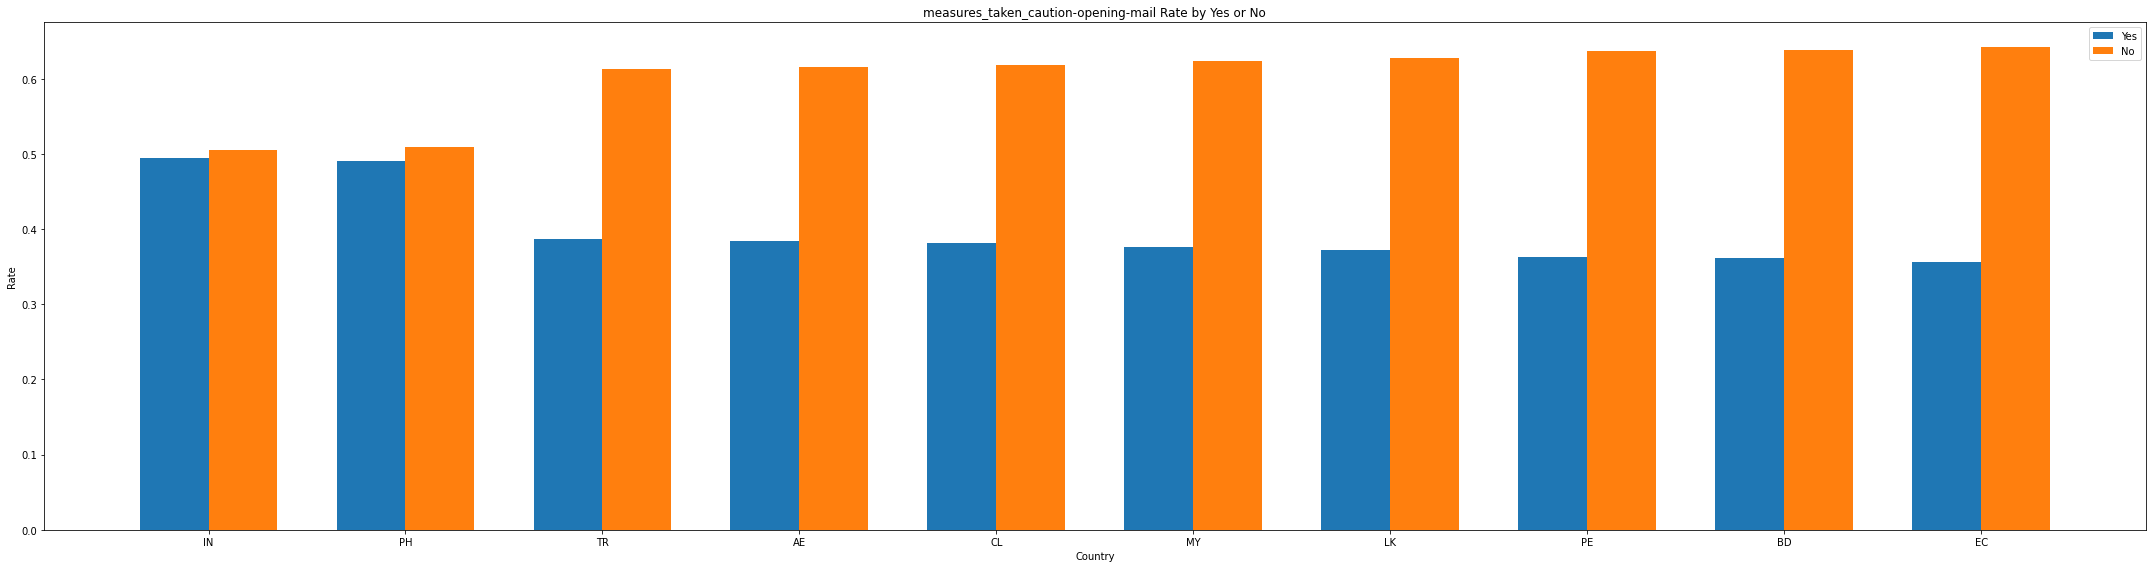

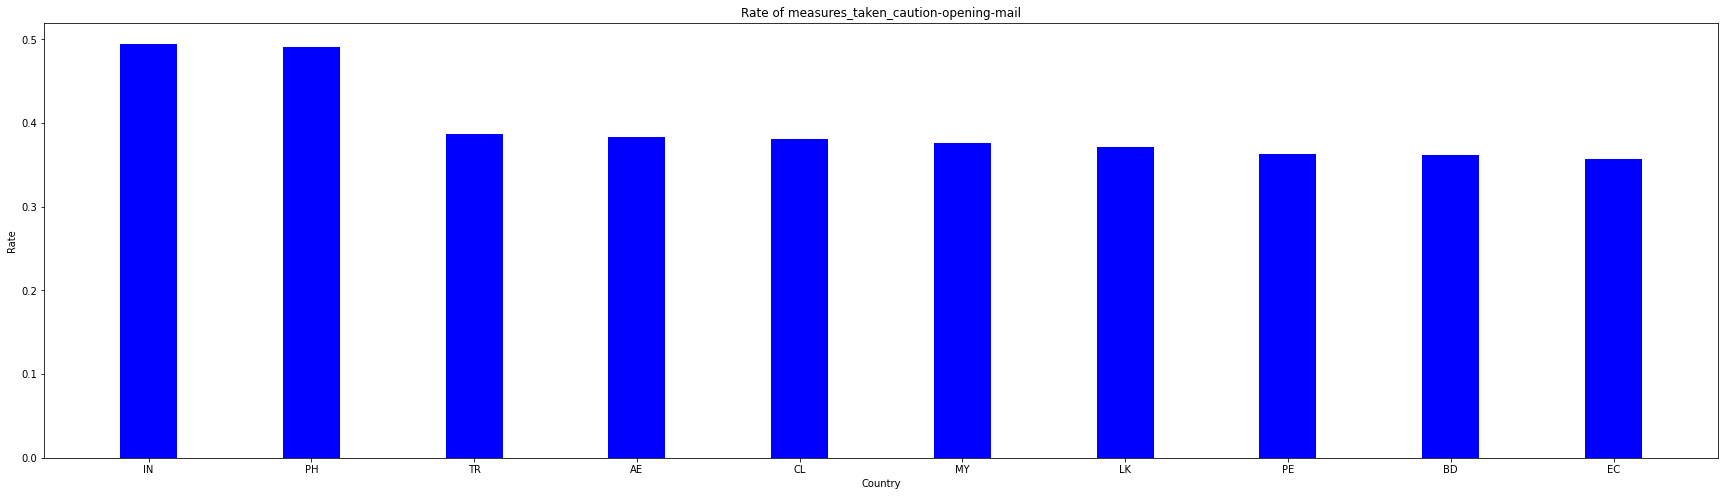

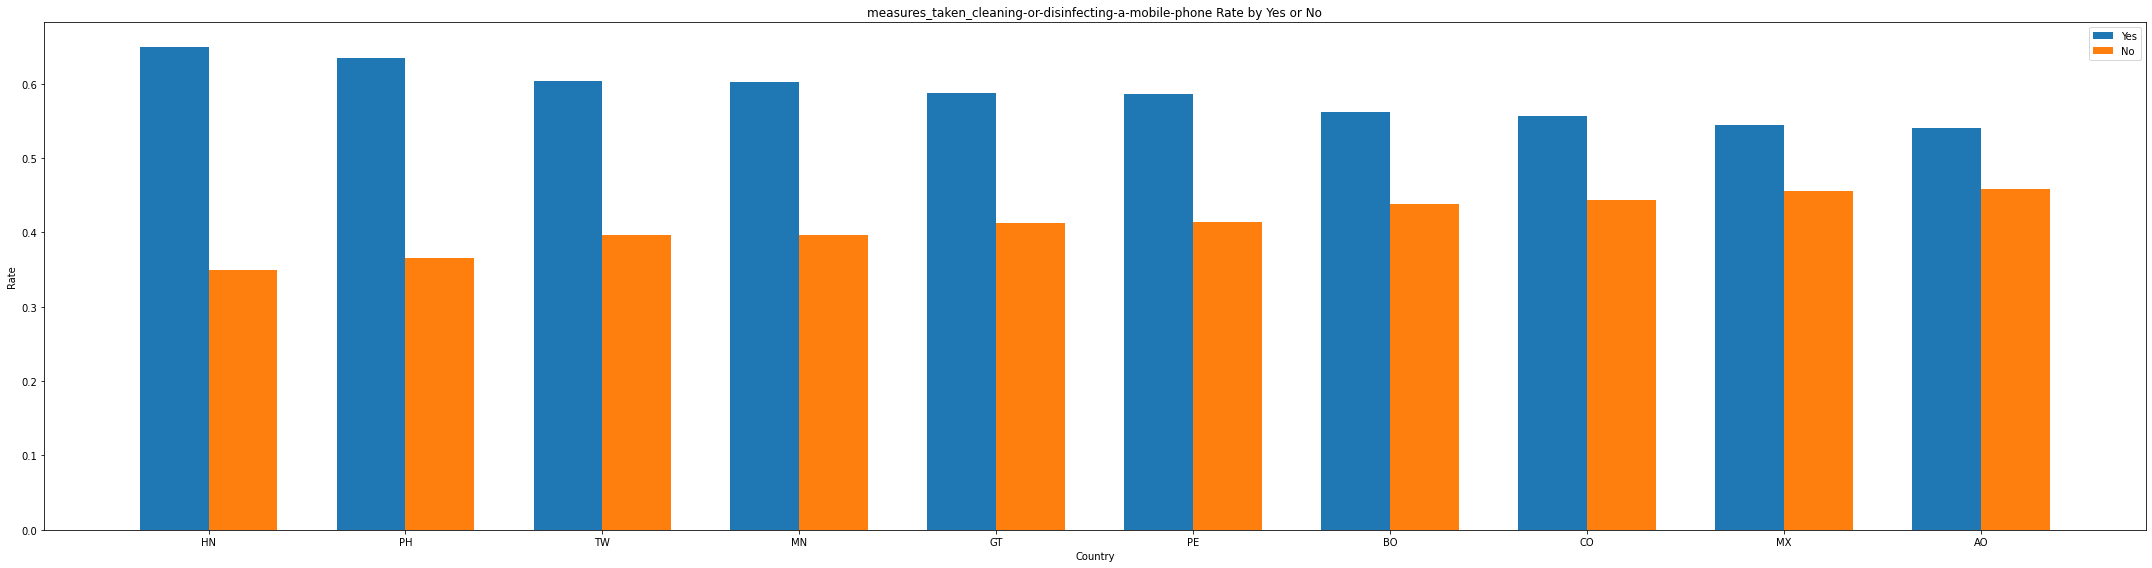

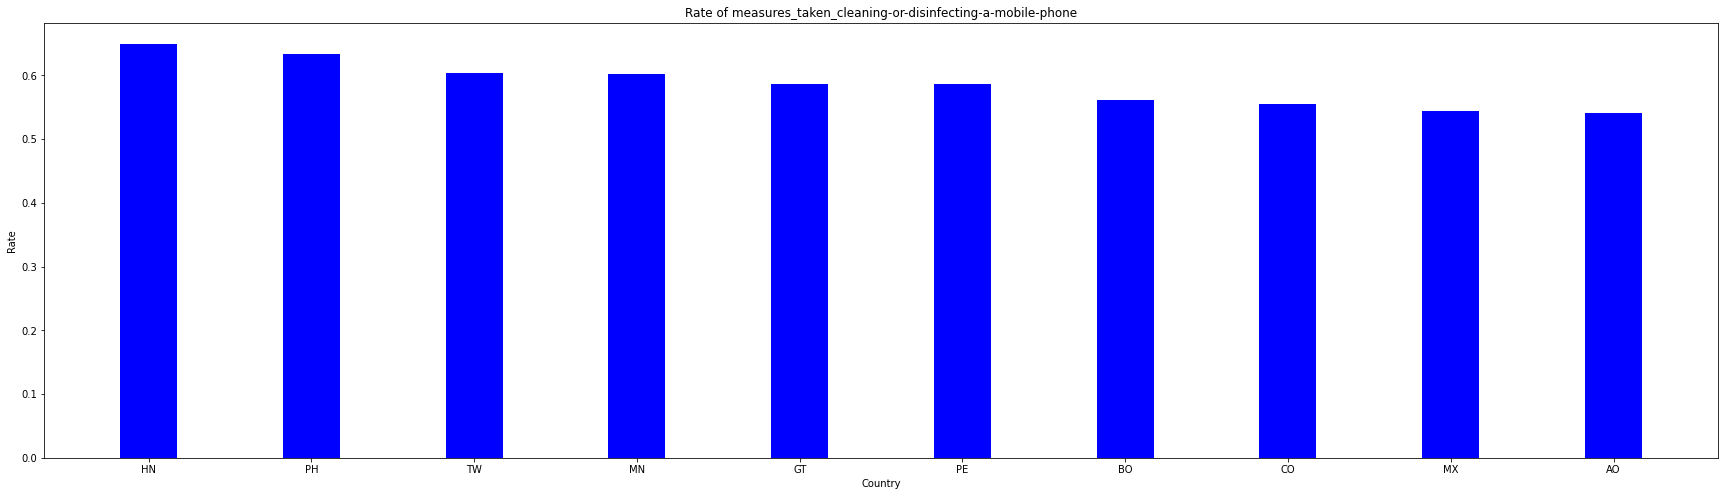

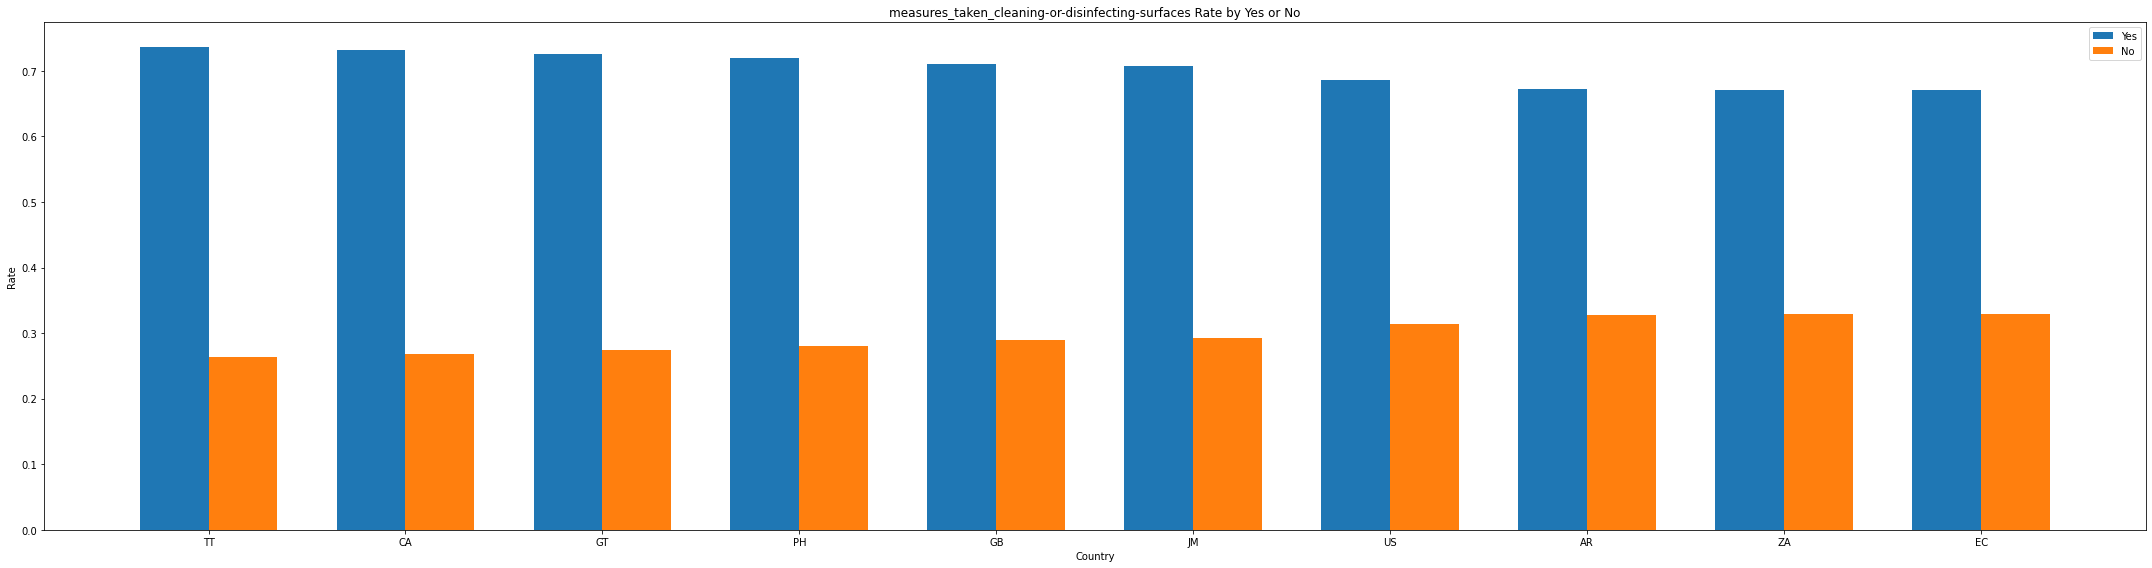

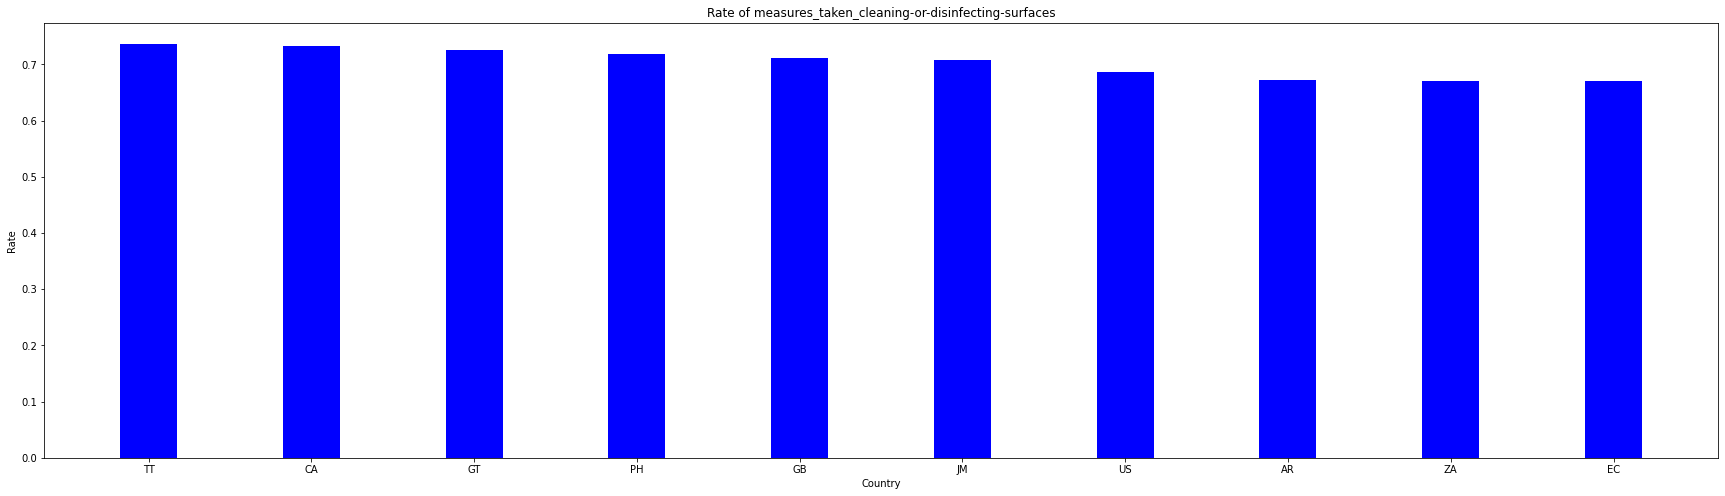

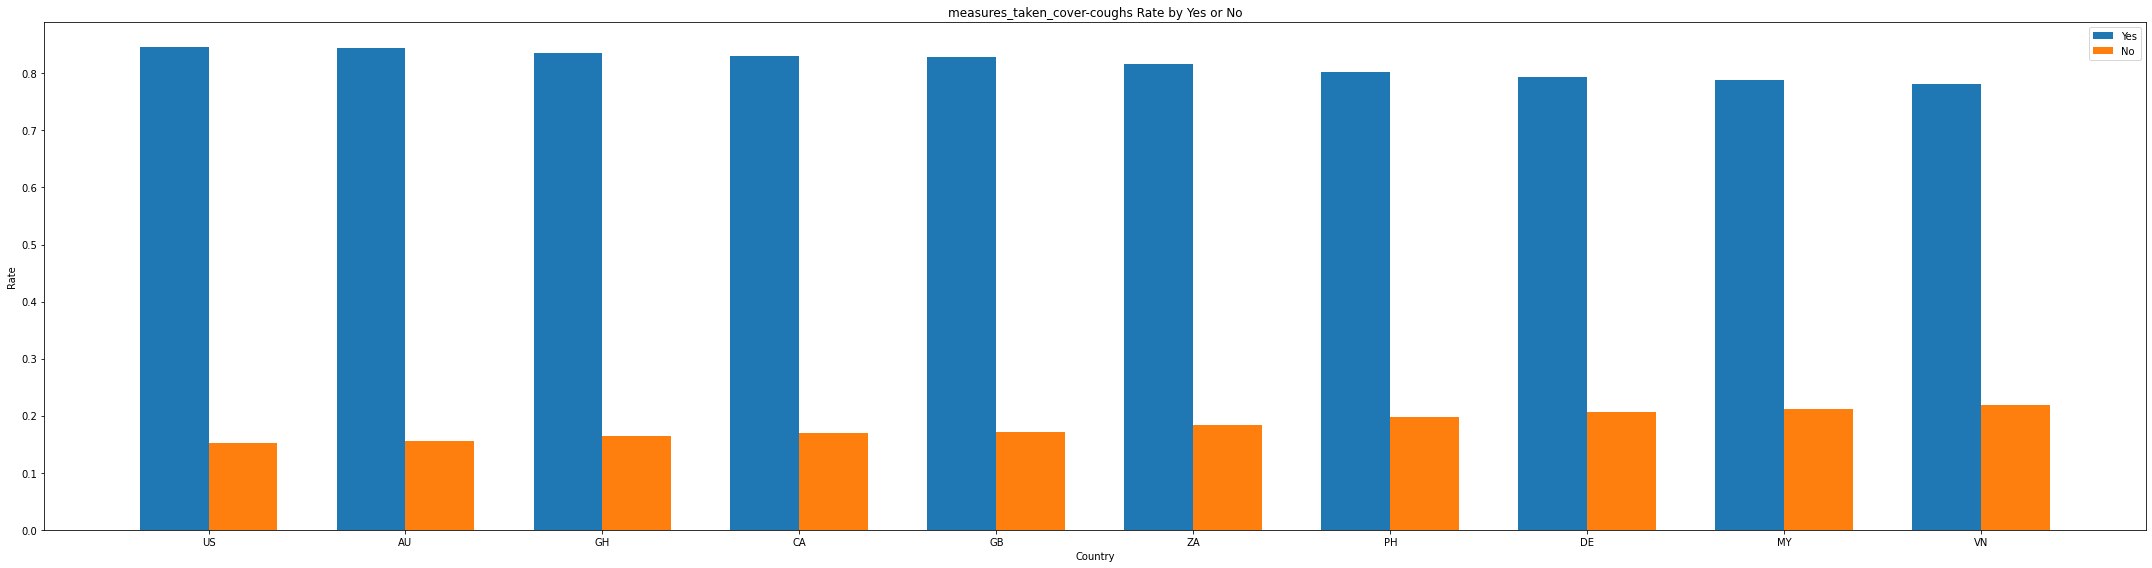

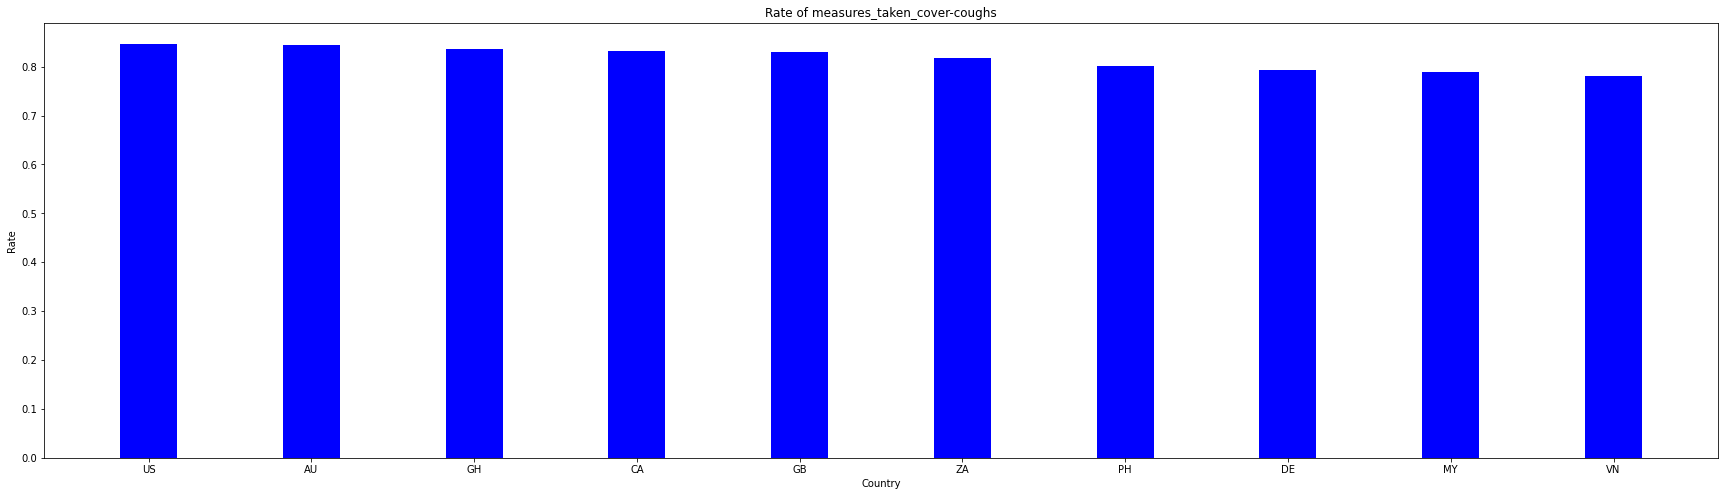

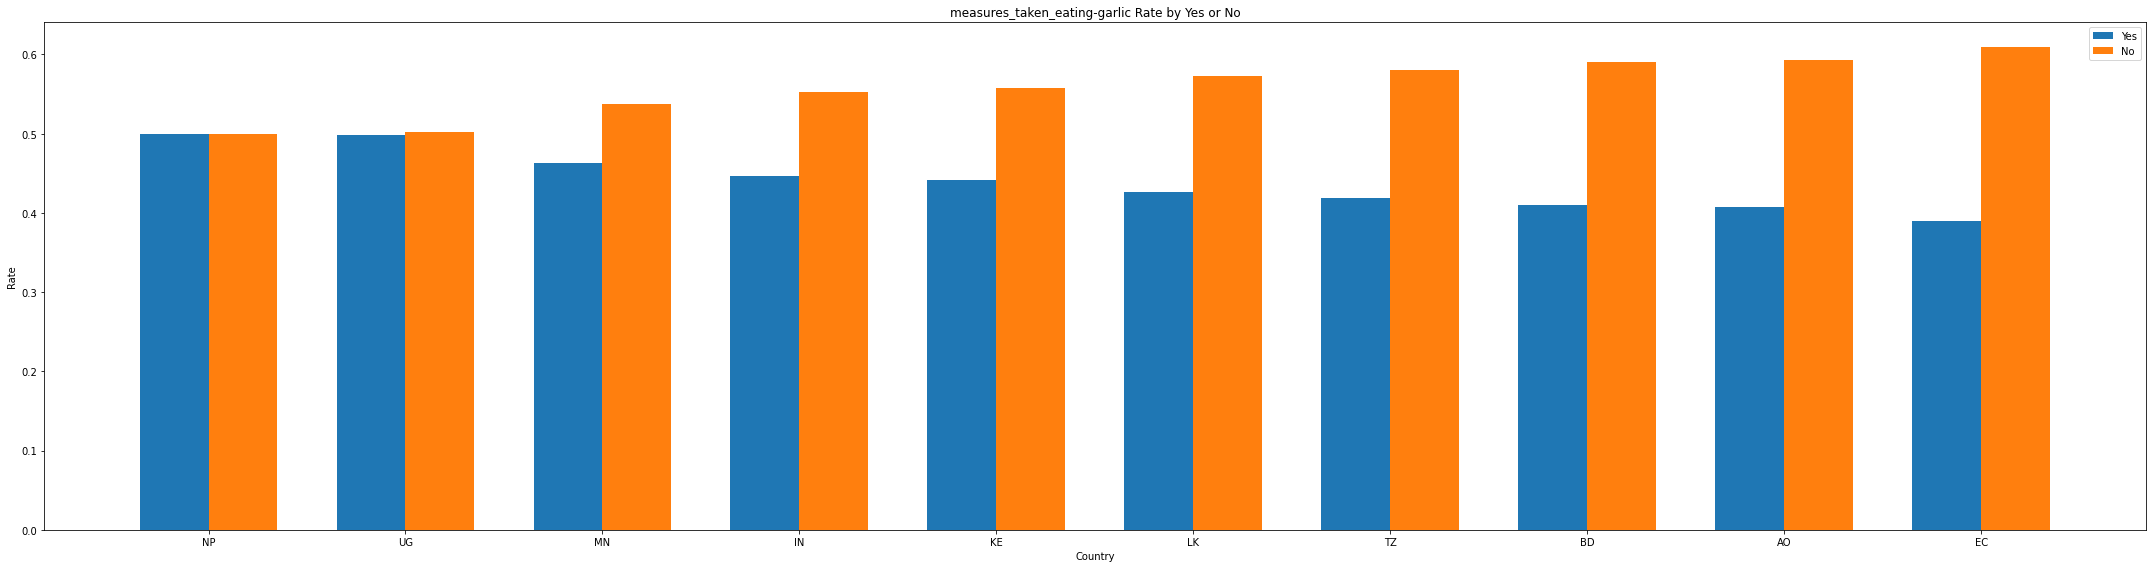

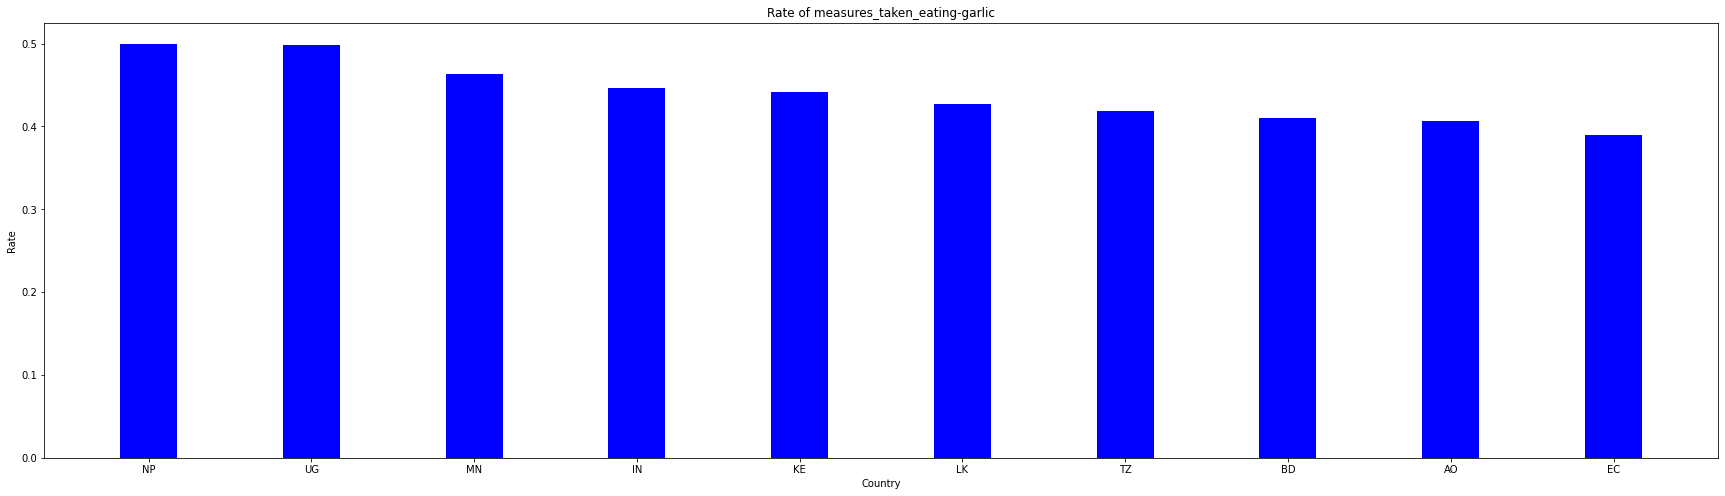

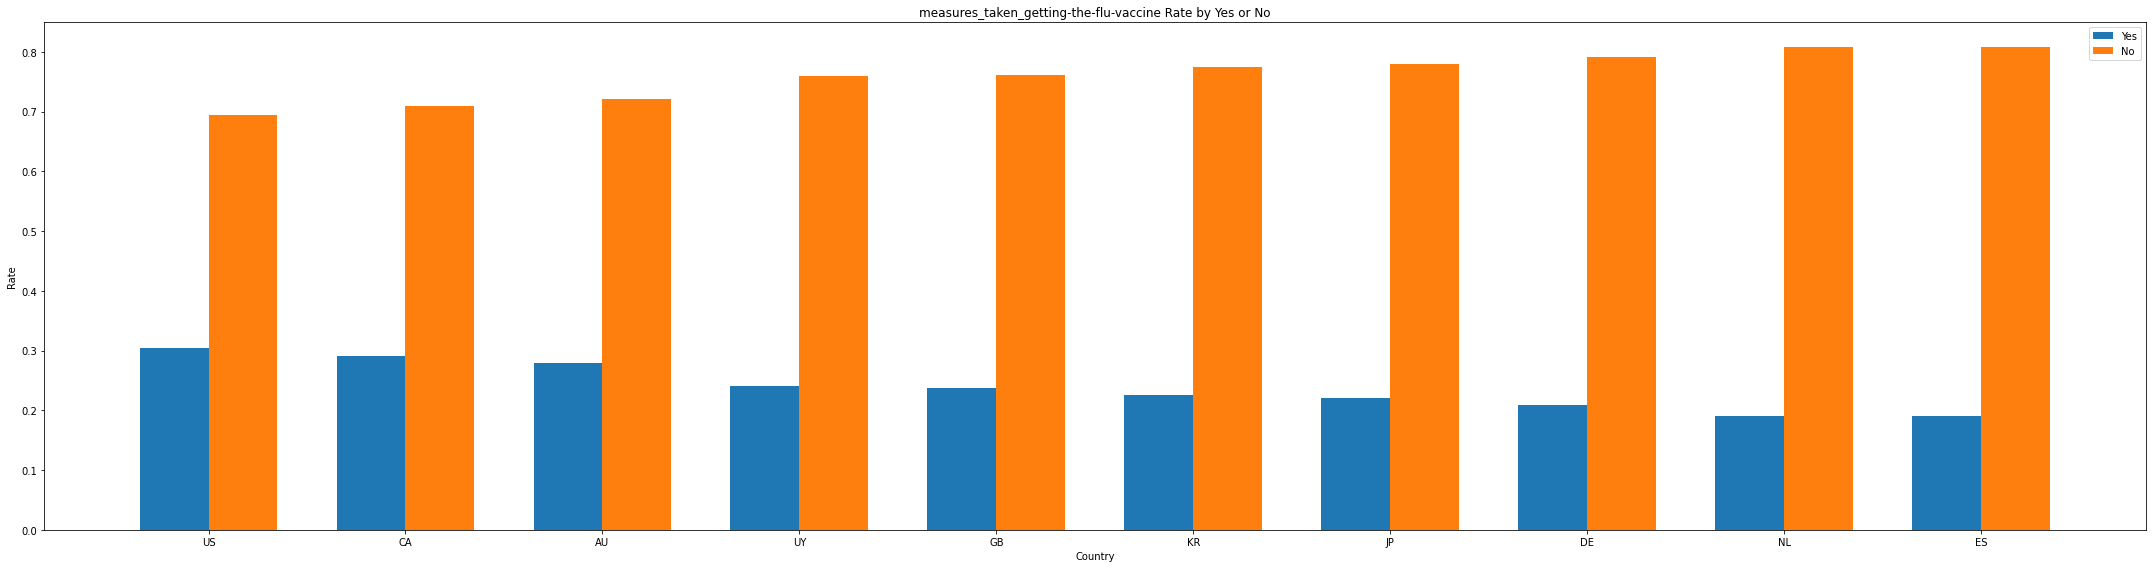

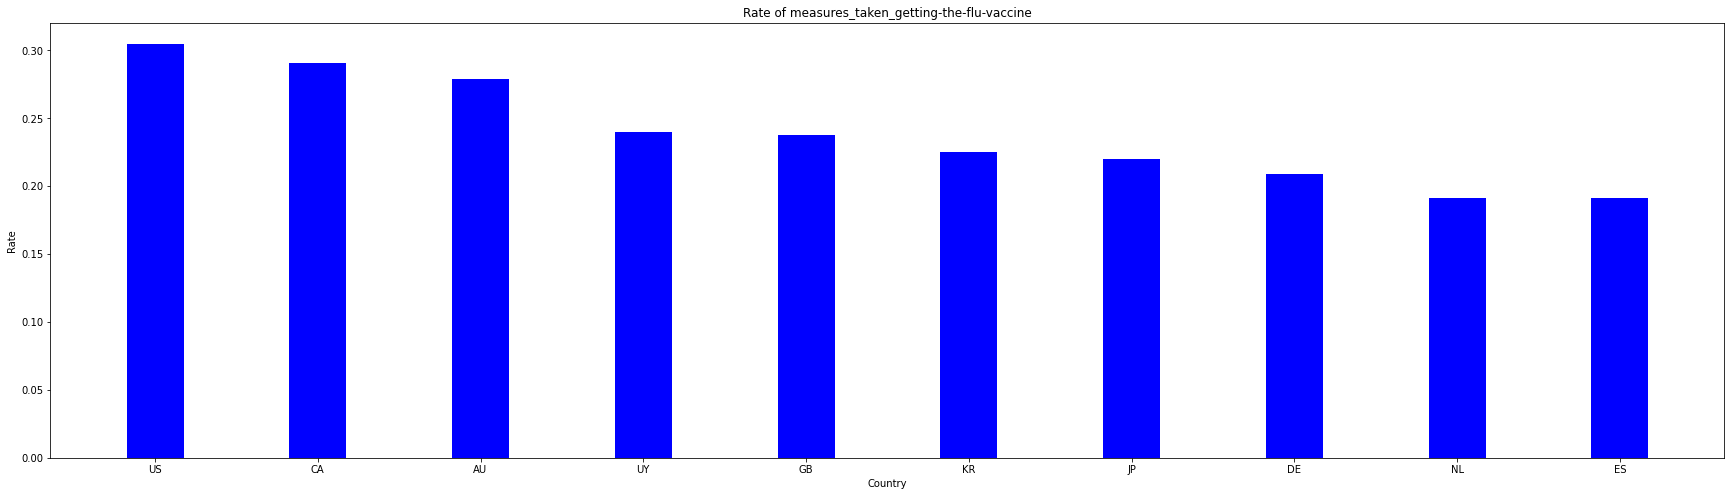

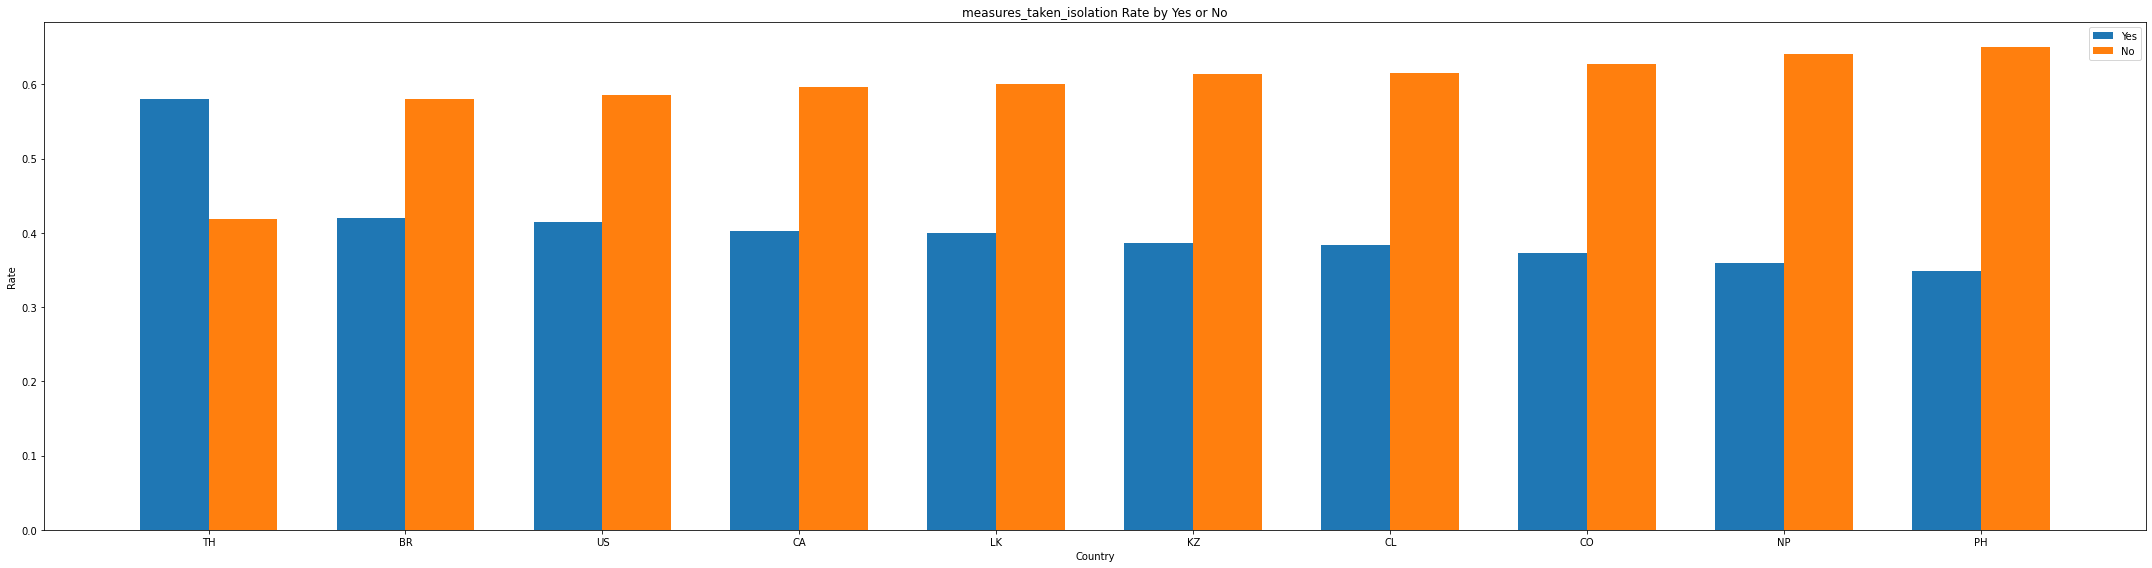

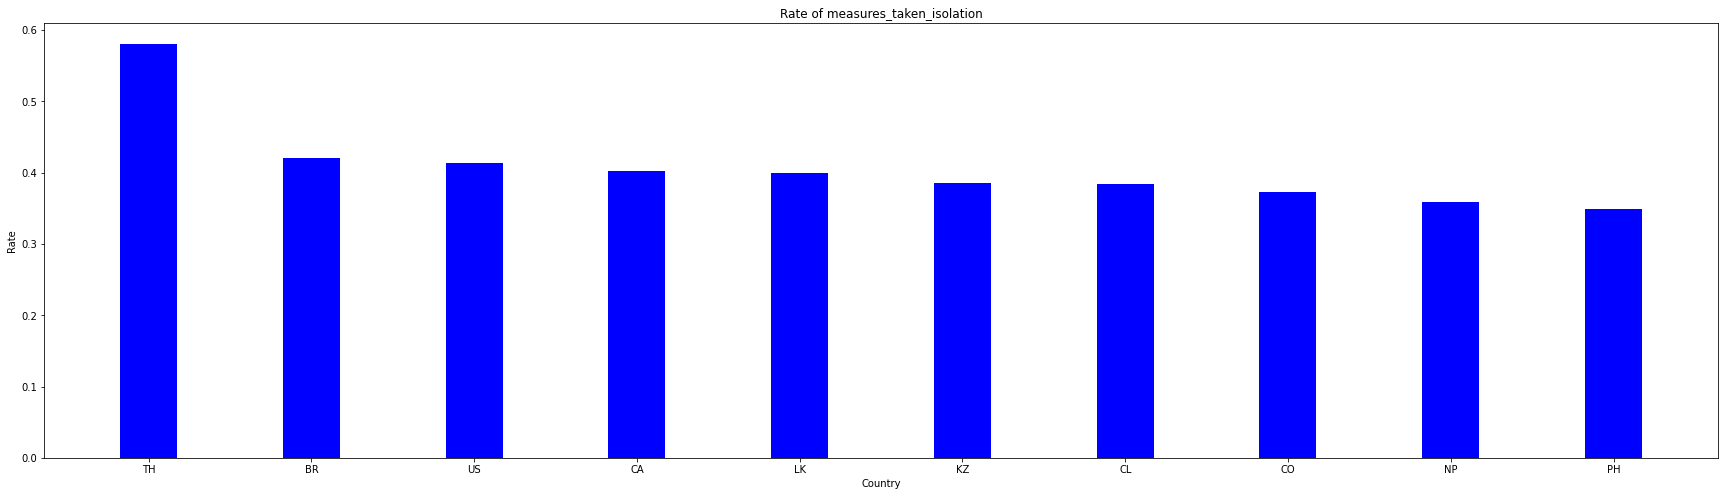

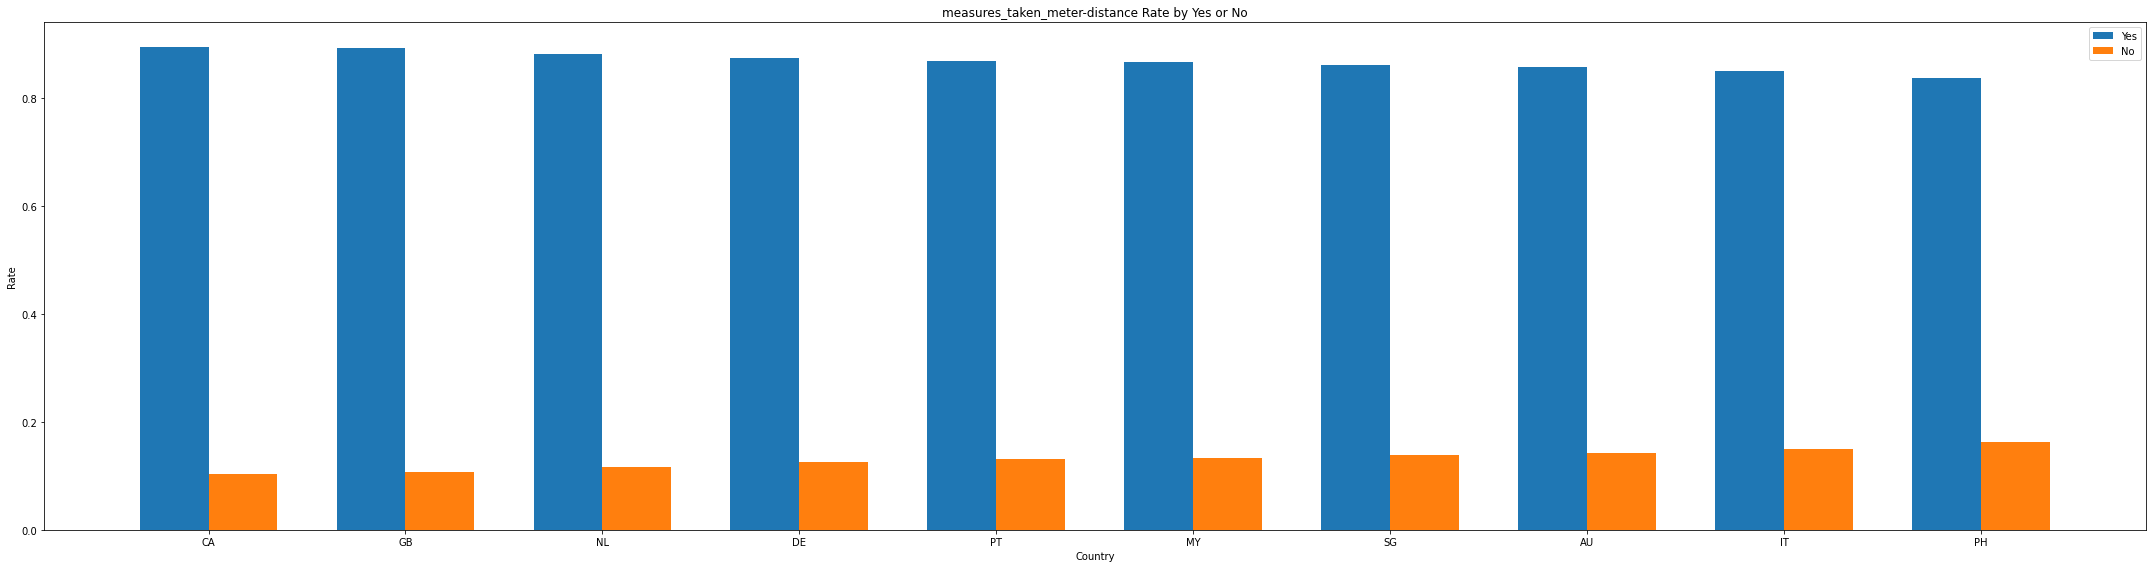

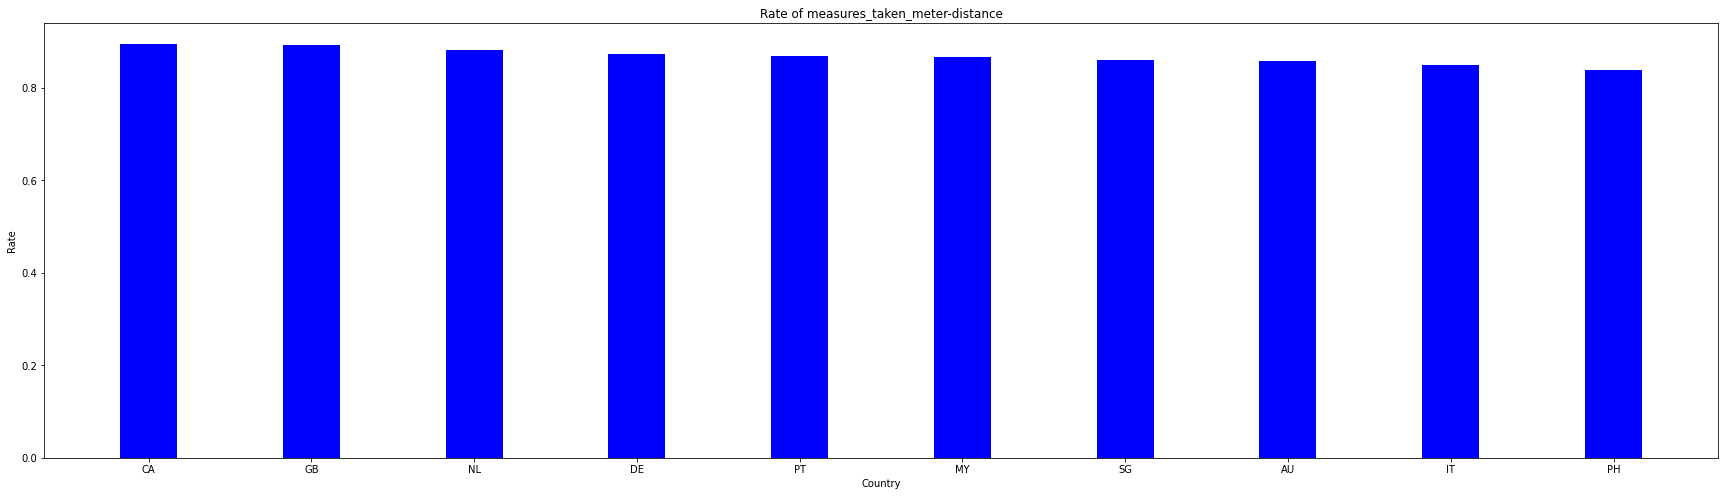

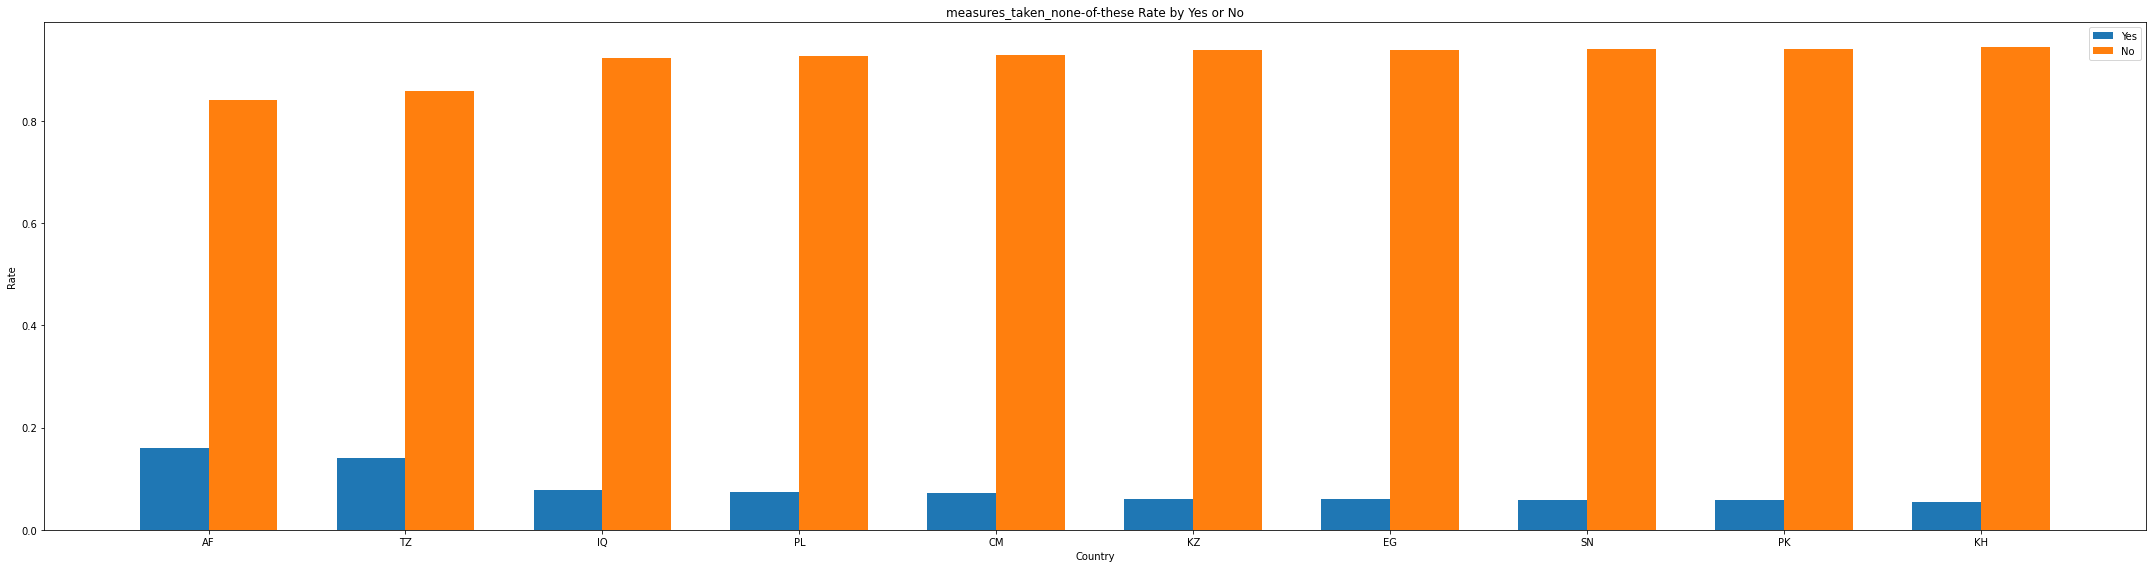

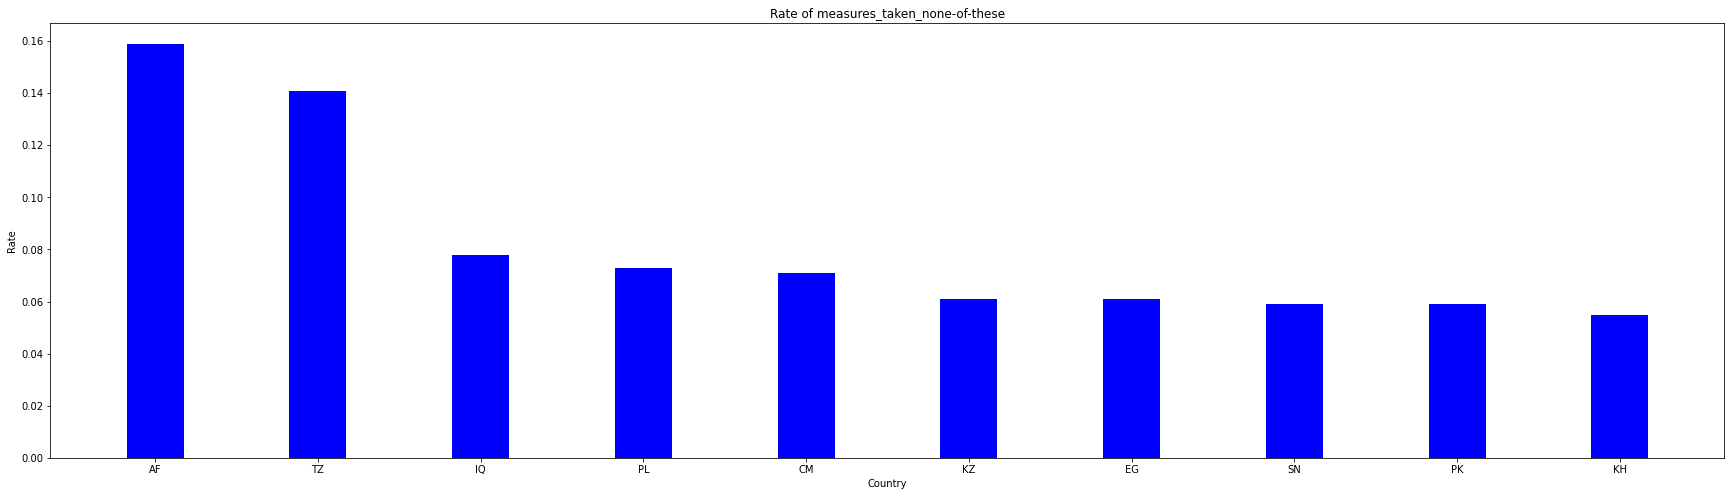

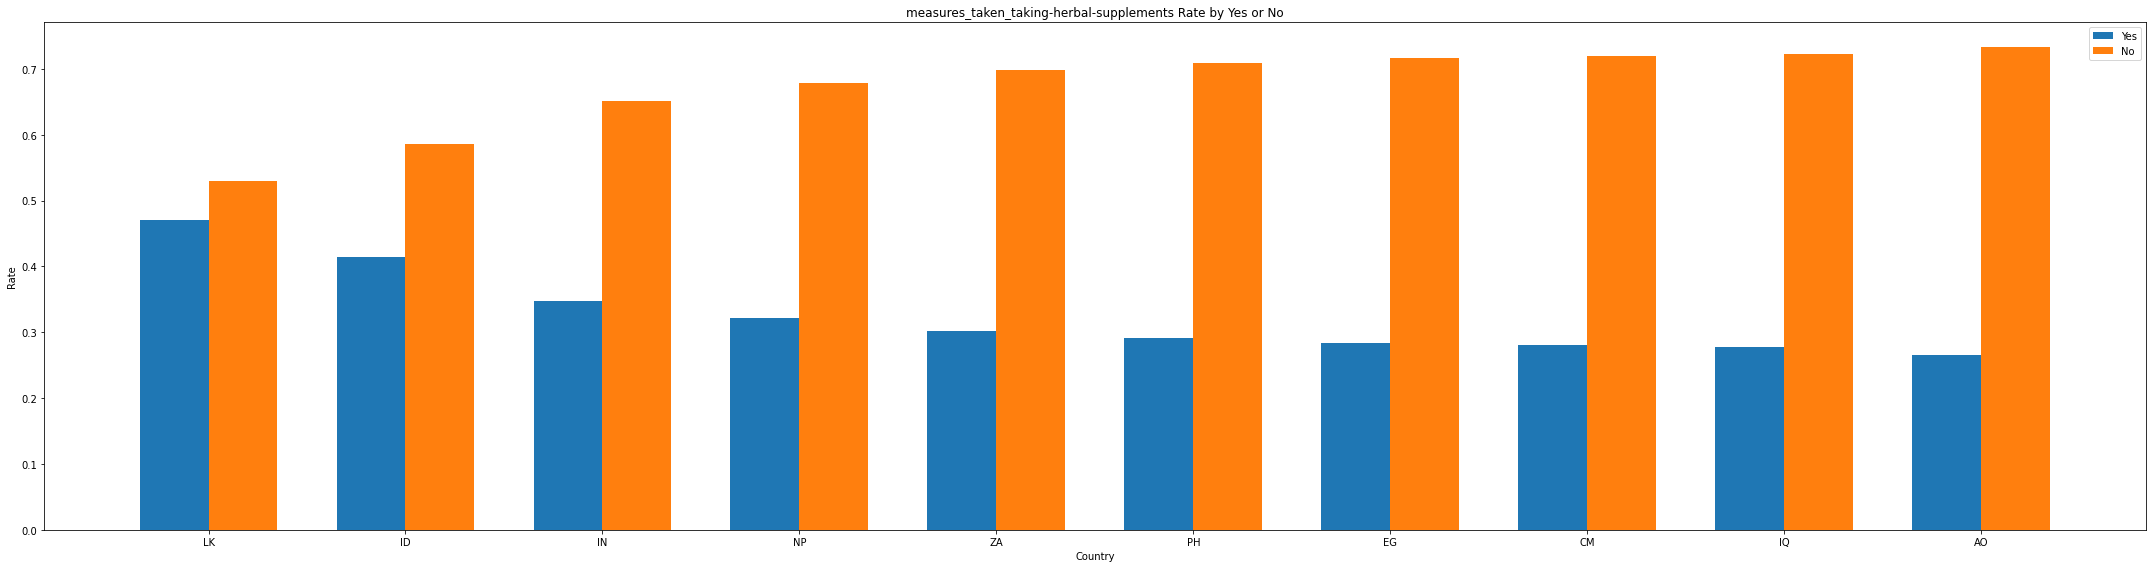

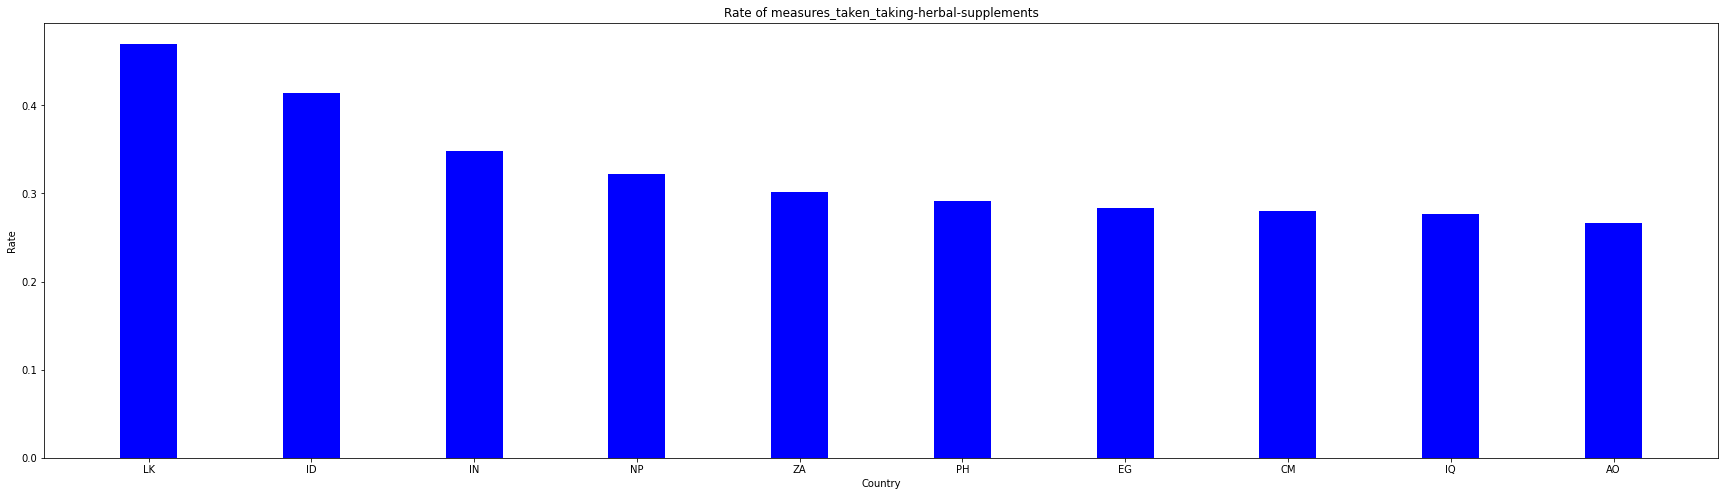

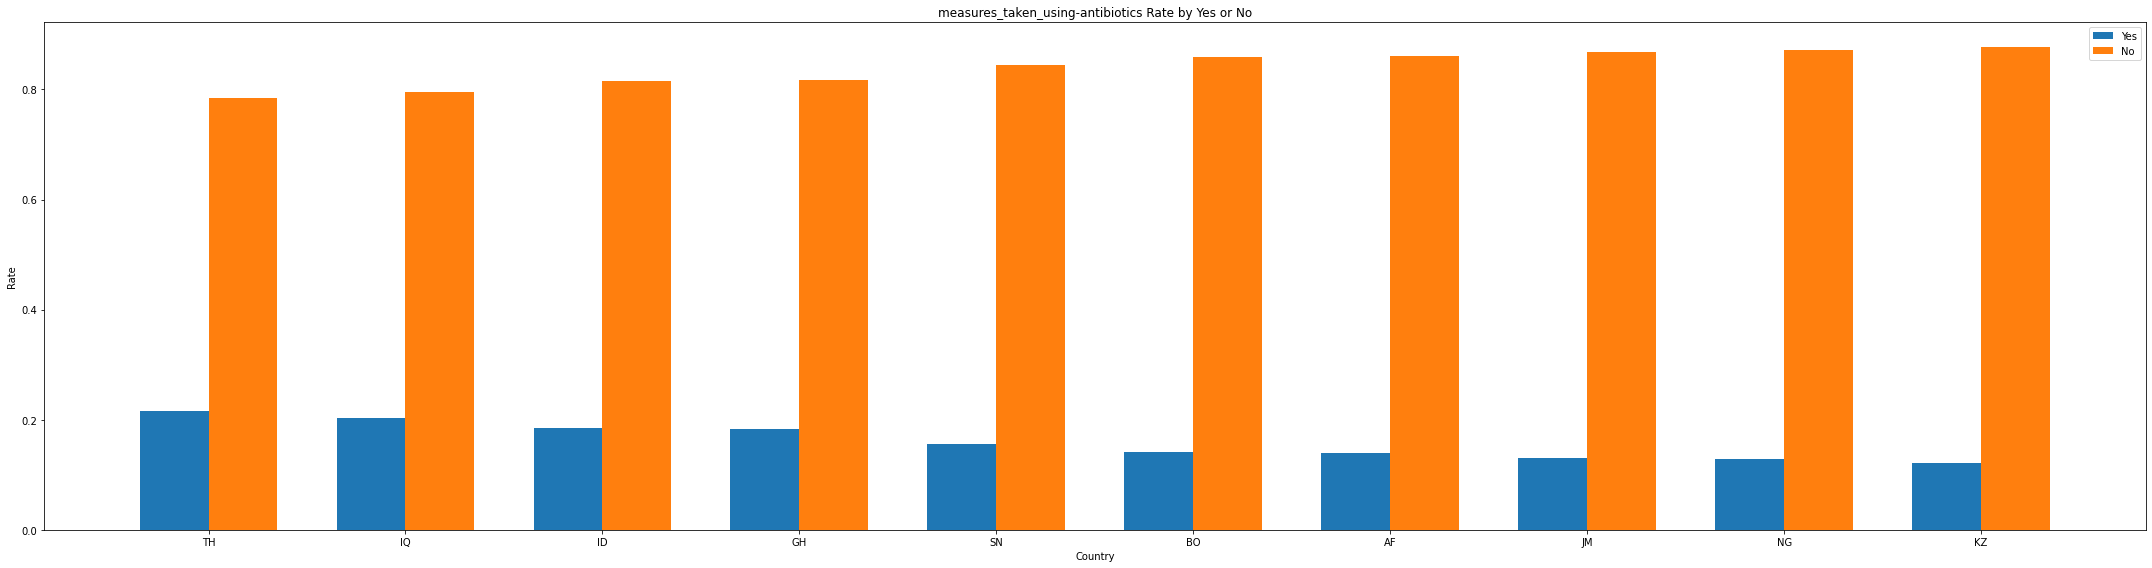

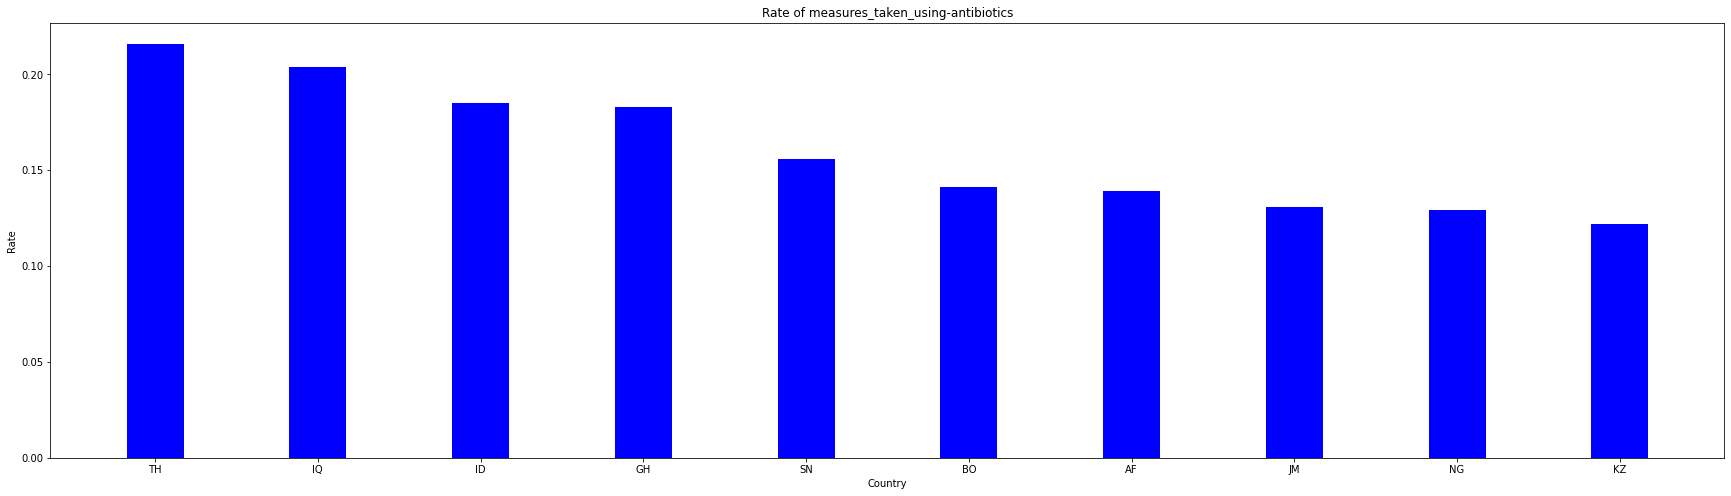

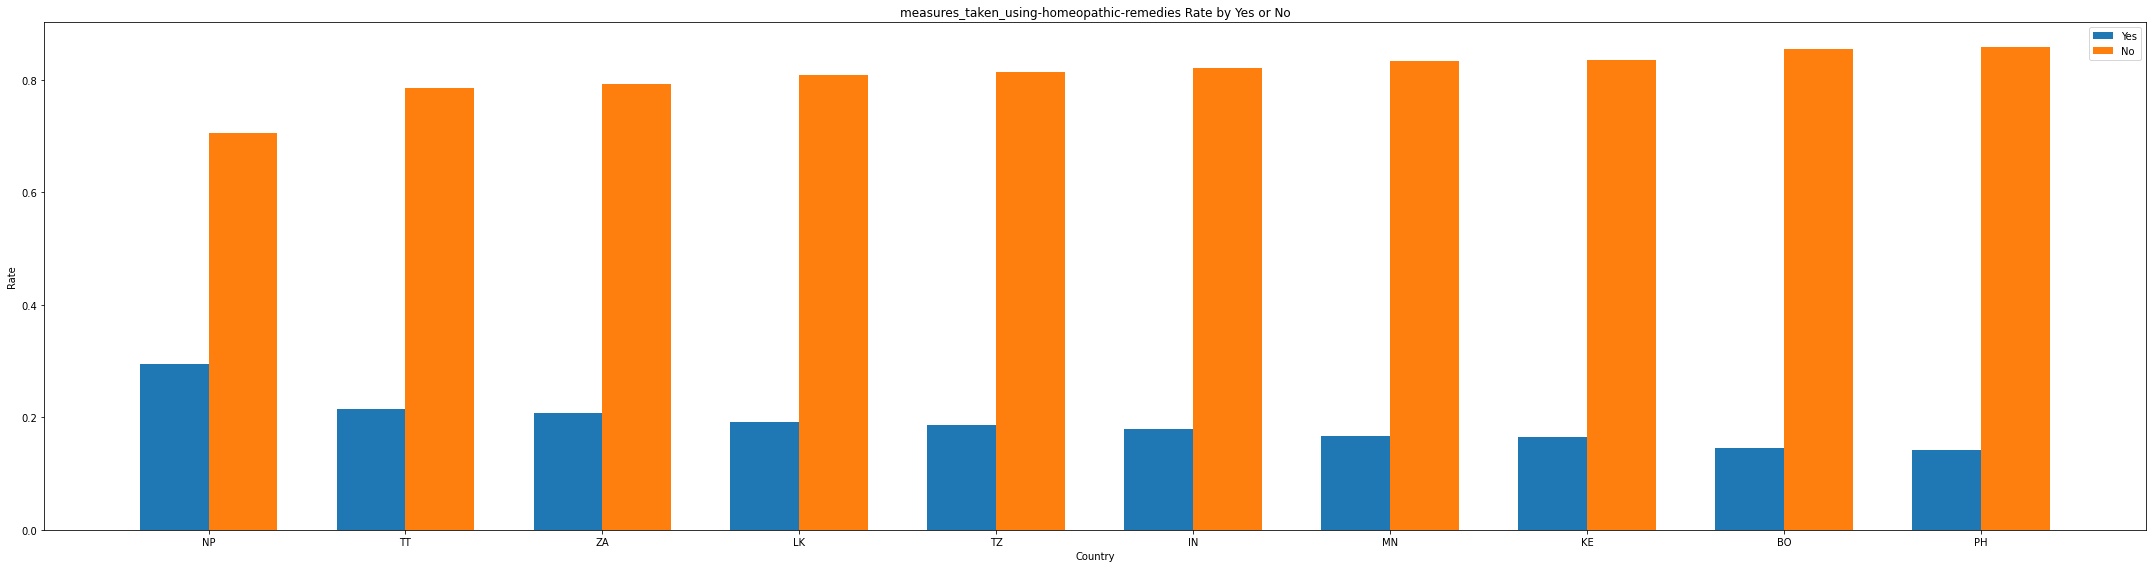

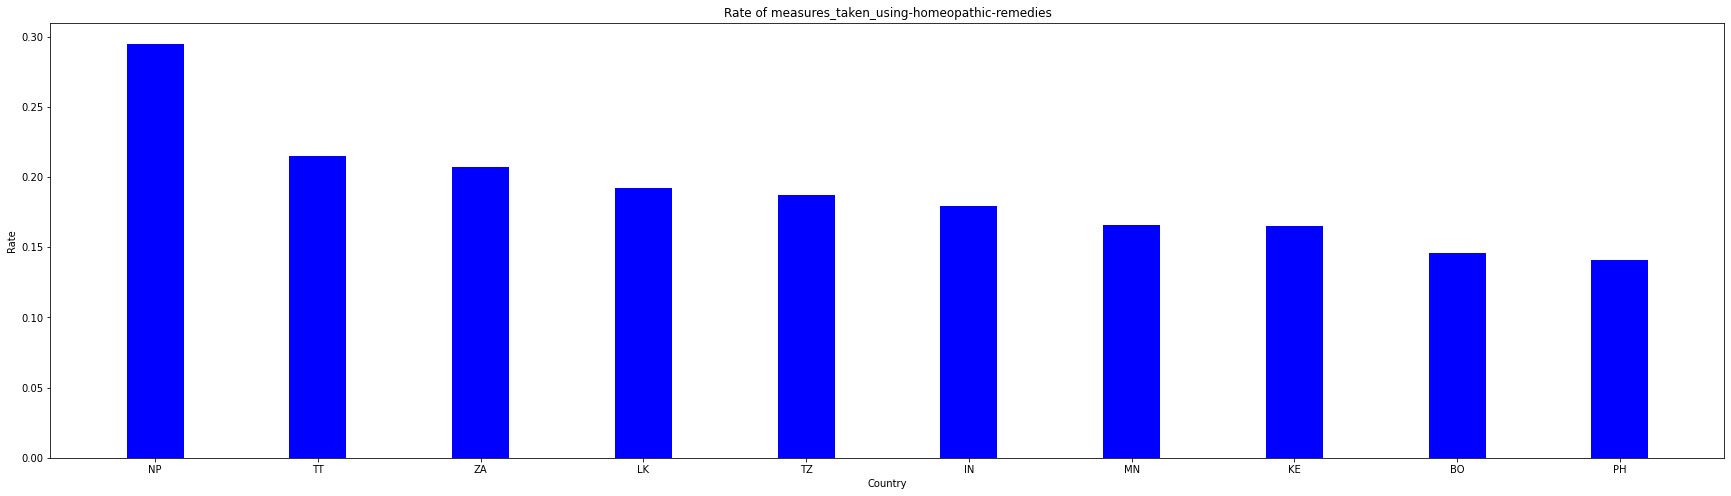

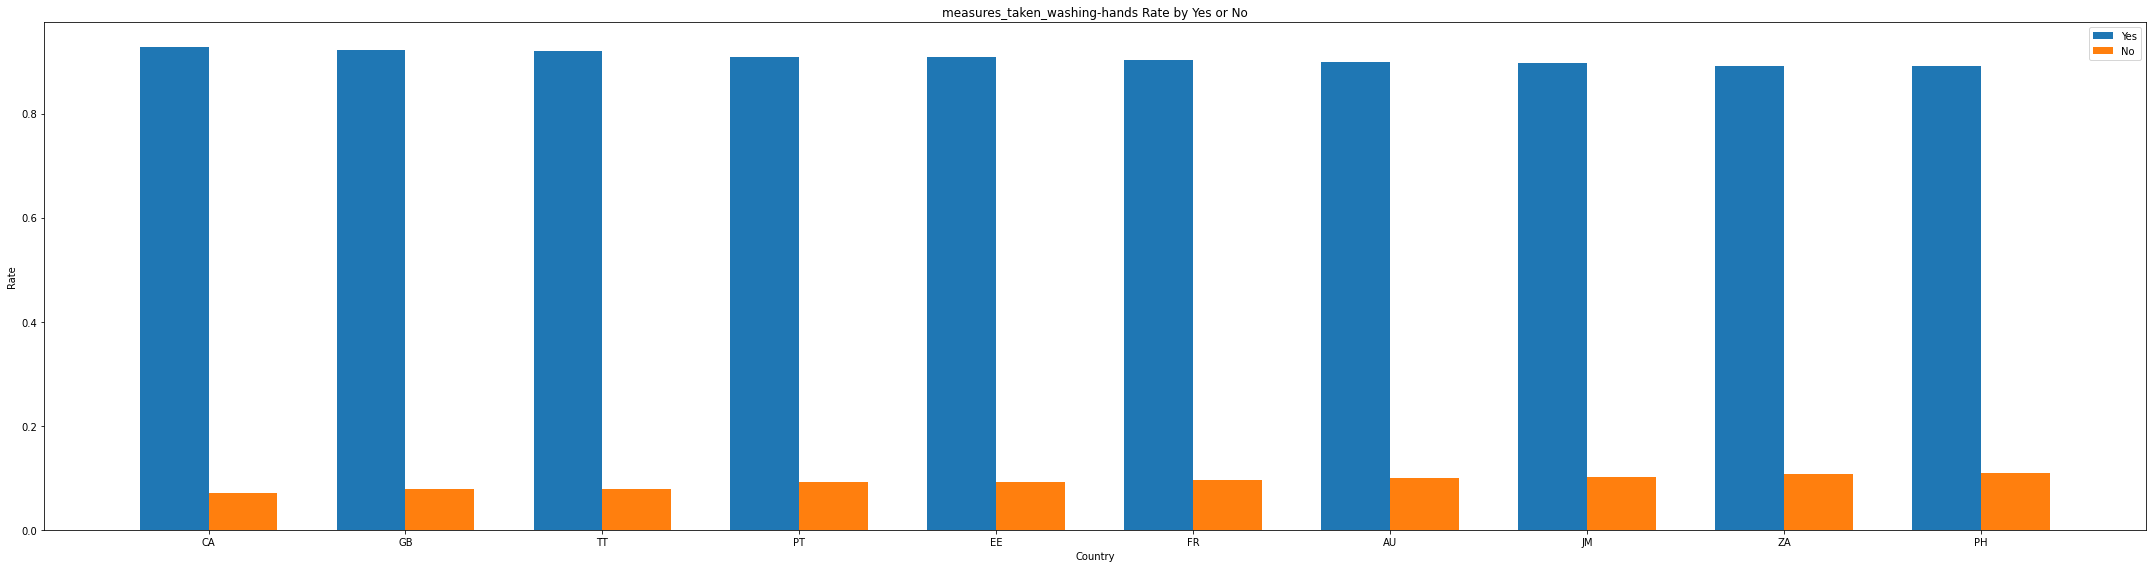

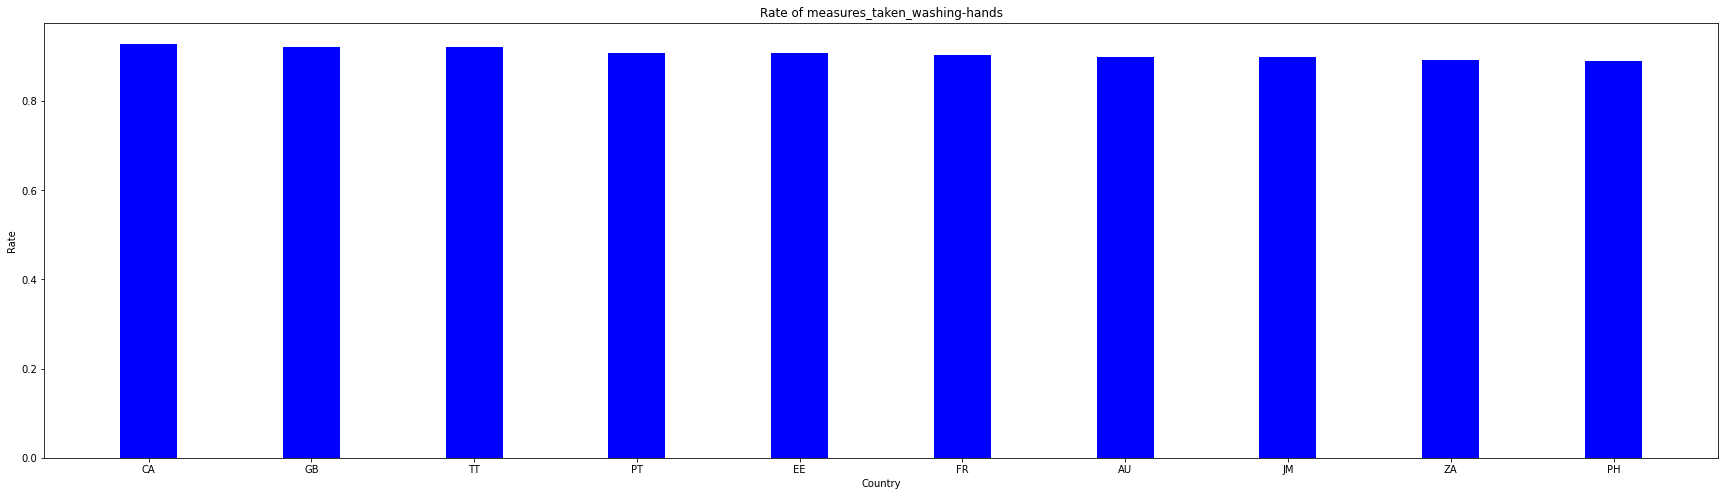

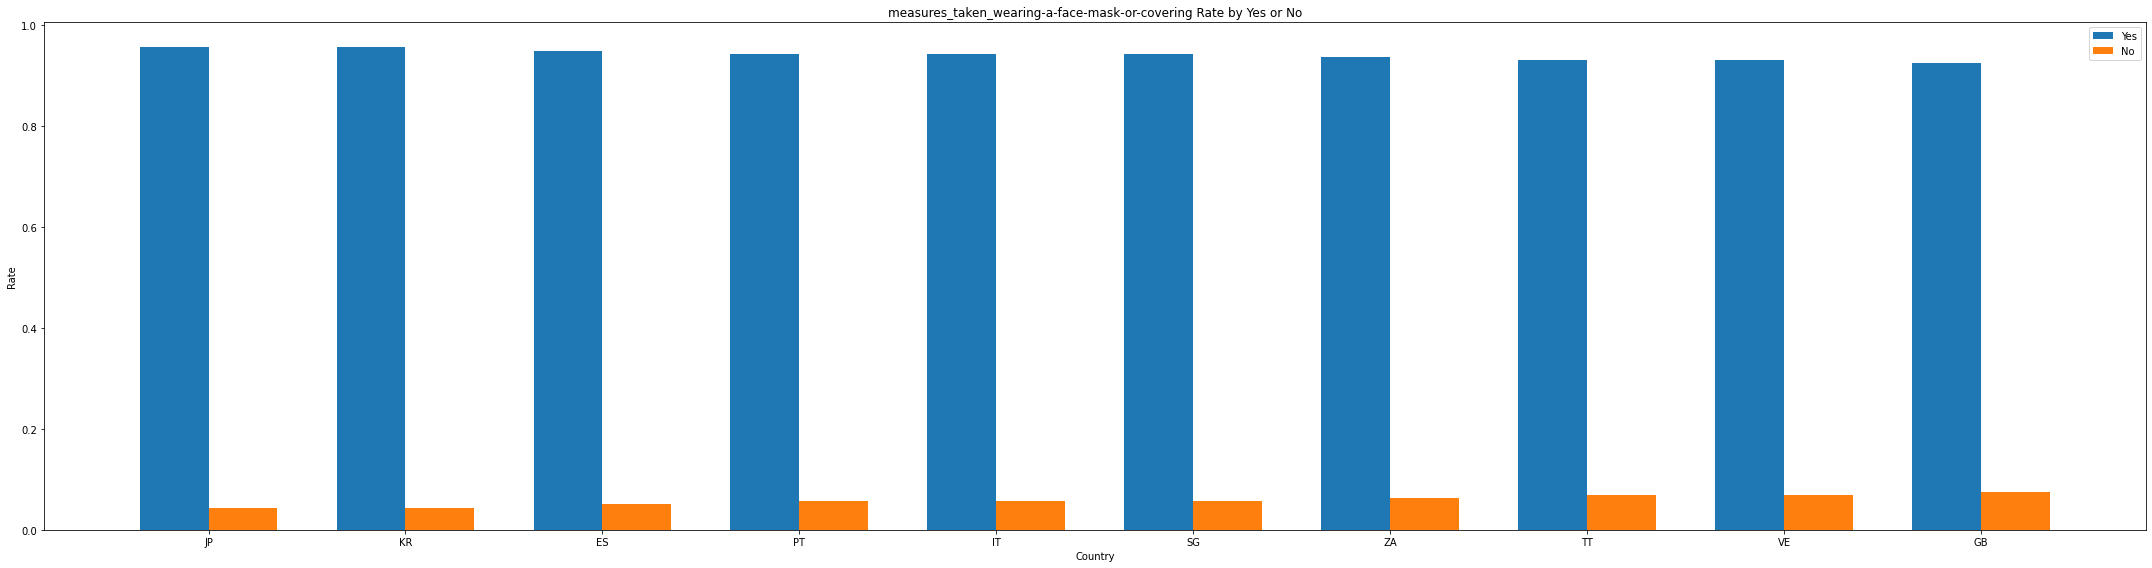

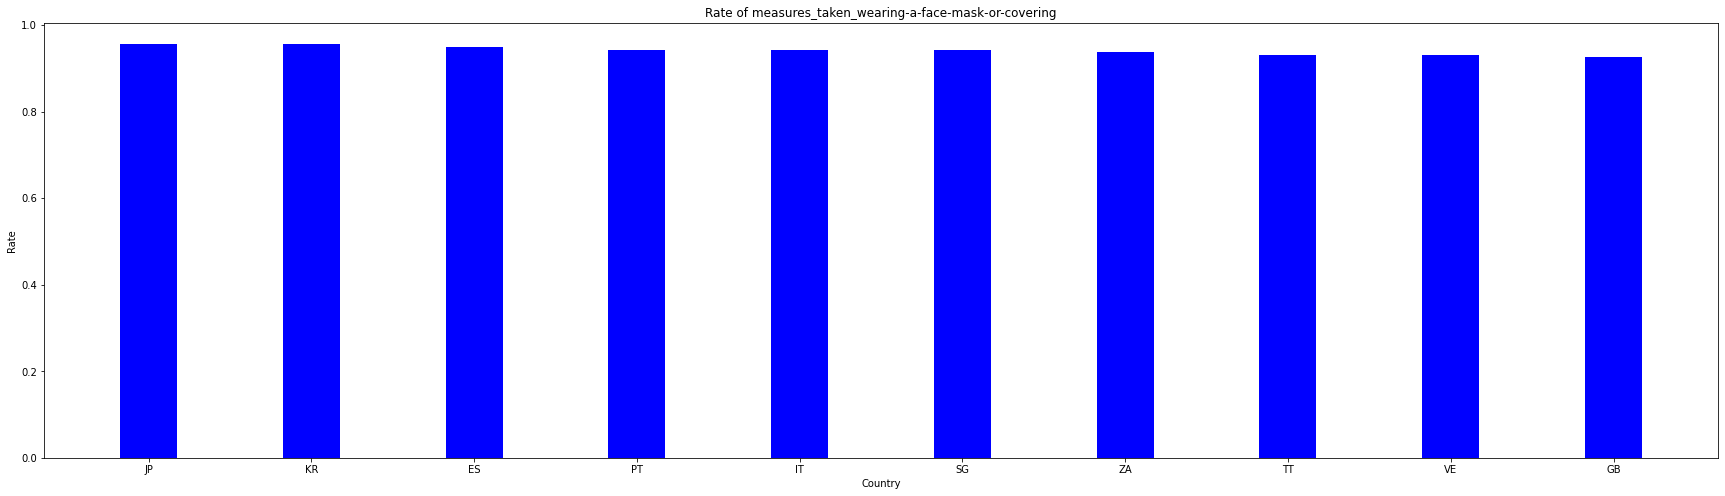

In [ ]:
measures_taken = column_title_list[87:119]

for i in range(0, len(measures_taken), 2):
  df_temp = df_mit[["country", measures_taken[i], measures_taken[i+1]]].sort_values(by=measures_taken[i]).head(10)
  grouped_bar(df_temp, measures_taken[i], measures_taken[i+1], measures_taken[i][:-3])
  just_bar(df_temp, measures_taken[i+1], measures_taken[i][:-3])

### News Source

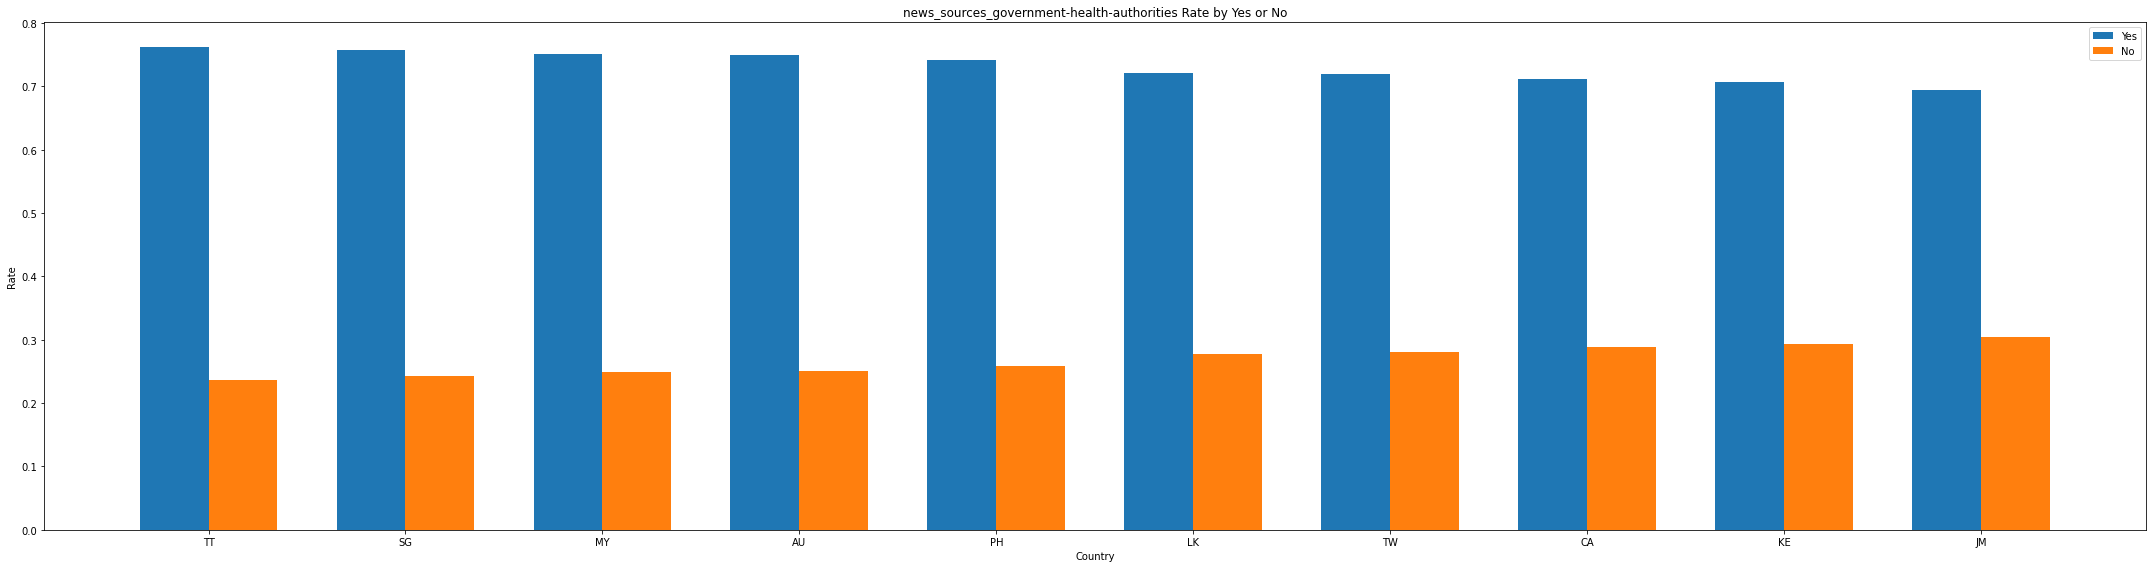

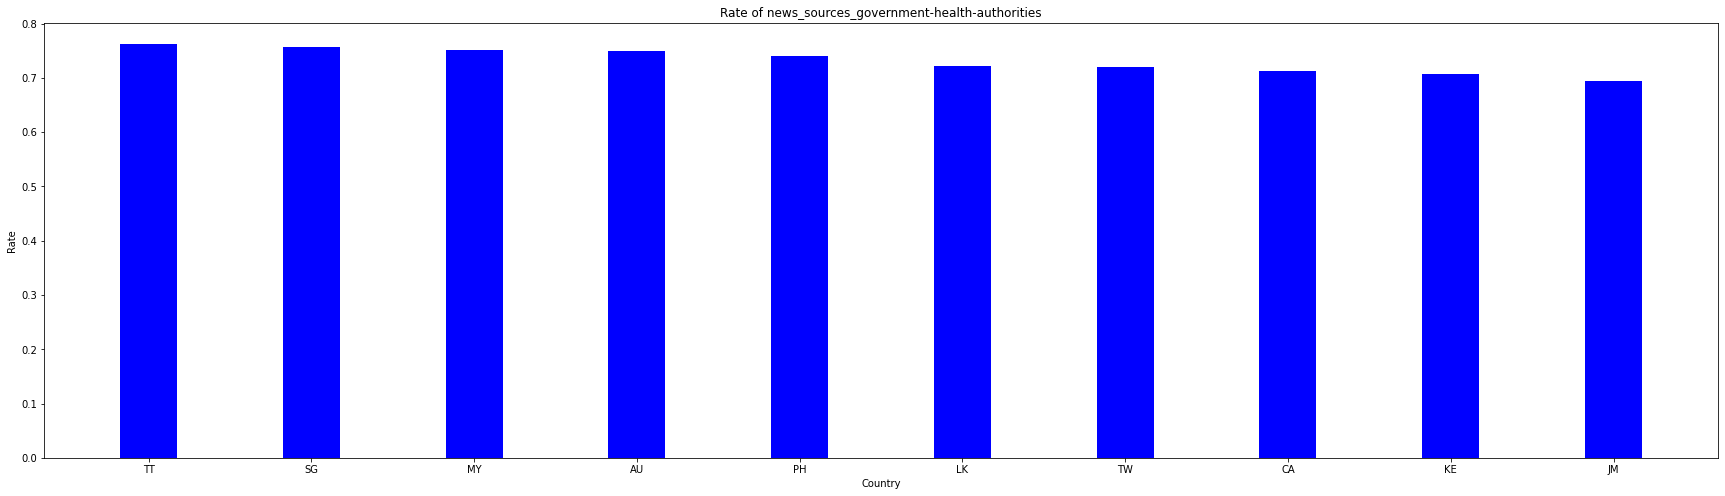

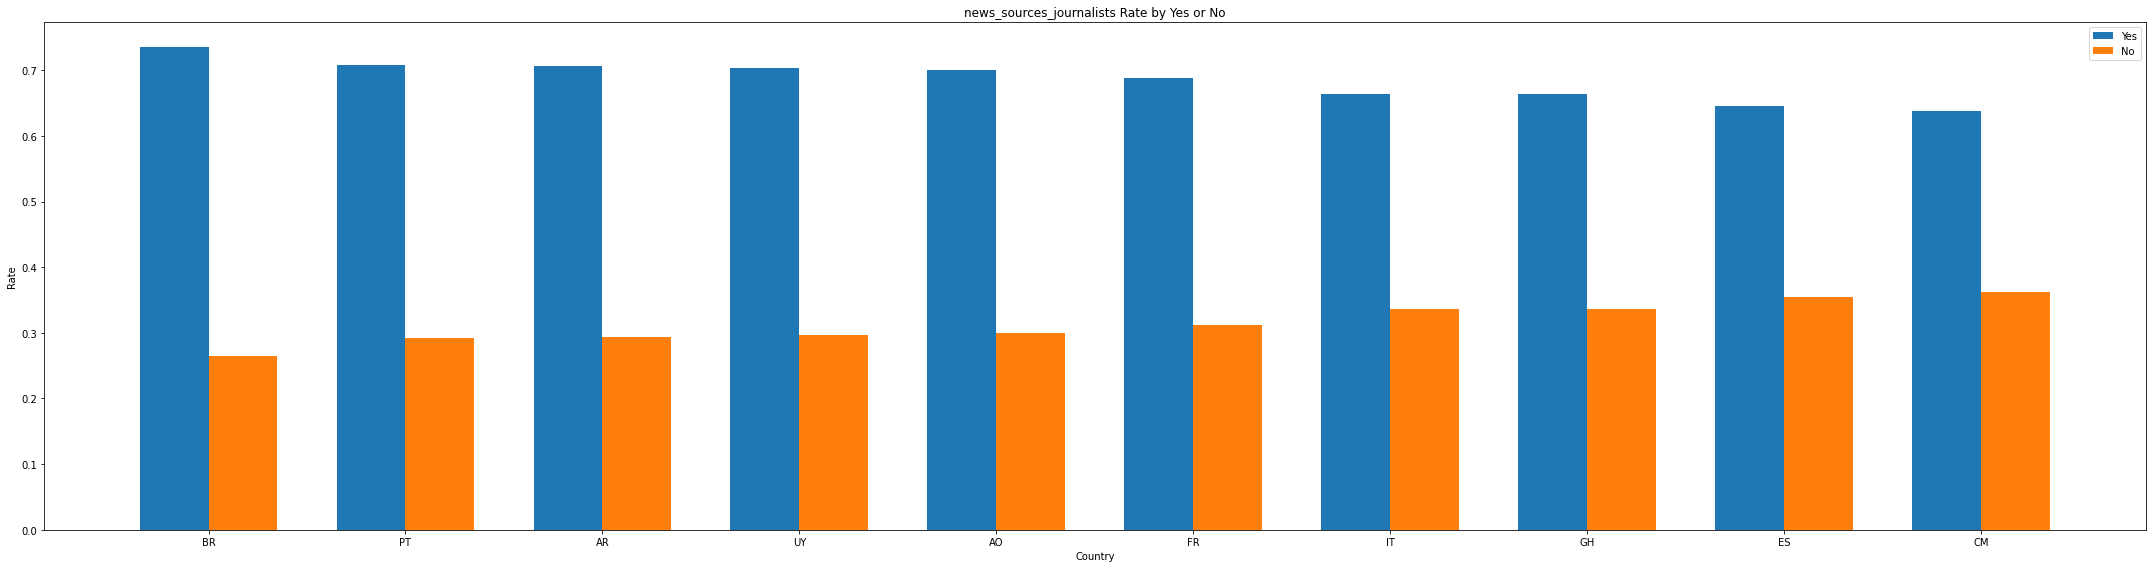

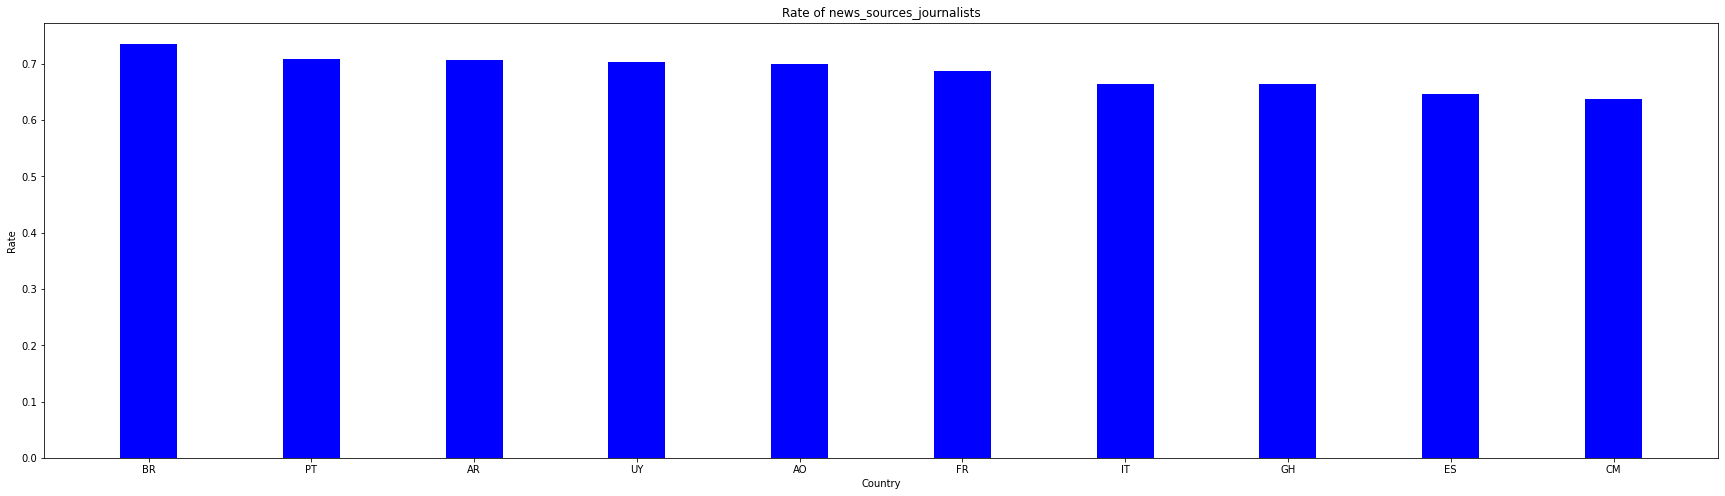

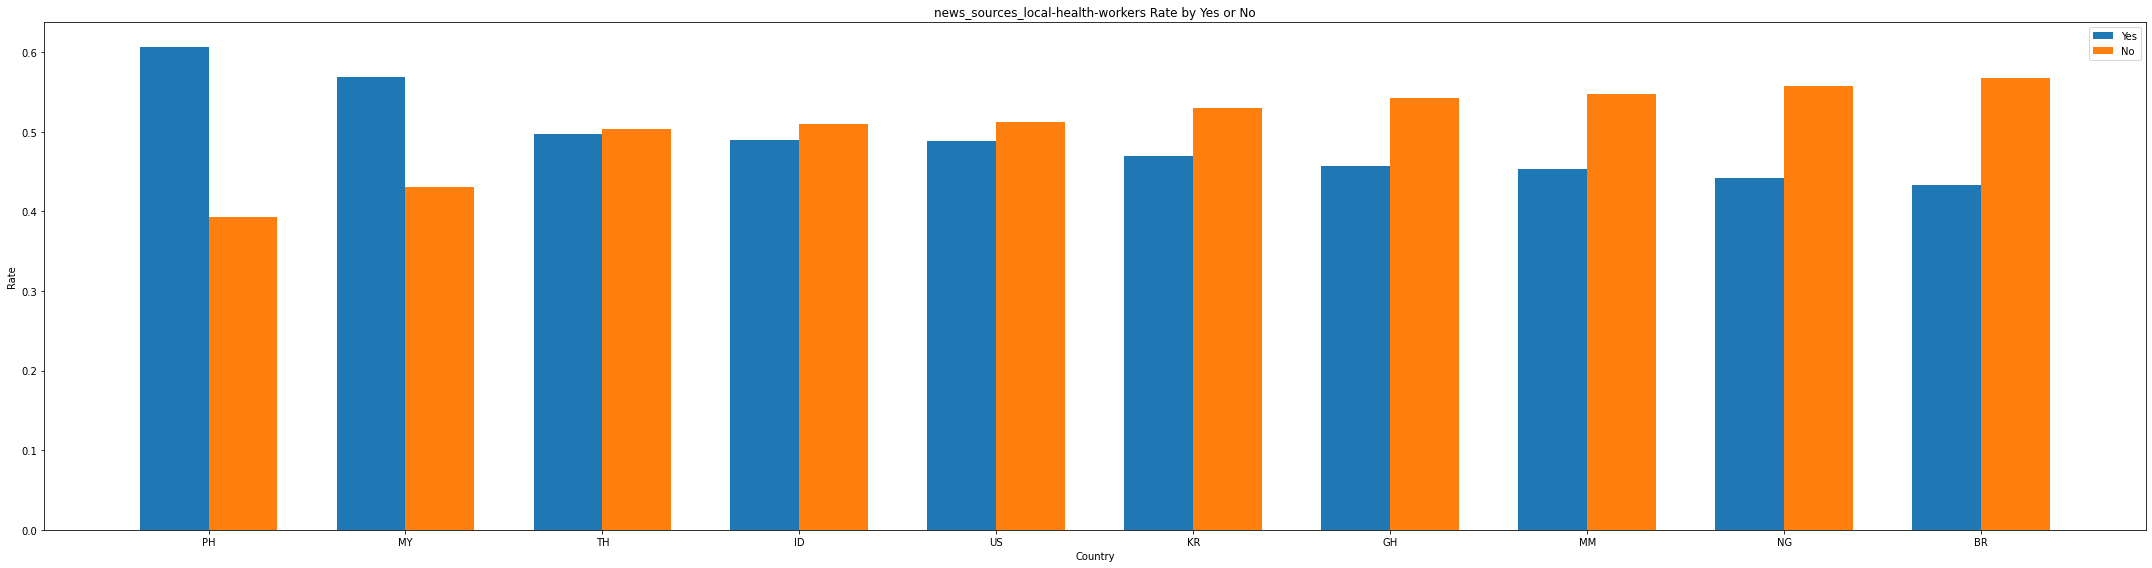

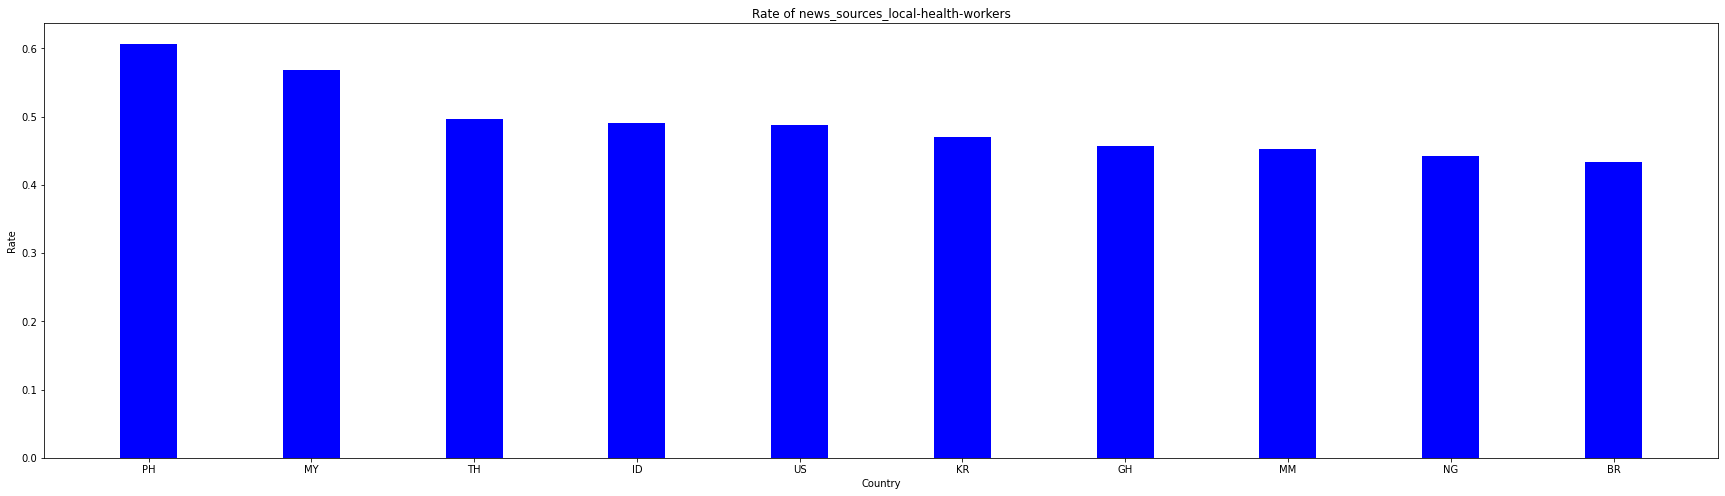

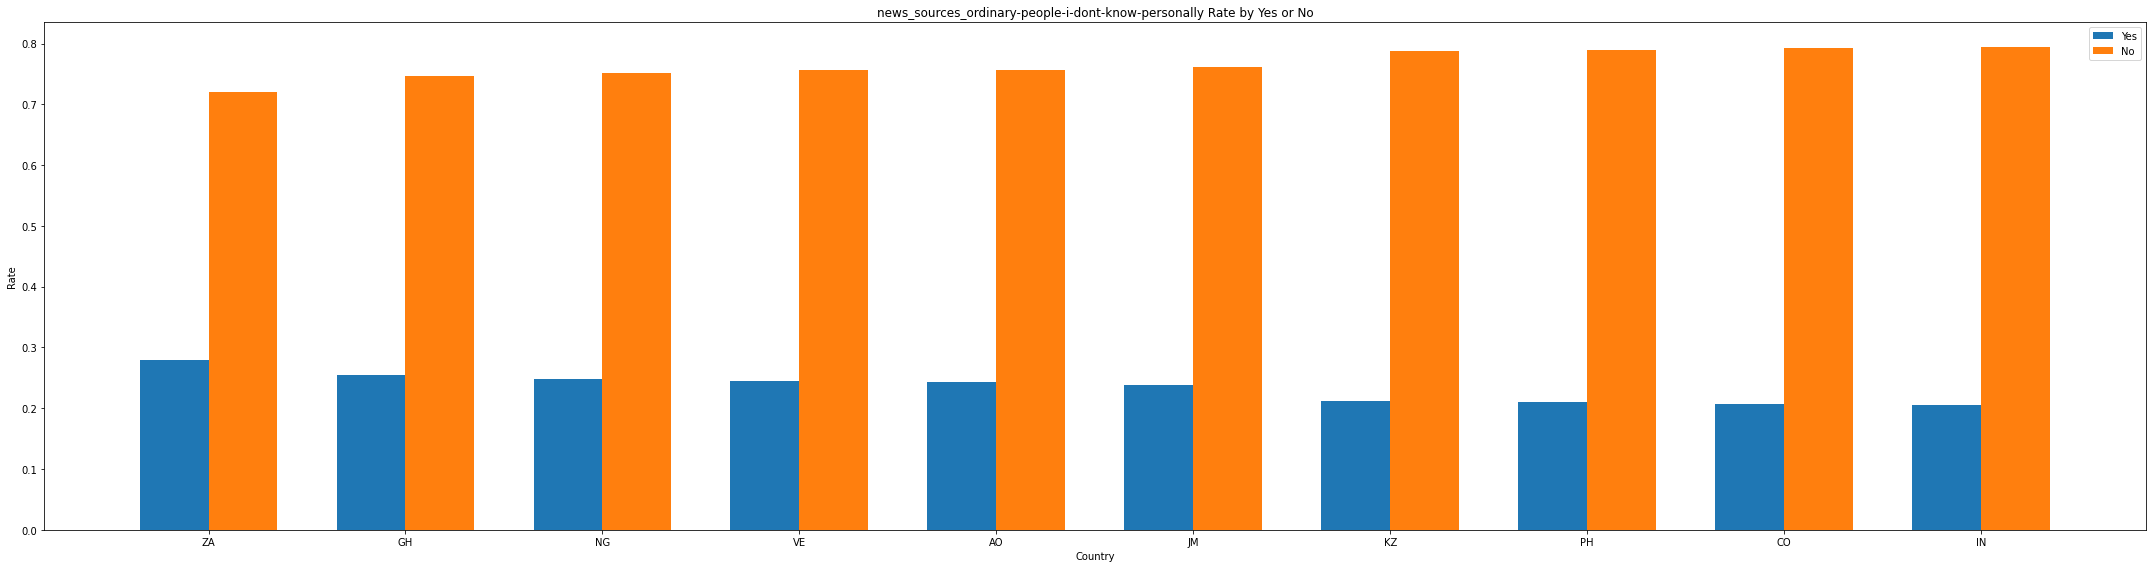

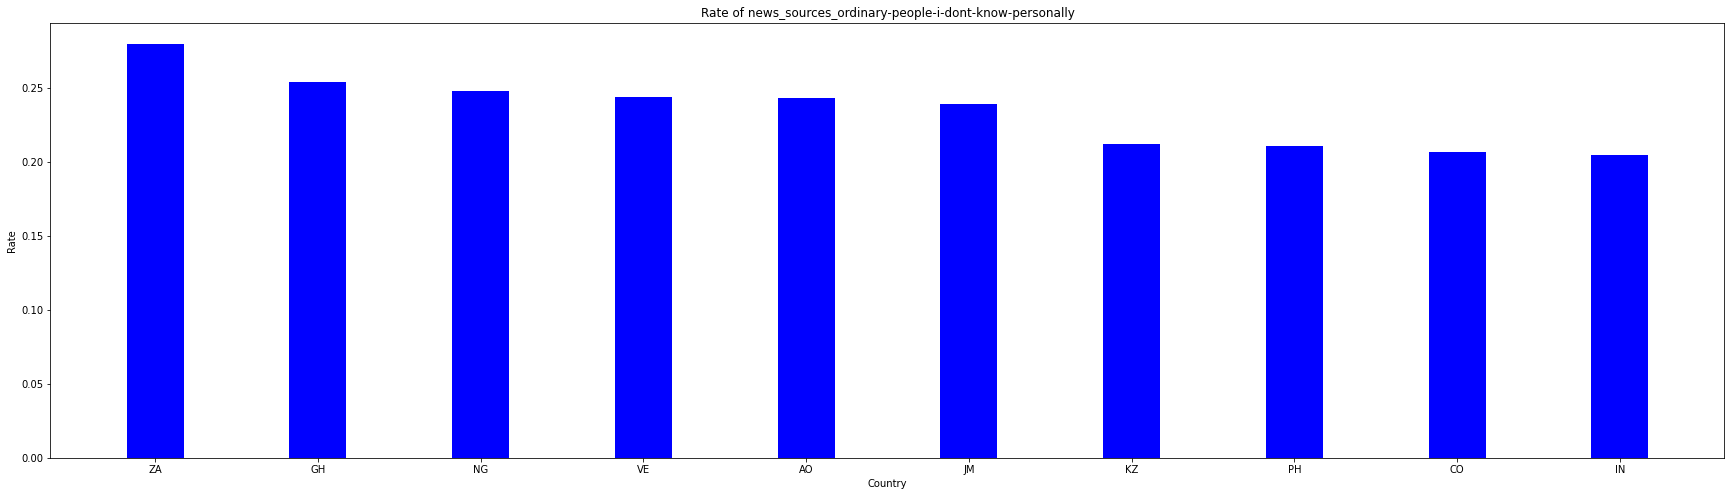

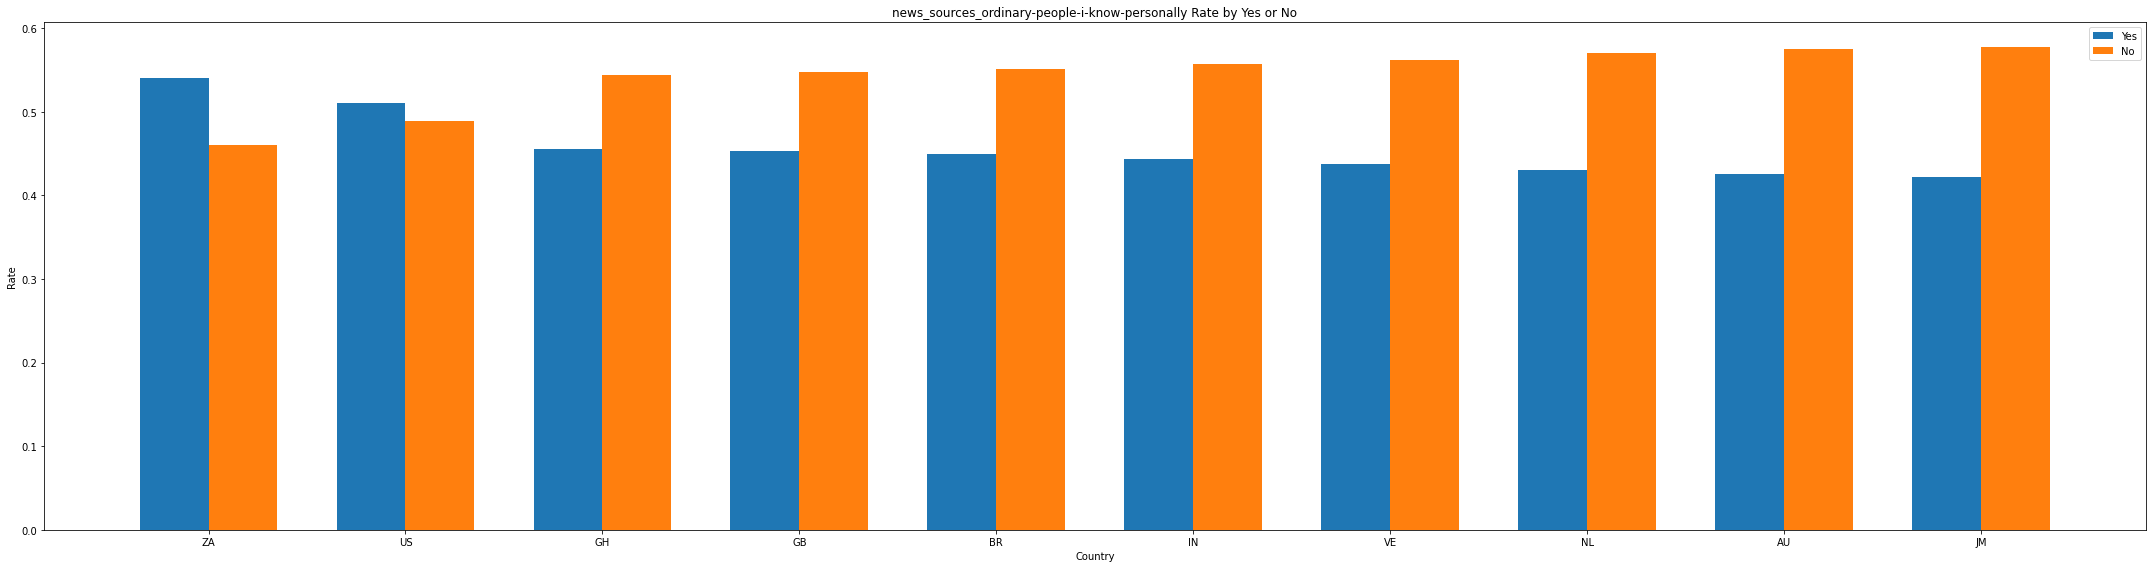

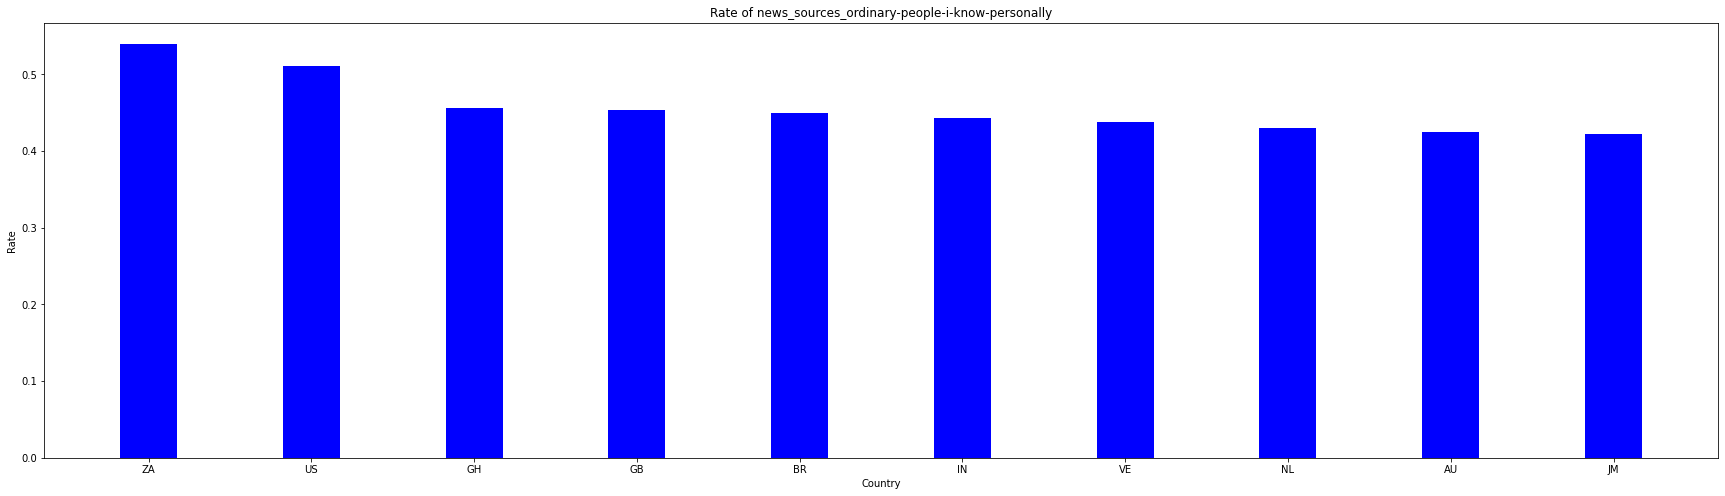

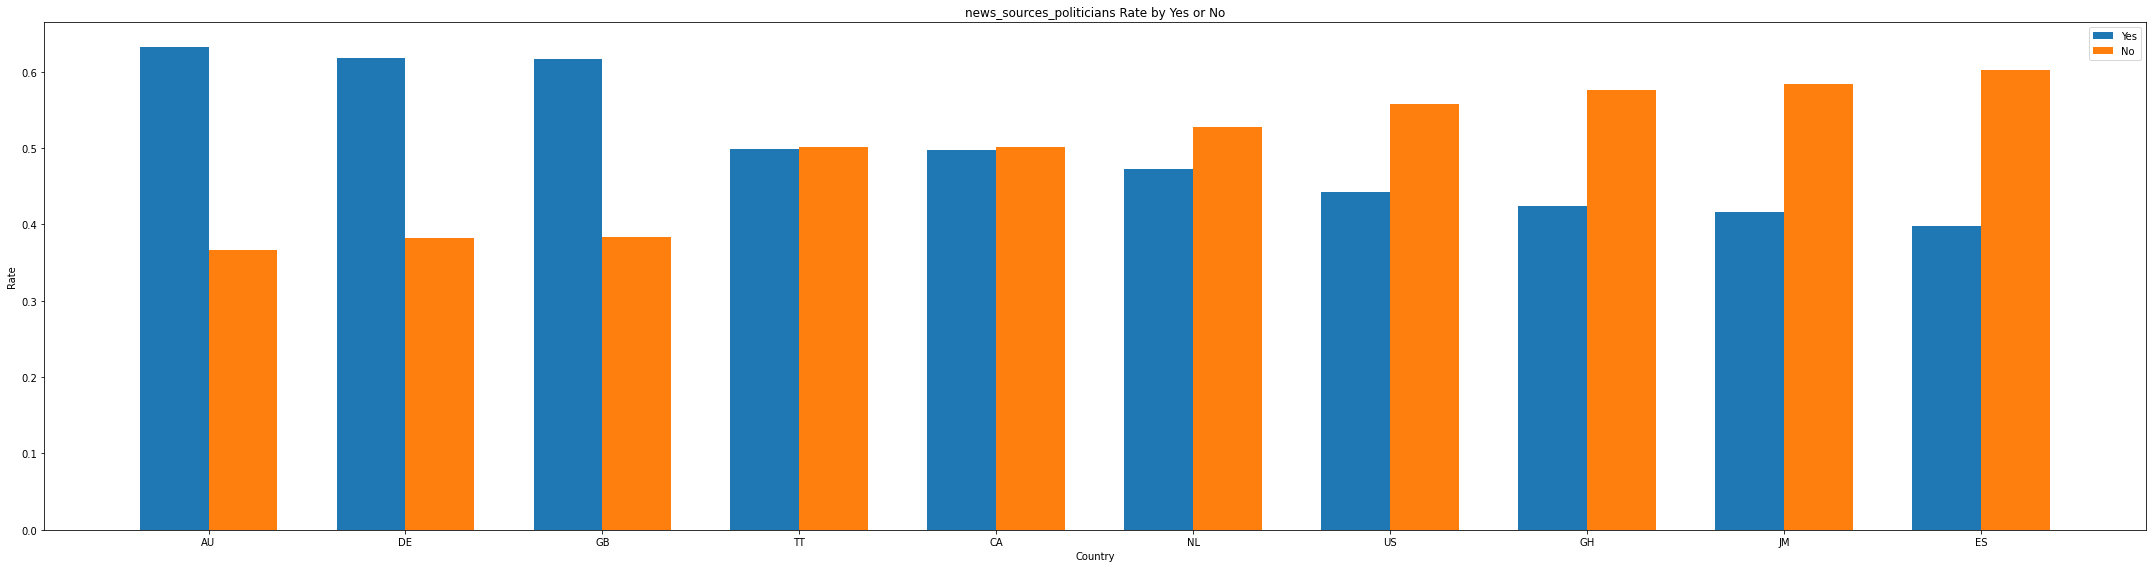

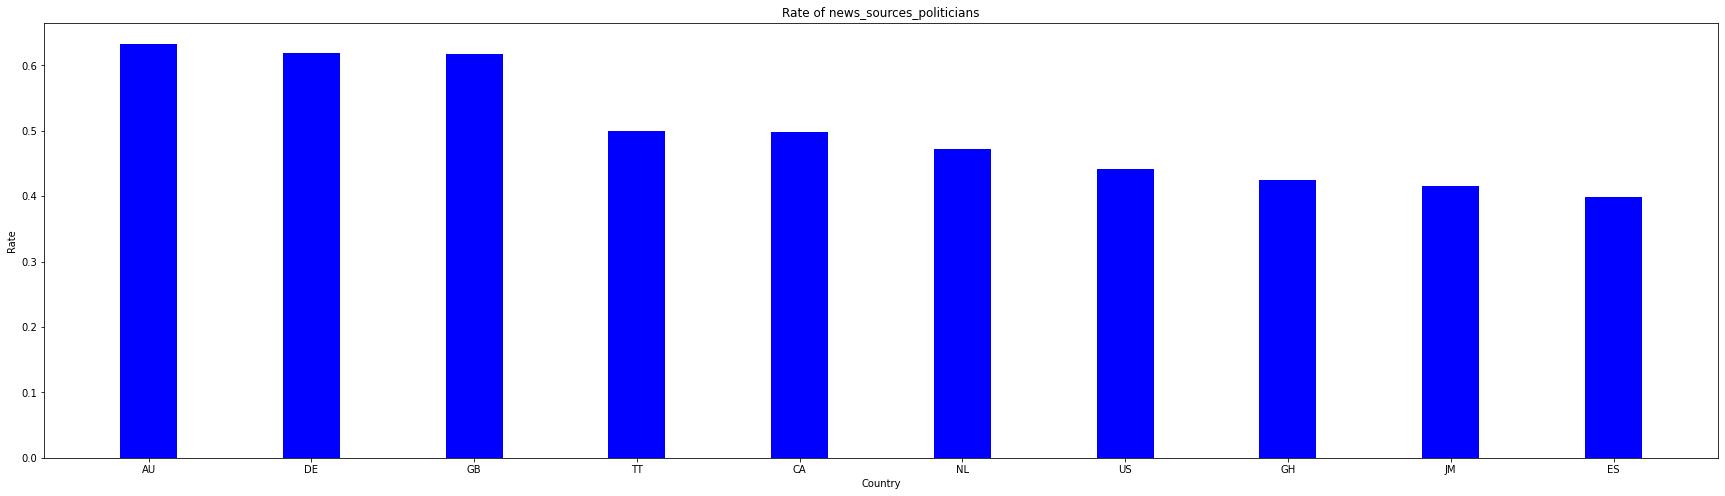

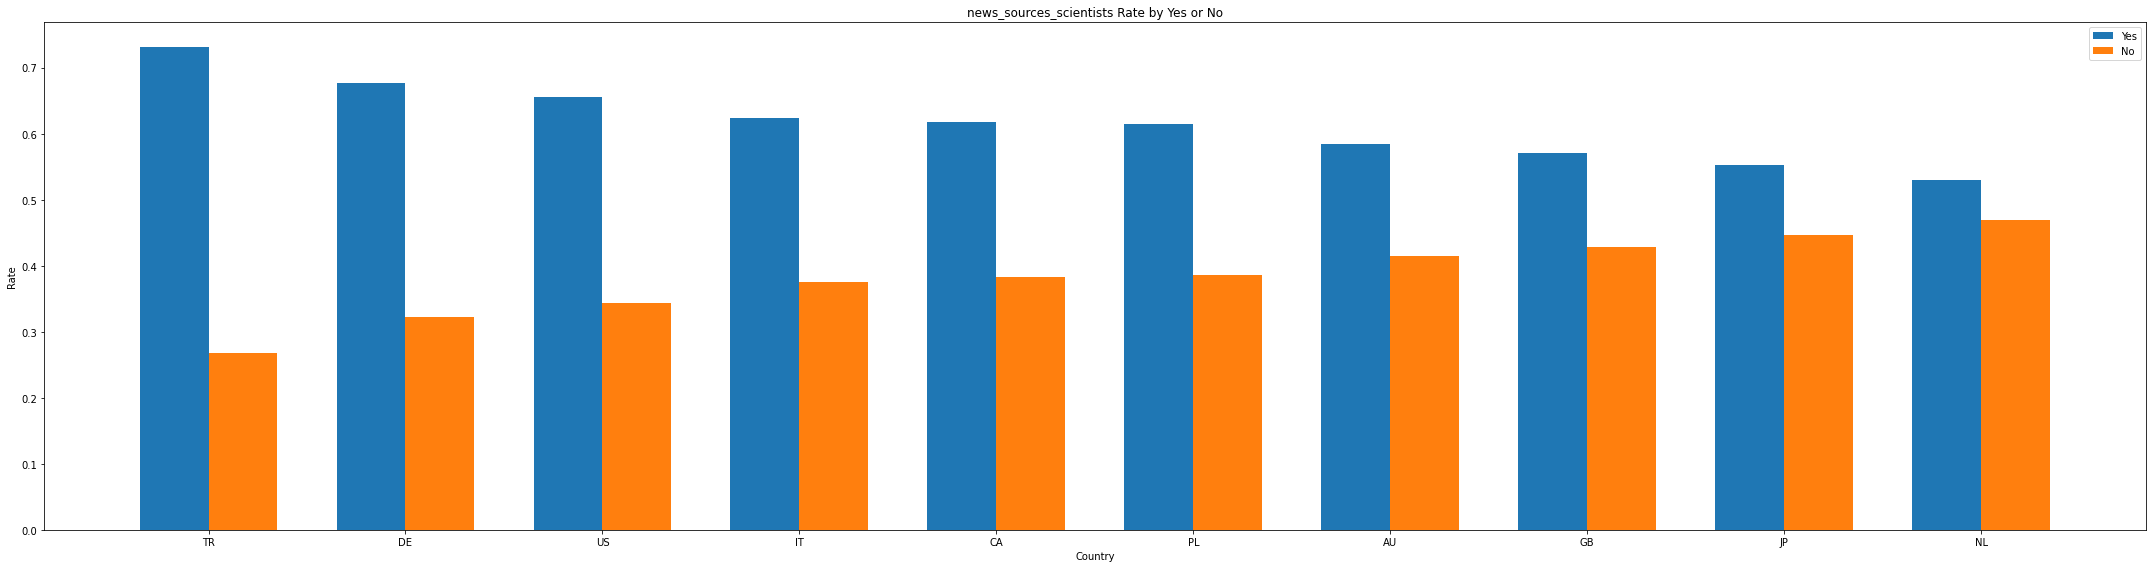

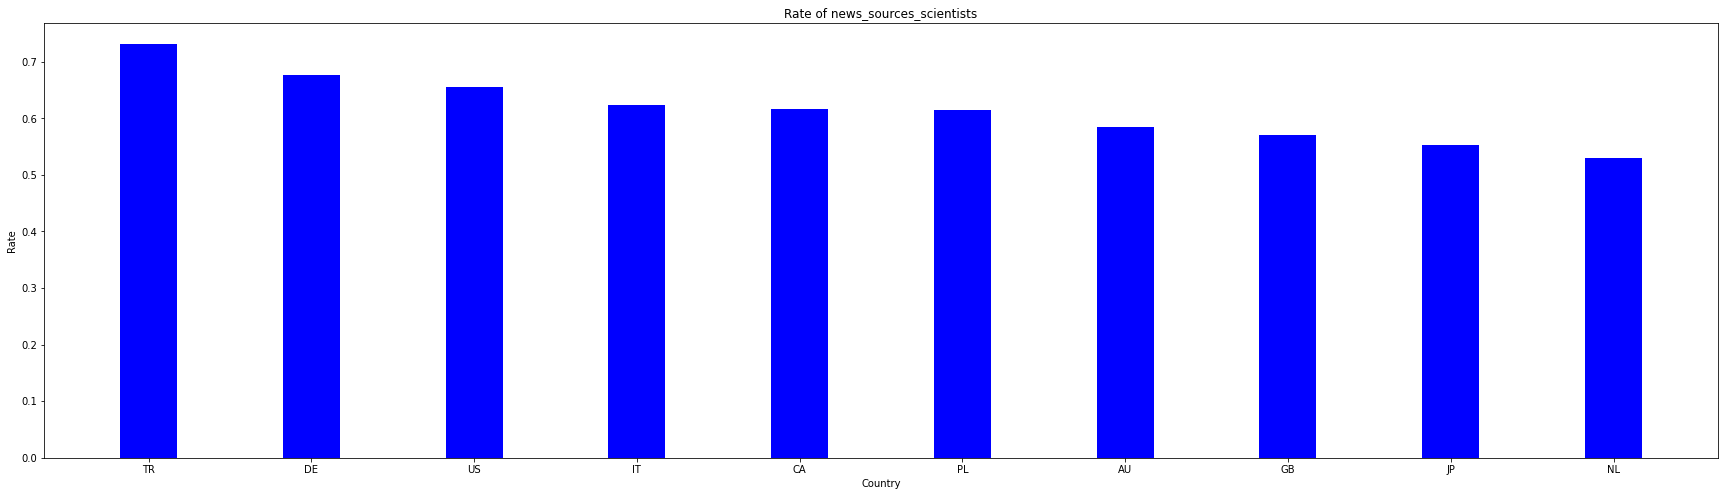

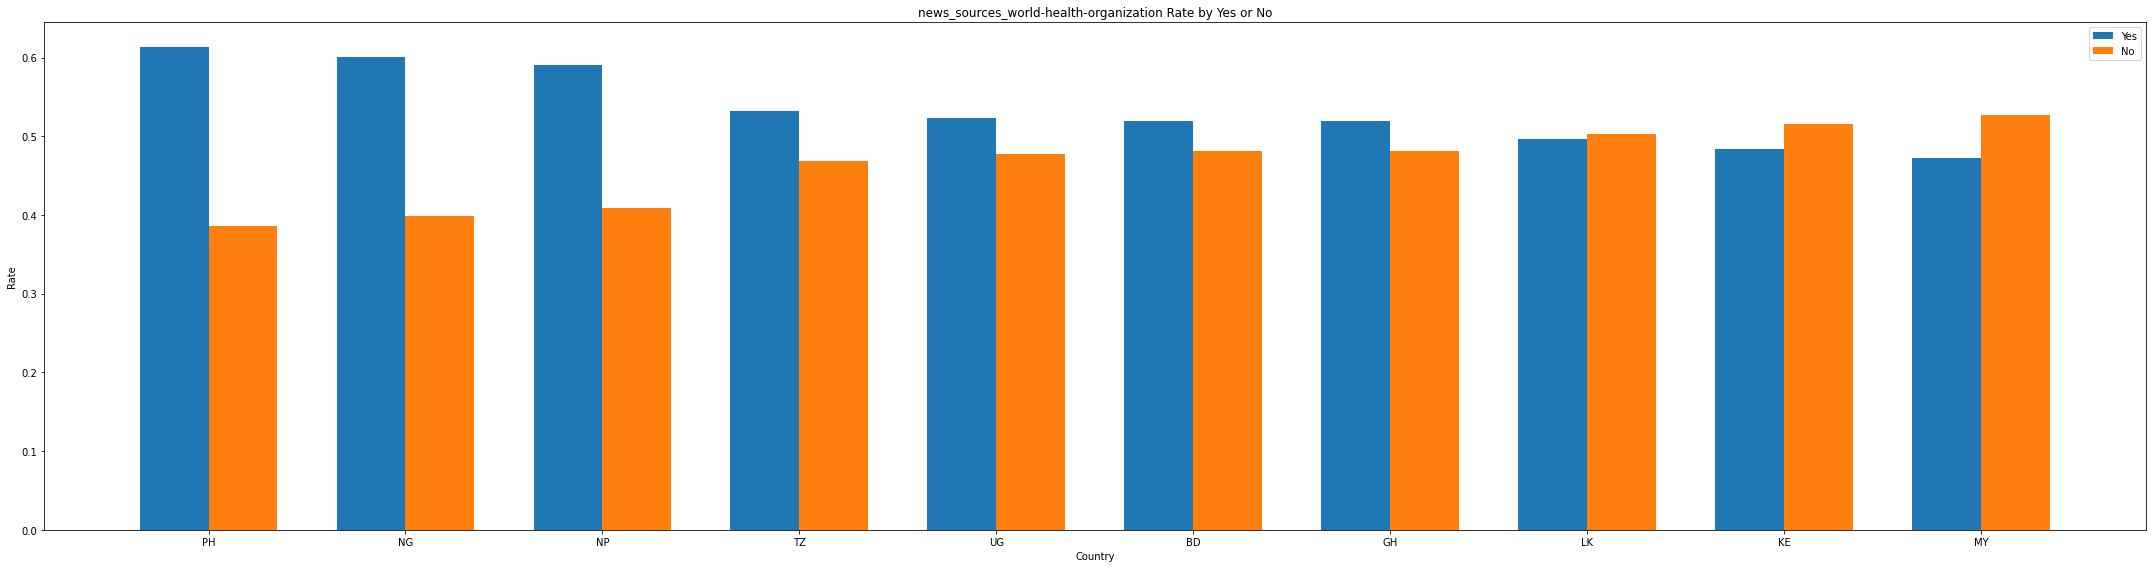

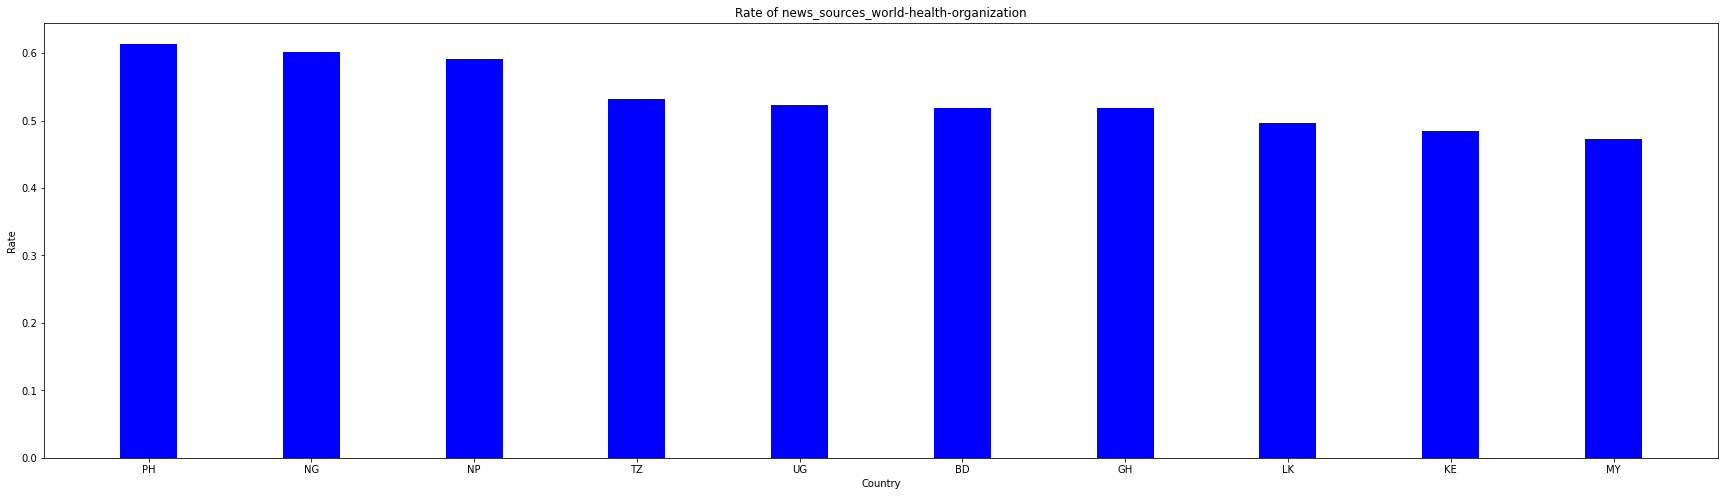

In [ ]:
news_sources = column_title_list[119:135]

for i in range(0, len(news_sources), 2):
  df_temp = df_mit[["country", news_sources[i], news_sources[i+1]]].sort_values(by=news_sources[i]).head(10)
  grouped_bar(df_temp, news_sources[i], news_sources[i+1], news_sources[i][:-3])
  just_bar(df_temp, news_sources[i+1], news_sources[i][:-3])

### News Mediums

#### Otomatis

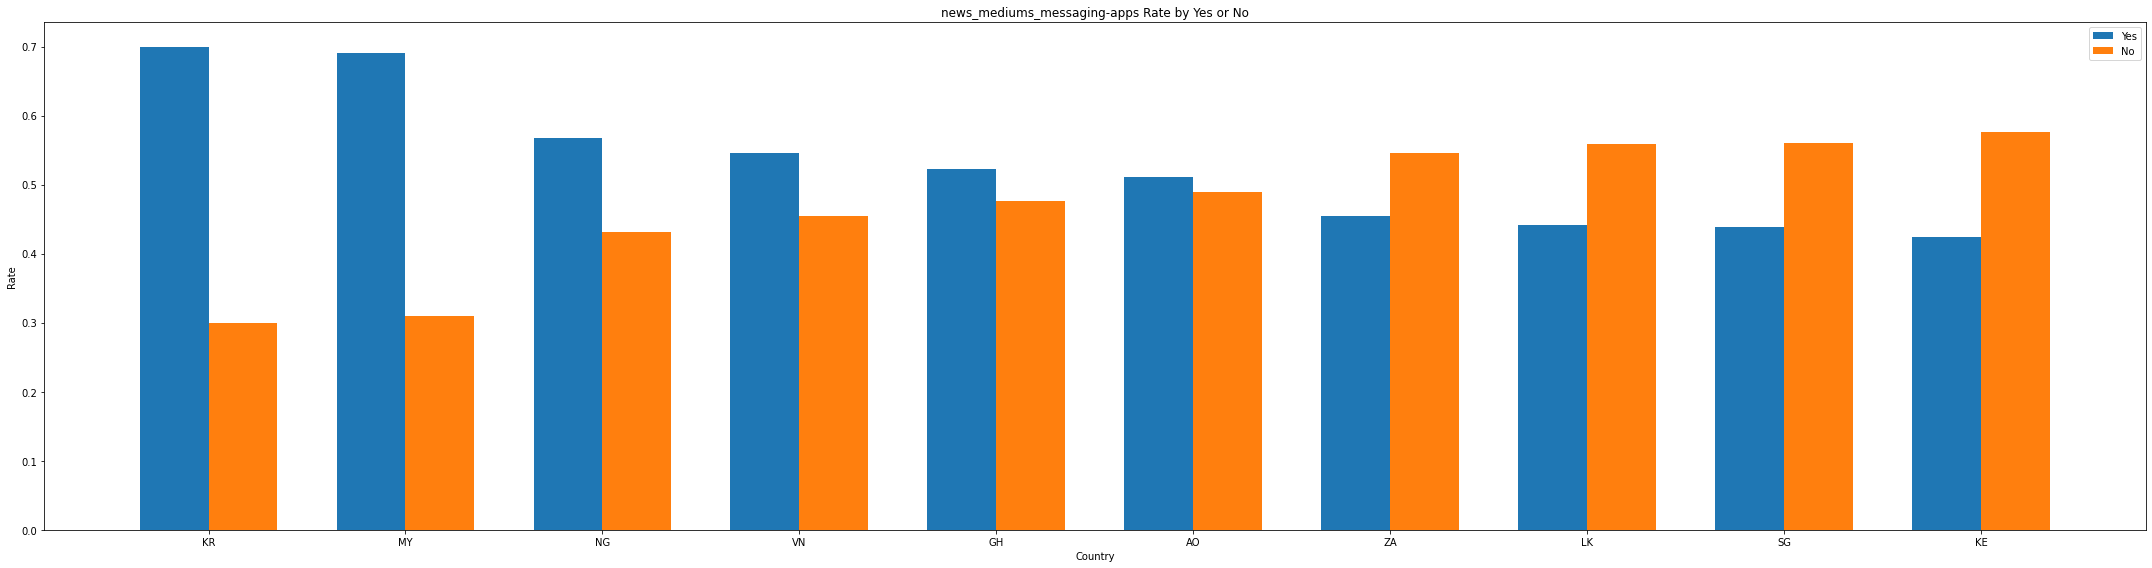

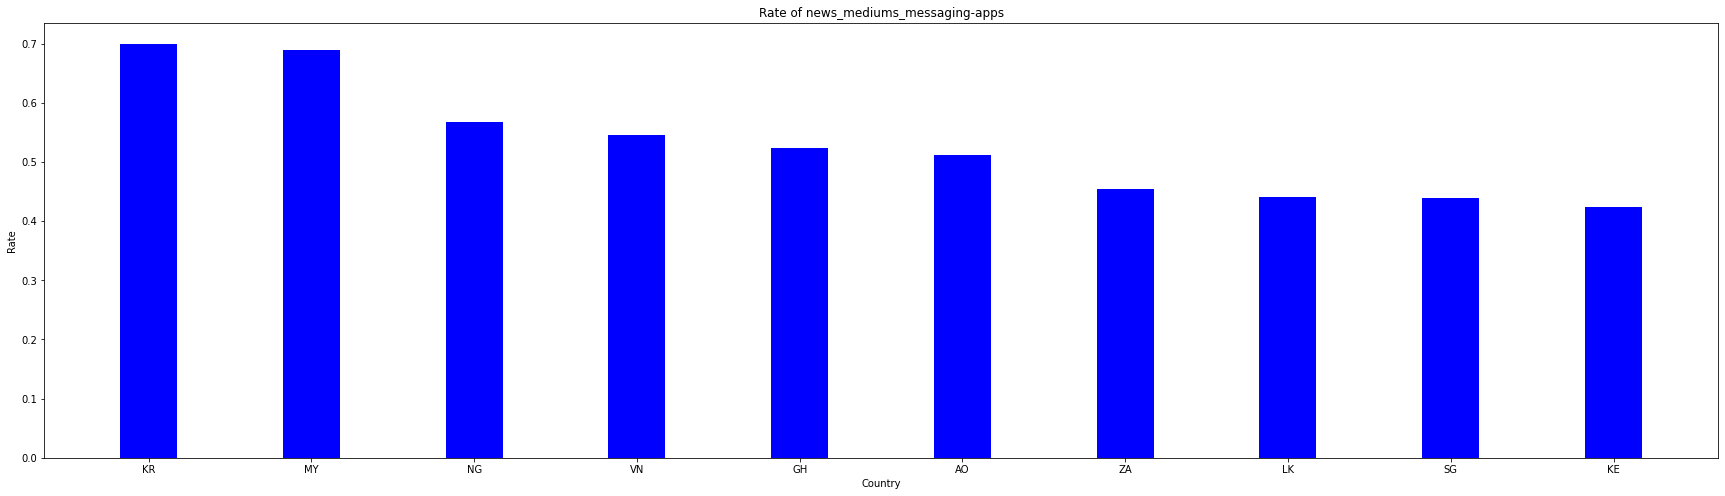

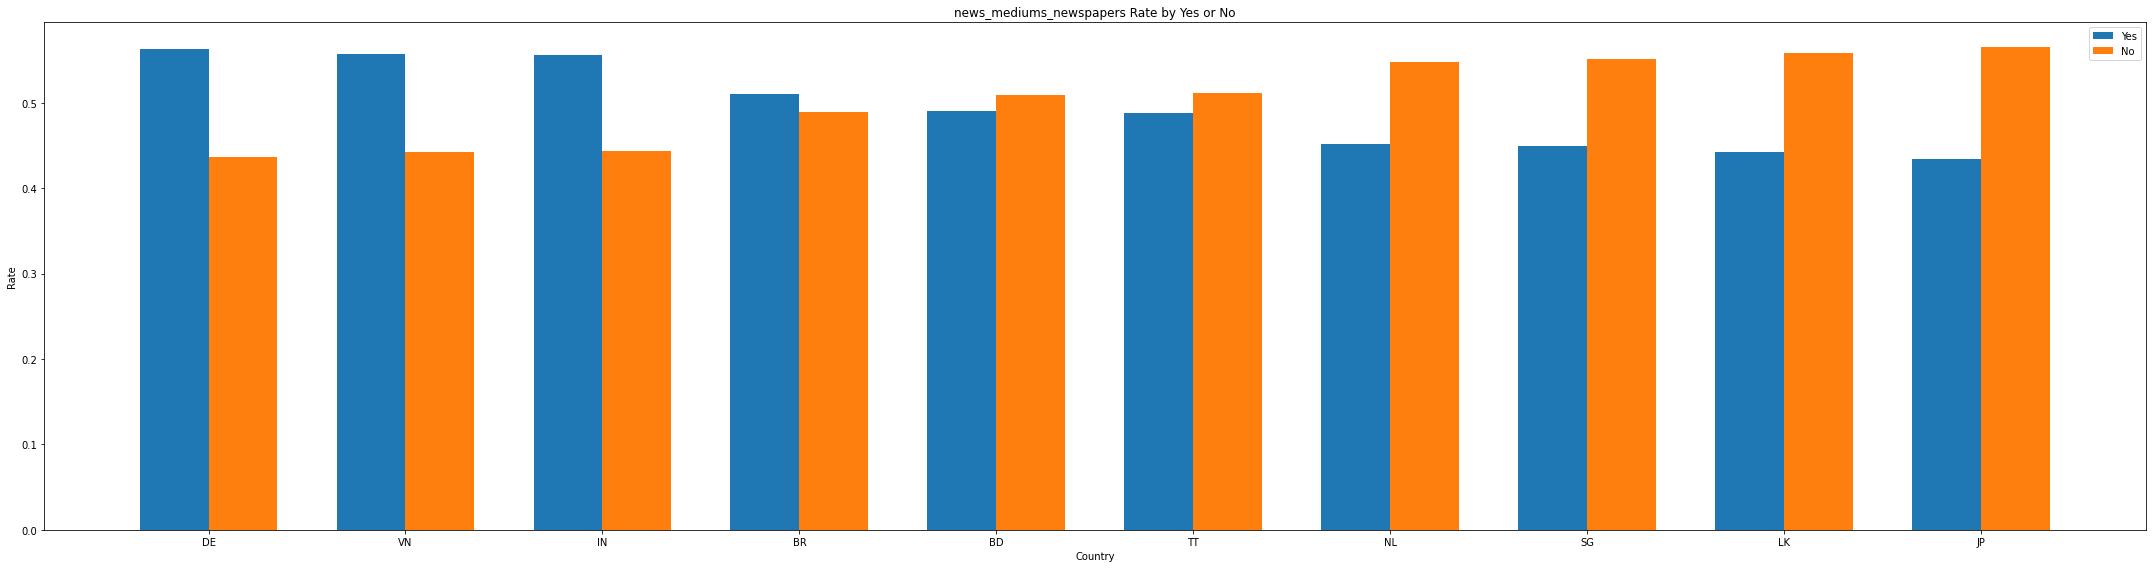

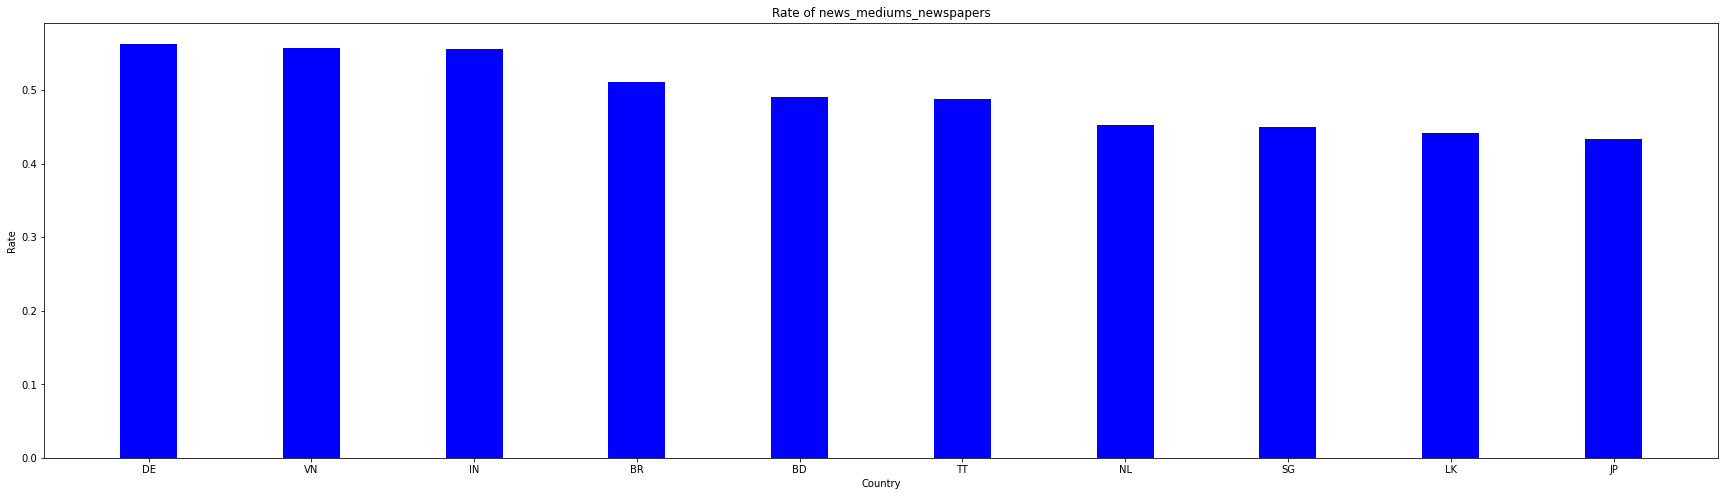

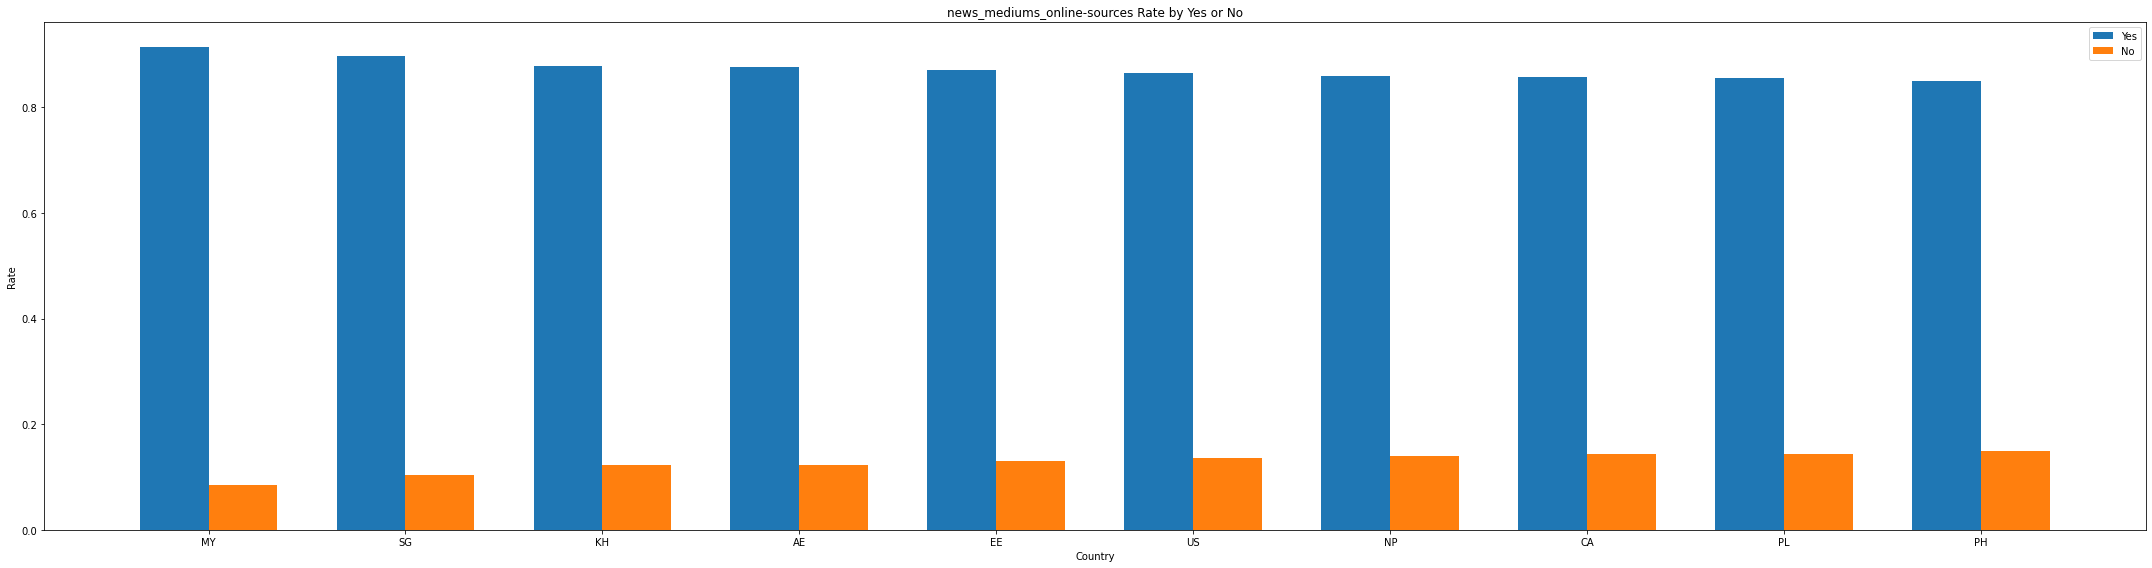

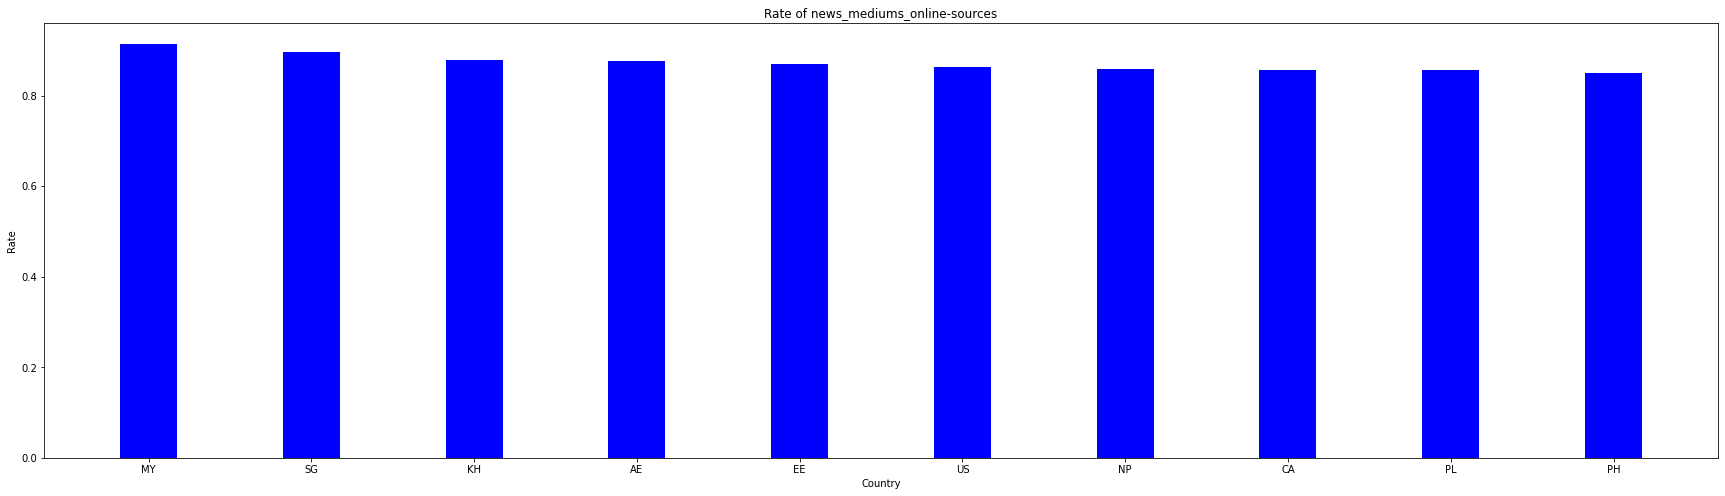

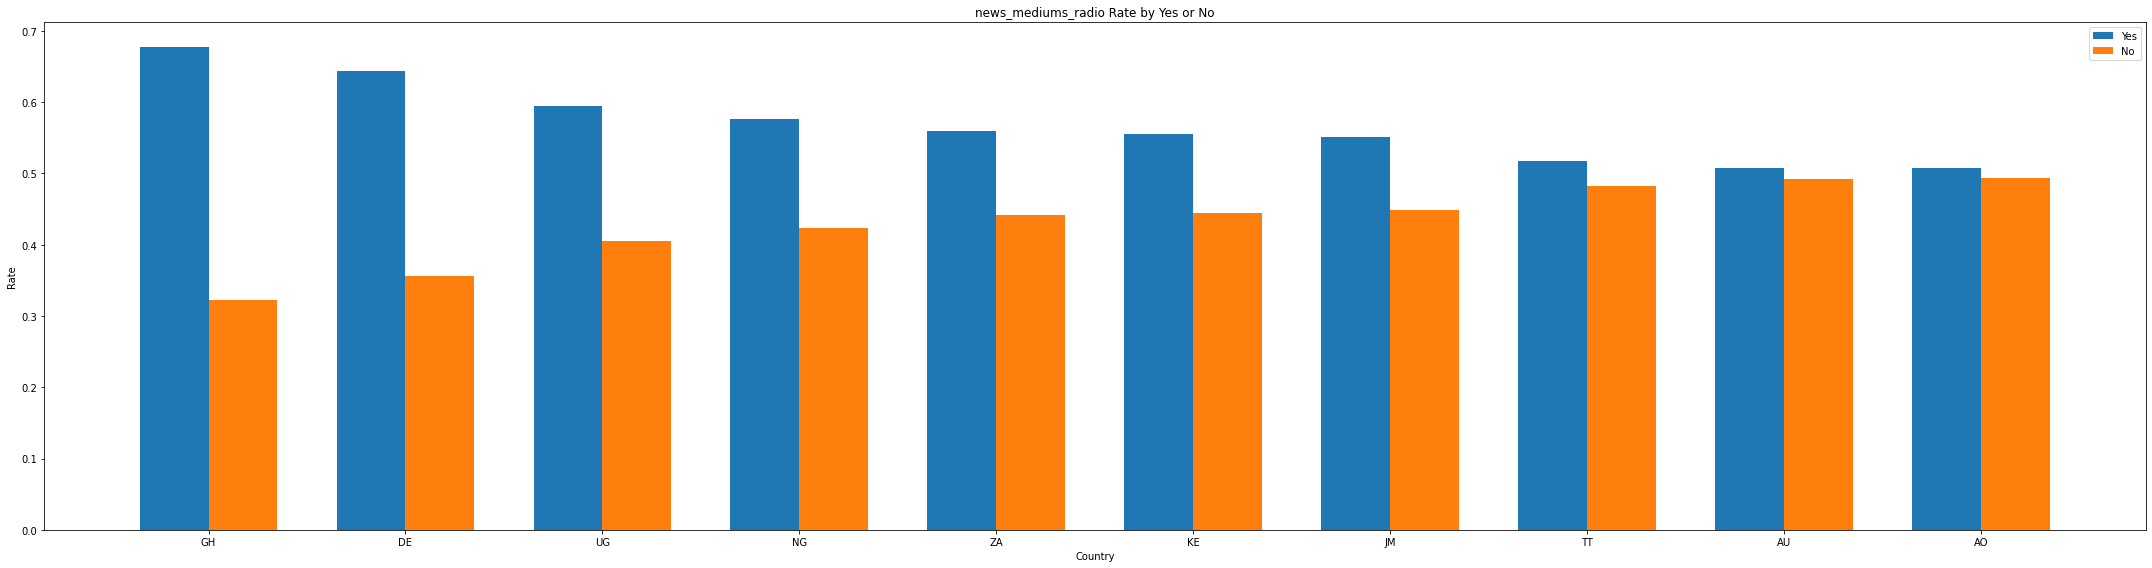

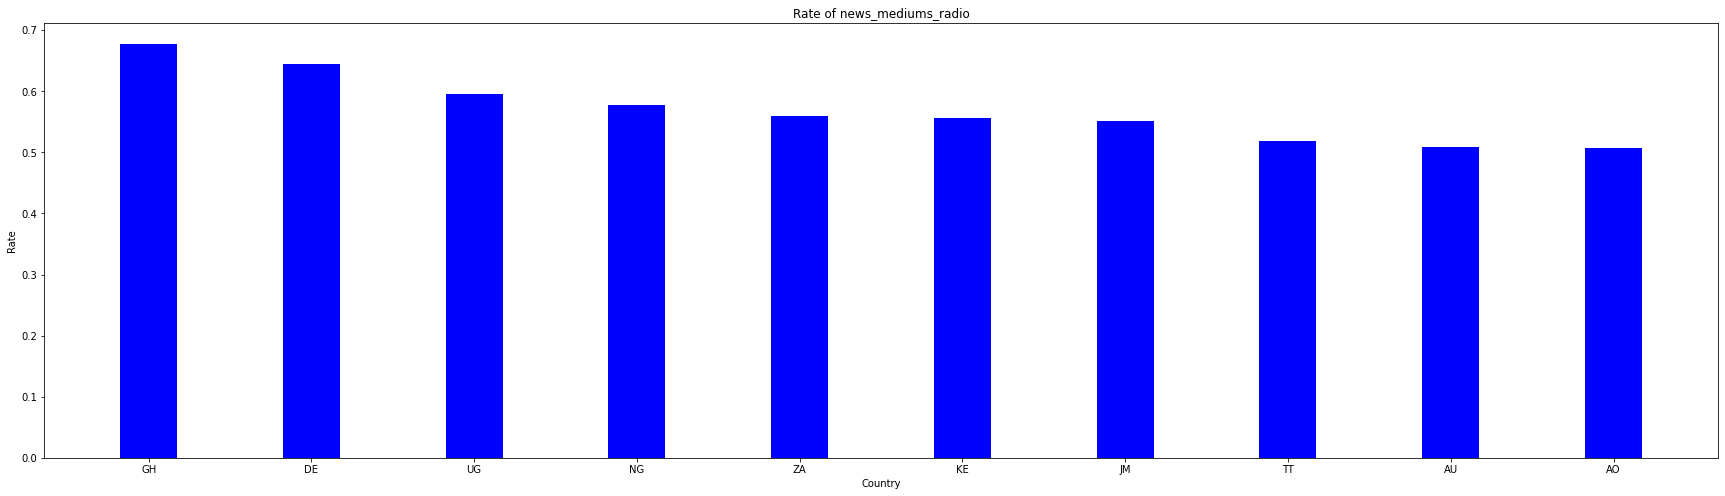

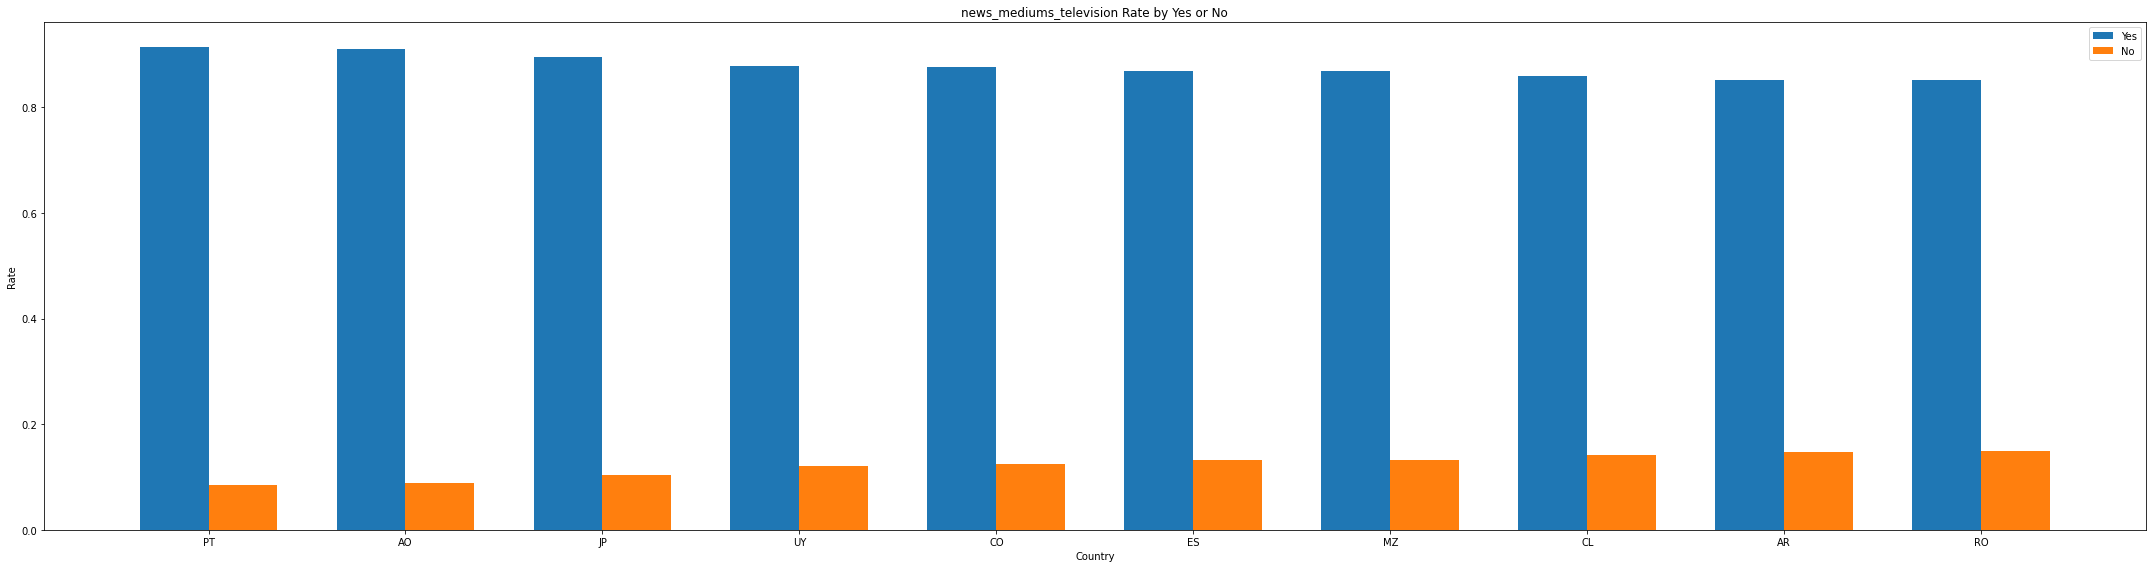

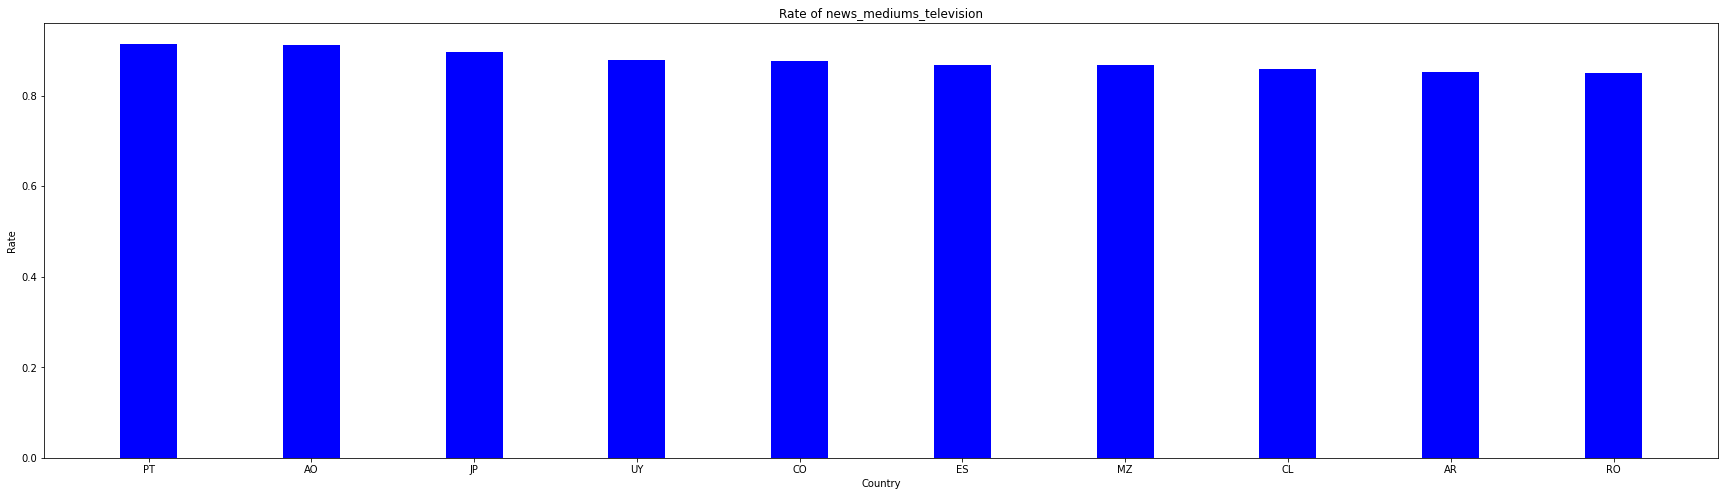

In [ ]:
news_medium = column_title_list[135:145]

for i in range(0, len(news_medium), 2):
  df_temp = df_mit[["country", news_medium[i], news_medium[i+1]]].sort_values(by=news_medium[i]).head(10)
  grouped_bar(df_temp, news_medium[i], news_medium[i+1], news_medium[i][:-3])
  just_bar(df_temp, news_medium[i+1], news_medium[i][:-3])

#### Manual

In [ ]:
df_news_mediums = df_mit[["news_mediums_messaging-apps_No", "news_mediums_messaging-apps_Yes", "news_mediums_newspapers_No", 
                          "news_mediums_newspapers_Yes", "news_mediums_online-sources_No", "news_mediums_online-sources_Yes", 
                          "news_mediums_radio_No", "news_mediums_radio_Yes", "news_mediums_television_No", 
                          "news_mediums_television_Yes"]]

print(df_news_mediums.to_string())

    news_mediums_messaging-apps_No  news_mediums_messaging-apps_Yes  news_mediums_newspapers_No  news_mediums_newspapers_Yes  news_mediums_online-sources_No  news_mediums_online-sources_Yes  news_mediums_radio_No  news_mediums_radio_Yes  news_mediums_television_No  news_mediums_television_Yes
0                            0.749                            0.251                       0.721                        0.279                           0.123                            0.877                  0.809                   0.191                       0.574                        0.426
1                            0.827                            0.173                       0.907                        0.093                           0.324                            0.676                  0.812                   0.188                       0.305                        0.695
2                            0.489                            0.511                       0.636                       

##### By Messaging Apps

In [ ]:
df_news_mediums_messaging_apps = df_mit[["country", "news_mediums_messaging-apps_No", "news_mediums_messaging-apps_Yes"]].sort_values(by="news_mediums_messaging-apps_No").head(10)

print(df_news_mediums_messaging_apps.to_string())

   country  news_mediums_messaging-apps_No  news_mediums_messaging-apps_Yes
32      KR                           0.300                            0.700
39      MY                           0.310                            0.690
41      NG                           0.432                            0.568
62      VN                           0.454                            0.546
21      GH                           0.477                            0.523
2       AO                           0.489                            0.511
63      ZA                           0.546                            0.454
34      LK                           0.559                            0.441
50      SG                           0.561                            0.439
30      KE                           0.576                            0.424


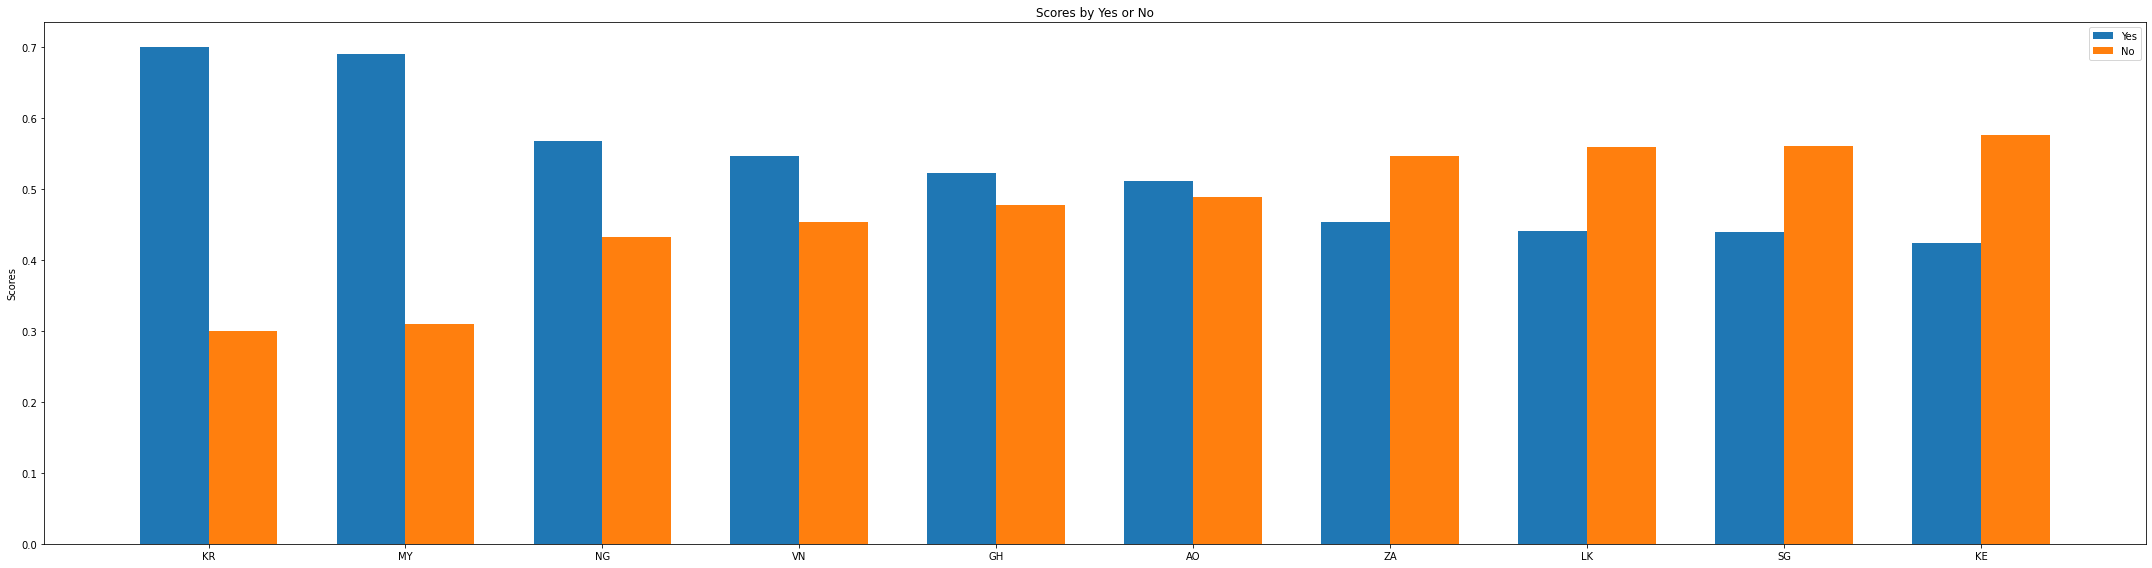

In [ ]:
labels = df_news_mediums_messaging_apps['country'].array
news_mediums_messaging_apps_yes = df_news_mediums_messaging_apps['news_mediums_messaging-apps_Yes'].array
news_mediums_messaging_apps_no = df_news_mediums_messaging_apps['news_mediums_messaging-apps_No'].array

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(30, 8))
rects1 = ax.bar(x - width/2, news_mediums_messaging_apps_yes, width, label='Yes')
rects2 = ax.bar(x + width/2, news_mediums_messaging_apps_no, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Yes or No')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

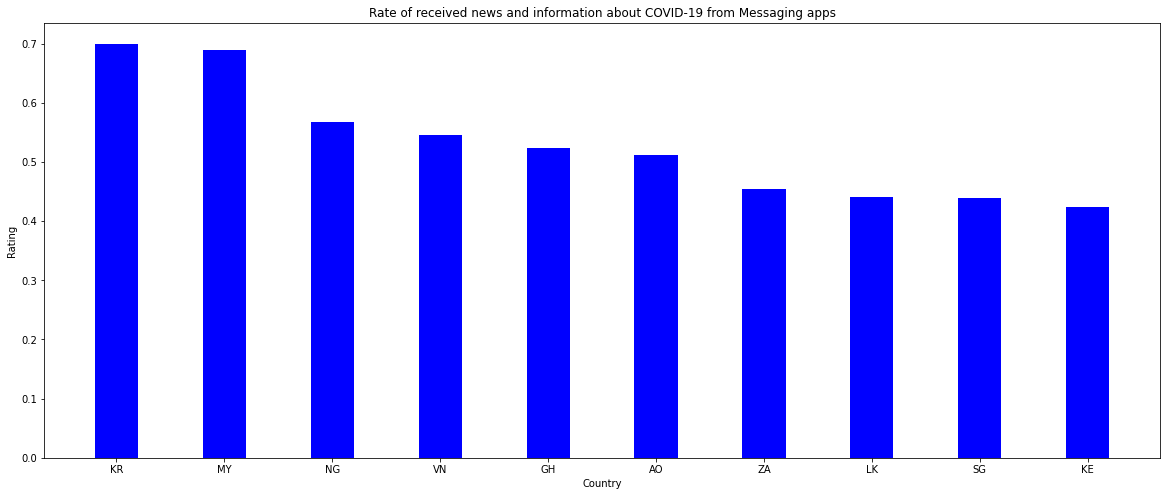

In [ ]:
labels = df_news_mediums_messaging_apps['country'].array
news_mediums_messaging_apps_yes = df_news_mediums_messaging_apps['news_mediums_messaging-apps_Yes'].array


fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(labels, news_mediums_messaging_apps_yes, color ='blue',
        width = 0.4)
    
plt.xlabel("Country")
plt.ylabel("Rating")
plt.title("Rate of received news and information about COVID-19 from Messaging apps")
plt.show()

##### By Newspaper

In [ ]:
df_news_mediums_newspapers = df_mit[["country", "news_mediums_newspapers_No", "news_mediums_newspapers_Yes"]].sort_values(by="news_mediums_newspapers_No").head(10)

print(df_news_mediums_newspapers.to_string())

   country  news_mediums_newspapers_No  news_mediums_newspapers_Yes
13      DE                       0.437                        0.563
62      VN                       0.443                        0.557
25      IN                       0.444                        0.556
7       BR                       0.489                        0.511
5       BD                       0.509                        0.491
54      TT                       0.512                        0.488
42      NL                       0.548                        0.452
50      SG                       0.551                        0.449
34      LK                       0.558                        0.442
29      JP                       0.566                        0.434


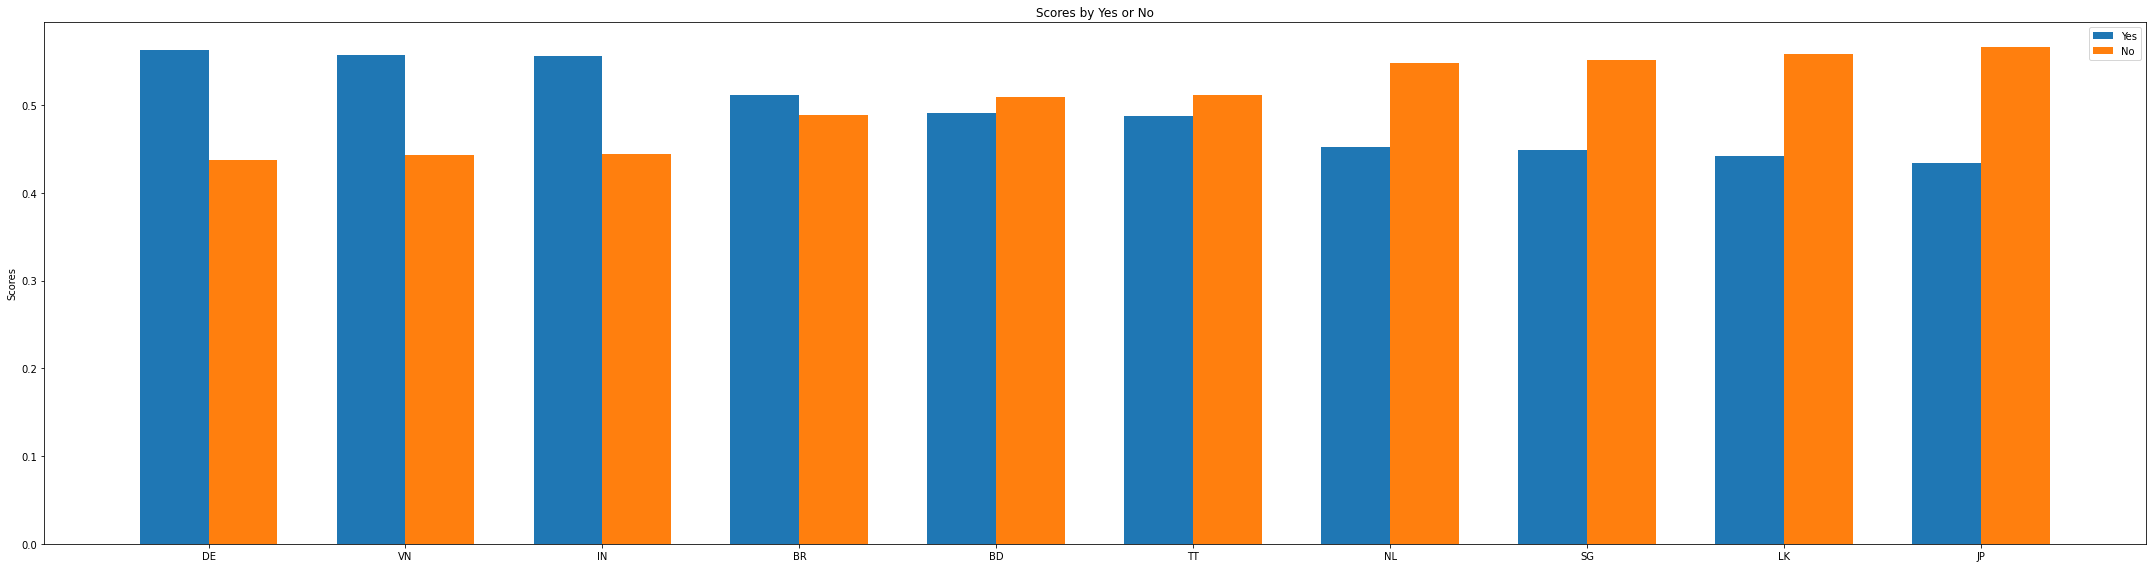

In [ ]:
labels = df_news_mediums_newspapers['country'].array
news_mediums_newspapers_yes = df_news_mediums_newspapers['news_mediums_newspapers_Yes'].array
news_mediums_newspapers_no = df_news_mediums_newspapers['news_mediums_newspapers_No'].array

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(30, 8))
rects1 = ax.bar(x - width/2, news_mediums_newspapers_yes, width, label='Yes')
rects2 = ax.bar(x + width/2, news_mediums_newspapers_no, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Yes or No')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

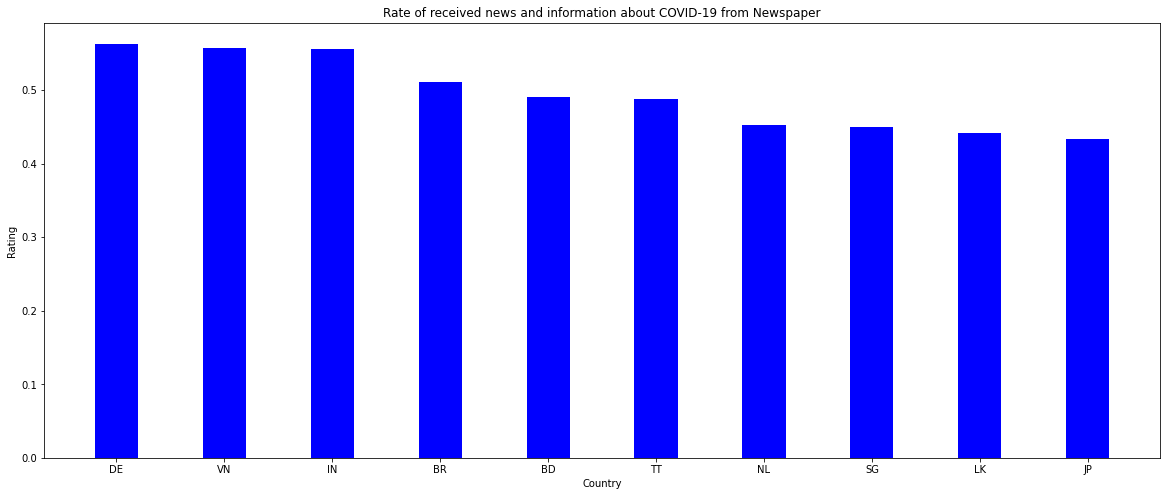

In [ ]:
labels = df_news_mediums_newspapers['country'].array
news_mediums_newspapers_yes = df_news_mediums_newspapers['news_mediums_newspapers_Yes'].array


fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(labels, news_mediums_newspapers_yes, color ='blue',
        width = 0.4)
    
plt.xlabel("Country")
plt.ylabel("Rating")
plt.title("Rate of received news and information about COVID-19 from Newspaper")
plt.show()

##### By Online Sources

In [ ]:
df_news_mediums_online_sources = df_mit[["country", "news_mediums_online-sources_No", "news_mediums_online-sources_Yes"]].sort_values(by="news_mediums_online-sources_No").head(10)

print(df_news_mediums_online_sources.to_string())

   country  news_mediums_online-sources_No  news_mediums_online-sources_Yes
39      MY                           0.085                            0.915
50      SG                           0.103                            0.897
31      KH                           0.122                            0.878
0       AE                           0.123                            0.877
15      EE                           0.130                            0.870
59      US                           0.136                            0.864
43      NP                           0.140                            0.860
8       CA                           0.143                            0.857
47      PL                           0.144                            0.856
45      PH                           0.150                            0.850


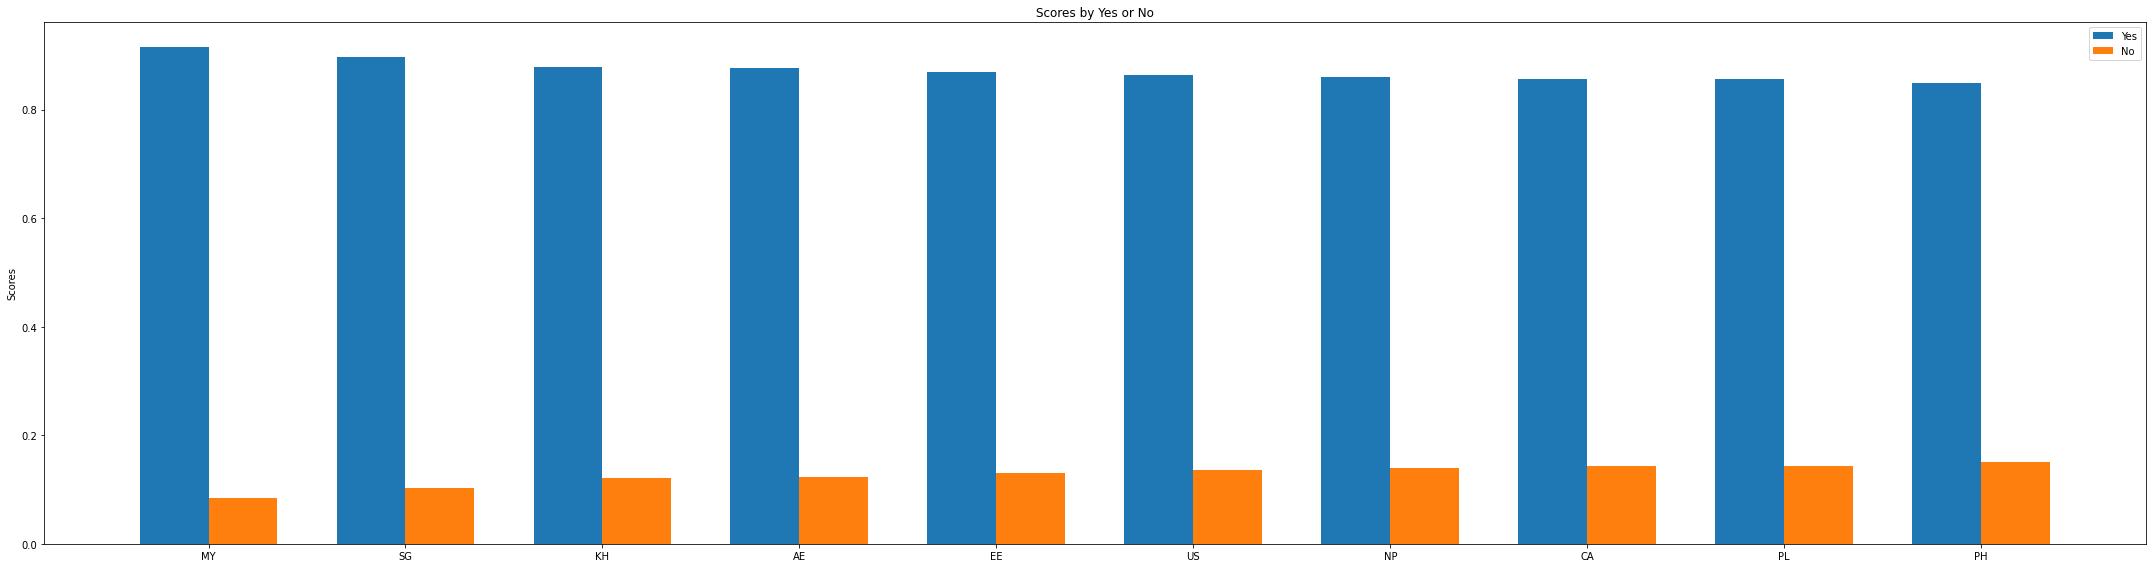

In [ ]:
labels = df_news_mediums_online_sources['country'].array
news_mediums_online_sources_yes = df_news_mediums_online_sources['news_mediums_online-sources_Yes'].array
news_mediums_online_sources_no = df_news_mediums_online_sources['news_mediums_online-sources_No'].array

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(30, 8))
rects1 = ax.bar(x - width/2, news_mediums_online_sources_yes, width, label='Yes')
rects2 = ax.bar(x + width/2, news_mediums_online_sources_no, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Yes or No')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

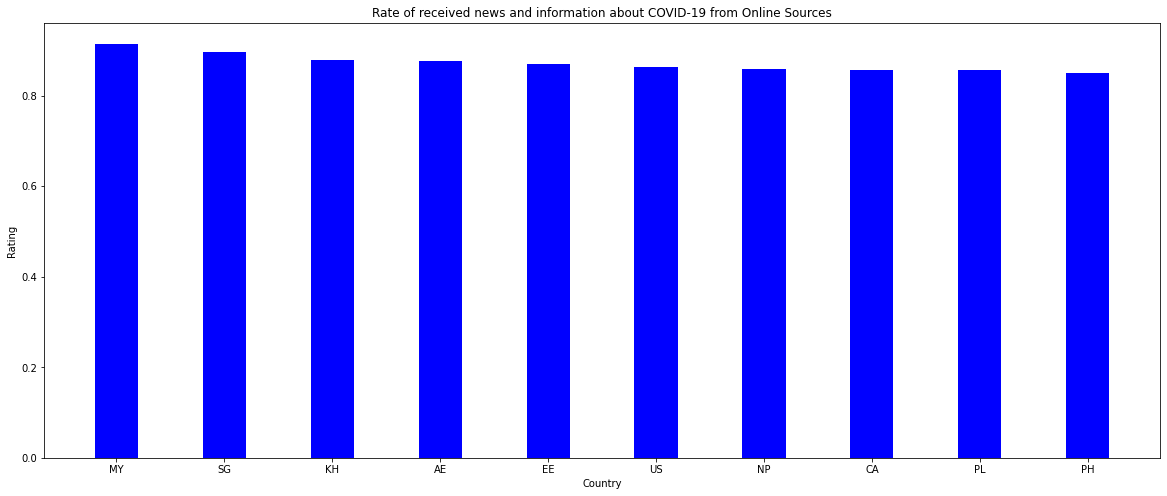

In [ ]:
labels = df_news_mediums_online_sources['country'].array
news_mediums_online_sources_yes = df_news_mediums_online_sources['news_mediums_online-sources_Yes'].array


fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(labels, news_mediums_online_sources_yes, color ='blue',
        width = 0.4)
    
plt.xlabel("Country")
plt.ylabel("Rating")
plt.title("Rate of received news and information about COVID-19 from Online Sources")
plt.show()

##### By Radio

In [ ]:
df_news_mediums_radio = df_mit[["country", "news_mediums_radio_No", "news_mediums_radio_Yes"]].sort_values(by="news_mediums_radio_No").head(10)

print(df_news_mediums_radio.to_string())

   country  news_mediums_radio_No  news_mediums_radio_Yes
21      GH                  0.322                   0.678
13      DE                  0.356                   0.644
58      UG                  0.405                   0.595
41      NG                  0.423                   0.577
63      ZA                  0.441                   0.559
30      KE                  0.444                   0.556
28      JM                  0.449                   0.551
54      TT                  0.482                   0.518
4       AU                  0.492                   0.508
2       AO                  0.493                   0.507


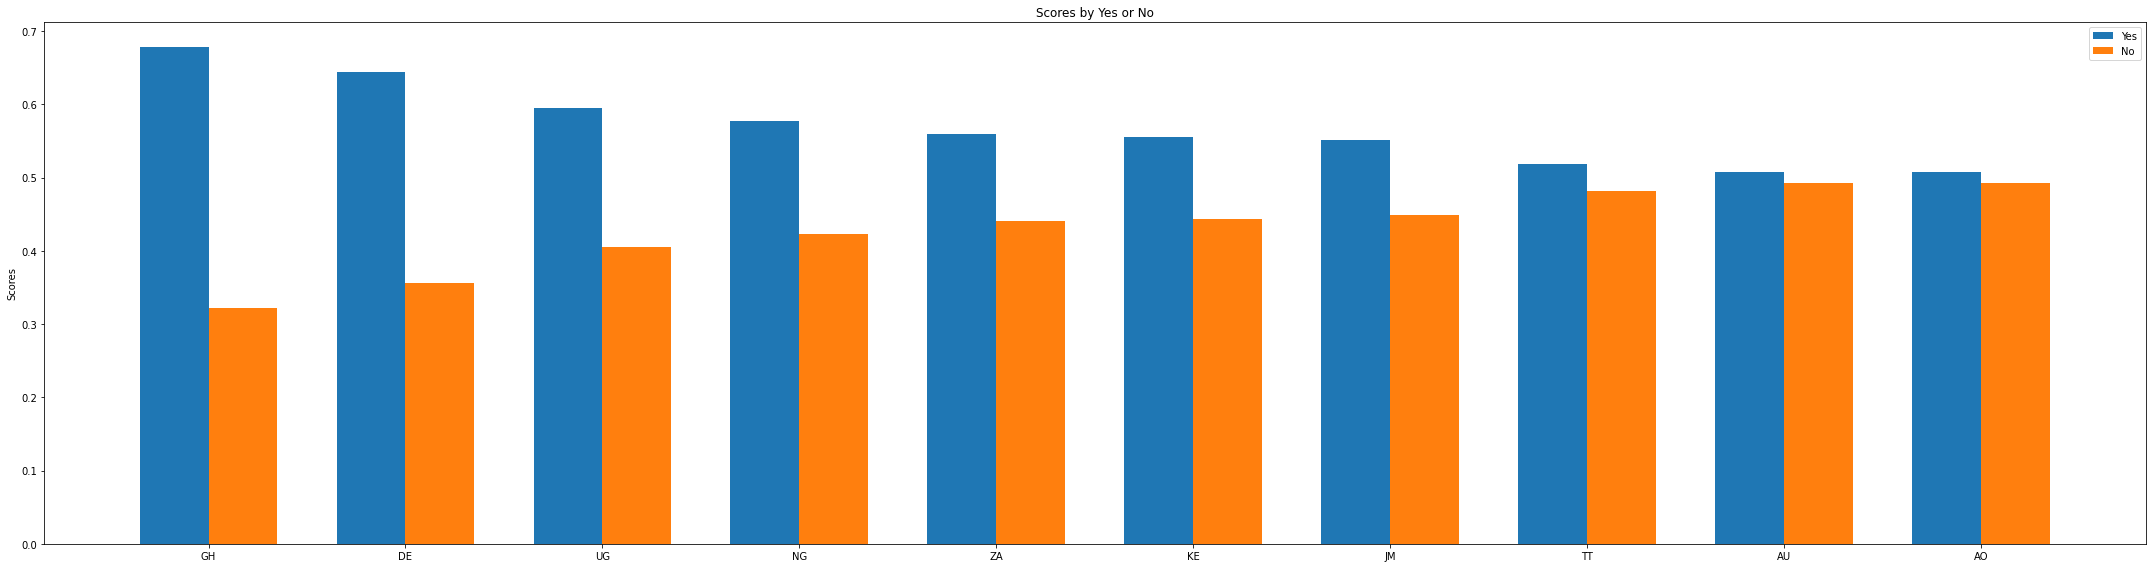

In [ ]:
labels = df_news_mediums_radio['country'].array
news_mediums_radio_yes = df_news_mediums_radio['news_mediums_radio_Yes'].array
news_mediums_radio_no = df_news_mediums_radio['news_mediums_radio_No'].array

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(30, 8))
rects1 = ax.bar(x - width/2, news_mediums_radio_yes, width, label='Yes')
rects2 = ax.bar(x + width/2, news_mediums_radio_no, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Yes or No')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

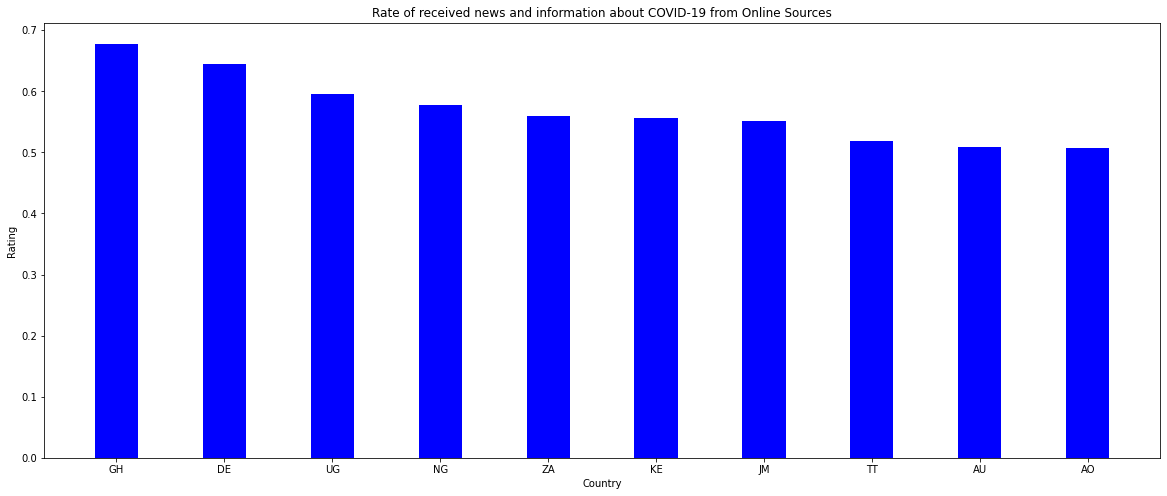

In [ ]:
labels = df_news_mediums_radio['country'].array
news_mediums_radio_yes = df_news_mediums_radio['news_mediums_radio_Yes'].array


fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(labels, news_mediums_radio_yes, color ='blue',
        width = 0.4)
    
plt.xlabel("Country")
plt.ylabel("Rating")
plt.title("Rate of received news and information about COVID-19 from Online Sources")
plt.show()

##### By Televison

In [ ]:
df_news_mediums_television = df_mit[["country", "news_mediums_television_No", "news_mediums_television_Yes"]].sort_values(by="news_mediums_television_No").head(10)

print(df_news_mediums_television.to_string())

   country  news_mediums_television_No  news_mediums_television_Yes
48      PT                       0.085                        0.915
2       AO                       0.089                        0.911
29      JP                       0.104                        0.896
60      UY                       0.121                        0.879
12      CO                       0.124                        0.876
17      ES                       0.132                        0.868
40      MZ                       0.132                        0.868
10      CL                       0.141                        0.859
3       AR                       0.148                        0.852
49      RO                       0.149                        0.851


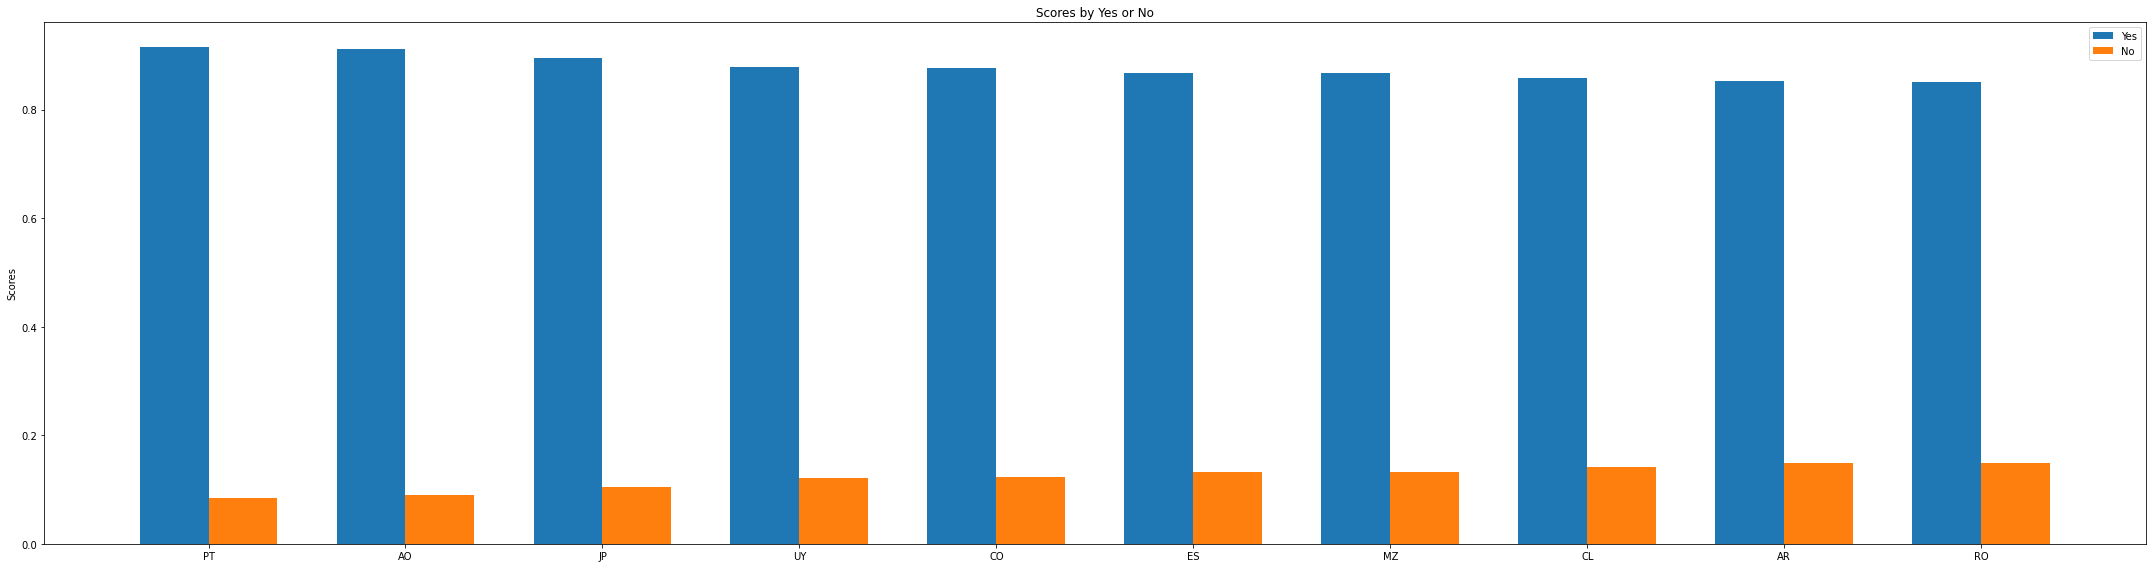

In [ ]:
labels = df_news_mediums_television['country'].array
news_mediums_television_yes = df_news_mediums_television['news_mediums_television_Yes'].array
news_mediums_television_no = df_news_mediums_television['news_mediums_television_No'].array

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(30, 8))
rects1 = ax.bar(x - width/2, news_mediums_television_yes, width, label='Yes')
rects2 = ax.bar(x + width/2, news_mediums_television_no, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Yes or No')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

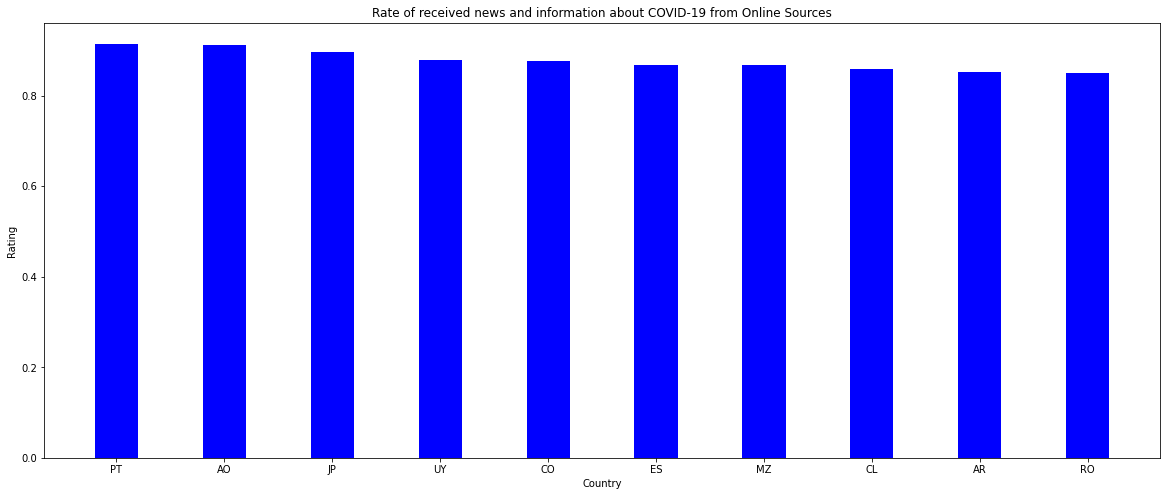

In [ ]:
labels = df_news_mediums_television['country'].array
news_mediums_television_yes = df_news_mediums_television['news_mediums_television_Yes'].array


fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(labels, news_mediums_television_yes, color ='blue',
        width = 0.4)
    
plt.xlabel("Country")
plt.ylabel("Rating")
plt.title("Rate of received news and information about COVID-19 from Online Sources")
plt.show()

# Modeling

In [ ]:
# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
X = df_mit.drop(columns=['country', 'is_increase_retail_and_recreation_percent', 'is_increase_grocery_and_pharmacy_percent', 'is_increase_workplaces_percent',
                         'is_increase_parks_percent', 'is_increase_transit_stations_percent', 'is_increase_residential_percent',
                         'retail_and_recreation_percent', 'grocery_and_pharmacy_percent', 'parks_percent', 
                         'transit_stations_percent', 'workplaces_percent', 'residential_percent'], axis=1)

## Clustering

In [ ]:
import sklearn.datasets as make_blobs
import scipy
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [ ]:
data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)
data_scaled.head()

results_count  effective_sample_size  vaccine_accept_yes  \
0       0.883583               0.468272            0.000109   
1       0.973909               0.226895            0.000154   
2       0.902913               0.429808            0.000093   
3       0.880925               0.473256            0.000009   
4       0.794800               0.606869            0.000103   

   vaccine_accept_no  vaccine_accept_dontknow  mismatch_index  \
0           0.000023                 0.000033        0.000985   
1           0.000019                 0.000025        0.004360   
2           0.000020                 0.000049        0.003616   
3           0.000002                 0.000003        0.000158   
4           0.000015                 0.000022        0.001687   

   distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means  \
0                                           0.000024                               
1                                           0.000026                               
2                                           0.000013                               
3                                           0.000001                               
4                                           0.000004                               

   distancing_familiarity_I-have-heard-of-it-and-know-what-it-means  \
0                                           0.000124                  
1                                           0.000121                  
2                                           0.000140                  
3                                           0.000012                  
4                                           0.000134                  

   distancing_familiarity_I-have-heard-of-it-but-do-not-know-what-it-means  \
0                                       5.450141e-06                         
1                                       1.902630e-05                         
2                                       3.065096e-06                         
3                                       2.440872e-07                         
4                                       5.601128e-07                         

   distancing_familiarity_I-have-not-heard-of-it  ...  \
0                                   1.205637e-05  ...   
1                                   3.210688e-05  ...   
2                                   5.646229e-06  ...   
3                                   4.163840e-07  ...   
4                                   1.680338e-06  ...   

   news_mediums_messaging-apps_No  news_mediums_messaging-apps_Yes  \
0                        0.000124                         0.000041   
1                        0.000164                         0.000034   
2                        0.000079                         0.000082   
3                        0.000012                         0.000002   
4                        0.000108                         0.000032   

   news_mediums_newspapers_No  news_mediums_newspapers_Yes  \
0                    0.000119                     0.000046   
1                    0.000180                     0.000018   
2                    0.000103                     0.000059   
3                    0.000011                     0.000003   
4                    0.000096                     0.000044   

   news_mediums_online-sources_No  news_mediums_online-sources_Yes  \
0                        0.000020                         0.000145   
1                        0.000064                         0.000134   
2                        0.000043                         0.000119   
3                        0.000005                         0.000009   
4                        0.000022                         0.000118   

   news_mediums_radio_No  news_mediums_radio_Yes  news_mediums_television_No  \
0               0.000134                0.000032                    0.000095   
1               0.000161                0.000037                    0.000060   
2               0.000080          

In [ ]:
clusters = hierarchy.linkage(data_scaled, method="complete")

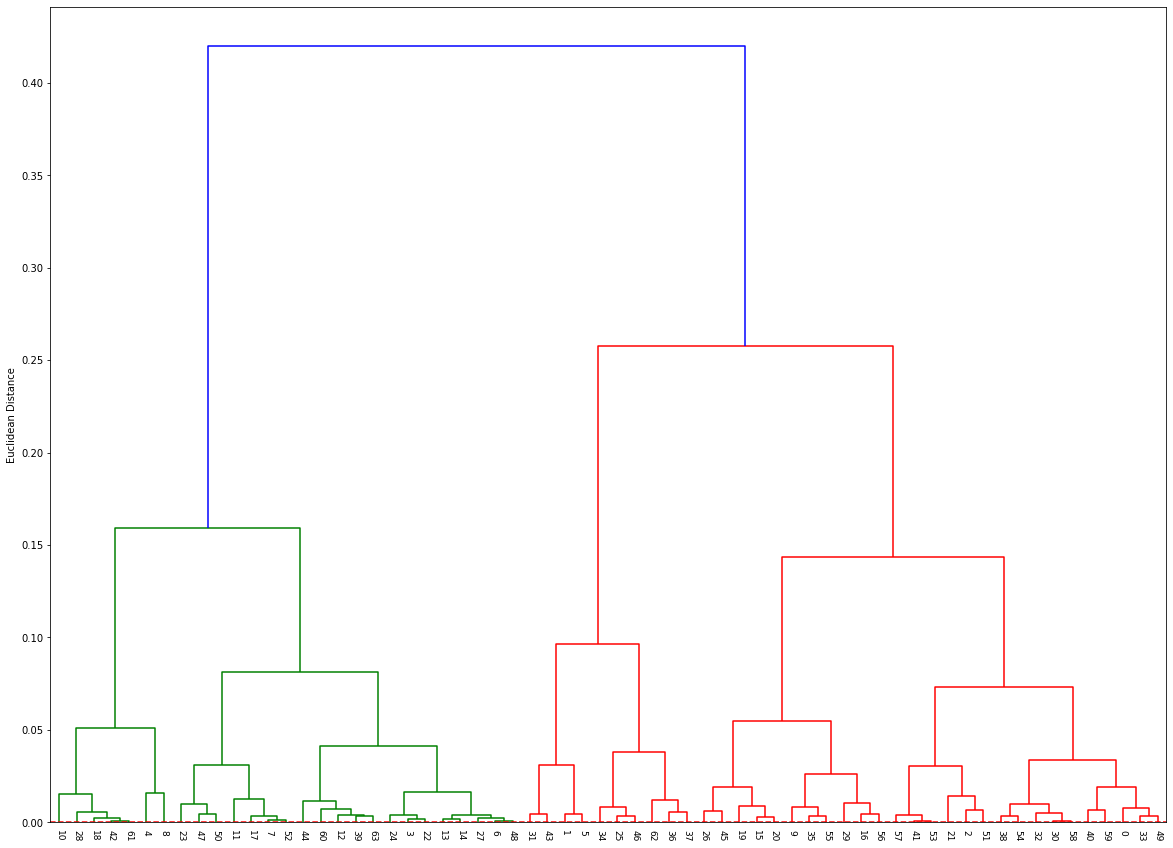

In [ ]:
plt.figure(figsize=(20, 15))
dendrogram = hierarchy.dendrogram(clusters, leaf_font_size=9)
plt.xticks(rotation=270)
plt.ylabel('Euclidean Distance')
plt.axhline(color='r', linestyle='--')

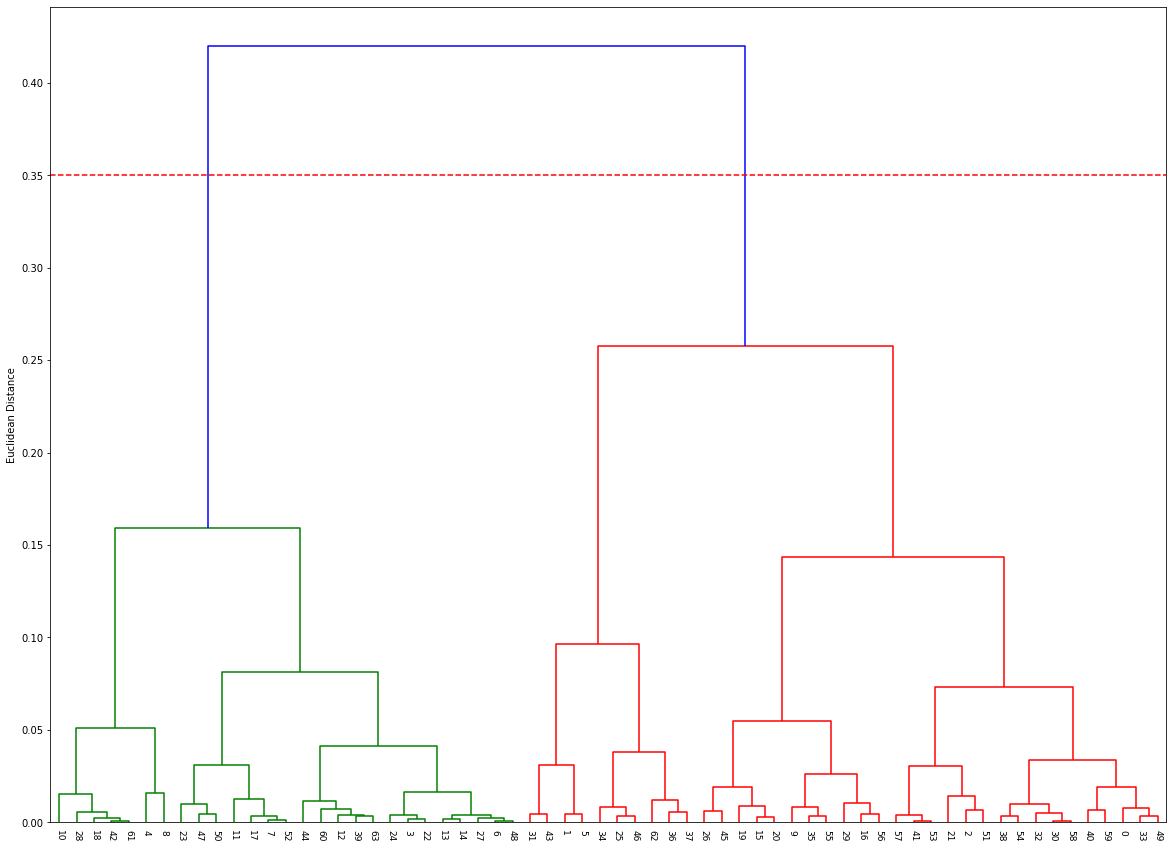

In [ ]:
plt.figure(figsize=(20, 15))
dendrogram = hierarchy.dendrogram(clusters, leaf_font_size=9)
plt.xticks(rotation=270)
plt.ylabel('Euclidean Distance')
plt.axhline(y=0.35, color='r', linestyle='--')

In [ ]:
clustering = AgglomerativeClustering(n_clusters=2, linkage="complete", affinity = 'euclidean')
clustering.fit_predict(data_scaled)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


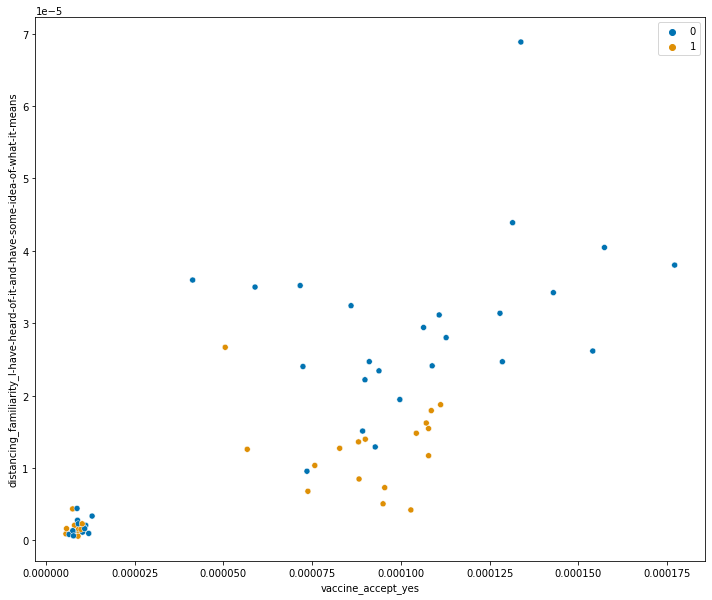

In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data_scaled['vaccine_accept_yes'], data_scaled['distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means'], hue=clustering.labels_, data=data_scaled, palette="colorblind")

## Classification

In [ ]:
print(df_mit.to_string())

   country  results_count  effective_sample_size  vaccine_accept_yes  vaccine_accept_no  vaccine_accept_dontknow  mismatch_index  distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means  distancing_familiarity_I-have-heard-of-it-and-know-what-it-means  distancing_familiarity_I-have-heard-of-it-but-do-not-know-what-it-means  distancing_familiarity_I-have-not-heard-of-it  effect_mask_Extremely-effective  effect_mask_Moderately-effective  effect_mask_Not-effective-at-all  effect_mask_Slightly-effective  effect_mask_Very-effective  community_risk_index_Extremely-dangerous  community_risk_index_Moderately-dangerous  community_risk_index_Not-at-all-dangerous  community_risk_index_Slightly-dangerous  community_risk_index_Very-dangerous  restaurants_everyone-has-to-pass-a-temperature-check_Doesn't-affect-my-actions  restaurants_everyone-has-to-pass-a-temperature-check_Less-likely-to-visit  restaurants_everyone-has-to-pass-a-temperature-check_More-likely-to-visit  restaura

In [ ]:
y_is_increase_retail_and_recreation = df_mit['is_increase_retail_and_recreation_percent']
y_is_increase_grocery_and_pharmacy = df_mit['is_increase_grocery_and_pharmacy_percent']
y_is_increase_parks = df_mit['is_increase_parks_percent']
y_is_increase_transit_stations = df_mit['is_increase_transit_stations_percent']
y_is_increase_workplaces_percent = df_mit['is_increase_workplaces_percent']
y_is_increase_residential = df_mit['is_increase_residential_percent']

### 1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_is_increase_retail_and_recreation, train_size=0.8, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=35000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "LinearSVC": LinearSVC(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian": GaussianNB(),
    "Percepton": Perceptron(),
    "SGD": SGDClassifier(),
    "XGB": XGBClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores = {}
        scores["score"] = model.score(X_test, y_test)
        scores["recall"] = recall_score(y_test, y_pred, average=None)
        scores["recall-macro"] = recall_score(y_test, y_pred, average='macro')
        scores["recall-micro"] = recall_score(y_test, y_pred, average='micro')
        scores["recall-weighted"] = recall_score(y_test, y_pred, average='weighted')
        scores["f1-score"] = f1_score(y_test, y_pred, average='weighted')

        model_scores[name] = scores
        
    return model_scores

fit_and_score_results = fit_and_score(models, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
scores_df = pd.DataFrame(fit_and_score_results).transpose()
for c in scores_df.columns:
    if c == 'recall':
        continue
    scores_df[c] = scores_df[c].astype(float)
scores_df

score                     recall  recall-macro  \
Logistic Regression         0.769231  [0.8333333333333334, 0.0]      0.416667   
KNN                         0.692308                [0.75, 0.0]      0.375000   
Random Forest               0.923077                 [1.0, 0.0]      0.500000   
LinearSVC                   0.923077                 [1.0, 0.0]      0.500000   
SVC                         0.923077                 [1.0, 0.0]      0.500000   
Decision Tree               0.923077                 [1.0, 0.0]      0.500000   
Gaussian                    0.923077                 [1.0, 0.0]      0.500000   
Percepton                   0.923077                 [1.0, 0.0]      0.500000   
SGD                         0.384615  [0.3333333333333333, 1.0]      0.666667   
XGB                         0.923077                 [1.0, 0.0]      0.500000   
Adaboost                    0.923077                 [1.0, 0.0]      0.500000   
GradientBoostingClassifier  0.923077                 [1.0, 0.0]      0.500000   

                            recall-micro  recall-weighted  f1-score  
Logistic Regression             0.769231         0.769231  0.802676  
KNN                             0.692308         0.692308  0.755245  
Random Forest                   0.923077         0.923077  0.886154  
LinearSVC                       0.923077         0.923077  0.886154  
SVC                             0.923077         0.923077  0.886154  
Decision Tree                   0.923077         0.923077  0.886154  
Gaussian                        0.923077         0.923077  0.886154  
Percepton                       0.923077         0.923077  0.886154  
SGD                             0.384615         0.384615  0.476923  
XGB                             0.923077         0.923077  0.886154  
Adaboost                        0.923077         0.923077  0.886154  
GradientBoostingClassifier      0.923077         0.923077  0.886154

In [ ]:
scores_df.reset_index(inplace=True)

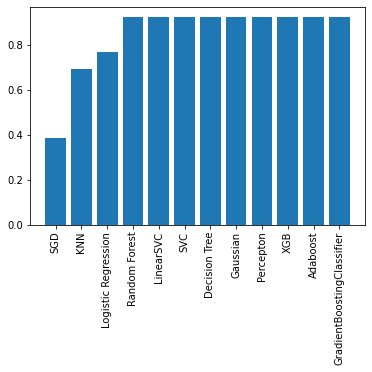

In [ ]:
scores_df = scores_df.sort_values('score')
plt.bar(scores_df['index'], scores_df['score'])
plt.xticks(rotation='vertical')
plt.show()

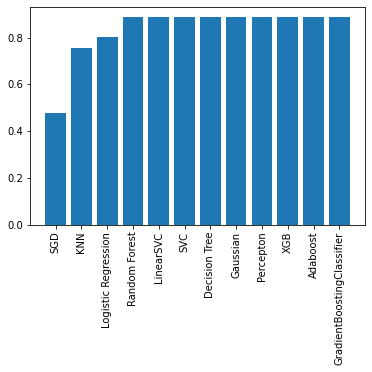

In [ ]:
scores_df = scores_df.sort_values('f1-score')
plt.bar(scores_df['index'], scores_df['f1-score'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LogisticRegression()
solvers = ['lbfgs', 'sag', 'saga', 'newton-cg']
penalty = ['l1', 'l2', 'elasticnet', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]
weight = {}
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.350000 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'sag'}
0.033333 (0.179505) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.266667 (0.422953) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.033333 (0.179505) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.033333 (0.179505) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.350000 (0.450000) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'sag'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.266667 (0.42295

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1050 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

In [ ]:
grid_search.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
log_reg = LogisticRegression(max_iter=35000, **grid_search.best_params_)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


LogisticRegression(C=100, max_iter=35000, solver='newton-cg')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
predicted = log_reg.predict(X_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(y_test, predicted))
print("Presisi:", precision_score(y_test, predicted))
print("Recall:", recall_score(y_test, predicted, average='weighted'))
print("F1-score:", f1_score(y_test, predicted, average='weighted'))

Akurasi: 0.9230769230769231
Presisi: 0.0
Recall: 0.9230769230769231
F1-score: 0.8861538461538463


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_is_increase_grocery_and_pharmacy, train_size=0.8, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=35000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "LinearSVC": LinearSVC(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian": GaussianNB(),
    "Percepton": Perceptron(),
    "SGD": SGDClassifier(),
    "XGB": XGBClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores = {}
        scores["score"] = model.score(X_test, y_test)
        scores["recall"] = recall_score(y_test, y_pred, average=None)
        scores["recall-macro"] = recall_score(y_test, y_pred, average='macro')
        scores["recall-micro"] = recall_score(y_test, y_pred, average='micro')
        scores["recall-weighted"] = recall_score(y_test, y_pred, average='weighted')
        scores["f1-score"] = f1_score(y_test, y_pred, average='weighted')

        model_scores[name] = scores
        
    return model_scores

fit_and_score_results = fit_and_score(models, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the n

In [ ]:
scores_df = pd.DataFrame(fit_and_score_results).transpose()
for c in scores_df.columns:
    if c == 'recall':
        continue
    scores_df[c] = scores_df[c].astype(float)
scores_df

score                     recall  recall-macro  \
Logistic Regression         0.923077  [0.9230769230769231, 0.0]      0.461538   
KNN                         1.000000                      [1.0]      1.000000   
Random Forest               1.000000                      [1.0]      1.000000   
LinearSVC                   1.000000                      [1.0]      1.000000   
SVC                         1.000000                      [1.0]      1.000000   
Decision Tree               1.000000                      [1.0]      1.000000   
Gaussian                    1.000000                      [1.0]      1.000000   
Percepton                   1.000000                      [1.0]      1.000000   
SGD                         1.000000                      [1.0]      1.000000   
XGB                         1.000000                      [1.0]      1.000000   
Adaboost                    1.000000                      [1.0]      1.000000   
GradientBoostingClassifier  1.000000                      [1.0]      1.000000   

                            recall-micro  recall-weighted  f1-score  
Logistic Regression             0.923077         0.923077      0.96  
KNN                             1.000000         1.000000      1.00  
Random Forest                   1.000000         1.000000      1.00  
LinearSVC                       1.000000         1.000000      1.00  
SVC                             1.000000         1.000000      1.00  
Decision Tree                   1.000000         1.000000      1.00  
Gaussian                        1.000000         1.000000      1.00  
Percepton                       1.000000         1.000000      1.00  
SGD                             1.000000         1.000000      1.00  
XGB                             1.000000         1.000000      1.00  
Adaboost                        1.000000         1.000000      1.00  
GradientBoostingClassifier      1.000000         1.000000      1.00

In [ ]:
scores_df.reset_index(inplace=True)

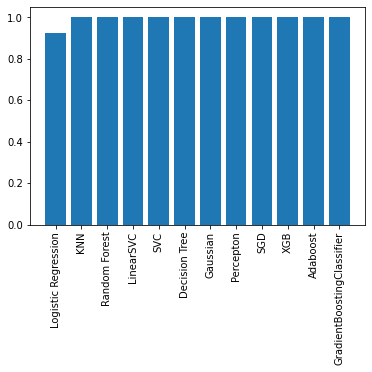

In [ ]:
scores_df = scores_df.sort_values('score')
plt.bar(scores_df['index'], scores_df['score'])
plt.xticks(rotation='vertical')
plt.show()

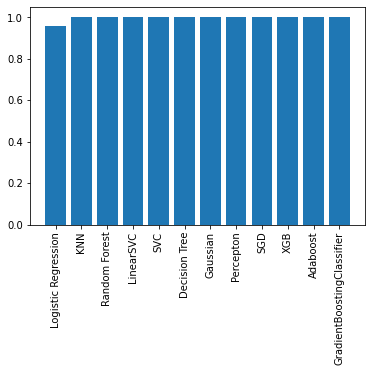

In [ ]:
scores_df = scores_df.sort_values('f1-score')
plt.bar(scores_df['index'], scores_df['f1-score'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
log_reg = LogisticRegression(max_iter=35000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=35000)

In [ ]:
predicted = log_reg.predict(X_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(y_test, predicted))
print("Presisi:", precision_score(y_test, predicted))
print("Recall:", recall_score(y_test, predicted, average='weighted'))
print("F1-score:", f1_score(y_test, predicted, average='weighted'))

Akurasi: 0.9230769230769231
Presisi: 0.0
Recall: 0.9230769230769231
F1-score: 0.9600000000000001


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_is_increase_parks, train_size=0.8, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=35000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "LinearSVC": LinearSVC(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian": GaussianNB(),
    "Percepton": Perceptron(),
    "SGD": SGDClassifier(),
    "XGB": XGBClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores = {}
        scores["score"] = model.score(X_test, y_test)
        scores["recall"] = recall_score(y_test, y_pred, average=None)
        scores["recall-macro"] = recall_score(y_test, y_pred, average='macro')
        scores["recall-micro"] = recall_score(y_test, y_pred, average='micro')
        scores["recall-weighted"] = recall_score(y_test, y_pred, average='weighted')
        scores["f1-score"] = f1_score(y_test, y_pred, average='weighted')

        model_scores[name] = scores
        
    return model_scores

fit_and_score_results = fit_and_score(models, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
scores_df = pd.DataFrame(fit_and_score_results).transpose()
for c in scores_df.columns:
    if c == 'recall':
        continue
    scores_df[c] = scores_df[c].astype(float)
scores_df

score                     recall  recall-macro  \
Logistic Regression         0.846154                 [1.0, 0.0]      0.500000   
KNN                         0.846154                 [1.0, 0.0]      0.500000   
Random Forest               0.846154                 [1.0, 0.0]      0.500000   
LinearSVC                   0.846154                 [1.0, 0.0]      0.500000   
SVC                         0.846154                 [1.0, 0.0]      0.500000   
Decision Tree               0.692308  [0.8181818181818182, 0.0]      0.409091   
Gaussian                    0.846154                 [1.0, 0.0]      0.500000   
Percepton                   0.153846                 [0.0, 1.0]      0.500000   
SGD                         0.846154                 [1.0, 0.0]      0.500000   
XGB                         0.846154                 [1.0, 0.0]      0.500000   
Adaboost                    0.769231  [0.9090909090909091, 0.0]      0.454545   
GradientBoostingClassifier  0.692308  [0.8181818181818182, 0.0]      0.409091   

                            recall-micro  recall-weighted  f1-score  
Logistic Regression             0.846154         0.846154  0.775641  
KNN                             0.846154         0.846154  0.775641  
Random Forest                   0.846154         0.846154  0.775641  
LinearSVC                       0.846154         0.846154  0.775641  
SVC                             0.846154         0.846154  0.775641  
Decision Tree                   0.692308         0.692308  0.692308  
Gaussian                        0.846154         0.846154  0.775641  
Percepton                       0.153846         0.153846  0.041026  
SGD                             0.846154         0.846154  0.775641  
XGB                             0.846154         0.846154  0.775641  
Adaboost                        0.769231         0.769231  0.735786  
GradientBoostingClassifier      0.692308         0.692308  0.692308

In [ ]:
scores_df.reset_index(inplace=True)

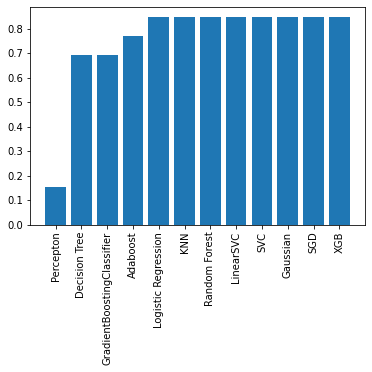

In [ ]:
scores_df = scores_df.sort_values('score')
plt.bar(scores_df['index'], scores_df['score'])
plt.xticks(rotation='vertical')
plt.show()

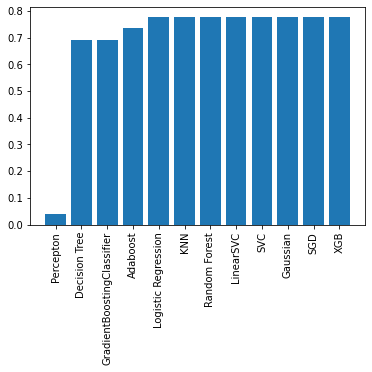

In [ ]:
scores_df = scores_df.sort_values('f1-score')
plt.bar(scores_df['index'], scores_df['f1-score'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LogisticRegression()
solvers = ['lbfgs', 'sag', 'saga', 'newton-cg']
penalty = ['l1', 'l2', 'elasticnet', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]
weight = {}
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.300000 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'sag'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.033333 (0.179505) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.300000 (0.458258) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'sag'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.033333 (0.17950

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1050 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

In [ ]:
grid_search.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
log_reg = LogisticRegression(max_iter=35000, **grid_search.best_params_)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

LogisticRegression(C=100, max_iter=35000, solver='newton-cg')

In [ ]:
predicted = log_reg.predict(X_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(y_test, predicted))
print("Presisi:", precision_score(y_test, predicted))
print("Recall:", recall_score(y_test, predicted, average='weighted'))
print("F1-score:", f1_score(y_test, predicted, average='weighted'))

Akurasi: 0.8461538461538461
Presisi: 0.0
Recall: 0.8461538461538461
F1-score: 0.7756410256410255


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_is_increase_transit_stations, train_size=0.8, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=35000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "LinearSVC": LinearSVC(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian": GaussianNB(),
    "Percepton": Perceptron(),
    "SGD": SGDClassifier(),
    "XGB": XGBClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores = {}
        scores["score"] = model.score(X_test, y_test)
        scores["recall"] = recall_score(y_test, y_pred, average=None)
        scores["recall-macro"] = recall_score(y_test, y_pred, average='macro')
        scores["recall-micro"] = recall_score(y_test, y_pred, average='micro')
        scores["recall-weighted"] = recall_score(y_test, y_pred, average='weighted')
        scores["f1-score"] = f1_score(y_test, y_pred, average='weighted')

        model_scores[name] = scores
        
    return model_scores

fit_and_score_results = fit_and_score(models, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
scores_df = pd.DataFrame(fit_and_score_results).transpose()
for c in scores_df.columns:
    if c == 'recall':
        continue
    scores_df[c] = scores_df[c].astype(float)
scores_df

score                      recall  \
Logistic Regression         0.538462   [0.7777777777777778, 0.0]   
KNN                         0.538462  [0.6666666666666666, 0.25]   
Random Forest               0.692308                  [1.0, 0.0]   
LinearSVC                   0.692308                  [1.0, 0.0]   
SVC                         0.692308                  [1.0, 0.0]   
Decision Tree               0.538462   [0.7777777777777778, 0.0]   
Gaussian                    0.692308                  [1.0, 0.0]   
Percepton                   0.384615  [0.4444444444444444, 0.25]   
SGD                         0.692308                  [1.0, 0.0]   
XGB                         0.692308                  [1.0, 0.0]   
Adaboost                    0.692308                  [1.0, 0.0]   
GradientBoostingClassifier  0.769231                 [1.0, 0.25]   

                            recall-macro  recall-micro  recall-weighted  \
Logistic Regression             0.388889      0.538462         0.538462   
KNN                             0.458333      0.538462         0.538462   
Random Forest                   0.500000      0.692308         0.692308   
LinearSVC                       0.500000      0.692308         0.692308   
SVC                             0.500000      0.692308         0.692308   
Decision Tree                   0.388889      0.538462         0.538462   
Gaussian                        0.500000      0.692308         0.692308   
Percepton                       0.347222      0.384615         0.384615   
SGD                             0.500000      0.692308         0.692308   
XGB                             0.500000      0.692308         0.692308   
Adaboost                        0.500000      0.692308         0.692308   
GradientBoostingClassifier      0.625000      0.769231         0.769231   

                            f1-score  
Logistic Regression         0.484615  
KNN                         0.538462  
Random Forest               0.566434  
LinearSVC                   0.566434  
SVC                         0.566434  
Decision Tree               0.484615  
Gaussian                    0.566434  
Percepton                   0.407692  
SGD                         0.566434  
XGB                         0.566434  
Adaboost                    0.566434  
GradientBoostingClassifier  0.716484

In [ ]:
scores_df.reset_index(inplace=True)

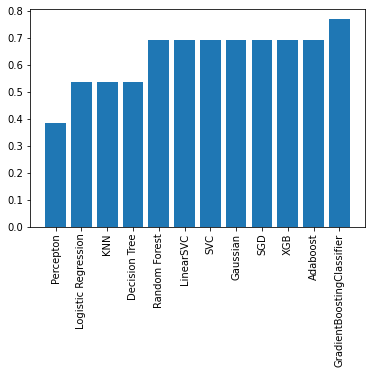

In [ ]:
scores_df = scores_df.sort_values('score')
plt.bar(scores_df['index'], scores_df['score'])
plt.xticks(rotation='vertical')
plt.show()

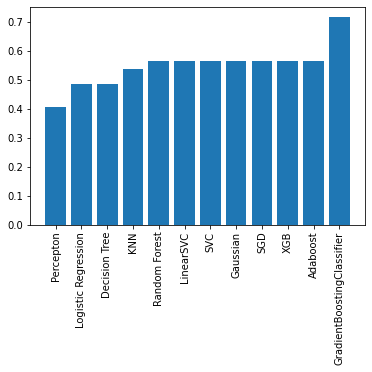

In [ ]:
scores_df = scores_df.sort_values('f1-score')
plt.bar(scores_df['index'], scores_df['f1-score'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LinearSVC()
c_values = [100, 10, 1.0, 0.1, 0.01]
weight = {}
# define grid search
grid = dict(C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.550000 using {'C': 100}
0.550000 (0.489047) with: {'C': 100}
0.416667 (0.484481) with: {'C': 10}
0.300000 (0.458258) with: {'C': 1.0}
0.283333 (0.441273) with: {'C': 0.1}
0.433333 (0.495536) with: {'C': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
grid_search.best_params_

{'C': 100}

In [ ]:
log_reg = LinearSVC(max_iter=35000, **grid_search.best_params_)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=100, max_iter=35000)

In [ ]:
predicted = log_reg.predict(X_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(y_test, predicted))
print("Presisi:", precision_score(y_test, predicted))
print("Recall:", recall_score(y_test, predicted, average='weighted'))
print("F1-score:", f1_score(y_test, predicted, average='weighted'))

Akurasi: 0.3076923076923077
Presisi: 0.3076923076923077
Recall: 0.3076923076923077
F1-score: 0.14479638009049772


### 5

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_is_increase_residential, train_size=0.8, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=35000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "LinearSVC": LinearSVC(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian": GaussianNB(),
    "Percepton": Perceptron(),
    "SGD": SGDClassifier(),
    "XGB": XGBClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores = {}
        scores["score"] = model.score(X_test, y_test)
        scores["recall"] = recall_score(y_test, y_pred, average=None)
        scores["recall-macro"] = recall_score(y_test, y_pred, average='macro')
        scores["recall-micro"] = recall_score(y_test, y_pred, average='micro')
        scores["recall-weighted"] = recall_score(y_test, y_pred, average='weighted')
        scores["f1-score"] = f1_score(y_test, y_pred, average='weighted')

        model_scores[name] = scores
        
    return model_scores

fit_and_score_results = fit_and_score(models, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the n

In [ ]:
scores_df = pd.DataFrame(fit_and_score_results).transpose()
for c in scores_df.columns:
    if c == 'recall':
        continue
    scores_df[c] = scores_df[c].astype(float)
scores_df

score                      recall  \
Logistic Regression         0.923077   [0.9230769230769231, 0.0]   
KNN                         1.000000                       [1.0]   
Random Forest               1.000000                       [1.0]   
LinearSVC                   0.153846  [0.15384615384615385, 0.0]   
SVC                         1.000000                       [1.0]   
Decision Tree               0.923077   [0.9230769230769231, 0.0]   
Gaussian                    0.923077   [0.9230769230769231, 0.0]   
Percepton                   0.461538  [0.46153846153846156, 0.0]   
SGD                         0.692308   [0.6923076923076923, 0.0]   
XGB                         1.000000                       [1.0]   
Adaboost                    0.923077   [0.9230769230769231, 0.0]   
GradientBoostingClassifier  0.923077   [0.9230769230769231, 0.0]   

                            recall-macro  recall-micro  recall-weighted  \
Logistic Regression             0.461538      0.923077         0.923077   
KNN                             1.000000      1.000000         1.000000   
Random Forest                   1.000000      1.000000         1.000000   
LinearSVC                       0.076923      0.153846         0.153846   
SVC                             1.000000      1.000000         1.000000   
Decision Tree                   0.461538      0.923077         0.923077   
Gaussian                        0.461538      0.923077         0.923077   
Percepton                       0.230769      0.461538         0.461538   
SGD                             0.346154      0.692308         0.692308   
XGB                             1.000000      1.000000         1.000000   
Adaboost                        0.461538      0.923077         0.923077   
GradientBoostingClassifier      0.461538      0.923077         0.923077   

                            f1-score  
Logistic Regression         0.960000  
KNN                         1.000000  
Random Forest               1.000000  
LinearSVC                   0.266667  
SVC                         1.000000  
Decision Tree               0.960000  
Gaussian                    0.960000  
Percepton                   0.631579  
SGD                         0.818182  
XGB                         1.000000  
Adaboost                    0.960000  
GradientBoostingClassifier  0.960000

In [ ]:
scores_df.reset_index(inplace=True)

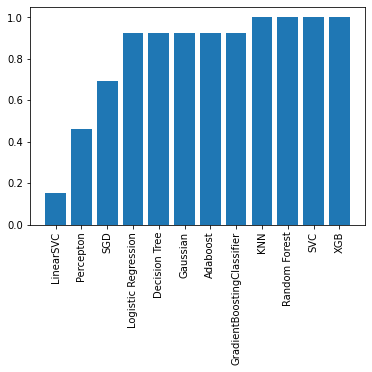

In [ ]:
scores_df = scores_df.sort_values('score')
plt.bar(scores_df['index'], scores_df['score'])
plt.xticks(rotation='vertical')
plt.show()

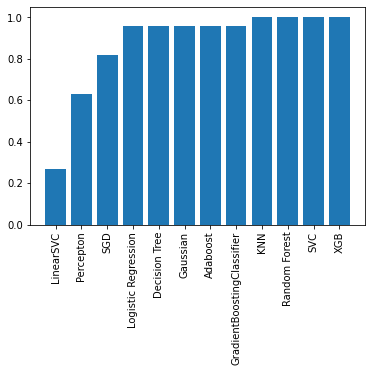

In [ ]:
scores_df = scores_df.sort_values('f1-score')
plt.bar(scores_df['index'], scores_df['f1-score'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
log_reg = LogisticRegression(max_iter=35000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=35000)

In [ ]:
predicted = log_reg.predict(X_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(y_test, predicted))
print("Presisi:", precision_score(y_test, predicted))
print("Recall:", recall_score(y_test, predicted, average='weighted'))
print("F1-score:", f1_score(y_test, predicted, average='weighted'))

Akurasi: 0.9230769230769231
Presisi: 0.0
Recall: 0.9230769230769231
F1-score: 0.9600000000000001


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_is_increase_workplaces_percent, train_size=0.8, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=35000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "LinearSVC": LinearSVC(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian": GaussianNB(),
    "Percepton": Perceptron(),
    "SGD": SGDClassifier(),
    "XGB": XGBClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores = {}
        scores["score"] = model.score(X_test, y_test)
        scores["recall"] = recall_score(y_test, y_pred, average=None)
        scores["recall-macro"] = recall_score(y_test, y_pred, average='macro')
        scores["recall-micro"] = recall_score(y_test, y_pred, average='micro')
        scores["recall-weighted"] = recall_score(y_test, y_pred, average='weighted')
        scores["f1-score"] = f1_score(y_test, y_pred, average='weighted')

        model_scores[name] = scores
        
    return model_scores

fit_and_score_results = fit_and_score(models, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
scores_df = pd.DataFrame(fit_and_score_results).transpose()
for c in scores_df.columns:
    if c == 'recall':
        continue
    scores_df[c] = scores_df[c].astype(float)
scores_df

score                      recall  \
Logistic Regression         0.692308   [0.8181818181818182, 0.0]   
KNN                         0.461538  [0.45454545454545453, 0.5]   
Random Forest               0.846154                  [1.0, 0.0]   
LinearSVC                   0.846154                  [1.0, 0.0]   
SVC                         0.846154                  [1.0, 0.0]   
Decision Tree               0.846154   [0.9090909090909091, 0.5]   
Gaussian                    0.923077                  [1.0, 0.5]   
Percepton                   0.846154                  [1.0, 0.0]   
SGD                         0.153846                  [0.0, 1.0]   
XGB                         0.923077                  [1.0, 0.5]   
Adaboost                    0.846154                  [1.0, 0.0]   
GradientBoostingClassifier  0.846154   [0.9090909090909091, 0.5]   

                            recall-macro  recall-micro  recall-weighted  \
Logistic Regression             0.409091      0.692308         0.692308   
KNN                             0.477273      0.461538         0.461538   
Random Forest                   0.500000      0.846154         0.846154   
LinearSVC                       0.500000      0.846154         0.846154   
SVC                             0.500000      0.846154         0.846154   
Decision Tree                   0.704545      0.846154         0.846154   
Gaussian                        0.750000      0.923077         0.923077   
Percepton                       0.500000      0.846154         0.846154   
SGD                             0.500000      0.153846         0.153846   
XGB                             0.750000      0.923077         0.923077   
Adaboost                        0.500000      0.846154         0.846154   
GradientBoostingClassifier      0.704545      0.846154         0.846154   

                            f1-score  
Logistic Regression         0.692308  
KNN                         0.531926  
Random Forest               0.775641  
LinearSVC                   0.775641  
SVC                         0.775641  
Decision Tree               0.846154  
Gaussian                    0.911929  
Percepton                   0.775641  
SGD                         0.041026  
XGB                         0.911929  
Adaboost                    0.775641  
GradientBoostingClassifier  0.846154

In [ ]:
scores_df.reset_index(inplace=True)

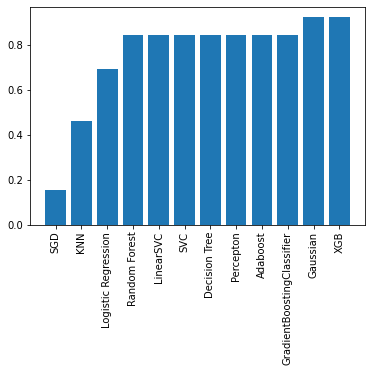

In [ ]:
scores_df = scores_df.sort_values('score')
plt.bar(scores_df['index'], scores_df['score'])
plt.xticks(rotation='vertical')
plt.show()

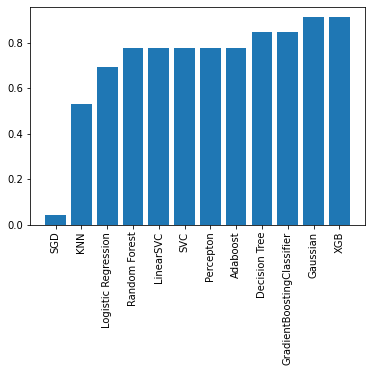

In [ ]:
scores_df = scores_df.sort_values('f1-score')
plt.bar(scores_df['index'], scores_df['f1-score'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
model = XGBClassifier()
min_child_weights = [1, 5, 10]
gammas = [0.5, 1, 1.5, 2, 5]
subsamples = [100, 10, 1.0, 0.1, 0.01]
colsample_bytrees = [0.6, 0.8, 1.0]
max_depths = [3, 4, 5]
weight = {}
# define grid search
grid = dict(min_child_weight=min_child_weights,gamma=gammas,subsample=subsamples,colsample_bytree=colsample_bytrees,max_depth=max_depths)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.566667 using {'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}
0.000000 (0.000000) with: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 100}
0.000000 (0.000000) with: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 10}
0.550000 (0.350000) with: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}
0.000000 (0.000000) with: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.1}
0.000000 (0.000000) with: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.01}
0.000000 (0.000000) with: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 100}
0.000000 (0.000000) with: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 10}
0.516667 (0.376017) with

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
8100 fits failed out of a total of 20250.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4050 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", 

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'gamma': 1,
 'max_depth': 3,
 'min_child_weight': 1,
 'subsample': 1.0}

In [ ]:
xgb = XGBClassifier(max_iter=35000, **grid_search.best_params_)
xgb.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.6, gamma=1, max_iter=35000, subsample=1.0)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
predicted = xgb.predict(X_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(y_test, predicted))
print("Presisi:", precision_score(y_test, predicted))
print("Recall:", recall_score(y_test, predicted, average='weighted'))
print("F1-score:", f1_score(y_test, predicted, average='weighted'))

Akurasi: 0.9230769230769231
Presisi: 1.0
Recall: 0.9230769230769231
F1-score: 0.9119286510590859


## Regression

In [ ]:
print(df_mit.to_string())

   country  results_count  effective_sample_size  vaccine_accept_yes  vaccine_accept_no  vaccine_accept_dontknow  mismatch_index  distancing_familiarity_I-have-heard-of-it-and-have-some-idea-of-what-it-means  distancing_familiarity_I-have-heard-of-it-and-know-what-it-means  distancing_familiarity_I-have-heard-of-it-but-do-not-know-what-it-means  distancing_familiarity_I-have-not-heard-of-it  effect_mask_Extremely-effective  effect_mask_Moderately-effective  effect_mask_Not-effective-at-all  effect_mask_Slightly-effective  effect_mask_Very-effective  community_risk_index_Extremely-dangerous  community_risk_index_Moderately-dangerous  community_risk_index_Not-at-all-dangerous  community_risk_index_Slightly-dangerous  community_risk_index_Very-dangerous  restaurants_everyone-has-to-pass-a-temperature-check_Doesn't-affect-my-actions  restaurants_everyone-has-to-pass-a-temperature-check_Less-likely-to-visit  restaurants_everyone-has-to-pass-a-temperature-check_More-likely-to-visit  restaura

In [ ]:
y_vaccine_accept_yes = df_mit['vaccine_accept_yes']
y_vaccine_accept_no = df_mit['vaccine_accept_no']
y_vaccine_accept_dontknow = df_mit['vaccine_accept_dontknow']

### 1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_vaccine_accept_yes, train_size=0.8, random_state=42)

In [ ]:
models = {
    "LinearRegression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Lasso Regression": linear_model.Lasso(),
    "Ridge Regression": linear_model.Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
    "LinearSVR": LinearSVR(),
    "SVR": SVR(),
    "ElasticNet Regression": linear_model.ElasticNet()
}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    model_scores = {}
    
    for name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      scores = {}
      scores["R2 score"] = r2_score(y_test, y_pred)

      model_scores[name] = scores
        
    return model_scores

fit_and_score_results = fit_and_score(models, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
scores_df = pd.DataFrame(fit_and_score_results).transpose()
for c in scores_df.columns:
    scores_df[c] = scores_df[c].astype(float)
scores_df

R2 score
LinearRegression            0.797710
Decision Tree Regressor     0.950493
Lasso Regression           -0.797587
Ridge Regression            0.430661
Random Forest Regressor     0.938387
LinearSVR               -2570.419864
SVR                        -0.614377
ElasticNet Regression      -0.798063

In [ ]:
scores_df.reset_index(inplace=True)

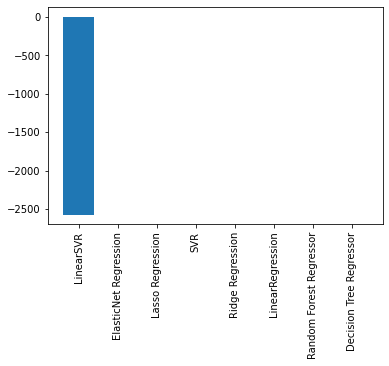

In [ ]:
scores_df = scores_df.sort_values('R2 score')
plt.bar(scores_df['index'], scores_df['R2 score'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
random = RandomForestRegressor()
random.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math 

In [ ]:
predicted = random.predict(X_test)

print("MSE:", mean_squared_error(y_test, predicted))
print("MAE:", mean_absolute_error(y_test, predicted))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predicted))) 
print("R2 Square:", r2_score(y_test, predicted))

MSE: 0.0004873002653547093
MAE: 0.014072490020285421
RMSE:  0.022074878603396877
R2 Square: 0.9291952897904471


### 2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_vaccine_accept_no, train_size=0.8, random_state=42)

In [ ]:
models = {
    "LinearRegression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Lasso Regression": linear_model.Lasso(),
    "Ridge Regression": linear_model.Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
    "LinearSVR": LinearSVR(),
    "SVR": SVR(),
    "ElasticNet Regression": linear_model.ElasticNet()
}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    model_scores = {}
    
    for name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      scores = {}
      scores["R2 score"] = r2_score(y_test, y_pred)

      model_scores[name] = scores
        
    return model_scores

fit_and_score_results = fit_and_score(models, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
scores_df = pd.DataFrame(fit_and_score_results).transpose()
for c in scores_df.columns:
    scores_df[c] = scores_df[c].astype(float)
scores_df

R2 score
LinearRegression           0.305538
Decision Tree Regressor    0.732184
Lasso Regression          -0.380477
Ridge Regression           0.468036
Random Forest Regressor    0.946322
LinearSVR               -218.506333
SVR                       -0.584557
ElasticNet Regression     -0.382685

In [ ]:
scores_df.reset_index(inplace=True)

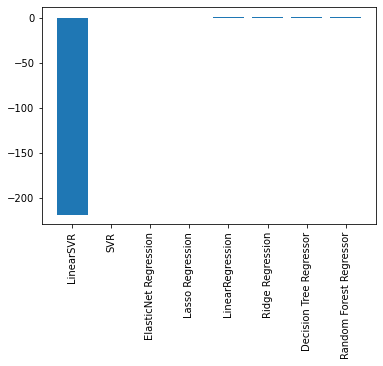

In [ ]:
scores_df = scores_df.sort_values('R2 score')
plt.bar(scores_df['index'], scores_df['R2 score'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
random = RandomForestRegressor()
random.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
predicted = random.predict(X_test)

print("MSE:", mean_squared_error(y_test, predicted))
print("MAE:", mean_absolute_error(y_test, predicted))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predicted))) 
print("R2 Square:", r2_score(y_test, predicted))

MSE: 0.00014392881842600083
MAE: 0.009072920762024443
RMSE:  0.011997033734469567
R2 Square: 0.9529846405050326


### 3

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_vaccine_accept_dontknow, train_size=0.8, random_state=42)

In [ ]:
models = {
    "LinearRegression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Lasso Regression": linear_model.Lasso(),
    "Ridge Regression": linear_model.Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
    "LinearSVR": LinearSVR(),
    "SVR": SVR(),
    "ElasticNet Regression": linear_model.ElasticNet()
}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    model_scores = {}
    
    for name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      scores = {}
      scores["R2 score"] = r2_score(y_test, y_pred)

      model_scores[name] = scores
        
    return model_scores

fit_and_score_results = fit_and_score(models, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
scores_df = pd.DataFrame(fit_and_score_results).transpose()
for c in scores_df.columns:
    scores_df[c] = scores_df[c].astype(float)
scores_df

R2 score
LinearRegression           0.682868
Decision Tree Regressor    0.938708
Lasso Regression          -0.487126
Ridge Regression           0.419680
Random Forest Regressor    0.964964
LinearSVR               -417.720120
SVR                       -0.843612
ElasticNet Regression     -0.484551

In [ ]:
scores_df.reset_index(inplace=True)

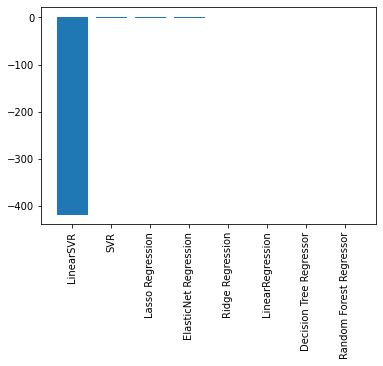

In [ ]:
scores_df = scores_df.sort_values('R2 score')
plt.bar(scores_df['index'], scores_df['R2 score'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
random = RandomForestRegressor()
random.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
predicted = random.predict(X_test)

print("MSE:", mean_squared_error(y_test, predicted))
print("MAE:", mean_absolute_error(y_test, predicted))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predicted))) 
print("R2 Square:", r2_score(y_test, predicted))

MSE: 7.90324848131079e-05
MAE: 0.006178531169811717
RMSE:  0.008890021643005595
R2 Square: 0.970062875915597


# Conclusion

**Exploratory data analysis**

1.   Data Google

      Terdapat 65 negara di dalam data [Community Mobility Reports](https://www.google.com/covid19/mobility/index.html) yang disediakan oleh Google. Sebelum melakukan Data Preprocessing, kami menyamakan data negara yang terdapat pada data Google dengan data MIT yang disediakan oleh Facebook. Kami mendapatkan 64 negara yang terdapat pada kedua data tersebut. Data dari Google sendiri berisi tren mobilitas masyarakat di suatu negara untuk suatu sektor.  
      
      Terdapat 6 sektor pada data yang disediakan oleh Google. Yaitu, sektor Grocery & pharmacy *(pasar grosir, gudang makanan, pasar petani, toko makanan khusus, toko obat, dan apotek)*, Parks *(taman lokal, taman nasional, pantai umum, taman anjing, alun-alun, dan taman umum)*, Transit stations *(pusat transportasi umum seperti stasiun kereta bawah tanah, bus, dan kereta api)*, Retail & recreation *(restoran, kafe, pusat perbelanjaan, taman hiburan, museum, perpustakaan, dan bioskop)*, Residential *(tempat tinggal)*, dan Workplaces *(tempat kerja)*.

      Terdapat lebih dari 50% negara dari 64 negara memiliki peningkatan mobilitas pada setiap sektor yang ada untuk perbandingan data ketika awal pandemi (Februari 2020) dan bulan terakhir yang tersedia (Juni 2022). Secara khusus, Indonesia memiliki peningkatan mobilitas masyarakat untuk setiap sektor yang ada.

2.   Data MIT
     
     Berdasarkan data [COVID-19 Preventative Health Survey](https://dataforgood.facebook.com/dfg/tools/covid-19-preventative-health-survey) yang didapatkan dari data survey Facebook. Survey yang diikuti sebanyak 64 negara tersebut meninjau beberapa aspek diantaranya adalah status vaksin masyarakat, kepercayaan adanya Covid-19, kesadaran dalam menjaga jarak, efek penggunaan masker, risiko Covid-19, mengunjungi fasilitas umum atau tempat ibadah atau tidak, mengunjungi lokasi tertentu walau dalam keadaan penuh, tindakan dalam mencegah infeksi Covid-19, dan berita yang diterima dari sumber tertentu. 
Analisis yang dapat diperoleh berdasarkan EDA pada data MIT ini adalah:
  *   Vaccine Accept: Kazakhstan

  *   Mismatch Index: South Korea

  *   Community risk index Extremely-dangerous: Poland

  *   Measures Taken
      *   measures_taken_avoid-sick_Yes:	Canada
      *   measures_taken_avoid-touching-face_Yes: Trinidad and Tobago
      *   measures_taken_caution-opening-mail_Yes: India
      *   measures_taken_cleaning-or-disinfecting-a-mobile-phone_Yes Honduras
      *   measures_taken_cleaning-or-disinfecting-surfaces_Yes: Trinidad and Tobago
      *   measures_taken_cover-coughs_Yes: United States of America
      *   measures_taken_eating-garlic_Yes: Nepal
      *   measures_taken_getting-the-flu-vaccine_Yes: United States of America
      *   measures_taken_isolation_Yes: 	Thailand
      *   measures_taken_meter-distance_Yes: Canada 
      *   measures_taken_none-of-these_Yes: Afghanistan
      *   measures_taken_taking-herbal-supplements_Yes: Sri Lanka
      *   measures_taken_using-antibiotics_Yes: Thailand
      *   measures_taken_using-homeopathic-remedies_Yes: Nepal
      *   measures_taken_washing-hands_Yes: Canada
      *   measures_taken_wearing-a-face-mask-or-covering_Yes' Japan

  *   Locations Would Attend
      *   locations_would_attend_health-care-facilities_Yes: Australia                                
      *   locations_would_attend_parks-and-beaches_Yes:   Australia                                      
      *   locations_would_attend_performances-and-sporting-events_Yes:  Poland                      
      *   locations_would_attend_places-of-employment_Yes:       Taiwan                             
      *   locations_would_attend_places-of-worship_Yes:     Tanzania                                  
      *   locations_would_attend_restaurants_Yes:          Taiwan                                    
      *   locations_would_attend_retail-shops_Yes:         	Australia                                   
      *   locations_would_attend_schools_Yes: Tanzania

  *   Distancing Familiarity: Indonesia

  *   Effect Mask: Sri Lanka

  *   News Sources
      *   news_sources_government-health-authorities_Yes: Trinidad and Tobago                                        
      *   news_sources_journalists_Yes:      Brazil                                                 
      *   news_sources_local-health-workers_Yes: Philippines                                                
      *   news_sources_ordinary-people-i-dont-know-personally_Yes: South Africa                           
      *   news_sources_ordinary-people-i-know-personally_Yes: South Africa                            
      *   news_sources_politicians_Yes: Australia                                                       
      *   news_sources_scientists_Yes:  Turkey                                                     
      *   news_sources_world-health-organization_Yes: Philippines       

  *   News Mediums
      *   news_mediums_messaging-apps_Yes: South Korea                                                  
      *   news_mediums_newspapers_Yes:     	Germany                                                   
      *   news_mediums_online-sources_Yes:    Malaysia                                                 
      *   news_mediums_radio_Yes: Ghana                                                           
      *   news_mediums_television_Yes: Portugal

  *   Health
      *  health_everyone-has-to-pass-a-temperature-check_More-likely-to-visit:   Italy        
      *   health_everyone-has-to-wear-a-mask_More-likely-to-visit:   Italy                      
      *   health_has-additional-hand-washing-stations_More-likely-to-visit:    Italy                 
      *   health_operating-at-limited-capacity_More-likely-to-visit:       Italy                

  *   Retail
      * retail_everyone-has-to-pass-a-temperature-check_More-likely-to-visit: Uganda          
      *   retail_everyone-has-to-wear-a-mask_More-likely-to-visit:     Italy                     
      *   retail_has-additional-hand-washing-stations_More-likely-to-visit:  Italy                
      *   retail_operating-at-limited-capacity_More-likely-to-visit:   Italy  

  *   Restaurants
      * restaurants_everyone-has-to-pass-a-temperature-check_More-likely-to-visit:   South Korea    
      *   restaurants_everyone-has-to-wear-a-mask_More-likely-to-visit:   Italy                  
      *   restaurants_has-additional-hand-washing-stations_More-likely-to-visit:       Italy     
      *   restaurants_operating-at-limited-capacity_More-likely-to-visit:     Italy 

  *  Worship 
      *   worship_everyone-has-to-pass-a-temperature-check_More-likely-to-visit:    Uganda        
      *   worship_everyone-has-to-wear-a-mask_More-likely-to-visit:          Italy                
      *   worship_has-additional-hand-washing-stations_More-likely-to-visit:    Italy           
      *   worship_operating-at-limited-capacity_More-likely-to-visit: Italy

**Classification dan Regression**

Kesimpulan dari model klasifikasi diatas dapat disimpulkan bahwa seluruh data dari dataset MIT dapat memprediksi keseluruhan target , yaitu persentase mobilitas pada sektor Retail and Recreation, Grocery and Pharmacy, Parks, Transit Stations, Residential, serta Workplaces pada suatu negara dari keseluruhan target. Semakin banyaknya warga yang vaksin, ketertiban dari setiap lokasi terkait protokol kesehatan, dan berita di negara tersebut sangat berpengaruh terhatap naik atau tidaknya keenam target tersebut. Dengan begitu, semakin banyaknya warga yang vaksin, ketertiban dari setiap lokasi terkait protokol kesehatan, dan berita di negara berpengaruh terhadap aspek ekonomi, kesehatan, mobilitas, sosial, dll. Semakin baik negara tersebut, semakin baik COVID-19 Recovery dari negara tersebut.

Kesimpulan dari model regresi diatas disimpulkan bahwa seluruh data dari dataset MIT dapat memprediksi tingginya angka masyarakat yang sudah, belum atau ketidaktahuannya masyarakat dalam suntik vaksin. Dengan begitu, kita dapat menentukan pengaruh berita dan kesadaran pihak penyedia layanan suatu lokasi terhadap kesadaran masyarakat untuk suntik vaksin.

# Referensi

* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* https://www.kaggle.com/code/tilii7/hyperparameter-grid-search-with-xgboost/notebook
* https://gist.github.com/jamespaultg/a1b121ed3d4418f65af0973d07ff92c7
* https://machinelearningmastery.com/elastic-net-regression-in-python/
* https://enmap-box.readthedocs.io/en/latest/usr_section/usr_manual/processing_algorithms/regression/fit_linearsvr.html